In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings("ignore")

In [10]:
train = pd.read_csv("insurance.csv")

In [11]:
train.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [12]:
train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
train.shape

(1338, 7)

In [15]:
train.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [17]:
train.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [18]:
train.age.value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [19]:
train.sex.unique()

array(['female', 'male'], dtype=object)

In [20]:
train.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [21]:
train.bmi.unique()

array([27.9, 33.8, 33. , 22.7, 28.9, 25.7, 33.4, 27.7, 29.8, 25.8, 26.2,
       26.3, 34.4, 39.8, 42.1, 24.6, 30.8, 23.8, 40.3, 35.3, 36. , 32.4,
       34.1, 31.9, 28. , 23.1, 32.8, 17.4, 36.3, 35.6, 28.6, 28.3, 36.4,
       20.4, 20.8, 36.7, 39.9, 26.6, 36.6, 21.8, 37.1, 37.3, 38.7, 34.8,
       24.5, 35.2, 33.6, 28.7, 37. , 31.8, 31.7, 22.9, 27.4, 33.7, 24.7,
       25.9, 22.4, 39.1, 36.2, 24. , 24.8, 28.5, 28.1, 32. , 34. , 29.6,
       35.5, 26.9, 38.3, 37.6, 41.2, 31.2, 27.2, 27. , 39.5, 31.3, 20. ,
       19.3, 31.6, 25.5, 30.1, 29.9, 27.5, 28.4, 30.9, 35.1, 29.7, 35.7,
       32.2, 49.1, 23.4, 29. , 31.4, 33.9, 28.8, 37.4, 17.8, 34.7, 26.5,
       22. , 35.9, 25.6, 25.2, 32.5, 25.3, 38.8, 30.5, 37.7, 24.1, 24.4,
       27.8, 36.9, 39.6, 28.2, 33.2, 18.9, 41.5, 30.3, 16. , 33.3, 29.2,
       26.4, 30.7, 41.9, 32.1, 30.6, 18.1, 39.3, 36.1, 22.3, 26.7, 23.2,
       38.1, 22.2, 38.4, 29.1, 22.1, 26.8, 30. , 20.9, 17.3, 34.2, 25.4,
       40.2, 24.3, 42.4, 19.8, 30.2, 29.4, 27.6, 20

In [22]:
train.bmi.value_counts()

27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
40.7     1
19.2     1
38.7     1
19.6     1
19.3     1
Name: bmi, Length: 275, dtype: int64

In [24]:
train.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [25]:
train.smoker.unique()

array(['yes', 'no'], dtype=object)

In [26]:
train.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [27]:
train.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
train.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [29]:
train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [66]:
train.duplicated().sum()

0

In [65]:
train = train.drop_duplicates()

In [68]:
train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

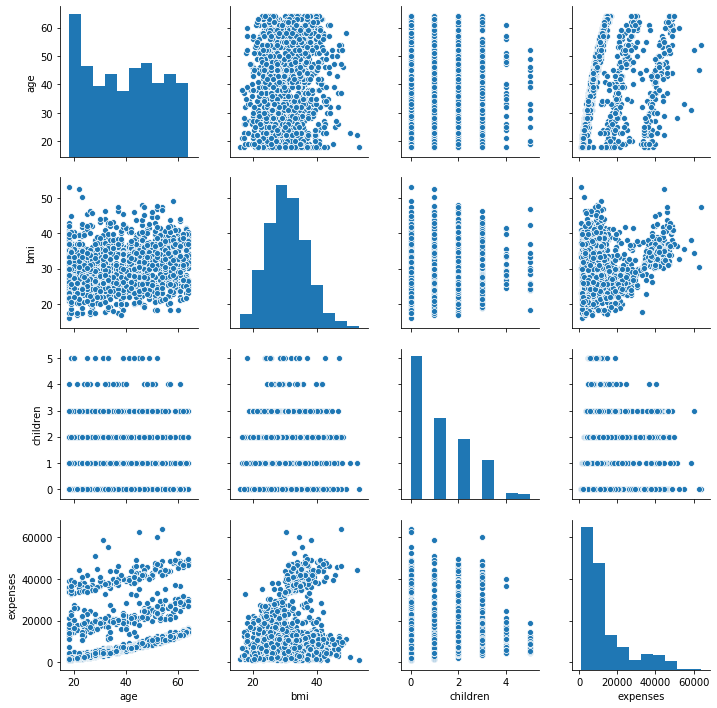

In [70]:
sns.pairplot(train[['age', 'sex', 'bmi', 'children', 'smodata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAs0AAALECAYAAADzQA1JAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOx9e5gU1Zn+e6q6+j53ZhCYkVsIMJpBprkMmKiRDcqKYc0gKjMoKPckJv4Mkd2EJBt0A6LrhigMsgkoFxEhromuyoaEZDdo1AEhySgiNwcQeph7X6ur6vz+6K6iq6tqLkw1QzP1Ps88MN3Vp745deqrr8/3fu9HKKWwYMGCBQsWLFiwYMGCMZjeNsCCBQsWLFiwYMGChSsdVtBswYIFCxYsWLBgwUInsIJmCxYsWLBgwYIFCxY6gRU0W7BgwYIFCxYsWLDQCayg2YIFCxYsWLBgwYKFTtDngubbb7+dArB+rJ/OfnoV1jq1frr40+uw1qr108WfXoe1Vq2fLv4Yos8FzRcuXOhtEyxY6BTWOrWQKbDWqoVMgbVWLfQUfS5otmDBggULFixYsGChu7CCZgsWLFiwYMGCBQsWOoEVNFuwYMGCBQsWLFiw0AmsoNmCBQsWLFiwYMGChU5gBc0WLFiwYMGCBQsWLHQCW28bYMGChSsHkkTRGOTBCyJcdhaCRBETJHA2BjaGIMxffJ1KFCIFJErBEAKWAAzDoMBjB8OQDse221jkuTg0h2OQJAkiBSilqvM47Qz4GEVMlMAyBDaGKOMDMLSTZYBgVARLCJwcA1ECBEkCTdjqsLGwsfFz2G2sob0WzEEkIqAxzEOQKGwMQYHLDqfTnEdPLCbCH4gqYxd5HeA41pSxAYDnBTQEL9pe6LHDbjfvsSkIEvyBKGKiBI5lUOR1wGaz9rKuVkSjAloiMcQkClGicNgYMIQgHBNhYwg8DhbZzp75o9Q1VeixoyUigBdEkC746XRBtktI8uecjVF8d6b4Yito1sGQ5W906/iTq+5IkyUWLFw+SBLFkfPtWPDiByj0OvD920di2a7DON0cRnGeC2tmluHVA2dwV/kgbPrzCTwweSge233x/dWVZXhh/wk88rWRGNk/S+X8kseWj6+p9uG3H57GTSP7q8ZJPk/y+eXxl08bjaggdWjnk28dQUMgijUzy5Dv4dASEvDoK4d0j9l4/ziNvRbMQSQi4GhjEEu21ipzv77ahxEFnh4HzrGYiI/9Ac3Yo4q8pgTOPC/gSIPW9pGFHlMCZ0GQ8PH5dixOGr+m2odR/bOswPkqRDQq4LPWMC60Rw391bqqcuS5BQzKdV+SP9JbU+urffjF3k+wp87fqZ9OF/Tsenb2WMQECY/svOiXM8EXW3emBQsWAMR3buWgdvEtwxXHDgCnm8NYtuswFtw0DMt2HUalr0QJdOX3H9sdf33Bix+gMcgbji0fv3hrLWaOu1YzTvJ59MY/1Rjq1M7FtwxX/s8yrBIw6x2jZ68Fc9AY5pWgE4jP/ZKttWgM93y+/YGo7tj+QLTHYwNAQ1Df9gaT1oo/EFWCCHn8xSbab+HKwoUQj9NN4Q791dJtBxAV6CX7I701tWRrLSp9JcrvHfnpdEHPruZgTAmY5dcywRdbO80WLPRhJKfybAzB5GEF2Fl7GrkuTnFmMk43h2G3MXj67jEoynKg0OtQHXO6Oax8LswLON8qKWlAXhCVY8eW5GLxLcMxMMcJl53F03ePQUs4hpp9x3CwvgWFXgecHIv1VeVwciwCUQH+9ij21p3HF4u8oABWTC9Fzb5jhnbmujjl/wwBCr0OrJheilwXp5wr+ZgwL6ApCOS6rvz0YCZBkKju9RGkDptudXnsycMKsOCmYWAZAlGi2Pin46aMLY+fLtsBICZK+vaLkinjW7iyQAgwaoAXLy2YCELi15tlCBraI3AlMiOyv+IF8ZLOEROlDv1h8u+nm8OXfB4z7HLbWV1bL5dNlworaLZgoY9CL2W2rqocANASjqE4z6VyasV5LhxvCGLe5vdVacWD9S3K+/LnzrZGIEpUSQMWeO0oznOh0OvA924biRf2x+kdS7YdUNEvXjsYp2WsfP3vmvfXVZXjZ29+pEozsgzRtTOWCDyK81ywsUSXwiFRqhxzrCEIJ8egf7YTQwo8VuBsEuwso3t97GzPk5weO4vqSYMxb/P7qjXisZvDabYZrC2bSWvD6zCw32EeJ9vClQGeF0AIEIiKGnrGM7PGwOZkMMtXjP3HGyFRwG67tDXAGdxvLeGY6veYKMXvw0s8T3dht2ntCvGivm+4TDZdKix6hgULfRR6KbOl2w5g4c3DUbPvGNbMLENxngsAlEBz7d6jyrHLdh3Gw1NGKO+vrizD7tp6rJlZBkqpKg1oYwg23j8OD08ZobyuR+9YePNwQ/rH0m0HNGnGwiyHrp1yML1mZhkA6KZERYkqdq/dexTLdh3GqcbQFZ8ezCQwBLrXx4y4kxcplia+VAEX1wgvmrMT7HUyWF/tU9m+vtoHr9Ocx2YkJunaH4lZO81XGxqCPAQRuvSMR3YeQn1TGAtvHo711T44bEQpdu4uirwO1Ois2d219crv66rK4bCx2Hj/uEs+T3fBEqLxA3keDs/MGqN67XLadKmwdpotWOijMErl2ViC5dNGQaIUq77xJXAsg0F5Lnx7+0FlV1k+duQ1Xuz73i0A4unHeTcOxZNvHcGau8tQ6HUoacCYIKHAY0eOy4ZNc8fDxTHYNHe8Qr2o2XcMAODkGLzw4ATYWcaQ/pH8OwXw5FtHVNSLJ986gv+49wbsWjwJEqWIiRRbHpyAtkgM7REBHMugJRzD4AI3VkwvxVNvX9wtd9vZKz49mEmICBI+ONGE7QsqFJWV1w6cxsBcV4/HNlq/ZtEbAhEJ51pCeHlhhaKeUXe2FfluDjk9Nx+CRHVpQ2bRPyxcOeBYAl6kGJLwOTIVDUj4NTcHjiXIdjnQz+O45EyXzcZgZJEXLy+sACGAIAHBiIBlt43Ct28dgbOtEbg4BvkeOwjitSbpVKyQFZMESUJRthMvPDgBLCEgBGgLx9Avx6k8Y4rzXBiQ47ris3xW0GzBQh+ElODT6aXHBJHinuffVb32yqJJaEgpUJpaWoSmYExF71hdWYbCLDvqm8L4/u0jIVGKqaVFuBDk8fPffYIHJg9VqBnJihlP3z0GTo7Bvc+/q6kqT6V/JNslShQNgSgWbalVve5vi8JpZ1XKB+uqyvHiOycVese6qnLVw6s4z4VQQobOgjnw2lncPKoIsze+q7oOXhMoFEapaJsJ1A8A8DhY9M9x4Z7n1babRZ9w2hhd2pDTUs64qsDzAs638ypftLqyTPmyXpznQo6LA0nEij0JGiWJ4tMLQTzzP0fwza+OwDe3q+lvB042YkCOE/M2X1zT6VKskBWTnvmfI4ZKS5W+EizaUoviPBdeXXrjFR8wAxY9w4KFPonGII8t+09gXVW5JpXnsBFNyszOadNry6eN1tA7Htt9GMunjVboDoQQ/PCOUizaUqtQLvSoF4++cghNwZiGQpFM/0hNM66v9iHCixq7VleWISqIGuWDVHrH0m0HVOOvmVmGwQXuKz49mEmICAYUBKHnu8F2lmjW77qqcthZcx68IV7f9hBvzk42hT5tyNpnvrqgp8Ly2O64Yoa8Zle9+REYQnrMl5dViip9JUrAnHzO6klDNWs6XYoVybboUfGWTxuNmn3HMoaWIcPaabZgoQ+CF0Rs+N+TaA4J2DR3vFK9n+PmkO+y4zffuhFhXoRIKZwciwgvaWgQreGYapcPiDvEqCDhyQSv2GNnIUpUpbhhpHjhTtp9lBU2hhV6sO97t8DJMch3cfjJ16/HD++QYE80QYkIErxOG3YsrEBzkMfZ1gieevsIfnRnaZeqyIcXefCn738VLAFcdlZRz5DTismNVzJFfP9KQjoVLoK8iD9+7NdQP74+dhD6mWB7uukfUUF/fN6ELxQyUhsKWev38sOIhjOiyIsV00tBAOyp8+Of/3E0wjwAT9fHTr2+khRfU0VZF6ltsi/NTexm69He9ChpPV07smKSkb+3MQTPVY0FEG9KlCnr0gqaLVjoY5AS3aiK81zYWXsaO2tPA4jv1K2ccT0GF7iV5iFyOm37/IkaGsSmueN10+NuO4uq//yLYeMRiVLdz4X4uOMeW5KL7902UpXOW19VjhAvYkiBB6Io4WRzSLcKXeZG57i4LlWRuzgbCrMcmvkxSitmgvj+lYR0Kly4OBbjhuarqB9rZpYp8l09hZHyB2cS/UNPUaA4zwXOJHqGXkMha/1eXgiCBBfH6vrB820RrHy9DiumlyaoZoC9G9Qfveu7YY4Pi74yRPF/slpRavOoVNpbKiXNjLVjt7EqRaXUdX6sIQi7jbnsjVZ6ioyhZxBCcgkhuwghHxNCPiKETCKE5BNC/ocQcjTxb15v22nBwpWOxiCPx9+ow+pKNa3hudnlWLv3qKp5CBDfFXj8jTpNKjzfw2F9yms11T488UYdTjcbNx4hhGjOvb6qHPmeuKNffMtwTTpvybYDirKFPxA1rEJ/eMoILL5lOFa9+ZHmHDUp9A6jlGBHacVMEN+/khA1oGdETdhNFSSqu77MKqRjGS0lSVZmMWV8HUWBNTPLwBJzxtdrKGSt38sLuW10R35wd219QtGie6oZetd30ZZazJk8VPF/slpRR7S3DXN8mvOasXYKPHZsvH8cdtfWa3yxrFjUG41WeopM2mn+OYC3KKUzCSF2AG4A/wJgL6V0FSFkOYDlAB7rTSMtWOhtdJZW4wURe+r8aGjnVSlDhgAH61t0Ref31Pnx4zuvw3/ccwNEiaIlHMNPflOHdVVjsXNhBQQaL2wSJAl76vwAYJiWG5jjBMcS7FiQUCVgCdb+7ijuKh+EHQsrIIj6TSVy3Rx4QYQgUZTku3SPGV7oUexN/fvyPRwW3jQcP7ijFHaWgZ0j+Lw1rJmjztKKlrpG15HOBiFG9ImYSfSJcEzUVWb5+b03ZMT4yQ2FZFjr9/KCgII3uAcG5jjRGo7hR3deB6+DRbbz0ugPqeOKElX835q7y3SPGdrPg1eXToa/PYp+OrQLs9ZOgdeOH95RCs7GYMfCCpxpDqMlHFMpFg0v9KDQ61DGvtIpRRkRNBNCsgHcBGAuAFBKeQA8IWQGgFsSh70AYB+soNlCH0ZX0mpy2uxgfYtCtyjOc2HF9FIAxqLzn5wPoMBrx9Z3TmFn7WkU57nw8bkACrMcGFnkxacXgipFA6O0nCBRPPv7T3FX+SAs23UYK6aXYv/xRhz1B/CTr1+HpiCv+7kcF6coGRhRQ441BDGs0GP49618vU6j3Zw6R52lFS11ja4jnQ1CjNQzzKJPcCyjq8xiljqH3aY/vln0DHkdW+u3dyAIEkAAroN7YMm2A3hl0STkuh0djKQPo+sr3xcH61twrCGoe8yJC3FqxO7aepRfq03Q93Tt6D2HXnxwAh595ZBmTFlpyWVnM4JSRCi98mt1CSE3AHgeQB2AMQBqAXwHwBlKaW7Scc2U0g4pGuPGjaMffPBBh+cbsvyNbtl3ctUd3TreQkagV+/QrqxTPTS0R3HXuj9rHNOrS29UuLt6jknmuTUEonjxwQkIx0Qs2nJRIunpu8dAohTZLg65Lg68KMHGMHjn0wYUZrswrNADf1sUDo5BltOGkxdCePOvnyuBscK5q/YhxIso8Nqx6s2PUOkrwcAcJwghaGiPYsVrf9Pl4clKGRKN73LvrTuvGfu52eVgSLxArJ/Xjrmb3le999wfjuKByUNBKcWL75xEpa9E2eHbXVuPJ+4qQ2GWI9M4zb1uSEdr9UJ7BGdbIwpFQ+Y0D8xxol+Ws0fn9bdFUN8cwnd2fKiM/fN7b0BJnhtF2T0bG4gHPSebgqhvihephngRJfkuDMn3wGZCYOtvi6ChPQJ/O6+MX5RlR2GW0xT7r8AA5Ipeq2bjbEsYhAAsAc61RVX3wJqZZRjaz4NwTESuy4Y8T+fXO3UHNs/F4WhDAAte/ACFXgcenjICQ/t5kOVi4W/jlddT+dRP3z0Gq978GA2BKLbPn4jiPLdmPST7wEpfCQo8dhRlOTAwx9Wlta/3HJpaWqSRwZN99oUAj7KSbEgS6fT5dZlguFYzJWgeB+BdADdSSv9CCPk5gDYA3+5K0EwIWQhgIQBce+21vlOnTnV4PitotoBecPDdXad6ONMcwo2r/6B5/c+PfRWD8tzK78kOmEsoUYT5i874ZFMQDhuLsy3xdLfXacO6P3yqCSLXV/vwi72foKGd1zjn9VXlkChVNxTJd2H+i7XYsXAiTjWGlbHeePjLcNgY/MO//wmAuuK7OM+FcExUBcFyy+2H/2EEGtqjyHFxWJXUYnt9tQ+5LhsuBHj426P40qBs/PVMG2r2HcNPZ1yHtoig0Q39QqEH/RNdKzJIPaN3op8urtVTjUE89/tPNeoZ37z1Cxhc0A2ZAB342+LZjDPNESXoHJTnRK6LQ1G2Cc1TYiKO+AMqHfKaah9GFnnBmVBs6G8L43xbVNUqfn1VOfpnO0yxH7jiUt1X9Fo1G5+3hBDkRYR5Eb/4/VEl+Mz32FGz7xgqfcV49JVD2FDtw8j+WR0Go0ZfgEYUetEWjeHzlggWJa3TFx+cAI5l0BTkkeu+qBjU0B7FE298pFAjUp8LyRAECUf87arNk65+6TJ6Dv32WzfC67ChJRzT+OwN1T7kurkuPb8uAwz/wEwpBDwN4DSl9C+J33cBKAdwnhAyAAAS//r1PkwpfZ5SOo5SOq6wsPCyGGzBQndhxjqV02rJ0EurMQxBYZYDg/LcKMpyIt8T/39hlgPN4RjmbnofkZiIR185hCAv4lvbD+oWxi3ZGtdf1iv6W7LtAM61RVH9y/dwz/PvYuXrdWAZBqebw4jEqGas+qawYrtMrXj0lUMIxyQlYJaPfWz3YUz70gBQCrSEYrj/V+8pXGrZrk/9Qfjbo1j5eh0AgpWv1+FgfQucHKurG5rcfVmen/45LgzMdSlzc4UFzL2Grq5VG0Ow/3gjvvbMn3Dr03/E1575E/YfbzSFnhETKR7c/AHmbX4f9zz/LuZtfh8Pbv4AMZPaaOu1mV+8tRb+lCY/l4qYSJWAWR5/ybYDptkPqO/zvrp+e+v5L1Ggvil+TffU+bFoSy1m1ryD+3/1HqZ9aQBaEpKdi7qwpowK85rDMYgSlIBZfu/+X72HT/0BzHjuz7h5zT7cvGYfqv7zL2gM8irVDNJB0WlzOKYEzMnn7ErBntFz6GxrBCcbQ7o+e9HWWhBCuvT86k1kBKeZUnqOEFJPCBlJKT0CYAriVI06AA8AWJX497VeNNOChV6HXLGcuiPR1apsSaKQJAlbHpwAANg2fyICUUEpXEnVGj1Y36JoH8vONXmXuCjbgbEluWgIRLG6sgw2BtgwxweWQNVOdm/deSz96hfwwoMT8FljCGv3HkVDIIoN1T7YbUS3KGVYoQc2BhhW6NF9vyQ/3jFw+/yJkGj838ffqFP+ntTjBVFCQ3vU1N24K2yn77KDYwle++YkRGJUaUXt5AjMqNVLZ5Hh1TC+hd4FZyMYPSALOxZWQJTiOuIXAhH89LcfYWg/Dx55+UMAXdP+NirMC8dEUKq/jtwpso6nm8PKc0DOrnXUB6gnxYB6zyG5C+DSr34B2U79ImuWoEfPr8uBjAiaE/g2gG0J5YzjAOYhvlO+kxDyEIDPANzdi/ZZsNDrYBiCkf2z8OrSG7sdqEkSxcnGIM63RTQ85EVfGQKJAitfr9M4QVn72EgXdH1VOQJRAfs+Po87byjWjPHawTOYMXYQqn/5F1UaPCaK+M2HpzG7YohuUcrnrRGIEgUvSLrv1zeFUZjlwNN76i6mAOf4kGeg4fzRuXasfL3ONN7nFcgpvexw2glONUZVLYTXV/swuKDn/ESjAivOpLlNZxHj5RjfQu8hGhXQFhbQHOTxyM5DKi7z4/90Hey2i9e4K8WlRoV5x/wB8KK+/5N175Nfy3FxeHlhBVrCMbyw/wSeuKus2+fsyq5v6nOIEAKWAD+68zr89Ld/x/2T9H06wzCX/Py6XMgUegYopR8mUixllNJ/opQ2U0obKaVTKKUjEv829badFiz0Ni41JdsY5HGqMaShWSzaGtf+1GvL+oM7SrG7th41+45hzUx9XdAl2w4gEpNwz4TBum23F9w0TPOZxVtr4W/nUT6kAE/oaEqvmVkGSuMUj7V7jxrqgC5O0EeUv2VLLZx2FhvvH6c5vmbfsW6lILsyn31dJ7c9LGlaCC/ZWov2cM+3mjkbo6tzbJb6hNvOYH21TzX++mof3HZzxi9w2XXHL3BdObtqFi4NF0I86pvCSsAMXNRI9rfz+KwprLTRrqn2ocjb8ZdIeec2da2v3XsUNfuOafzfxvvHYXCBW/VaTbUPa97+WKHKPfK1kR3u4Oqdszu7vsnPoYG58YD4p7/9Ox6YPBQvvnNS12Y5QL6SKUWZtNNswYKFLsCIEtARVUCSKMIxQdFoTqZYtIRjkJJSycnvsQzBT2dcj1ONIUiUYkiB25BKIf8/9T27jdF9fXihBwwhqPSV4LWDZxRqSFGWA/9v5yEsnzYKp5vDON0cxlNvH9G8L3P3kltnTx5WgDAvwm1n8fLCCnAsQWtYwFt//Tzl75VMayOb+nf1JZ3cdFIQQnx6dY7bIiKCER4vL6xQqCX1TUG0R2zI61kNIwDA6bRhRIFHNX6Byw6n07zHcl+nB/UWCIGiJZ/qS/t57QjxIkZdk4WdCytQ6HV0WgTYGOSR7bThlUWTwBAgIkiobwoBiNd/yP5v9DVZ8DptEESKiCBix8IKcAwBZ2OQ7eDwxF1l+PGdXVsLl5K17Gi9JfcH+P7tI1GS58JLCypAKYXTzqKf58oLkPVgBc0WLFxF6KjKWpYnSqUKAMCR8+041xoBEJcGSlXJ2DZ/oiH9YsMcH375f8fR0M7j32eN0U27fXyu3bAtcUzUb6td3xTGvM3vKzvBsiD+prnj0RCIqnSU5cLB4ry4HnNysYtMH5nlK0b1pMGK1rMsf3bgZCNuHlWkkoTaPG88mkLmtJG9lPTm1YJ0UigcBjrHdpN2mrOdLNqcdtV6WV/tQ5bTvOvndNowyMQgORkWPah3EIuJaArG0NAe1fWl66rKwRCCj7tAB+tMHjTZL658vQ6/+daNON8W1RzfP9uJXJe927Jt8q5vV9DZeksuDpQocO/Gv6iO6+e5rJJyl4yMoWdYsGChcxhRAvyBqCFVQP7M2r1HkefhsHzaaA1d4olEG209+sWiLbX44R2leHjKCPxMp331c7PLUbPvGNbuPaqbTn/+j9r0opx6lM/x2O7DSjpTbt+t1551XeJ1vd8X3jxct6XzraUDNK/XN4VNayN7qenNqwE2Vp9CYUaDEALojm1WOBji9aklId6cjoPphkUP6h3Iqitr9x7V9aVLtx1AUbajS3QwvWu4bFfcF6b6xY33j4MgUd3jTzWG0n7dO1tvsj/Ue4Zk0rq0dpotWLiKYEQJEAxaDvOCCBtDlBR3ICIgR6d99J46P7596whDpQqQuIpFR+25AeDJt45gy4MT4G+PYmCuCw+/dBAH61tw1B9QPpP8OnCRDjLqmixsmjseb/31c8waX4If3XkdGAK8vLACEo2nRNf+Lq6H+tCXh6ElHMPWd07hx3deh5UzrkdE0J8DGwONKoheK/HuUit6UpR5tcCoVfR/mEChiAhS2sYGLo+6hSBI8AeiiIkSOJZBUSep+u7Aogf1DsTEujndHEZrQlYuGaebw2hKkn7r6JoYXcNkxaLR18R9TJ6Lw9m2sO7xbjub9usu2zrLV6zSZSeI3y+yP/Q4eu5bexNW0GzBwlUEI0qAzYAa4bQzONcaVSlavPjgBN1jLwR45Hnsuu+JIsX59iiK84zbcwNAQyCKT/wBrHy9TqFZAFDRK15aUKG8PrYkV1eNY8Vrf1MUMeT0o4tjsP94I3bWnlbZ9ph9JD5vicLJaedmamkRmoIxjaIHQ/RpBd2lVnQnvXk1wqgVtRmtrjmG6I9t0peSdLfpFgQJH59v1zRPGdVJo4uugrMZ2G9SUG5BC54XQAFl3v0Jn5h6DYJRQfW7kV8x8ufJikVOe/zLuEyxM1LSSDctzG5jsegrQ3DHmEGYt/liI6p4oyk7bDYGDEPg4mwZTVuz7h4LFq4iGFEC3Hb9NDkfoxoB+1VvfoSalKr+NTPLUJLvwpb9J3TpFz978yNQSrG+qrxDusTqyjKFVrHrg88051ldWYat75zAhsTri28ZrqvGkayIIacfTzWFNbZtmOMDH6NYvLUWz//xGNal2PeDO0p1FT2uyXH2eWqFGWCJPoWiI33YriLd6hk2huhTS0wKytPdPCXd9lvQoiHIq9R+ZFWh5Gvwi/vGwpEIEDvzK0aqGTX7jqmuZzLF7um7x2iOH1zgTrvvKvDYMWfyUA3VbUnKms502pq102zBwlUEI0rA561hTSr71QPxNtRP3z1G1axkT50f/zrjeuxMVPWzDIHLziImSNjwvyfx3skWDf1Cpm/kuTlsfWgigDhdIhIT8Ni00Xj8n65HTKQgBPjxnddBpBT3Tx4Kjr1IDZEoBccyuHv8tXDbWbyyeBJ4A0rFyP5ZmOUrxs7a00r6scBrhyBK2L6gAqIkQRApctwcInw8bSjvQG+aOx42hsBuY5RUaur4DEGfp1aYgYgg4dUDZ7Bp7nhNG+2eIsSLqG8MKs0jWIZg/9EGDMw1pwV1OCamzXYAiIkSCr0ODTWos0YXXUXYQF3k2dljARPUPyxoIUgUe+r8yHXZlXXDMgTbF0yERONfZNb+7igW3jwMv3/0ZjhsDAbkuAz9CsMQfKHfRYUVUaJoDfNYPm2U+noCCiVk1ZsfY9U3voRrcpxwcizcdha5CRnDhvZoh/7sUtVW5M/J/jRVMUSmaMh/Uyb7VitotmDhKoMeJcBuY1Wp7LElufj+7SNxb5IygFyJ3RCIwsYwKMxRj+FvjxjSL6aWFmkqop+dPRbRmITff3Qad4wZhGd/f1S3knx3bT0a2uMPgu++/KGq6luU9JU1TlwIonrSYADA/uONCKAym4UAACAASURBVPEimGAMvChh/ou1qvH7eS9SSnbWnsZRfwDfv30klu06jBXTSw1ThX2dWmEGnDYGd5Wr07VrZpbBacJucJaTxehBuao1bKa6RTptBwAXxyrrUDU+Z479qfc8kFlp8EwExzKYWlqEGWPV62ZdVTmKshxoDPC4q3wQQryIxgCP6wfldBgsCoKEI/6AisKTrJiRfD1lP3awvgXVv3wPxXkuvLr0RuR7HF1SUrlUtZXkz8nPglQ/v6Hah/7ZVBknk32rRc+wYKEPIDUl9vCUEZomJo/tPoyHp4wwTJXZGIJnZqlTfzLd4p+njdY0P2kOxvDoK4cwc9y1WJqgVOhVkv/zP47Gw1NG4NFXtI0AWIYYNi5Zuu0AFt48HGtmliHfwyEqiLrjf9YUVtFAkv92o8YAmZIqvNIhUmjW2bJdhyGaUEsXNlC3CJukbiEZ2G5WHaAgUd3xzSo0zPQ0eCbCRoAf3FGq64cEKa5HvGzXYRR47CjJd3V6LfQoPKmKGQUee6fXuitKKpeqtpL8uZp9x3QVQxZtrc0YdYzOYO00W7DQB5CaEpOoPi1heJEHXocNn7eGwdkY2BiCmCBBpIAgSSjMcmLX4kmIChJsDAHDxOkWvE6qeUCOA6ebw2AZolR861MhCIYbqHIwhODJtz7GSwsqcLYljJZwTNllAQCOJfhCkRcLX6xVmp2kjkEAXJPtUFKc8uuAtjGAy27rdqowOaUpt4tlGCajUo7pQsxAtSVmAgVBkKg+vcGkoFNvTdfsOwbeJPpEOucGyPw0eCYiLEiGvlWSKBw2BpOHFUCQKLIctk6vhdEaGZWkmNEY5EFAke20Ydv8ibAxBE6OgSDG/VKBx94lJZVLVVuRJEl1jwT5zsfpjaY7Zp3TCpotWOgjkFNi8e5+IV1aAijw9Wf/rKTVnps9FpGYpOwCyylkWVz/mVljlCAlNdVcU+3D1NIihWKR3Iwk+Zz1TSEMzHUZVokfrG9BVJBUO9Hy+zGRwt8WRWGW3XB8CuB8ezxNXeh14OmUBixyY4BXl97Y7ZShXkpzdWUZXth/Ao98bWSfbyRhM2huYkYxmtPG6NMb0kyfcJlFnzBQ57CbpM4BZHYaPNMgJbo6hmP6lDJBolj1Rh0envJF2G0EDNP5de5IwUVWzPivA/W4Y8wgVXOmdVXl2PrOKew/3hjfcfbqqx4lU3UupRmTJFFcCPJdUl+SC3R7o+mOmee06BkWLPQxXAhG8XhShTcAJch9/I06VVqtKUGxSE0hy+L6j+w8hJI8N0ry3ZpU8+KttVgx/TqEY6JhM5LVlWVgGYJVOk1R1lWVK1XiHAusT1HaWFdVjuf/eAw/3/sJfnzndRg9IEujjrGuqhzD+rnx8999ghXTS7Hm7jI0BnilwnxsSS42zR2PLQ9NAAWF1M1dSr2U5mO7D6PSV5JRgv3pgtPO6F4Tp73nj550Uj8AQBAlffqEWTvBBsoiffg7VkbjQiCauN8lXVWgVW9+hEpfCRZvrYUkoUs0mUKPXdl82DDHh12LJ2Hb/Ino5+Zwri2CBS9+gFkTBus2bfr2lBFYMb0U/3WgHqBQFIlkm1KpOpdC52kM8rrqS6nnem72WIgixZnmEM61RfDM/xzpNg2kJzCz0Y+102zBQh+CJFGEoqJuE5I8D4c9dX7V8UZNPpLF9c+1RQxVKM62hPHoK4ewad54pRnJ9gUVyjf/p94+guXTRuna089rxzP33IATF4L47o5DmDAkFzsWVoAXJEXJ4Kg/gO/dNlJpdTy1tAjb5k9EMCqgvjmMZ39/FN+/fRQe+vIw1W75s7PH4hf33QAbw2BJ0g5Nd3cfOmo+0JXU5tWOQETE1ndO6SpQFPRQwSHd9IZ0NzeJGjRn+fl95jRnsXD5IAgSgryAMC/ix6/9Hc9VjVVdV5lS9tCXhylrqDMfI0kUn14I4rcfnsY3vzpCqRmRNzgIAQq9DoX+lgzZ9+6urce3bh2Bb6zfj0KvAytnXI+h/TxwO1j08zhUNlwKnUfP/8lKSitnXI9rC9xoC/OIxCTcveEdVTauob1rDV7MgJmNfqyg2YKFPoTGII8TF4K6Khib52nTaiFeNKRNyP+Xv60bHXe6OYx5m97HyhnXozjPhXmb38eK6aVKSk+mVaTa89KCClT/8i8qGkXF8EKseO1vymsb5vhURSd76vyo+7wdK6aXKmPdN2Gw6jOnm8P41vaD2DR3vFLhLr++4MUPukXT6Kj5gKVUEKdn6DWc+c4/jDBl7HRRPwCANRifNXF8PXULllhbzZkGfyCKkxdCAOINnIJRUfFvMpL9QlfWqLw7umJ6qabIevHWWmyaOx4PTxkBQdSng7SEY6j0lSi70Kebw5i3+X1FVUMvGO4uncfI/51tjSjNqjbNHY95L6n97GO7D6t8dLp95aVQT4xgBc0WLFxl6KjggRdErN17FKsryzRd9p7/4zGsryrHL34fb0Vd4LGjKNuBX80dhwc3X+SCyXy5ZPkjAJoxk9873RzGtQVubEioVfzpyHmsqyrH0m0HlAYAy3YdRqHXgX/5x9G4JscJiVKs+saX8JsPz2JKaX/kujjERAmb543H3E1xJ1zgsevuIJQOyMLvH70ZQJwXWOh1qI5LLlBM1RSVJO1OpdGcyilNOfU3tbQIy6eNRntEwPb5E5GX2JHvq+BYgp2LJkKUCERKwRIClqGmBLZeB4Oaap+mo57XYQ7rkBBg2/wJYAij2C5RyTT6BCHxL33+tijcdhYhXkRRtgOZFDP3RkHXlYiYKGHt3qP493vK8Oslk8CLFDsXVUCUgJZwDBfao8jzcFj3h09RU+1DkbfzwFTeHU0toJb9lYtj8MX+XogSxbb5E/HEG3XYU+fH1NIi/OCOUggJjrWe7zOrKC/V/+n5fSM/mw5Vl6766Z6c0wqaLVi4itBZwYOs3SorRuS6OIR4EYGogP3HG1FVca0mFfjMrDHxTmssg3yPHS+/dwr3Tx6Cb035Ah5/vU5JsT319pF4+q/QgxMNQZXKRXGeC5+3xHWS89w23HlDMdbujfOMCzx2DMx1YvfiSWiPCmhoj+K+jRfpFt++dYSKQrFhjg/PzLoBeR5Ot9311NIiNIdiqsIYuXgx2R6HjdHXFJ3jQ2GWs0v6pQDgsDFYOeN6DMhxQJCA+3/13mUrcLnSYbcRnG8WFGm44ry4lnJJXs+L02Ii4OTicy8HnU6OQcykLK/bzqC+OYYlW99Lsd2cx6aTY0AplCyIHPQ7ucwoNeqNgq4rFRzLYMKQXDCE4HxbFL/Q0aTfUO3DyhnXgzAEbBeKPeXd0eQC57ElufjebSPxwv4T8Opo3v90xvXwt0dR9Z9/Ufnvf/vvj1W+T95h7ek1TKZ0hGMijvkDGr9v6GerffjLP99qmtJQZ3+LWUoymXF3WrBgoUvorOBB/sYtp4UffeUQ7DYGm/58AjXVPoRjkiYV+MjOQ2iLCJhZ8w7u/9V7KB9SoBSzzLtxqLJj0BCI75it+/2n8DriwTlwscDp6T2foDjPhXsmDMbirbXYU+fHoi21mFnzDmZteBftURH1TWFV8VWlr0QJmGV7Fm2pRVG2A0++9TE4VtsqePm00ZrCmGW74hrU8jEb7x+H/llO/FBHU3XRltou65c2Bnnc/6v3MG/z+zjVFNZoqvb1YsBgVF9LORjtOe84KkiYu+l9zNv8Pu55/l3M2/w+5m56H1HBHE5zOm0H4jrTem20zdKZTjfMLK7KdDhsBHMmD0VMBJYYaNIv2lqLmETxw1f/2qU5kn11cgH14luGK4XGelrQgaio8X2P7Dyk8X3d0W/uDDKlozjXhWtynCq/36Gf3VoLhmFQmOUw5UtWZ3+LbOegPHePzmntNFuwcBWhKwUP/ROaxRKN8yoJAX5y53WwsQyynLZOC//kdKFIKdx2FjsWViASE9EeiSEYFVHpK4YgxdOTghhPEbIMwc++cT24RKe9FdNLlbbdQLygxckxGFzgVp3fSNuZEODf7voSIoIEr5PD9gUVIKCIxCRDndDhhR78cdktimTY+fYIQKB7bJgX0NCOLmmcyu8Z2dqXiwHTWUwnSBSThxVgwU3DVEWGZhXqpbsQMN3jA+mlT5hZXJXpECUKhsTpSHqUCiA+N2KizfaP7+x8juTd0SfuKoMkSdi5aJJS/Gqsea/vz4YXefHnx76qS9cz6xom7+ZKkqS0/W4IREEM7DJzrVyu9WjtNFuwcJVASjgpeddVhpyOk9NXX3/2z7hx9R9w38Z30RTksfn/juNEYwjfWL8fH59r1/18cuGfnC5saI8ixIsgAF55/zOEeAnLf/1X3PP8u1i26zCaQzEU57kxMM8NzsagORTDA796D7es2YeVr9fhe7eNxNiSXFVL76P+gOr8ydy3ZHvOt0ZxtjWCe59/F3f+4v8we+O7+KwpjDVvfwyPndX9zLGGIL6740McawjgG+v348bVf8Axf1D32I/OteOudX/GkfPt4GyM4ZzKKdSObO3LxYBysV4yzCrW89pZVE8ajHmb38etT/8R8za/j+pJg+G1mzPf6bQdADiD8TmTxpfv97vWxe93eT13V1bRCMlrX0ZfXO+CIKEtIqApGMPxhqDKRyZDLiLtzhzJu6P9c1y4JtsJAnQ4fvK/ya+7OFZ3h9Xsa8gwBHkuDg0BHvc8/y5uWrMPd294BzFR/7kkSt2X+TTC5VqPVtBswcJVgsYgr6u/vGGODwUeu276avHWWswcd62SOtNrK71mZpmilyy3zV4zswyUxtsA1zeHUT1paIc0B72WwXI72I7aWu+urcf6FJ3f1ZVliAraNKSctlz15ke62sBr9x7F4luGq+xYu/eoht6xujL+98rpPRtDDPVLk7VN5YLGdBS4ZCo8Dkajr72+2gePCcV6EUHS1aeNmETPcNn1bXeZoDENADaW0dVptpnU3CTd9AmrTXcc/kAU9QlqllxkradJv2ZmGQKR2CXPUbJ/Nxrf62C75YPScQ31Wn+vevMjXe3qx9+oy7j1mDH0DELISQDtAEQAAqV0HCEkH8DLAIYAOAlgFqW0ubdstGChN8EL+vrL/RLpOKP0VbLOp9xWetU3voSSfDcAwG5j8KM7S+F12ABQLLttFAJRAfkeO9bMLMOAHKeiGZpaJR0VRAiChJig1tSVjxl1TRZYcrHCO7mt9ahrsiBKFKIkadpoG7XMHlHkRaWvBC6OwZYHJ8DfHkVLOAaS+NtS05oH61vw5FtH8PLCCogSxUfn2lWFLHGqhogv9PMobbhtDFGq3xuDPLKdNuxcNAksATgbg18vnYyYIPVpNQEZrWER51pCqrmrO9uKbKcNue6ejZ1uekN7xNj2/B5qTANAOCbi1QNndDWszQAviPptwE1KV1ttuuMgoLg2P04rO90cxmsHz2DZbaNgYwleXliBUEzE8YZgXIP73htQnOfu0hylUmuS/fu/zxqDQFTAprnjEYgK8LdHFY3v4f082LGwAhKlcHIX9ZiNqDo9uYaSRNES5hHmRUiUgmUYXf30PXV+rJheqqtd3RWqSldwudZjxgTNCXyVUnoh6fflAPZSSlcRQpYnfn+sd0yzYKF3IaenUvWOX116o+r9ZIcmp8hSX2cZolRgb5o7Hite+xsKvQ5877aRqgroNTPL8N0dH6IhEMWamWV49cAZzBg7SHVMTbUPRVkOTQV46jiyuoXc1nr7gomKEoVsg2yjUcvso/4AVr5eh3VV5QhGedy38S8oznNh5YzrDT/XEIgqKTw9bVWOZXDEH1BJm22eNx4xgWLBFks5oCO4bAy8Tk5pPiNfa5cJra7TrdPstbPon+NS2b6uqtw0+oeLY3FX+SBFK1yZG5PadLvsBm3ATbIfsNp0x2IimoIx+NujKM5zodDrwIyx6msqZ64aAlFwLNPlgDlVCWL7/ImKf/8k4edS1/4xfxBeB4sCrwNDCjxdUgC61GsoSRQnG4M43xZRrbGXFlTo3peRmKRrs5n0icuxHjOdnjEDwAuJ/78A4J960RYLFnoVnaWn9N6vqfZh1wefqVJ9yXQJ4CKF4eEpIzQUjOSW2st2HcbCm4drjlm8tRaUUiVtKFeAp46TXOG9ZmYZzrdGDWkUu2vrNRSMZFrF0m0HlC8DNdU+5Hu4TikURvMHQJNurG8KKwGz/FpfVQ7oCIJBq2vBhM1gp82gRbcJATmQfvpHutt061Gilu06bGqhYV+HPxDFoiRahp6PfGx33LetqyqHnevaFzo9as3jb9Rhwxyf4sf0/N/avUfxyM5DONUY6rIC0KWiMcjjVGNIs8a2vnMC66vUVIw1M8uw8U/Hrwr6WibtNFMAewghFMAGSunzAPpTSj8HAErp54SQIr0PEkIWAlgIANdee+3lsteChW6hp+u0s/RU6vsuOwtBpKiaNAQ2QvDbb01GiI9XPW+aOx5v/fVzfHFANnJdHCRKMazQ06myhlw9nnpMVJQwMDe+CyFR/bR6Sb4roeoRL2jsn23Hhjk+RWXjybeOYEfi8yxD8PPfHcWK6aX4Yv8sfHJeS6soyXfj10snI99lR1s0Fqdg0DjPVqZQcDYGNobg89Yw7DYWX+jnwc5FkyCIEmwsgyKvA2dawxp7jdqL9xXlgK6u1XS2ug7wHbTo7vHo8aBTj95gVtAZM6CXxMwaXzCYe5OCfiAzmpuk8/kvU4RON4fx1NtHsObuMkPfFuZFRHgJ6AK1x6g99coZ1yvqFIRAQ1uT/V9JvkvVpMlMZQn5mod4AUMK3JrmKRv+9yRmjivBprnjYbcxsLMM7BzBd/5hBFx2NuPpa5kUNN9IKT2bCIz/hxDycVc/mAiwnweAcePGWV+zLVyRMGOddpaekt9PTdct+soQTL+hWNOE4hd7P8GeOj+K81zYlkgPpqbXkpU19JqNFOe5QClUdA+9Y441BFGz7xi+d9tILP/1X1XpzafePoKGQBR//7wNK1+vw7b5E7H/eCOO+gN4etYY3bQfARQ+X77NoXlYpc7B1NIiPDzliyoaxsb7xyHXxWnsNWov3leUA7q6Vu0J5RHtPPV8N5gzaNH9XRNadAPxnWw9eoNZO9npppdwBnPPmWR/pjQ3Sefzn2MvzvHB+haca43ozvmFQJz32z/H2aVxjah0ciOQk41BBKICGgO8irYmH1ffFEZRtkNp0mRWG2m9a67XOOr4hRBWvl6HV5feePF5ZEIdwJWAjKFnUErPJv71A3gVwAQA5wkhAwAg8a+/9yy0YCFzkJqumznuWt1GDpW+EuX3J96ow4ZqbdotWVnjvw6c1qQNN1T78MQbF4NaPcWKdVXl2F1br0vdkNObyfSLJ96oQ021Dw9PGYFVb36kqSR/bnZ5p5XZqXNQ6SvRbU5i54im8rsk34WNcyzlgM7AALoKEWY8eNKtPkGhTy0xK+pKuzoHo238s2ZmmWlBudXcJD7Hyeo+DptWvSL+uxNFWfYuz31HVDuZFrF02wGFFqJH00hWLzJLWULvmqdS62R1j6vVH2bETjMhxAOAoZS2J/4/FcBPAfwGwAMAViX+fa33rLRgIXOQmq6TFTSSlS9awjEMTNoZ2VPnx0++fh1WTC9FUZYDuW4ODhuDf581Bm2RGNojAr78xUJkOW3YuagCkgSwLAGlcUF/GTLVIjm1uPWdU/jRnddBNEiJl+S7sOyVw8puhmxLUZYdy24bBY5lsGNhBUApwjEJgH4TAUmiuBCMIhITwRCi2iUxahgQ4SWM6p+loW0wDOnzygGdISJI+OBEE7YnaDUMIXjtwGkMzHV1/uFOkG71iagBvcGsjoPtEREfnWnBjoRyC8sQ7D/agGxnP3PUOXhRd+6vzXebsutnNTcBBElCYZYdWx6aAIbEmzitTdDGZP8lq1r88L/+jmdnj+3S3KdS6Zx2BnyMor45BJYh6Oe1o9DrwOJbhsNtZ/HSggq0hHicbY0oNI2xJbngBRFnmkOw21iMKPT22F8ZXfPhhR6888+3glKAJcATd5UpAXNDe/Sq8pEZETQD6A/gVUIIELd5O6X0LULI+wB2EkIeAvAZgLt70UYLFjIGqek6UaKYWlqEByYPValaPDe7HGNLcnGwvgXFeS5INF6E98Dkofj2SwcVWsO3bh2hoVS8sP8E5t04FAB0FSsiMRH3PP+u8v608wPg5PRT4iFeVAJm+fjmYAwSBZZsq9Wc95tfHYGppUWq9KNRavHHXy/Fv/6mzlCRw25jYbMxuoFeX1YO6Aq8DhY3jyrC7I0pChSOntNY0q0+wRnQJ8xqPuK0MSgp8ODeFGURs+gfbgejO/duEzSyAWMKQV+hKAlCnFfcGIxh0ZZa1TVMpStQChRm2bs1NzKVThAkfHy+XUUb+9XccfiXfxyFR3YeUp1Xrv+QG0YlK7+YQZ0xuubHGoK4JsepGj9T6DvdBaG0b1F8x40bRz/44IMOjxmy/I1ujXly1R09McnClYlevau7sk67guSdVZYQuOwscl3xHYBUTvPsiiEK71jG1NIiLLttFFrDMfTzOsALAhycTXXchjk+rHy9Ttn5yHVxCPEinByDZbsOY9U3vgRCiEaG7rcfnsaG/z2JqaVFWD5tNFrDMeS4OEVmTkZxngs7FlaogotfPuCD13FRyiz52BXTS7Hy9Tq8tKACDo5Rik4oKL6xbr/m+JUzrgcvSthdW49vT/miited6uQ7KnzqpaKoXn/6dLRWzzSH8K+//TsqfSXKztvu2nr8+M7rMCivZ0LNZ5tDmKVz/XcurMDAHo4NAP62CD5vDaMpGIPbziLEi8j3cBiQ40JRdte4qR3h85Yw7t7wjsb+VxZNwgATduLPNId074+XF1b0eO6BSwqKrui12l2cbYm3xV75unZ93zch3qky+Yv8D+4oRUkXNZqTobdOkmVAk33uqAFZeGbPJ5j2pQG6XGcVx/gSoHfNn509FoJIkeu2w8kxsDMEIARRQcSn/iDW7j2q+gLRUxsuEwwvUqbsNFuwYKGbMNpZ7Z/txJACj0ZpI5qSehtbkosHJg9V7eStr/bBwUF1XK6L09VwXl9VjkKvAxzLYNWbH2PF9FKMKPLiVGMITo7BLaP6Y/qYQSCEKIHyrsWTDCv+5ZTn4AIX2iMCIgbpc5lmIUoXg+TiPBe2PjRR93i3ncXgLDcqfSUYkO0wTGF2FCQAuCp3VXoKQqDJXqyuLAMxYUoEAxUW0aSNIEGSEIlJSvBRnOfC03ePgSiZQ88wVBYxafx0N3/p681NYqIEG0t013dJvgu/f/RmEAD/b+chHKxvwQ/vKO323EgSRUSHEuG2s4Y+d8HNw+B1pEfdR77mLy+swOnmMCRKIYgU3335Q9Uzxm1n8ZPf1KEhEFUKuQ/Wt1wV9J2MKQS0cOVgyPI3uvxjofdgVLQha3jK6b9BeW4UZjngSKTeZOgV5S3ZWgs2kbaW0RKO6eqTLtl2AA9PGYGWcExpWHLUH8C8ze9j7qb30RYRcLY1oiq+awzyqrGB+O6EIFEs2lKLe55/FzERON0cwWeNId1jZZrFiQtBlT0nLgR1jw/xotIUhUI9J8kPuY4Kn6yiKH1QCt3CTjPiWpYQ3evJmBGRI277o68cUtn+6CuHYJbMcep9BMTtZ02y32YwvlmFgAA0PqSvBMxAXDnDaH3zAsWpxhA+8QcUaht7CXPTGORx8oLWz4V40dDnnm4KIyZC99qbQZ2R1TgefeUQ2iKCEjDLNizbdRhNwZii3//Y7riWv5k29CasnWYLFq5SGBVtuO0swjEBkqTeRWUZYEO1D4u21qLQ68DwQq/u51kCbJs/EQ3tUTQGeRw42Yh7Jw7WPXZwgRuP7jyk7MA89fYR5b0RRV6NZnPNvmNYXVmm3j2p9oGzEWx9aAKynBwIAfp57fjRa3/XHltVjtcPncG2+RPRFORVOs9r9x7F5nnjUd8UVqXbKYB1f/gULz44ARRUKZzJc3FoDsdUbWw72r3Rey8cEyFJtE8FE8kQ07gbTAjw7OyxaE6iT+R5OFN2sYE4z1/XdpOi5nTb70g0f5EbtMicZodJnGkgM3Sa04VCjx2ft0WUNZJcRO20MRiY68Dy3X9T6GhF3u5TEnhBVBQyXth/ApW+EhR47Oif7UBM1F+fbjsLUZQ0vtFMNQtZjSMYFXQLt912Fm6wik2ybOeGOT7kJXT9MxVW0GzBwlUKo6KNEC/imD+IYFTUUAsKvQ5sXzARraEY6ptCms9PLS1CQ4BXPYhrqn26rbjlnY6n7h6Dz5pCKvH94rx4y2s7q9aSPVjfghf2n1CaoMREijcPn8W4ofmqQsN1VeUozLLjqbePKA47lNBB/foNxQrnOjlYL8yyI8yLqnT7hjk+9M9yYFVlGc63RXF/gs6hp9m83UCnWt450S2Q8QcQjAp9lqbBGuh2m7GbaiMkTttJup7PzBoDm0lRJ8ca6BybJGnHGthv1k4zBcEbh9TqIrs++AzzbzJHXeRqLfTqCiSJ4lx7BLbEGtGjSmyY48OzVWNBQOCyE3CXUKBqt7FoCETx2sEz+OZXR+Cb2y/63a0P6fujEC9CkChe2H8COxdNAqU0LV9oHDYGXodDt3CbIQRNIV6xqSg7Hlj//Hef4JGvjczoNWIVAuog3bSCTC8c7M78ZPDfmvGFgEacZpedxb8m+GavLr0RAHDXuj8rznfrQxOw/Nd/1X0QvPjgBN1CvZcXVuBcWwTf2fGhKlh9Yf8JfP/2UWgO8qpK7+RdZz2nW+CNB8R76vxKoWHqOZNtkYP3XDenFAwmH7tyxvUYXODWtV1vDvTOObW0CN/5hy+qKuU74jQnN2VJY/FLrz95OlqrjYEIzrRENLudg3KdKPD2rJjubEsYs3QK6XYummSKpN351jCOXwhq1uawfh70z+n5+Om2P91BbUN7VHXPAJ0Wel3Ra7U7aGiPojUcQ7bLhnOtEcMmI5vnTYCTYzAwx3VJcy5fw3OtRQ5ZFAAAIABJREFUEc34U0uL8O1bR8QpGSm+c/cH9fin8pK0BafytTd6Hmx9aCIeeflDNASiumoiGVAMaBUCWrDQ1yAXbexcWIGYRCFJVNFTXj5tFGKiBEmSEEkU2dXsOwYAuCbHqVRlZztt2DR3PAJRQUm/GRUX7T96AS8vrIAgUdgYAs7GYMktw/Hm4c8xa3wJXlpQARsDxCRAlCQ8ObMMG/90HK8eOIMdCyogUAqWEDhsBOfbomhoj9MrRhQZ0EQYgq0PTQQh8V1BF0cQ5PWLq64tcIMQfQqFHr1CT7M5uY2tXjo6uUAmta1tphe/XCoCURGhRAtzeV3UNwURiHIo8PZs7HS26AbiGtPp1IFOt/3pLtTryzrNvCCin9eG1rAIF8dgaKHHwEfFo6+uzLkR1WVEoRduu7awb0+dHz/++nXYPn8iKACGENhYApYA82/6AvJcXLepM12h20gSBS+IePruMYq+f+rfzSSoRwDwre0HVXKhl3uNmE0hsoJmC1bB3lUMhiHgbCyOnGnFS++dwgOTh6poDvIuQEMgimdnj0U0JqE5GNPd/T0XEw1pGHaWwS2jilS6oGtmlsHrsOGvZ1sxLToQr7x/CtPHFKt0lddXlYMhwL1JWrI11T4whCg2rJheqnvO4w1BOLl4evQnv/kb5t04FMV5bkM6gEQNbNehVxhpNjMMY7hDklwgY3SOvoZcN4u2iF21LtZX+5Dr7vl8pJs+kW4d6HS2GJchF+qlA+lu030lI8fF4kRjBBFeRI7bBmrgW1iGwNmFDo9GWYERhV4cbQgYtuf+5Fy8sDr5tVeX3ogCj73bWYauZCZSj9k0d7yuXbxIEeNF9M92oCEQVZ3ncvrDdGRbrv7VbcFCH0eBx47BBW4snzZaU229bNdhpcq5ORjDo68cQlQQddsHk0THK702sYRASRMmf+ZCgMfyaaPx/B+PYc7koUrALB+zZNsB+Nt51WuLt9Yix8UpNsjFgcnnlFvFLtt1GGdaIqj0lWDZrsM41xrRtPGuqfahoT2q2257wxwfCjx2TZvZ3bX1mtbZXSmkMatd7dWCQETSbc8eiPR8N9VG9Ft020zKRguipHsfCGbtBCN9LcYvB9LdpvtKRmtYxJKttYgKIs40R/Cz/9b6lnVV5TjfGgUf65wCa6S+4w9EseDFD3TbZW+8fxwGF7h1fc2lqPl05TOpx6zde1SzBtZVleP5Px7Dghc/gCDRXvWH6VA1snaaLVi4ysEwBEMKPDjTEtJNpRVlObBhjg+DC9w43RwGxzKGx7EMwXd3fKhpE/sf995gWMndGo4BMFYjcNtZzWupGrOUUmybPzFegNMWUXHkPHYWg3Jd2DxvfJymYWeUQkKWISAAglEBe+r8aGjnVbb3S6FXJKeyc5027Fw0CTFRApfUOruzue7L2rWpSKdWcFiQUN8Y1LShNoMPDAAxA9tjJqlnRAQJT751RPdeygSEeVHX/q62is5kCBJFodeBawvcEESKSl8JXjt4RjUXBEgUM0udUgSMqC6CKOHpu8egJRxTjV+c58KABK9ez9d0Rp3Rs6crdJvUYw7Wt+DJt45gx8IKxAQJLMsgGhMwpbQ/jvoDiAkSRhR6NX4UuDzttdNBIbKCZgsW+ggo1Vd4yHFx+PZLBxUahBE1gRDgeEMQDYEoFm2pVb0na87qVXKzDMH8m4aCMVBSCPFqBybvSkwtLUJDO68pRlxdWaYcO7W0CBTAfSn0jrV7P0FDO4/v3z4SkZikjHuwvkWxPbkIEFCnsnuS1ktnSjzTYDNYF2bsRmY7WYwelKvqFLm+2odspzmp33TaLo+vdy9lyk6trOyQav/VTkWSJAqnjcFPvn4dZm/UqvTIuswrZ1wPIE4j6syXdNSeOrmzYHJhsfxZPV/TUYtzI9/WP9vRIX1NkqguPa8hEAVLCOrbIhpKn8fB4mhDQHMuh41RFXGnS3UlHa3eMyUTZMGChR6gMcjj8TfqdFOIq978SEWD2F1br3vcz/77I900YVyRg8H6FFpEPG3nRGGWA2eaI9j6zgld6kRxvktDvfi3/67D8mmjdQX8ZbH84jwXlk8brSgzyO8v3lqLSl8JFt8yHMt2HcbavUeR5+E0acSO0oRWsxJzkO1isD6F5rK+2odsV88fPSFen/oR4s2hT8g6x6n3gVk6x1kuVnduslyZEXT2VSpSY5AHBRT5N0Drl9bMLEP/HAdK8l2wc6RTX6I3l2tmxiloyeM/PGVEj2liRr6tMypFR88QliG6VKYQL+me61Rj6LL41nSsUWun2YKFPgBeEJHrsqM4z4WXFsTT2W2RGPp57dhT5wcQT7U99fYRfP/2kRjaz6NQHACAIfFq7Vm+YgzIcWLb/ImJam3g5IUQAhExLnW0eBJiiR0JSmmikYqEfl47vvLFIuS5OSWdLkgUWQ4WTcE4ZWJgjhNOjkUgKqDSVwKXncEwg6r00ddkYdfiSQjy+um34YUeMIQoqiD/+ps6fP/2kdjy4IR4cSRDcE0HMlBdSev15cYOXUVTUES+26ZSzwAomoIisnqmOJf2NtFBXsT51rDK9rqzrchxcehnwvjtYRHBCK9RFmkPc8ju4dxcDsjKDt2lMGU6JElCVNBXPhl1TRZ2LKxIqGYQ9PM4cL49ojpWboIS4gU0tEPxG8m0LgCgoPj5fWMRisZwqimM1mAUI/t7EZMozraG4eIY5Ln157sjmpiRb4sJku5ngDiVIsQLKhrK4HwX3A4ONEFBeW72WERiktLg5GB9i6FCjB4lLx2KGumgy1lBcwagu+oWGayN3Kf+1ssJj4NF9aTBqqYf66rKNc1FZMyseUc57tnZY5HntmPRV4bgjjGDVGm19dU+7Pv4PDb870lMLS3Ct24dodLk3VDtwzU5DrSFYxrVDredRTAqwOuwYXdtPR6YPFSlOVpT7UNRln7KUJAoIpEYmoL6VJL6prAmrXnfxr8oadPrB+V06Dg7S+v15cYO3UGOi0V9c1TZEZbXTElez+kremu3OC+u5GIGspwsrsl1a5Q/skyif7jtDNwOTjX+uqpyuLugtnAlQJKobur9ar4HLn5RlnTXHqVx2s2PXvsbHr/rS7DZGJUvGVuSq6GbJc9ZnovDx+cjqqZKqyvLwMdiKB2Ui1kp6kT9swQM6ecxDJy7S91I/Yyen1tdWYYDJ5swIMeJ+RvVa3d37WnsP96oaPQbKdykfq1NJ63HbLpcr92dhJCrvFTAgoUrByFe0tAYlm47AF6kKpWIh6eM0KTZmoMx+NuiqJ40VDPGkq21mDnuWgBApa9E8/6irbWIClRXWaMpGIPXYcOqNz/CD+4o1dAwFm+tBaVUkyJfXVmGVW9+hDPNEQzKdWpoF8/MGqNJayanTQcXuHusgmHRN7qGYFSfQhGM9pxCwRioZ5gVr4UN6B9hk+gfRvekWfSSdKMv3gONQR4Lt9Qiz2PXXXsN7VGca43gB3eUKtz0ZF+y+JbhGj+XPGf+QFQJmOX3H9t9GGMHF2heX7brME41hbo9392hLOhd48d2H8aM8mLdtbvgpmHKMT+4oxRuO6M7T4NTKHmZROu57DvNhJDJAP4TgBfAtYSQMQAWUUqXXm5bLFjoKzBKkwmihFH9s7Bz0SQIogQKbQOQfl47vA4bJEoVusPB+hYlzcjZGGyY48PAHKd+2q+DFB3LEDz05WHKa/KYcgW6RCly3ZyqKl0utnnoy8MgUWB4kVehhTAECMck/OjOUvjbo4qto66JNx7xOFjwIsXnrWFwNgY2hiDMa9N2naX1+nJjh+5AVhlIvn41+46ZQqFId/MRQaK4x1eMGeXFkCgFQwheO3DaNPpHuukl6UZfvAd4QcTkYQWwswRO7qJKjyhR1Ow7hvsmXouoEP/SE+ZFwKP2JSFe6HDOjHwlQ6C5hw7Wt8BtZ7s936m+jZB4Q5TGIN9lVQ9K9dcuyxDFhwNAMCri1QNndBVWMlVhqDfoGc8AuA3AbwCAUnqIEHJTL9hhwUKfgVGazMYysNkYRabL364W0R9bkgsKYE4SJWN1ZRleO3gGM8YOUqUZn5tdjqmlRQpHWj5HTNQX/g/xIo4nqsM3zR2PqaVFeGDyUNWYNdU+hHlRt422/Pl8DweWYbB27yeaz8tpQrfdpiv4n9zcJTW13FFaLx1V2VcjXByr2yjHjAYhThuj23zEaVahnpPFLaP7Y/bG9NAz0q3OkW70xXvAbWew9NbhCPIiIjFJpdrzzKwxKMpy4GxLBAwhqnmQfUlDu76CkXysnp+eWlqE5mBM8YHJfi2U+MLfXTAM6VIDFKNrbLR2WYZo6Cd6bbTtNjZjFYZ6hZ5BKa1Peenq/WpqwcIVgCKvQ9Oso6bap2hmykhtWPDwlBGaNNxjuw9jwU3DNGnGb24/gB/cUfr/2fv28Cqqc/13zWXfcycBIZGbEYg2QMK9PYrSYjlgrQ3gJUFBBAJaWmtV+lNae6jngMjBSwtBq6hcBAQ9nurxVlvtxXuI0BpBiqAJCAkhgezr7JlZvz/2nnFmz0wuZDYhYb/Pw/OQvWfWrFmz9rfXXt/7va8hFff4Owfx8HWjDK9ne3mVRvHoWwdMzVcq4wYCZoodWfHzTwaiqmKGmdLGfdOLLKvGteYunUktn6/KAZ1FMg1CZArTtu3aqE02PcPjMFfn6Cmc5vPxMxAUZIgSUHcyZJh7d+zYA0GS0TfDBY6F6Ti0N2Z5PqdBUWXZtBFYZELZWDZtBC7Mdp/xeHeEXpPjdWDDHH1/VpUV481Pvzb0c115CRpbI6YGWkunFJreb09Ed+w018UpGpQQ4gCwFMBn3dCPFFI4b8BxjI6GwWlE5o+2hNTqd5ZANSzon+FCups3TcM5OHMDFEKAdeUlyHDzYJmYg+BtVw4FQLD11vGgiC3MWYZg8ebd6u6Dto3Ev/tluPD4O1+oKb7+mW7UNwfx6/+tVVOU9c0hZFr0lWVIm1XjmW5e/X9HU50pE5OOIZkGIYJFKluwybEv2fSJoCBj39FTBnOWHK8DWT2g4kernqGNKb35M0BILH4pMUeLGG0hZsTEMsbdX6WIMNvDY8eiiaCUGuIGxzG4IN2JZ24Zp8ZJK1MoQgi8DvaMx7sj9BqGIejjdejoFS/VHMEPRvVH3zSHqvzCswycHIE/YqFmlOfD3++5olfEye5YNFcCeATAAAD1AN4AcFs39COFFM4raGkYACCKMvYdb9VValdVlCI3zYGqtw/i51cNwwm/YJqGs6oeZ0nMgU+r0rG+ohQvf1KPDX89rP4dFiQ0+iMAYhSQZdOG48umoKUSxjWjB6jC/iuuuRTznv5IPSYoSMjPsjZlUVOfnDlFpSXuWNjZ1HLKxKR9JJOCkGz1DN6i77xNX/geJ4Ph/TN05izrykvgcfaMnebzTT1DFGU0B6JIc3NqzEmcGzIFjp4MYtkL/9CNhbXajlH2koLg5jgdDoC605t4rcMnArh0QMYZ309H6TUMw6jUECVW3/n8Hh39om+6C/3SvZCp+feFm++5dIxEnPVPJ6X0BKW0nFLal1KaRymtoJQ2deRcQghLCKkhhLwc/3swIeQDQsgBQsj2+M51CimkkABZpmhsjeBIcxCNrRHIMjWt1K7cXI1fXX0JHr1hNO7ZtdfUzKSqohReJ4tHrh9leJ1hiEEpY/HmasyZOBh/vvNyrJ5ZjMfe+hyEQG23cvJQ3Pn8HtNrrSqLCfwrwv5rZ49EQULldbaXx/ryElNTFm0qMJF6ogT8qrcPIj/LjQ1zSpEV33VOwR64eKPpzfryErj4rn/1JFs9g+fMK/95mzjTwYiFeoYNyiIKRFHG0ZYQvmwK4GhLCKJoX9vnm3pGgz+CR976HE6WQbaJWdKGOaXgWIBliGEszMZq7Zv7cex0GEeag2hoDeNkIBafKSieWzAeG+eOxfaFE5DtcRiodatnFqMg291mvDKL+Vp0lF6TqP6hLJiV+7hr51582RRUCwl7O2WnO9QzHjV5+RSAjymlL7Vz+k8Qo3Kkx/9eBWAtpXQbIaQKwHwA623rbAop9AJY7XJ4LVKMYVFGc0BAfXMI9c0hPPT6fjU9l5fuxM+270GjP4KN88bi+bixAQXwwCu1mP+dIaZtHmkJ4c7n92D1zGIsueIi5HgdeOytf2H5jCIU5vnMr5XmxM927FEpHAXZbtz1/F78rnw0Vv7oW+iX4QJLCI6dDuPF3Ufwi2kj4I+I2Dh3LPwREblpTvTXGJiEBEmlnuSlOZHtdaDhdATLpg1HUJAgSjK+ag5iUI657mkKnUdElMFzBE/PGweGxHjIoixBsGHxFhZl9XlqK/Mfvn6UDT0HQlHJtP1Hb7Cn/WTTP6wyScP7poGzYeF/vqlnEFDM/84QhEUZ92vMkiRKcexUGFkeHk1+AQyJxQ7tWCSO1eiCTNw8aTBmb3hPt2OrFCVXVZTiuQ+/xBu1DcjPcuOZeWOxs3IiIqIMOX69B1/bhzu+N8x0Z78jOvIdpZgpx72wZBJCFmZSiorH+UBb6w56hgvAcADPx/8uA/ApgPmEkCsopT81O4kQkg9gOoAHAPyMEEIAXAngxvghzwC4H6lF8zmFzpqVJLv989EMxWpHaPvCCaaptK+aghCkb+gXNXUtWLSpGvlZbiyfUaQuYudt/AhPzxsHSqmqYFBWWmBJgVB2JVZccyl8Th5Tivpi0aZqbJw7tt1r5We5cbAxgEZ/BJIM1ShFew2lPeXvHYsm6oK1g2PR6I9g0aZqbJhTih8/V2NoY8U1lyLNxfeaVGJ3g1Lg1meqDeO8feGELrfNMUR9ntq27VKfYIl5+8qiqKtItnqGVSZpx6KJOprWmeJ8U8+QKXDn83uwbeEENPojuOGJD9T3lDl9wi+onHrtWCSOlZle810792L5jCIs2lSNys3VWD6jCG/UNqC+OYSbN36EHYsmqrQ3BbVft+LFJd82xCurmJ94bEcpZgxDQEDaVEJS7rW309a6Y9F8EYArKaUiABBC1iPGa/4egH+0cd7DAO4GkBb/OwdAi9IOYvzoAWYnEkIWAlgIABdeeGFX+59CCkmBXfM00d5Zls0LpjiGoKqi1LATxbOA18EZ3lOc9RTk+pxw8Qwk+Rv95qq3D2JVWbFB9u2lmiPYMKdU3UGOiBIy3Tzys9zIz3YbrrW+vASP/ekARhdkYumUQgzq44GDZfDC4olAPC2vlTGrqijFo299DsBaGURJHS549mPLosGheV5ERQlHmoOmuyQp6+wYOjpXrYqYJBt2U3mW4Km5Y3CkOQyPg0VQkDAgywWeted5EAL89sbRaA5E1fazvDxsWjODZ60+f/ZcoC1tdjuQ43Xg2Xnj8OXJoDo+A7PbNw4627ArriqZAUmWsb6iFI+99TnKSguQ43UgN80Jj4NBfpYLJ/wCphbl4Y7vDVPHQht76ptDyPE6LIuSFZ3jwjwfNs8fB6+TRbrLAZlS7KycgKAgIyBIcHEMwlEJgihBlmmH9JW7kgUQRAkhQcSaWSMNnObcNOc599yThe5YNA8A4EWMkoH4//tTSiVCSMTsBELIDAANlNJqQshk5WWTQ00jMaX0cQCPA8CYMWN6hnJ8Cucd7JinZmm5DXNKTfWTGYbBsDwfttw6Ho2tETQFBPzhk3pMHzkAa96oxZIrLsKKay6Fx8Gif6YbK17+VN35HV2Qibu/P0xXxKQsqh96fT9WXHMphuR68UVjwFTTeV15CQbmeLBtYcwcQIhK6rWCgoQ0N4cV11yKRr+gW1QoklweB4tN88eBIQSUAn/45Aju/v4I3Du9CHy8ij8xBa1NHUZEYyHP1KI8tASjOhvwjhXz9M7Cp7bQ0blqpQ/O21CsRynQGhax/KV/qs/jketHIcNlDy+dYxhERVnX/trZI8Ex9nCaOZbAyTO6ee/kGXA2LZqtCiXtGHsAEEUJwaikG5+qilKIogSHozuWFuaw6/tfmcv7jvkhRKNYOuViXWzaUFGKZ949jHe/aEJVRSmG5ngsqRCEmGcZopJsqnP8H3/Yg9w0B26/slAXn1aVFeOxPx0w0DSSkQVwcCxO+AW8f7ARm+ePhxQ3kzrh750cdisQSs/uGpIQMh/AfQDeRmzhexmA/wTwHID7KaV3mZzzXwDmABARo3ekA3gRMZOUfpRSkRAyMX7+VW1df8yYMfTjjz9us4/JphQkG52lIPT0++0MOjE23boK6sg8NUNjawTXrvu7IVhuvXU8btQoWiiLvaaAoDt+w5xSrHi5FstnFOkMRWaX5qNi4kA1YG+cO1b9stReRzlP2V0uK81HUJBMj/3tDaNxvDUCB8uYvv/cggmqeYD29afnjcPBRr9K41j5o28ZqtXbgxnf89lbxuEmTdW6cj0lpWk1tmbp0bOIbl+ttzVXj58K4YsTAYO5yZA+XvTN6BpF4GhLSOWEKlBoOXbQD442BzH7ceP827FwAvpnebrc/pHmIK4zaX/7wgkYYEP7TYEwPj/mN4z9xf18yPG6utz+GfT/nJ6r7eH4qRAaWiN47E8xTXmzWKHQK9p7jmY/wFfPLAag1x7XtgvA1ORJibnaOJSMH/iyTHG4KQAAbcbJXgLLQTrrPwcppU8SQl5FbBG8DzFqRj2lNADAsGCOn/MLAL8AgPhO888ppeWEkOcBzASwDcDNANorJEwhhV6FjlIxAOCFxRMRlaiqq3k6LBhsXRXaQiJ9YUd1PQCotrHadrXXGd4vDdsWTgDPEPz0e4UQJBkExPTYbK8DWV6HZRpZsrBqZQh02soXZnvwwpJJMY5raxgSBVgCSHHNVC2NQpYpWkICQoKEHB+PbQsn4EhzCC2hKE7FedeJ17Mq5kl8PwUjklmsZzVvojbRD5KpMQ3E0v2ThuRgwWVDdDbgdhUChgXzsf/tjaNj+d0uoqfbgHcWEVEGzxLcNHEQOMY8puXFF43tjUOixjXPMnDwBP5w+1ryZu8lxqFkFOQxDMGgHC+OtAQNRY2Vk4ciKIhobEWvp6x1h3rGrYipYOQD+ATABADvIVbU11ncA2AbIeQ3AGoAPGlXP1NI4VxHZ6gYLaEoEIIutbeuvASU6gs7FK1jM83jd79owrRvXQBBklF0Qbpp+k+xxc7PcuO3N45GVJThj5hrmooyxZ079mDplELT91mLFKZModNWdjlYNPkFrH1zP26eNBjPvHvIYKf9xE1jUJjrw1fNQRw/HVZ3c7Q75lZ6qFbFPInvp2AEb1GsZ4fWcbJ1mpPdvtfBomLiQJ0N+LryEngd9swnbeGrAjvna0+3Ae8MolEJHBuzxv7r5w0onzjI9N6zPA6MLshEoz/S5jhYaVzn+ByWhdTK/83eM3uuySjIYxgCF8+p/RhdkGmgk/R2ylp3qKj/BMBYAF9SSq8AMBpAY0dPppS+TSmdEf//F5TScZTSiyilsyilppzoFFLojTCrkF60qRr3mVhZ+5ycqSasz8XrtI13VddhnYXmsWJdvau6DhwLg43q6pnFqi12fXMIzYEo7tgR01/+3Y16rd5VZcVY+epnqJw8FI++dQBrZ480tCXKkqlVqyRLqrbyEzeNAccQLHj2Y9VG28xOe8GzH6PBH8GXTUFd+vPRtw6oeqtVbx80aK9qNUbPBw1Su8Gx5lrHnA0Lz2TrNCe7/YhortMcsUlLOdnzNdfrMHw+11eUIrcXfh4a/BF8dTKEla9+hoqJg3H8VMR0bjS2RrB0SiHWmxQia2GlbsExxPDMFC15JTYnxtFd1XVnNQ4l6jabxdreqtUNdE8hYJhSGiaEgBDipJTuI4QM64Z+pJBCj4YVXYAQgheWTEJYkCDJFD/bsQdrZo80PxZQtZGLB6SDgkCSZfzq6kvAswS7KiciKlNIMgXPEHAcg/8q+xYkGcj1xWxUpXjl9o+31uhssRWrWYVSoU0TP/T6ftTUtWD+d4agpq4F//l/+3Rt8QwBzzG4wMeqVq0cQwBC8VVTCMumDceALDc8DhatYRGrZxajf6Yba2aNRI7PvDJdlGSD/W1NXQsefG2/KoHmdrB4YckkREXZkNI0S3lmuXmVHuN2sBBlanru+YpQVMKLu49g49yxOgrCbVde1OW2w6KMjw+dxNYFE0ApBSEEL+2ut4XPrLSfTB1oUabI9Tl17Ve9fdA2eoOWAhCNUwDstLl2ODgMy/XqPp+5Xsc5VQRoF0SZggB4o7YB/+/fiyBTajo3lk0bjqG5XlyQ7gLPW+/oW8XukCDFNJEXT0I4Gospgijj4etHgWMIvE4Gzy+aCDk+31kCPHBtcdJiTSL9L8vN41REQJqLw5Zbx6v9TrwPLVWktykOdcfsrieEZAL4HwBvEkKaARzthn70WpxPhX3nM6zoAv9q8KNfhgt9053YU3cqrm1srq8pyRQ1dS3YVV2H/KyLsWjTN4Vxa2aNhItncNvWGl2xXESUdWnFVWXFcLCMaoutQGs1e/RU2LSIRUk7Nvoj4DkGA9K+KVCKRiXsa/BjsVaKrqIUHx86ie3V9dhy63j84Ld/R67Pibu/P0zVMNXqPmuvxbOMqf1toz8CB9cxm1dtylNLj1H6oC266u1pyo7A7WBxbckAHQVh9cxiuG2gIPgcLC4fnocbn9DbUPtsojckWwfaxTGGObN6ZjFcNjkOng2ba4eDw4BeuEjWQo7/IAgKEhb92yAQEpPpMpsbFIDbwbW5YAbapnrJMkVDa0RVMtJS6uw0p2kPifS/qUV5uPv7w9HYGtHR29qirPVGxaHusNG+llLaQim9H8ByxHjIPzzb/UghhZ4Os/SrYju94NmPIcoUA3M8WD2zGDs//sqQ2ltXXoIn/vIF8rPcuG96kbpgBmK7BXc+vwcnA1Hda182BQ1pxXt27UVElAy22lleXqVdmFEf1pWXqDSLdeUlhsVIgz+iLpiVay3eXI0fluSjqqIUD7wSW4RXTh5qSblQrrV6ZjEcPFHHw46UtTbFmtiH8yFN2RGIomyQuI/BAAAgAElEQVQYl7t27rXFzjlsQW8I20RvcHGM6WfGtkUthenY2FVHd77ZXCcLTQEBoaiEgmw3KiYOxgOv1GJApss0xgzMdncolrRFnVFMaWaOudAwvys3V6PBf3ZYqInzp6y0AHUnQ+3GWm087Y1zsFt/IlJK3+nO66eQQk+GQhfYvnAC6uMKEArtAQCiooxBOV5kengM6ROzhlZSqTzLwONg8JPvFmKZYzj8Eb2KBvCNPaoWCr1BqZhWUpMX5nhwKhiNUSwohZNlYilNAlWhQqYUK3/0LfAsg6gkIzfNiTWzR0KSKXwuFiFBguymqsoFBbBm1kg1bV1T14L6eDscA7XYMVHpQ6FcbLplHBpaIzrVAGU8Yv0EXDyDbLfjjNKH2hSrlVnK+a6skUwFimSrT/gFCe/sazDQP34wegBybGhfsFD/EGxS/xBEyZT+cb7Pyc5CECVQSpGX7kBIoPjFtBGQ4lNMiWdKjHnk+lEdih1tqVsoqjCshUKHXeY07UEb30YXZOLiPB8ooBpZ1dS16GItwxB4HJyOsmalgNST52DvzqukkEIvB8PEKroVhyYFSoqMYQgy3Q7TFFm/9DSku4D9x1tx7FTYNM0WFPTBLShImFqUZ1CnWFdegl+99Cka/RH87sbRCEdltU+Jms6KMcqsqvfU8393Ywl+9+eYSH9hrs+QVlaMUxr9EbCEoDX8Dc3CTOmj0R/B5w1+na22Mh7ZXqcqudWV9KE2xWrWh5SyBuDkzBUonDbs1iZbfcLFMRgzOFtH/7CTPpFsdQ63gzWlf9hBjTmf4HWy4DmChtYoTmioCd8UNO9DTV1LjALWiblhpm4hyxRsXJXEilKnbCokm96gxLdcnxM/v2oY5sS1mbXxuKauBY3+CA43BTGsXxpyvPrvmvboGz0R3aGekUIKKdiI9qrk20qRKe89+tYBg1rG2tkjMSDLpXutINuNX/z7CEPF9JItu1E5eSjqm0M4GYjqFvGJKbylUwoNaenbtu5GWWmBqnJhRgFZOqUQ68tLsem9Q+ib4WyT+lFVUYpd1XWm46FFV9KH2nFvT3njfAWBuQKFHV/3yVafoDCnT9ilQpxsdQ5RpubUmF6qo5wsBAUZgkhRn0BNUOJS5eSh6rNju+ix3hQQsOndQ1hXXoKdH3+F9eVG9aBN7x46K/SGHK8DG+aUYumUQkO819732tkjUZDtRp7PaYin7dE3eiJSO80ppNDDoU31ybKsmno0BQTkeB3tmnIoCheKikamm0ffdBe+PhWCz8npVC1YBjh2KmLaXl6aE5vnj0N+lscyhdfQGrFUt1AoDlamFUNyvQAoPjzcgpsmxXaMty2cAI4h4BiiVpXzHAOeBX559SW4L26r3cdrTsGwGhtZltHYGmmTspGYYm1LeeN8hVbhQqYUjI0KF8k214iI5vPQrkV5stU5oqJsSs+I2tT/8wUx5RGCgmy36Xy4uG8als8oUukZXYEgStjw18MYmuvDnEmDIVOKbQsngCGAKAMv7a7Hhr8exk2TBqvnJEudgmEI+ngdcHKM6X0P7xejBvIsg2yPAxzHGOJpojpRb4iLqUVzCin0AjAMMaTGlF/1fdOdbabIlPdq6lpUC9hnbxlnSOs++Np+LJ1SCLfDvPI708Pjx899o7SRmMJT6BJWJiIKxYG3SFt/0RhA/0wX7psxQrXv1aac1/35X1g2bQROh0Qs2PTNGPzuxtFoCgg6y2yFgmFWxT61KA8nAoJOScSKspEMA4HeBK+FwoUdFAqrecL3EHOTZKtzpOgZ9sDnZHHsVAQNrRHT+fD58VY1bnZVf9zBsVj0b4MwvH8GrtfEuFVlxapp09SiPJUGkmx1CoZhUHcyZHrf+461YsXLtaiqKEW2x6H2vyvqRD0BhNLzK1XTEe/5lGRb78XhldM7emi3/hTuyDxNRGNrBNeu+7shuO1YOAHNoahhEViY68PpSBRft4SxSLOg/N2NJfi/vUdQMihH3aHaVV2HstICVL19EI/eMEpN9WoXQr/90wGDE+HyGUVY8XKt7v2pRXm4/cpCnZSS8qVw9/eHI8vD49ipiK5Pa2aNhEwp+mW4MOfJDw33uOKaS+M/BBhVek5BIqdaOefFJd9Wf2isfXM/ykoLYot/N48TfgHHTofV3XLl+HMw8Hf7lk1bc/Vocwj3/+GfKCst0M2l+6++FP2zurbb3HAqhK9Ph3EyEIXHwSIoSMj28rgg3YW8jK7vZB8/FcJXJ4O4Y8cedR6unT0SF2Z70NeG9k+0hnH0VNjg0tk/w4U+GunFM0VDaxg/WveuYd6/sGQS8mxo/wxwTs9VKxxtDuL+P3yKmyYOwgWZbnzVFMSjbx1Aoz+CqopSLP+ff6r/T5SDM9sFBmC5MyzLFEdPhdQFswJtLH32lnHI9PDI9jqtY/6iiaCUntHOrrbPPMcgEpUM8V67IaJcr3+mG7JMcbgpgC+bgupncmCOB4NyvD1td9mys6md5hRS6CWwohrUNYfw5N++wNZbx4ONFw5muXm12C7X58SKay7FwBwPAMDtYHDZsL66Qr9VZcVId3GoqWvBCb9gSCs7WKJbMCvXvrivL06hAH519SW4d3oRGEIQiorYPH88WiMiXByDcFTCL2cU4XhrBHM3fqT26cIcD5oDAjiW4PatNVgzy9ykRQnQjEnFeaKhiXKOIEqqAcRPvnsxHvnj57h50mDdjwvtl0NPrvjuNhBqKBpdVVYMEBvUMyhFOCqrP4iUH1eiTRtBUpzqs+KaS9X5xXMMJJvaDwgSNr/3panxSx8b2o9a0EtS9IyOQxRlEAaGOby+vAQ5vtgC+OHrR4FnCHJ9TsOCOXEX2EznPnFnWLKgHSn0tVOhaKyQ1msd84+2hDCz6r1O7zyb9bmqohTpLh6b548HIcC+Y606lab6Zr2iR0TUfyafuGnMmQ3+OYpUIWAKKfQSKKkxLRTawxu1Dbjx9x+oabLmUFQNjDV1LZj39Ee46akPcaDBD39YMi38cMUF+1uCUTWtfN3j72PRpmpwrPm1JRkICRL21J/GdY+/j8tXv41/e/DPmLr2r6h48gMcbQnhe2v/gsVbdiMUlfGTbZ/o+nTzUx8iw83j9rjBikLhSLxOUJDgcbD4qiloeF8xNEk8R6GnKLvwZvbb2oKXnlzx3V2gFKZjase6k1LoCk7rm2Pa4nYlTykFbt9ag3lPf4TrHn8f857+CLdvrbGtfY4hePeLJnxv7V9w5Zp38L21f8G7XzTZRs+wigepedxxNPgjkGXjHF68ZTckGZBkICpRSBRoCYu6c82KjM107rWFx00BAVGJWsbx/Cw3WoJR9RlaPWOlvc4UNlv1uXJzNepbQpj80NsQRBkrXq7VOb9qaSm9UZc5Eamd5hRS6CVQ1By0uwTrK0qR7uLw4pJJaGiNQJZjOwJWOxRDc70IRc13qBwcgz///HK4eAZVFaWo3FyNXJ8TS6cUgmcJNs8fj8bWCGRKERQkZHl5ODkCUaK4uK8Pa2aNRFSSwTIEDCFoCUXRP8Ol7txYaUVr9Uqr3j6Ih68bhZ9u/0TH08xNc4JSqqqAaHeFCrLd2DCn1EBPUVKlylhYaS0r49qTK767C5KFVbQdu7VWGrCyjTvNyeo7ENMI37JgPKIiBUNiZic8R+Di7dnLMosHds9jUZTR4I/obLrPhlvd2QO1LDiloOAIQbaXw+fHWlGQ7dUdYxZjrbJeoaiEI81BALE5oMTXRPra+vISuB0sWCa2K2z2jJXsmLb9jmbJEvus6PEXXZCGN++4DKJEseXW8XjglVq8Udug7kTn+ZyW99yZ61vhXLLiTi2aU0ihl0BRc3hhySQEIhKOnw5DkmWV45ufFVs85qa5LG1c606GMDDH02bhx+qZxeiX4cK68hIwhOiCu1Iw2OiPYO3skQhERIgyDMesfHWfygNcO3sU/BHRUpc0seCLYwkemjUSfXwOsHHljM3vHca/Fw9AbppDpwISFCQEIrEdIG2aXasTrIyFldbygEw3+qa7ehon75yApVW0DcV0HGNeqMcy9izaXJx5IZ3Lpp1aSoHTwSgWazjN68tL4G3HgrkzcCbQS+zQx1YgijL2HW/VfbbPps1zsiHLFM2BKHwuznSeAcD9f/gU8749GH3SXPC5WN25ZvFMyXoltnWwwY95T3+kLnoz3TxWXHMpMj08fE4O4aiEG8YNRIaHx0+e+wSN/ohKu9Aq+BBCcP///tOwE9zR7IL2e2F0QSZ+ftUwPPPuIfgS6CkbKkrx6x9cAgqi+6HUlj34meJcs+Lu+TM7hRRSUMEwBAQEc578AKdCUZXWAMR+8S/aVK1K0VlZcK989TNUVZQa3qt6+6BaEHL4RBBZHof6ham0f9fOvape8x079sDn4ts8pnJzNfLSndj490NgGWLQ9FxVVozHNFqflZOH4vatNbj+8ffx3f/+C6546B3c8MQHKBmUg9u27sayaSNU6sidz++Bg2PQGhZxW0Ka/aanPlRThjleBzbEdZ0TtapXzyyGk2dSC+YzhGhhFS3asFnLWegcc3bpHEsWFuA2ObJFRFldMCvtL7ZRZ7opIOCmpz60nPddhWL3nJjKP1s2z8lGU0DAos3Vlnrax09FUFZaEJsjJ0PwhyXdub95pdYQT/pnulR9eW1bj751AMA39KXmoAAXz+DHz9Wo9DUXz+Anz32iOqMqtAdFwWdAlgf90l2443vDdO13Jrug/V6onDwU9+zaa0pbW7Q5Rsnrn+nW/UBqzzPgTJ/DuUT5SO00p5BCL4GSwgoKoiXdINfnhCBK+PpUCDk+B3ZVTsThpqDBgvsX04bjubi2rlnhh8fBQrZIj+elObFhTiky3bx6zVyfU2e73T/DpR5PANw7vQgsQ/DoHw9g0y3j4I+I8Dhj4Wnx5KFoCQl4cckkhKOyqbW2cq9s3CqcEOAfR07jodf3Y9m04W2mRGM8bwd+MW0E/BERG+eOhT8ioqE1EtNevWE0QkLQNC14LqUNz0VYaW5HbVh4hkQZL+4+YlpIZweSaQEOJF9nOtk22lbP9mzZPCcbCtVAlKipnvayacPVuONxsLrnJogS3qhtQGOroDtPEGX85//tU3WLgRhvXrszXN8cQr8MF17d+zWeWzABUUmG18GirjmEZdOG62Jf4rNsy57bDGbxSzlf+R7pn+EyzCGrwujOXr8zz0ELOygfZ4rUojmFFHoBtCms5TOKTOkGin21VuN4w5xSPPm3L3TKF1OL8nA6LOG2rR9h5Y++hRUv1xrSbRTWOrkZbr1e89rZI8FzjLrrrcjajS7IRKM/goONATU1uXpmMU6HY18u2rT12tmxhfK8jd9YJmuttZV71WqH7qquQ01diyXtQpsS3VBRiqAg4Y4dn7R5nDYteK6lDc9FJFPr2M0xuLZkgM5Ge/XMYrhtogbwcTtjA13IpmfLWbTfU3SarT7/XdUqPlfg4FhMLcqDk2NM9bSDggRBktX/a5+bQlNQtO+Vc5bPKNLpFje2RtCYsDOv0OQuH56HFS9/isZWwfAcFY6zGe2ho9rxbcWvWN9i3wUyhfod0N61O3P9jiIZlI+uoHfM7hRSOM+hTWFVvX0Qq8qKDXQDM/vqRZuqcd/0Il06bdm0Ebht625159YsNTkwbpuamIpbV16Cla9+prvGHTv2oDkQ1b1229bdWDql0JCavGvnXqS5eFUbV9tG/cmQ7jXFWlt7rwqFpHJzNe6N35eZxXXidRdtrka/DJfhuEeuH6U7LrHS/VxKG56LSKZVdDKpHwDAsYw5/cOmRaHbwWB9Ag1qfUUp3A572k+2jXaez2mgcWmLwno6crwO3Du9CIQhppSKgmw3dlXXxeZIPB5qzzWjv+2qrtPRFdqiyS3ZshtlpQWonDzU1L77vulFSaU95HgduG96kfpdYOe1O4NkUD66gtROcwop9AJoU1g1dS146PX9qJw8FEP6eFSheyu1ARBg64LxYAkBz8Y0k5XjGEKw8tV9uvTci7uP4M6pF+NYaxheB4vtcZtXmcYUB8z0mj0Ju1u5PicK+/rQ2BpB5eShasov1+fUqWW01UZ9c0ztg2MJykoLDBQSADGbV44BaOz/EgVYYp4SZQgwNDemKy3LFBzL4LYtuw3HKWnBcy1teC4imVbRUcnCJtomekAoKqkW4JRSEBstwAGgNSyByhK2L5wAUabgGIImfxitYQkJQgxnhGTrNHMcg2F5Pl3/e5t6BgFAKUVElPHMvHFw8gxYhiAoSHBxDP7jmksBADxLwGsKOBNpCoQQsAR44NpiHV1BOW7bwgk40hxSaXKFeT48OLNYjV1mz5FlSFJpDwxDLGMxSGyn+mxk1NqjfJxtilxq0ZxCCr0AiSmsmroWrHi5Vudi19AatqApBHT0g7x0h3pcSyiqS02OLsjEb354Cb44EdClC9dXlCLbw+NgQ8D0GkHhm4WkQhNJtIl9qeYIri0ZgC8a229DeU2UY4sZMwrJvmOt2FVdZ3Af3HrreNOUaKLVq1XqNFEj9VxJG56LSKZVtKUyh02LtmRagANAhpvF6TCro0utryhFhtue9pM9P2WZ4l8nAr2SniTLFEdaYq52x09HsOyFf+jmmKIQ9NgNo8EQoG+6y7CI7ChNgYlLcCqa47NL81ExcaBKO9o4d2xSnmNH5ofVMQcbAjgdEs+aUorVWHYHRa73/CRMIYXzGB1JYXEWVItE+oEQpepxidSGpVMK0dAqGNKFizdXQ5BkZHl5wzU2VJQi28u3SRO5Z9deLLw8loZUtJa1baydPRIDslymVJD/2V1vSHMrVI2y0gJ1waxc6zev1GLDnNI2x6ojY3qupQ3PRTg5BuvKSwzPzQ7pMwpzeoZN7AxERNkwd5bYqG4RiMhYnKA+sXhzNQIRe9pP9vzszfSkpoCAiBjbYV7UhvrPj5+rwclAFMdOhbt031qqy4LLhujm3aMa9SDAvufYkfnRFn3kXFBK6Y452CN2mgkhLgB/AeBErM87KaW/IoQMBrANQDaA3QDmUEp7/ic2hRQ6iY5ULStp2U23jINEKTiGwR3bPwEAVe2iJRQFQFGQ5ca2hRMgSrElyHMLxkOhQh47FTZN2VEKbH3/K9x25UV4Lp7SZhkCQoDbttSoafQcn8P0fJ6NpQLrm0M6reX+mW7UNwfx+78cUl8bkOUGKEVjq4A1f4wt+hVaBSEEBBT3/6AImR6HQW3jjdoGrLjm0g6l+/LSHXh+0UQIGvOGxNSqnZXivQ3JtIqOWNAP7FrUJlvdItntJ3t+9mZ6kiBKYIj1M1KUgRTaWESUu3TfDEOQl+bE1lvHg2eJgXL04Gv7Y/GNxkxx+nidXX6OHaE9tIQEZHt4lT4SlWQwBFg2bThkSkEpVRWIuiP2dccc7BGLZgARAFdSSv2EEB7A3wghrwL4GYC1lNJthJAqAPMBrO/OjqaQQnehrXSgLFOcCAi6VPazt4xDbpoDNycI1z81dwyaA1E1XahNSS6dUggApik7QoBrRg/QmamsKisGm5CiV3Z5E89X7GPrm0Nq1bnSzwdfi/GVd1TXq1XoitHKg6/tx5/2N2LckBy1z1OL8vDjKwsNfVHUNhiGaTfdl+tzGtL/iak/uyvFexsUq+gd1fXqa/lZbvzku4VdbjuZyhxA8tUtkt1/ILnzszfTkxwcC0GSLedAbHMh9n8nx6BZY23dWWhjzqQhObhp0iBTtYqIKOPmpz7EEzeNQR+vPc+0LdrD4aYAjp8O466de7F8RhF2Vdfh5kmDcdfOvWps1FKLuoOa0x1zsEfQM2gM/viffPwfBXAlgJ3x158B8MNu6F4KKZzzaAoIqo00EPs1vvLVz3Dv9CKDcP2R5rC6+FReU1KSj751AHlpDkO6cH1FKRwsY2jrnl17QSnVHb+rus6Qsl9VVozH3zGqXKyZNRIrX/1Mt1hPNFpZOqUQlZOH6vpcVlpgMI5Q1DY2zCm1TG1q031mVeu9Jf18tuB2mNMz7FCISKYyB5BcagmQ/P4nG72ZnpTjdcDFs3ByjEEhZPXMWPzJz4qp6/TNcGFgjueM71sbcxZcNsRgGHPPrr24d3oR/OHoWYtBTQEBXzYF1fhX9fZBLJs2Qo3v50ps7I452FN2mkEIYQFUA7gIwO8AHATQQikV44fUAxhgce5CAAsB4MILL0x+Z1NI4QyQzHlqlsZ6o7YB900vMigQZHqMpij1zSEU5vlQOXko/vRZA2aNLdCpTDg5gpaQaHqeosCxbWGMssGQWFX2toUx4X6OYcCxwKLJQxEVJWxbOAGCKONoSwgrX90HACjs68M7d00GzxJERBlrZo9UU/1Dcr2GlGb/DJdpXwqy3Uhzcpa7IdpxMjOH6S3p566io3O1NSzhnX0N2Bo3ymHiChQ/GD2gywoRyVTmAGLUkmAkqlOHqDsZQEDgu0wtAZLffyC5ygI9hZ50JnGVYQiiogyZIcj0cOozUpRZlk0bjn4ZLvx02yd4+PpRGJTjPaP7FkUZEVFSKWQca65WQSngdXIYXZBpaSxiJ2RZxqAcj47adioU7XBsPFuKFt0xB3vMoplSKgEYRQjJBPAigBFmh1mc+ziAxwFgzJgxdtWJpJCCrUjmPOU5i1SwiQLBs7eMMz32QIMfK16uxfryEvzypX/ijdoGdeelT5oTgbBomcps9EcQEiTMe/ojrC8vAUWMm9fkF7Dx74cMFJFVZcVY88bnAKAqbUwakoOKiQN1ShjrykuQ7mJx9FREl9JcV16CqUV5Ovm7/Cw3TvgFZLitdyG06T4rU5TekH7uKjo6Vz0OFmMGZ+sUKFbPLDbIB54JkqnMASjqFo6kqVsku/9nQ1mgJ9CTziSuiqKMdDeLE/4oWMZcnefh60bFjEpY5owXzPuOt6o7y/lZbmyeP9405ogyxQm/gJ9fNaxNYxE7oFD5lMykEo8DEbFDsfFsK1qc7TlIKO15a0hCyK8ABAHcA6AfpVQkhEwEcD+l9Kq2zh0zZgz9+OOP22x/0LJXbOtrCucWDq+c3tFDu3W7pCPzVIv2ftmfDESw/1irbnG8rrwEskxxe9y9T8HUojyDTNv68hL4I6IqtbR8RhHeqj2OBZcNAcvE9J29Tgb1zWHdeWtmjQRDCPqkOdDkF/DAK5+h0R/BzsqJ8EckPPjaZ7jrquGqvBIQk6RbOqUQF2Z74OAYnI6nJYf3S1M5ygrys9zYvnACfv2HT1FWWqDu2O2qrsOyaSNw01Mf6hZrA3M86JfubtNWtjOc5nMA3d6Rtubq0eYgZscXnQrys9zYsXAC+md5unTdJn9MseBIcxgeB4ugIGFAlgs5XgdyfK4utQ0AR5qDpvPqV1dfggFd7DsAnAyEcaQ5rHO+XF9eggFZLmR7u97/xtYIrl33d8PYa2Uou4pO7iie03NVi69bQnCwBEK8KFOSKaKijKaAAEqBPmkO8CyDJn8E+dlu5JzB8zraEsLsDe8ZYu/SKRfrFtLrK0rRN80BUaa4/38/xX3Ti9A/w43mUNTW3VXlWYaiIg42BPDoWwdUjfqYgtEouB0sKjdXtxkbmwLCGc27s6233A4sL9wjdpoJIbkAopTSFkKIG8B3AawC8GcAMxFT0LgZwEvd18sUUugedOSXfUiQDKlgAnMFgjdqG7B8RhGevWUcCAEOnwjily99ikZ/RC2mG5jt1mmJKsF99+EmbLl1PCgFHCxBMCphboL19Us1R3DCL4AQ4OZJg3Vpv9EFmfj5VcMMu867quuwdMrFyPU5df2tbw6p7SSeI4iSIfX9yPWj2gzEiek+t4PFC0smISrK50Ig73GwMtSRbNisiYgyTodELH/pn+pzf/i6UfA57flas5pXxKbHH47K4DmCp+eNU82BRFlCJGqP+keylQV6q428LFO4HQSN/iiCERFBQdItDtfOHomfbd+DRn8ED183CuIZWlBGJfPY++sfXKJSgqISxePvHMS7XzRh9cxiLLniIngcLA40+m0dd7NnqcT6mroW1DeH0DfDif7p7nZj45nMu540l3pEISCACwD8mRCyF8BHAN6klL6M2E7zzwgh/wKQA+DJbuxjCil0CzqiVengWDUVfN3j72PRpmqc8AsICpJaRKEgP8uN2q9bcaDBjzlPfoh5T3+kBk6lmM7j5A0atos3V+PbhXko//0HOHQigGBUVhfMyjGKHnPl5mq1cLApIKh9qJw81LSYsKy0AJWbq9WCQG1fKYXpORzL6u630R/pkAWyku4bkOVBtteJvDQXBmR5kJvWdZmn8w0MIabzi7Fh5Ukp8NPtn+ie+0+3fwK7kqdW88rO9m99phrf/e93cOWad/Dd/34Htz5TrUo7dhUK1UgLO+lFvVWnuSkgIBCRUX8yhJOBqKHg7Y4de1Sd5p9u/wTSGT4vPq6eokV+lhsBQUYoKqP89x/gu//9DnZU16tFz82BKCKibPu4mz3Le3bFir+Vfrl5DhzHtBsbz2Te9aS51CMWzZTSvZTS0ZTSYkrppZTS/4i//gWldByl9CJK6SxKafcqbaeQQjfA6pd9KCriZCCCI81BsAzw7C3jsHHuWGxfOAEb547F8At8GN7Ph/UJCgFKdXiO11xPeVAfDyTZXCNXsV29KM8LAnP7V0e8aM/tYLB8RhHy0pzYdMs4TC3KsywwUV4f1MdrUDOw2s1kGeiOraooRZ7PWpKvsTU2Vo2tEcjtrFw6e/z5CkJgMKqxa7dWstDQtWMXG7DeJZftaj/J/U+2skBv1WkWRAmiTOFxsPA4WMt4pPz/TCiuskzhcTAGU6YNFaXITeNUzfrE63ocrKV2dFfG3epZ5qU51X6xTKzf7cW+M5l3PWku9Qh6RgoppGCNtqxOXTyDB1/bj9w0B5ZOuVhNZWu5c7k+J1ZccykG5nhwMiAgKslYPatY3SVMbPdUMIpsn9P0PUmmmFqUh+ZgFE1+wfQYipjsXL/0QkPxXoabtywmzJZG6KYAACAASURBVM9y40hzECuuuRSD+nhAKbD9wy8xa+xA03OONIewfEYRcrwOXJDhQt80l6nla2dTgz0pldjdoBR45t1DOprMM+8ewq+uvqTLbTusilvt0mm2mP+sTfyMZPc/2coCvVWn2edi4A/LCAqxBZtVPFL+39n71caPpVcMxZZbx6OxNYKmgID//aQeM0bl40RrxPS6QUFSd6jtHHerZ5ntdWBdeQnu+59/otEfwRM3jYGTY3S1Imba9Z2ddz1pLvWIneYUUkjBGm1ZnSr6ygq9QQlK2r9r6low7+mPcNNTH6I1LOKGJz7Ag6/tg4tnDDqya2ePhM/FYct7hwwatuvLS7Hz46+wbNoILNmy29QOe115CR54pRZlpQW4bavRovhoS8h0Z3JXdZ2qqDHv6Y8w58kP8WVTEJcN62uq77x6ZuzYFS/XwuvkcEGG23TBDHQ+NdiTUondDZ+TwY+nXIwVL9fiusffx4qXa/HjKRfD5+z6Vw+Buc6xXT9bONY4/1fPLO4QxacjSHb/AT3VyG56UW/VafaHY1zz/Gw3sr28aQxUdJrP5H618WP0wGyU//4DzKx6D4s2VaNkUA4Wb642jZ1KIXOez2n7uOd4HdiQsOu9qqwYD7xSCzfPqvS8Bc9+jC+bgu3Gvs7Ou540l1I7zSmk0MPBMASFuT7sWDgBUTmmhXvCHwbwTSrRwTG6X/GJNIjRBZmonDwUQ3K9+OvdVwCgEERqKB78z//bh0dvGIWSQTlw80xMf1eO2WVzDDBn0mBwDEGuz4mauha8VHMEm+aPA0MIXBwDUaaY/50huCDTZbCKralrAUMIHnxtH5bPKMIl/dNAQCDKFMtnXIKTgYiqFa3Yaz/21gHsqK7HgQY/ti+cAIkCHIkteH574+g2LbKV95TUoDIGSp9k2bwgy5oOI0GWaWq3WYOWkAQqSzqt4yZ/GC0hCRldFKAIizJe3H3E1KLbDoSixuJZO3WUUzrN5yZEmYKVgRwvj3QnBwqomvJN/lgm7uHrR4FjCC7IsFbisYIsy+oz51lGF3sK83xYPqMIVW8fxEOvfzM3BmS54XGwyHQ7DONOCAFLYovxMx1/hiHI8vK6uagUAd47vUjVh1YoIlrYQaPoSXMptWhOIYUeDlmm+Ko5qFqeKmmzNbNG4sm/fQGZUgPtQauzaaZYsa68BJGobKojG47KKq1idEEmlk0bbrDcvv8HRdjy/leYPbYAc578UCdRlOtz4tfXXGJqFdsSiqKmrgW7qutwQYZe9m71zGLcetlgPPT6flUjelVZMQ40+GN6qRzbrqSRGa2ib7oTU4vyDEoJG+aUIjfNZQjc1nQYPwIRMUXT0CDdxeJ0mDVoHae7up52dXEMri0ZoFNwWT2zGC6bHPscLGM6/+206U7pNJ97SHOxOBmIovFE0BBPV766D43+CB6aNRIDczxnsGCOaSArse+PP7vcNPYoyhWLNlUjP8uNHYsmIltjnc0wBDleh83P11yP+ovGAH5+1TA89HpMblShrWiPsYNG0VPmUoqekUIKPRyJlqdA7Nf/nc/vwbJpIyDJFCtf/UyX7ttVXYf15bF0nJlixZItuxERJdMU4RN/+UJNWSbaVytV3icDUSy8fKiqbqC1Xa2cPNSgvHHPrr1YNm2EmvZUKB6J7R5pDqOstEB33tIphR1K5VnRKkSZ4j4TO/FFm6pNKRdt0WFSNA09goKMxQm2wIs3VyModF1WTaIwzPm7du49YzWDRCTb5tpjYTHuscFiHEjRiM4UIUFG3cmQaTxdOqUQj1w/CgMyXWfEbW/SmIYAwOPvHMS9JrFHUa5QivDMCpjtfr55PqfBMlyJa9o4OzDH0yNoFMlCaqc5hRR6OARRsqzy5lkGBdkevFHbgMZWActnFKF/hgsungXPMtg4dyxcPGN6rtfJ4W+fN6oWyG6OgUyB26+8CCxDsGPRBBDAlGbhcbC6CvBMN49cnxMrf/Qt5Gd51BSkIp5f3xwCxxA17alVFtDSJvqmu9Aajur6eVGeDwMy20+TWtEqwoIEniOm92GVduyb7sS2hRNwpDmkS2Uq10khBlGmBpv2qrcPQrRBbSQqyaZtK1bHXUVYlPHxoZMGC/D+me72T+4AgoKsWoxTSkHi7f+oNB9ZXbQYB2Lz0Gx87Jyf55ghhS1QlDMmDcnBgsuGgGMJWIZBMBKFz8Xj0T8ewA3jLzyjhaI2Bo0uyMSUor6g1FxlaHi/NOxYOAEsQ9AcihpoZoLGfluJV2dKlZBliuZQFJkeHtsXTkBQEAEQ+CMiKicPRdXbBzE0z4f8+NzX0iiy3HyvmwNtIbVoTiGFHg4Hx6p6y4mpNRfPqv+vqWtB1dsH8fOrhulcyKwspzM9PK76Vj/c+MT7pg5Q68tLQAgxpVkEBQlRiap9kinF//v34bhjxx7dscpiMz/LjYONMRequ78/DOGojPwsN3J9TlPqiMKxy89yd1jyyYpWcaQl9gPB7D4S047alPfyGUWm6cxzseK7u+A2sWlfPbMYbhsoFG6eNW+bt2f8fQ4Wlw/P01mArysvgc8GC3AgZiNvZjHu4u3ZaXY5zMfeZdNOdm9UkZFlCj7O7000b1pVVoz/fvNzLPi3IRClWO2CKMqWBcZmUGKQNq4tn1FkGpckmaoOqNqxBWBpRKLQ1Dp7z4ntrSsvwW//dEClwa2eWQyfk1Wfq0Kj6I1zoD2k6BkppNDDkeN1YGCOx5BKVtJmWjqBFRXj3ulFhrTcf/3fZzjSHDbQK5TzTvgFnSKHlmaR7eXx+DsH8fB1o9QvAGXBrD1WSUGunhlLAyrXUarHl04pNO2vct6qsmL85pXaDqUkrWgVkkxN6SL3TS8y7CZpU6JVbx800FfOt1RlexAtKBRnaKKmb1uSzdu2cac5cV4s2bIbYdGe9iMiNe1/xI7BASBEzdsXova03xvpH00BARzLwOvgTGNCWWkB7tixB30znNj07iE0+DtnDaHEIG1cM4sjv7uxBCtf/cx0bK2MSDpKUzO758T2lmzZraPB3bVzr2l2qDfOgfaQ2mlOIYUeDoYhGJTjVVNrEo3tYvXxfiP1o1QmBwXRNBWYSLNQdoDnf2cIAKPaBgADJUShUbAMQWtYxIEGP3Z8VIfnFkywNHIY3i8N2xZOQJM/gl9eXYQsT8xQpb45hIde34/Vs4pNz1OqzJV+/urqti1alfRhjteBFxZPQigqYd+xVjz0+n4smzbc9BosQwy7Jdr0ak1di1rhPqJfGtwOrtenJjsLM6vg+uaQLRSKqMWcitpkNGNlImEHtQRI7tgAgJDs9nuQIUVHIYgSJBpTeTGjaylx8FRIxIa/Hkb5hEHttplIYbmojxdpLk5HrXjo9f3YdMs4NLRGEJVk5Hh5zP/OEJSVFphSL8zGfWiuFz5X55d0Vs9RMXBR/g5HZRxpDnbZMrunI7VoTiGFXgCGIbHqagsupFJtHRJE01QgxzKmVAOlUlqrtqFASwkxU+BYM2sknDyD06EofC7O9Lr7jrVixcu1WD2zGA++th9LpxSqx9XUteBgY8D0vAMNflV1QNnJNpN7M0sfrp5ZDADq/ZrdmxXNIpHiUVPXghUv1+LFJd/uEZXfZxtWRgy8DQoUHGNuPmKX+kRPb9+RxLEHepYhRUeR7mbRGpbQHIhaqvvkZ7lxtCWkxs22kBh/tKZSidSKw01BPPfhl7h50mBc/8QHhve11Auzcf8sHks7S4/gLUx2tD+uFHWgeU9/pKNg9MY50B5S9IwUUjhP0BQQ8JtXag2pwA1zSuFxGI0c1leUYkCWC/lZblS9bTQQyfLyWDNrpCXt487n96A5EIXLweIBk+uuKovZdSvpv8rJQ/HoWwd019lVXWdQGNhQUYpd1XW6dqwoGmbpw7t27oUkU7U/ZvdmlebsSSL85wI4CwUKzoZ1YZrLaEO8vqIUaS57vtbS3Kx5+277OM1m6hl2cZodPDEdewdvz6K8N34WTockfHUyhEUWtLNd1XVYM2skdlXXocpC1UKLxPiTaDKlpVZkeXn8YtoIUyUNLfXCimamxNLO0iM4xnyeODULdIU+p/RJuUZvnAPtIbXTnEIKvQCJKcAsN4/mUNRg4qFV0VBSj328DgQi3xg5KOoaHEsQFL4xpmAZgp2VE9HYGsHRU2H8+n9rAcRoHcP6pZmm6Ybkxra+tdctzPPhQINfpzhR3xxC/8zY4tvn5PB85UREojIIiVkxb1swHoJEQQG4eQa/vPoS3Dt9BPYdi7UDABFR6nD6kGcZrHx1n0qtcPEsdsSpLSxjbRbQVRH+3qg20BZCSTQgaQ3LCIQFnXFK3ckAWsM80m0QuGgNSUhzMrr2o5KE1pCEdFfX2/dHJBw/FdK1X3v0FDLdPHJ8XW8/LJibp/z2xtGWGanOoCcZUnQUokxBYE5/YBiCX159CWRK8curL4GLYyyLAJXPeVAQsXxGEd6qPY4pRX1RmOfDyh99K0b9IkSlZxRku3HX83vxHz+81JJ64XKwaGwNQ6JAmovDjkUTQUCx98hpQyztDD0iJJib+KyeVYx37poMjiF4obpebV+5hizLaAoISI/3hSUAwzA9fg60h9SiOYUUejg6kgJUTDwUFQ0tteHFJd+GgwEa/RGduoaimKHoiio7Dh4Hq5OLW/FyLTbOHWtZAd7QGtFdd8OcUlMqSLqLw2PVdWhsFQxV/wrV4/atNepr6ytK8fnXpwEAd39/GK7XGGgo6cO2Uo8KtWLrrePxo/XvmiqEmKU6z1SE/3ysNE+mAYnbwcDj5HXGKevKS+C2SR0i3c3icFMUizd/pJtzg3Ls2UVLd7Hol+kxGL+k2WD8AsToE6bmLDamznuKIUVHwTEEFOb0h0ONAVyU58OW9w7junEDDc54CjqqRqEYpayeWYzmQExG0+swpztQAPe9+A9TA6Zd1XW6BW1nnzHPmZv4nPALOBWK0VTWlZegrjmEHdX1AICpRXlo1BSCnw+xTEGKnpFCCj0cHUkBLnj2Y4gSxQZNunlqUR623joegiiBguLZW8bpqrrNFDMU45KlUwoBKJXeo+GPRE2F8Ve++hkopWr6b3RBJjLcPDbNH4eNc8didEGmuihuOB3B3d8fjgdnFpsaCzQHorrXFm+uxjUl+Vg6pRAb/34Iy2cUYfvCCVg+owhr39yPE4EIOIZg7eyRun6tnT0SbJxPumFOKX7zSq3l/dpZCd5epbksUzS2RnCkOYjG1ghkmwrOuhOyhXqGHbcWEszVLUI2GKcAsVS9mTHL6ZA9RU5BQcZjb32um7ePvfW5LcYvQO+kTyQbPieDi/t6sWFOAi2nvAQX5XkhyjLmfWcIVr76mWVBaEfVKConD1X/3y/DhaVTCg0mVAod7YFXalFWWmBqwHRfgvJRZ5+xFT1jYI4H3rhedZNfwJIrLsKGOaWYWpSHZdNGmH7H9OZYpiC105xCCj0ciRQEM6WL+uYQAoKER+Jf0vlZblAK3JigAzr8Ap96rlU7HgeLfhkubF84AQ6OgGMYLNpcjfXlJZYKHCtf3YedlRN1MnXKl5EoyyCEqLvIOysnWl438TVKKYbmeU1taKOiDMoQ8ByDFddcCo8jpmfNcwwGpDnxwpJJoDJV9amt7teuSvC2Ks176y60pUKE3PWFYbLVLZLdPkNgOm8Zm7ayeiN9IpmIRiWcCkuIiDJESdbFDJlSLH3uk1g2rqIUmW4HohbSgx1Vo1D+rm8OgSHAkFyvKX0uy8vjjdoGzP/OENN2WYZ06Rlb0TN+eXURnn3vMG6/slD9cRrbJClBQDj/YpmC1E5zCin0cCgVzAqUCm8t8rPcOHwigDdqG1S6hdlOgSxDPdeqnaAgQRBl3Pn8HjS0CmrRzNFTYax4uRbXPf4+Fm2qVs1HWkJRNPojiErUcM3FW3bD5+TVBTMQ26mxum7iawwhiERl0+KZUFSGKFPcvrUG857+CNc9/j7mPf0Rbt9ag6Agg4CAYZh279eudHbic9K231v1TpUdfS3ys9xnZEGcCM6ibbvVLZLVvkxhOm9t+D2hQqFPDMjyIDfN2SsWLclCgz8CQaSoPxnCbQkx47atNerOcOXmaiy8fKhlXLD6nLeEoqZ/KzFAUZpRaGzXPf4+VrxcC0q/Od4qfnTlGRNCVHqGErsb/RH4nBzKSgsM2Zzbtu6Gi2POu1imILVoTiGFHgxZpqCg2L5wAv74s8vx4pJJyPY4DFSJqopStfoZsN5VlWSKp+aOwca5Y9E/w2Wo7l89sxhD87zwOFhsuXU8LrkgHbnxCnIzkf5VZcXYVV2HVWXFEGXzXUeWIbrXzdpZM2sksry84Z5EOaaratZuazhqqQ/dGo6qus1KCrszKhpngrbS5b1V75QQYH15CTbOHYvtCydg49yxcSfJrrfNs8RUfYJn7VkYJrt9q51sycZUdm9Ok9sNUaZwcgSFeV5sumUc/vizy7B5/jiMLsg07AzzLLGMC2af86oExZ/VM2NqFwpFjGcBB0t09DnlvDyfE0/cNEaNo1bx6UyfNUtgGrfDUck6+ybJhu+Y3h7LFKToGSmk0EOhpMHWvrnfkOZ99pZxeGHJJERFGQ6OBaUUjRr3Kitt4uOnI3DxDJa/9E+1qHDT/HFgSKzam4LidEjUUSwUjWXF7GPFNZdiSK4XUYkiJIgoKy2IG5WMNL2mI6FYr6auBc+8ewhPzxuHJn8ELaEoVr66D7lpDmycOxanQlFkex1Id3H402fHMX5oH9N2W4JR9Et3mb4XiY9LYgrb7WB142ZnOrutdHlv1Tt1xHVslfmkUHIcNmgFRyWKV/bolTl2fvwVbpo0uMttA4Akw7T9ud8eYkv7VjrNrF072b08TW43XByD1oiIxtaIoQj5yb99odsZ5kyMjxSYfc6z3DweuLYYv7paAs8ykGQZ904fgaaAgEf+GLPm5jkG6/78LyyfEXMizU1zon+6CzzPYljfNDxwbTFkWcaORRNBKdXFj648a4Zh8My7h3T0jGfePaRysM3maJbHgTyf87yKZQpSO80ppNBDoaTBzApEbnrqQxAQNWXHsmhX/3hVWTEiooTFmnTcG7UNmPPkh6g7GcQNT7wPlhADxeKunXvVwsBGfwQ5Pge2vn8Yx0+HsXjLbjXdJ8oS1pvs3L1YXW/Y6Zj/nSEIRKK48/k96vk3TxqMu3fuxcyq93DTUx+ivjmECRflmmpAV1WUYmCOx1KrdmC2W92h0aaws71O5KW5kpbOtkqX99aiLUGUdfNJoeQINlhROzkG00fGlDmuXPMO5j39EaaPHACnDcocQIxzPHl4X137k4f3hV1TwmehM+2zSWe6t6fJ7YZMgbqTIdMi5GXTRqg7w+vLS+Bxtv2MEj/nHMeofxNCMGvD+5hZ9R4WbarGG7UNuGNHrNBZoc/NrHoP5b//AC1hUdde3ww3+me6DfGjK886x+vAHd8bplLrVrxci3nfHoyqtw+afk88cdMY9Et36e7pfIhlCnrETjMhpADAswD6AZABPE4pfYQQkg1gO4BBAA4DmE0pbe6ufqaQwtmEkgbrSAGbmWbr5ve+jNtuUxAQCJIMlhDk+py69uqbQ+iX4cKaWSMtU8oDczz4691XICJKaAlGMXl4XwzM8WDj3LEIi3JcYowi3cdjx8IJiMoUDCE44Q+jrjmEMYOBTbeMA8MQnAxEEIhIcHAMti2cAFCKT79uVQsLFbvudDcPhgCNrYJqZ63cW7aXR790N74+FTLoBL/2j69xYbYHX58KnTPFUb21aCuZVtcBQcI7+xqwdcEEyDQ2n17aXY8fjB6APl1uHQgnUWMaAPxhGZ8dacG2hTGbeZYhePdAI7I9uciwQWf6bKTJRVFGgz9m/cyzDPJ8Tkvt4nMdgiTD42BNx4xjCX55dRFy05zwh6MIRmRkuIwOpB26jua5KLEs080jL82J0QWZOr1lWZbR2BppNyYIooRcn9Ng/R0SRDS2ot1Y0jfdGf8ugCoH+cj1o8CzDDxOgl2VExGVKSSZws23vWPcW2OZgh6xaAYgAriTUrqbEJIGoJoQ8iaAuQDeopSuJIQsA7AMwD3d2M8UUjhrUNJgHbGBNtNsnVqUh1BUMqQjtXQLpa26kyHMe/ojSz1mALjhifd1bYgyxerX9+HmSYPx2LuHcPOkwfjLx3WYPnKArhpbq2E6tSgPt19ZiGUvfKK+r/ABlQVzol230l+t9vSORRPBMARuB2vQCV5XXoJf/+FTVTP1XElZ9zbNWwDgLSgIvA1j7eYYjBmcjRsT5p3bpkVbMjWmAcDtYFGQ49Xpi6+eWQy3hf5vZ5HsNLkoyth3vFVH1aqqKMXwvmk9cuHclkYzQwg8DsZUC74zcUOOLzzzs9zI9TkNsUyxzK6pa8HUojycCAg6nXyra7odrEFjfvXMYhxpie2cW53XHq1DlikONwVw/HS4Xf16LXpjLFPQI2Y2pfRrSunu+P9bAXwGYACAawA8Ez/sGQA/7J4eppDC2YeSBmuvQER7rPaY+6YXmaYjtXQLJfgqRYSJNtfKInTlq58Z2mg4HcGyuC2sQiGZOeZCU21dhT9nVq1dubka98a1SM3suhP7u668BJ64wYUoU8P9JWqmplLWyYODM7eKdtiwqBItNKBFm2rdkqkxDZjPzbt27rVN0i7ZafIGf8RA1arcXI0GTe1ET4LPxeDCbLcpnUumFCzD6u71TOJGU0DAb+J0Mq0mvtLmPbti+s35WW7cO71IXTC3d02ruaQUQlud1x6toykg4MumYFL163saespOswpCyCAAowF8AKAvpfRrILawJoTkWZyzEMBCALjwwgvPTkdTSKGT6Ow8VdJg2gIRUZbBEAI3z+BEPG2qFKLk+Bx4vnICZDkWZBmGoI/PYZqOHJLrxV/umgyGIfjx1hp117mmrgUv7j6is/7lWaJqHWvbyE1zgmOJSiHJ9Tnh4lmsmTVSTR/W1LXoKtOtqCYOlqi0jk23jMOx02F1N1zp79/uuQIcQxASRPx/9t49Por63v9/zcxes5sbIQEkUZECGjFIlkuA87Mop6gHlEMDaCEooFxExeOdc9rUtrSPA6Kl9SgEaAvIRUHQ0uJXsfVSWxCVELEYjRRBE265h73P7szn98fuTHZ2Z5JNMptkw+f5eOQB2ezOfHbmM5/P+/P+vN+vt9svIM1CEAiqK3Z8L8eO3UuK5HbEs2V9uZXAbot4+6qbF/DVuZaYEIR0q7HLIRQBQVTdkg4I+mi28RrH53U6fiCo0X4d4r2BxG+Ta2lwB3W6PnoRb191+UQIIsEbx85i26Jx4FgGHBMKF2OAmFj2zoS6iKKIYkce0iwGpFrUx7rrBqXKz4va372BIL5rDMLAMDBwLAKCqKkgZAwn3Kq1VRQJvIGgog+KJOQJ9/BB1F4iCAgirspKQen0fEUV2Jomb9yhH32NpDKaGYaxA9gH4L8IIZeYOHWLCCGbAGwCgDFjxlDNHUqvpDP9VNoGi9wqjS4HLZXVfuHdr2NUNtbPK8TU/ByF0ZubacU3dW6YDCxsJk6hujE6LwMzCwfHlC7WOkaW3YSp+TkQCcFTt41QhHBIW5F1YYUMQF3VY2p+DhrcgRjFjmfuzMfP/1SJOpcfX11wYtWBSjlUo87lD3nV7CbV7dbvGjxYuPXTuLfEqRKBknj7qs3E4dor0hXb2uvnFcKmQwhCisaWtFZ5445iNaofv72YzriPr9F+vcIzgMRuk0u6wtHPlkEHZRQ9ibevZlhZOP0Es8fk4t5worF0T2xmMSbBtKOhLqJIUO/msepAqAKpVqgbIcDdm4/IRaii/36q1q0Yu559uworpgxTVxCK0oKObEvVRSdcvqDcB6V5Y+Xr/4yZQ6JDR3IzrfgyPOZebuNg7+rdbcAwjBEhg3knIeT18MsXGYYZFP77IAC1Wp+nUPoykVul0eWgpbLaaioby3cew8rbr1NsRz4/exReePcknt73OTJtJsV25Yopw1TDHaKPsaY4FNIh/Y1hmJjPPb0vFFaxIULDVC1bW61k65N7P0dTuJz3muKQ5qn0ulSEYPHLR2FgmZiSuJHhJvFuiVMlgs7hD6qXuvbr4E0NBEXVLWm9PLVBQf34enlSEx2ekWhSTOqhN1JoVLLR7BVxocWHR/ccj7kn1Y1eRaGe3MyQvnJHQl0aIuKTgVCoW/T1e2luIX71ZsioVtOrVxu7lk0eqho2F6kFHR2WI41n/qAg98HIeSN6DokOHXl+9ih5zL3cxsGk8DQzIZfy7wF8SQj5dcSf/gTgXgCrw//u74HmUSjdTnSoQDBiqzQ6xEH6XSv0wcAyeHVJEUSRwM0L+OsXF/DsrAJwLAMDy+Do6UZ5+y5LI5wjKIh4dUkR+KAIjmVQ5/Rj5e3XotkbgEAI+ttNqlvRQ7NtsJk5PHPH9Vh5+3UQRIKKbxtlxQKzgdXcpkwxcciym7Dpb9/g8anDMTDdAo5hYDFx+PtTkxEQCIJBEVk2E3bePx6EIFxIxRNzrECwNUvdaGDDYR6tW9rdKdjfl8JAgiLBXY5czCjMVShc6GEYBkSiHt6gk9GZSOUPIPHhGUBi+5LbL2DHR9/GqIs88u/DkJGiyym6FYYBctLM8lgBAOdbvHj27SqkmDgEBIKd94+XVX8GpJrbvLbBoIg6lx+8IMIQHktfWTweCCsVnW/2wmpkUTo9HzmpZtjNBtgtHIodebjv365BszeA/RVnUTo9H9cNTI0JlQNay3FXVDfj2bersHtJEQDIY9iLc0ertk0az4wcqzpvaM0V1w5Mxeof3oDVb32lCNXoK4VL4iEpjGYAkwDMB/BPhmE+C7/2PwgZy3sYhrkPwHcAZvdQ+yiUbiM6VGBqfo6cKFfT5I0JcZB+11LZOFXXut1XVuLAnaOvwLzftW5Prp9XiB0ffYs95TWy1zb6GGYjh1/8+QvUOfmYbb2yEgcsRlZ1K9poYPCvMQqwQgAAIABJREFUWjcef+244nxrD34lq1u8vGic6jk9vADWHUCxI1fxeWmLfueR7zCzcDC2HDodE5YSvdUYFAnuWn9IcYx4wjz0Fuzva2EgaRYOk68boFC42FDiQJql69ct0eETWuEHRp3CDywm9WfCopOnNtF9yWTgcPibBuwpr5Ffy8204knDtV0+dnfj8wXh4QU0uXnZ0yzdj5/dmQ8+SPBNxDi5bk4oL2PBlk9Vr62assi6OaNgNLB4aFdF67MwrxDHzjTgphEDsOGDf+HBm4fJ4RvSOLXt8Gn8ZFo+Tl50KULlAGUIRp3LL5fUlrGpf1815SWt/0eeKyAQrHz9nwkfB3szSbGPQgj5ByGEIYQUEEJuDP/8P0JIAyFkCiFkWPjfxp5uK4WSaKJDBYodeYoCH9HloPeVV8uybe1t9y3bUY6AgJjt9CXfH6o4VnQoxq/erAyFgahs6y3bUQ6rkVPdivbyomzwRp4vUt1i9Vtfxpxz7awC5KSaMCDdEvP5J/d+jkZ3AItvugZP7v1cNSwlcquxrMQhb4lGHiM6zKM7BPv7WhiIhxfxQFRozQM7yuHhu+5NTXT4hIFVL4xj0GnxwgfUwzP4gD6e7ET3pb5UxKLBy6O60asamtHoDmBgukUxTj665ziqG72a11ZNWUQqYKJ4FnYew/zwgr7YkYcHdx2LGad+PC0fv3yzEi+8exLPh6uqAu2HYLRFpPLSS3MLY+aN6DlEOldQFGLakKz3vLMki6eZQqGEiQ4VyLAa8U5lLeqcvCILes+SIhBAUcY1KAh4ZXERSDhL+rE9x2O2+9SyxI0cg789OTkUfsEwii1lyWN7379dI78/+vNaRVG03i+paQChqoSl0/Ox+oc3YFCGFSaOBQOC6iavZgZ6iokLh2Joh6UMy7GjdHo++tmMquofUhtqmrzw8kK3CPZ3ZxhId6B13/UKz0hk+IQ3IMQUBHr27Sr85u4bdTk+r6E+oZv6R4L7Ul8qYhEUiWZhkxQTB5GQmHEyOuE08tpqKYuofUYKP9MapxhAHp9Wv/UVVv/wBgxMt8Bq5GDkWM0QjLaIVF4KCIJi3lj9wxtg5FgMzrDgN3fdiIwUI8wGDjVNHvz3vhMAIL8/N9OKQenWpLznnYUazRRKkhFdtEDaSquoblYU+Hhj+STFVl12qhl1Tj9mbzyE0un5MHGs6nZftM2Rm2kFxzI4edGF0v0nUDo9X95CjHxPZKZ29N+kJJro10Wi/n7pWNLvvoCoui24a3GRZuiGVERAa6vxZK0Lqw5Uah4jOvO8OwT7E12QorsxaNx3Pby1iTy2dPzogkB6Hj/R6hPd0Zf6ShELA8vAwwvaYWBRSl3S69GvSddW696qfYZhmDbHKUPEsSqqm1Hy+09Ux/eOIt27OqdfdTwvnZ4v9/0tC8aidP8J+T1Lt5fLbbicDGYgScIzKBRKK9HbomohE1pbZpHbcjlp5pgtuLISB0wGZZb4hhJHqLyvzYi1swqwr7w6ZotOUsBQ29ZbP68QLENUQywEle2+SDUNKfxj79HvsEElLOS9yvOqx+1nM2Lzh9/I7Y0OS1lTXCArdWgdozPbnl2lL215A0CW1RRz3zaUOJBl7fr3SeSxu+P4OXZzTL8rK3Egx66PEdrX+lIiybKakNcvFHccPQ7k9bPCwCHmOl6VlaJ5bdXu7bo5o5BpMyr707xC7D9WozlObb5nDHLs5oTexyybCZvnK4+/fl6hYgzO62eNec/l2pcYQpJD3kYvxowZQ44ePdrme65e+WY3tYbS3ZxZPS3et/bo8rm9fhqdFZ9pNaLJG4hrm1T6rCiKYFgGfDAk6m/kWPRPMcIrCHD5BLl4idXEwuUXYTOxEMTQtjLHAACDgCCCZUMlZr186DgWIweBEPDBUNa4xciCFwjMBgY+XkQgXOTCxLEghEAkBCIBhPD5bBYOHr+IgBBS4mAZgBDAbGLhDxAQQsAwDDgGYFkWGRYD6j08AsFQW0wcCxACb1CE1cCGK8QREBI6DsOEfggBzAYWBIzi+qmpZ3SnN6WDigc97uZpr6/6fEE0eHm5P2VZTbBY9NnkTOSxu+P4waCIWpcfQUGEgWORYzfrWoK6lymx9Oq+6vMFcYkPhoqFhIs/mQwszBzAC0BACI090nUEEJd6hjSOGVhGMdYZORZWEwu3X4DVxCEoEhCRQCBQnEcqZ53I+yiKBPUuP3wBASwbKo7FB0PFTaR+ybJMb+pLiUbzi9HwDAolCVHbFo13q669LVUTDEi3Kl/rp5GFrUCv9wAx52+PQR39gAox1yTOtupNX9nylrBYDBiso6HZXcfujuMbDCyuyOh639Wir/WlRGKxGDq8IGrr2hoMLAbFcW/jkedL9H1kWQY5aZZ230f7Eg3PoFAoFAqFQqFQ2oUazRQKhUKhUCgUSjtQo5lCoVAoFAqFQmkHajRTKBQKhUKhUCjtQI1mCoVCoVAoFAqlHS47yTmGYeoAfNuJj/YHUK9zc3oS+n3app4QcpuOx+sQXein8dDX7n1H6Uvfv0f7KdChvprM1z2Z2w70jvb39r7aG66RGrRdHaerbdPsq5ed0dxZGIY5SggZ09Pt0Av6fS5fLvdrdbl//54ima97MrcdSP72dwe99RrRdnWcRLaNhmdQKBQKhUKhUCjtQI1mCoVCoVAoFAqlHajRHD+beroBOkO/z+XL5X6tLvfv31Mk83VP5rYDyd/+7qC3XiParo6TsLbRmGYKhUKhUCgUCqUdqKeZQqFQKBQKhUJpB2o0UygUCoVCoVAo7UCNZgqFQqFQKBQKpR2o0UyhUCgUCoVCobQDNZopFAqFQqFQKJR2oEYzhUKhUCgUCoXSDtRoplAoFAqFQqFQ2oEazRQKhUKhUCgUSjtQo5lCoVAoFAqFQmkHajRTKBQKhUKhUCjtQI1mCoVCoVAoFAqlHajRTKFQKBQKhUKhtAM1mikUCoVCoVAolHagRjOFQqFQKBQKhdIOl53RfNtttxEA9If+tPfTo9B+Sn/i/OlxaF+lP3H+9Di0r9KfOH80ueyM5vr6+p5uAoXSLrSfUpIF2lcpyQLtq5SuctkZzRQKhUKhUCgUSkehRjOFQqFQKBQKhdIO1GimUCgUCoVCoVDagRrNFAqFQqFQKBRKO1CjmUKhUCgUCoVCaQdDTzegNyGKBA1uHnxQgMnAIctmAssyPd0sCoVCSVrouEpJBmg/pcQDNZrDiCJB1UUnFr98FDVNXuRmWrH5njEYMSCVPjgUSpxcvfLNuN97ZvW0BLaE0hug4yolGaD9lBIvNDwjTIOblx8YAKhp8mLxy0fR4OZj3iuKBHVOP842eVDn9EMU29TCplAolMuSjoyrnYGOxRQ9SHQ/vdzoy88l9TSH4YOC/MBI1DR5wQcFxWt0RUqhUCjxEe+42hnoWEzRi0T208uNvv5cUk9zGJOBQ26mVfFabqYVJgOneI2uSCkUCiU+4h1XOwMdiyl6kch+ernR159LajSHybKZsPmeMfKDI62OsmwmxfvoipRCoVDiI95xtTPQsZiiF4nsp5cbff25pOEZYViWwYgBqXhj+aQ2s2elFWlkp6ArUgqFQokl3nG1M9CxmKIXieynlxt9/bmknuYIWJZBdqoZgzNTkJ1qVn1g6IqUQqFQ4ieecbUz0LGYoieJ6qeXG339uaSe5g5CV6QUCoXS89CxmELpffT155IazZ1AWpFSKBQKpeegYzGF0vvoy88lNZq7CK0iRKFQKD0DHX8piYD2K4oWSWM0MwxzBoATgAAgSAgZwzBMPwC7AVwN4AyAOYSQpu5qU1/XI6RQKJTeCh1/KYmA9itKWyRbIuDNhJAbCSFjwr+vBPAuIWQYgHfDv3cbfV2PkEKhUHordPylJALaryhtkWxGczQzAGwL/38bgP/szpP3dT1CCoVC6a3Q8ZeSCGi/orRF0oRnACAA3mEYhgDYSAjZBGAAIeQ8ABBCzjMMk6P2QYZhlgBYAgBXXnmlbg3q63qEvY2+HmeWqH7aW7l65Zsdev+Z1dMS1BJKR+lIX03Uc0vHX0o8dHRc1atf9fX56nIlmTzNkwghhQBuB/AgwzA3xftBQsgmQsgYQsiY7Oxs3RrU1/UIexNSnNnM9Ycwac37mLn+EKouOiGKpKebphuJ6qcUit7E21cT+dzS8ZcSDx0dV/XoV5fDfHW5kjSeZkLIufC/tQzDvAFgHICLDMMMCnuZBwGo7c429XU9wt6EVpzZG8sn9VlpGwol2Unkc0vHX0oi0KNf0fmq75IURjPDMDYALCHEGf7/VAC/APAnAPcCWB3+d393t60v6xH2JmicGYWSfCT6uaXjLyURdLVf0fmq75Is4RkDAPyDYZjjAD4B8CYh5G2EjOUfMAxzEsAPwr9TEogoEtQ5/Tjb5EGd099t201SnFkkNH6RQundJPtz21PjHSX5iOwrDMNgar4yxSqZ+j1Fm6TwNBNCvgEwSuX1BgBTur9Flydd1a/sSmKEFGcWfW4av0ih9F4S/dwmMtmK6vVS4kXqK+v+UoViRx6ybCb8eFo+hmSlYOPfz9D5qg+RFEYzJX4SOYlExmmNzsvAsslD4fYHceGSDwPTLG2eR2sCGpZtR5M30G57afwihZJ8sCyDYdl27Fk6AQFBhJFjkWM36/LcJtqobXDzWPeXKpROz0eG1YhmbwDr/lKFX80soCEhFBlRJLhwyQeREDx48zA8uOuY3B83ljiw6N+uAcuyl+181VtURPRqBzWa+xCJnkSkOK3ReRl44tYReHrf53GfRysxYtf94zH3dx/HdRwav0ihJBeiSHCyzpWQMane7VcdU15fPhE5qRYd2i7i3olDFOPcmuICiKLY5WNT+gaRc27p9HysOlCp6I9Ld5Rf1sl/vWW3Rs92JEtMMyUOEl3JSIpPXDZ5qDyRxHsercSIWqefVl6iUPooiRyTfAH1McUX0MeoFQhixrmn930OgYY1y1zuMd+R/TvDatRM/rtcr1Fvqa6oZzuop7kPkeiMXSk+0e0Pdvg8RgOrKhjvCwjYON8hb3+WfXCKZhhTKH2ERI5JHMOojimcTg4sQohq2wm5fIyetugtXsSeJLJ/N3sDqv2REODE2Ra88O5J1Ln8l9U16i0qInq2g3qaE0xXVuId/WyiM9WluOIrMqwdPo+BZbB2VoFCMH7DvEKkWgxYdaASd206glUHKvHUbSNgNdEMYwqlL5DIMclq4rBuzijFmLJuzijdxg9poR9JbqYVRoN+02Yye2p7ixcxUUTem1qnD43u0P8b3X7UOn0xKhllH5zCmmLlHLd2VgEefqUCpftP4IlbRyDbbu5T16g9eot6jp7toJ7mBNKVlXhnPptpNaKsxIFlO8rlz5SVOJBpNXaozW0Fy7Msg4FplnYz4qOPI4oinn1bmVQTFEU8/MpnikH3yb2f4/XlE+NuL4VC6b1k2Ux4edE4fNvgQYqJg4cXcFVWii4qAmlmIwakW7B14TiwDCASwGRgkGaOf7xrC44F1s4qwJN7W2Oa184qAKeTzZzsntre4kVMBGr3Zu2sArxx7CxmFg5W9ImyEgcAoM7Jw8SxeHVxEURCcK7FhzVvfYWK6mYAoVCf0un5WLq9vE9co3joLapXeraDGs0JpCtqE52pKNTkDeCFd79WGKYvvPt13Nne8Q7i7SlZqB1n43wHslNNWLq9XD7O3mUTVAfdQJAm2lAofQV/UETp/hOKMUUPLvkDOBteaEcaNnazAf0MXU+8cvsFvHHsLLYsGAuOZSCIBJs//AYPTRmGLFvX25/sVeMk7110OEJf0CKW7k223SzPpx5ewIO3fA/zwonrQOieLdtRjtcfmIg6px9LIxxWa4oLFMeU4p77yjWKF7OBxaoZI+VFs1nHnZp40VN9ixrNCUDysnr4YKfVJjqziueDAt6prMU7lcpq4s/cEUpEaK+zdGQQb0vJQu04S7eXY9f941F53ilfg5xUc58ddCkUSmINQy8vyAazdOwn936O3UuKAB2MWjPHYvaYXCzc+qk8Zq2bMwpmnYKmk91T21u8iImADwrItptj5u2yEgey7WbFfatp8iIgiLLBLL0W6VkGQnObhxf6zDWSaGt3usHN454/fBIzx/fEwlAv9S1qNOtMtARNW2oTbXWczqzitT4jiAQz1x9q12DvyCDe1oOidRyOZRQrvUyrsc8OuhQKJbGGoUCIwhMoJRLrpW4hAnh0z3HFuP3onuN4bdkEXY6f7J7avqydbzJwWDFlWMy8vWxHOVbNGImFWz+V35ubaQXLIqYfVlQ3y3OZpNk8KMOCDGvfuEZA+7vTyb4wVIMazSp0RQQ70rMiJQaYDWyHO05nVvFqn9k434FfvlkZl8Ee7yDe3oPS1nGiz9lXB10KhRIaU6bm56DYkScbFPvKq3UxDG1mDk/dNiImPMNm1mf7NxAUExo+1hc8tX1VOz/LZsKQ/jbV+39VVoo8v+VmWvHS3NFodAVkjWYpNGPb4dO4IsOKQ0/f3Kfmtkj7iGEYrPtLlaZ9kewLQzWo0RxFV5MzIldWFdXNeO5gFZ4Nq0Z0pON0ZhWv9hlRFGPCNbQM9ngH8fa2XLUSEjMsBtUwkb446FIolFBy8oopw7uUnKyFIEA1POP1B/RJJGZZdUk7vQyfRFZLpHQNlmWQYlY3+M41exVeZacviJWv/zMmNOO1pUXgOAaBYPIoorSHmn20prgAdU5eTniMtC/6wsIwGmo0R9HVGLzolVVFdTPWHvwKG+c7sHR7eYc6TmcMyujP1Dn9cRvs8Rrq7W25XPIHIIiiIvjfyAFf17lirkGyZIpTKJSO0+jlZYMZiEic0qFqn09jHPLp5Ak2cayqeoZJJ/mMRFZLpHSd/jaz6s7tb//6tcIRpZbQnm03o8EdUCwW+8K9VbOP1GK3JfuiL4bwUKM5iq7G4KitrB79wQgMy7a32XHUQkIAdLlWekdXevEY6u1tuXh5AQ/uqlD8fcuCsXIGPaB/pnhvqW9PoVBaSWTVvkQXN+mXYoIv0xojadcvRR8vWbKrZ/R1JIPv9QcmwhcQQqGHHIuVt1+nSGjPVkloXzFlWMxicfHLR7F7SVFSz09a9lFk7Ha0fdHXdpOp0RxFV2Nw2lpZaXUcrZAQs4GVM087u1Lt7EpPywgVRQKOBTaWOBTyOpEPiqBSSSvFxHVqMRKPMZzseqcUSl/FoGHYGnR4LKXiJlKynt7FTViWgdsnYPH2iHFl/hiwGVQ943JBFAlqnf6Y8KL9D02EjxdhMnAwcsCGeYV4YOcx+T1XZqWo3tuaJi8ef+140s5PWvZRW7Hbfc2hRSsCRiF5ZiOr+nQ0BkcykAdnpiA7tf0YNS2Pw7cNnpjXOlNJqKPtkYzQmesPYdKa9zFz/SFUXXQiGBRRddGJO188hJ/88QRWzRiJD56YjNeXT1QMABZjbPUdDy90uCKPVjuiq2b19cpUFEqywqlUAg0VCOn6pJlmNiLTZsKqGSOxe0kRVs0YiUybSbfiJvVuv2wwA+FxZftR1Lv9uhy/OyoOUrpGrcuvGl7kDxB5PrWbjMiyt/bD0un5aHLzqve22RtI6vlJyz4amGZRtS/incOTCfp0RhHpmT309M14Y/mkhK8ItTwOKVEek2gvRKJKsGoZobUuv/x6RXUzFm79FCW//xgMGMX1kWLBIh+sq7JSOrwYidcYph4bCqV34g+2VgKVDIpn366CX4e44yZvAAu2fIqFWz/FXZuOYOHWT7Fgy6do8gZ0aHliQ0sAwKCxoDAksReurxEQ1BVUgoIoz7lN3gC2HTqNfjYTHn/tOJZuLwchiLm3a4oLUPbBKfkYyTg/ddQ+6osOLRqeEUH0NsKgdP0ypdtC8jhEb3lEmsCj8zKwYsowsCxwrtkLkRCIIsEv36zEO5W1uoYkaBmhQY0BJPrhjw4JsZo4BEUCm0iwZ+kEEELi2qaJ1xhmNLaAGYZOPhRKT8KxDOpcfkUl0NxMqy6eZqkARbQ+rl7GCMcwqnJ5esVMe3n1ioOP/PswXYqzUDqGWhiBkQvNzdl2M5ZNHooMqxEEgMnA4lyzF14+iBQTh41/P4NPzjTLfTHTZsSTr4US5IZm21Dd6MVzB6tkhYlkll3rSIxy9BwuVUb28EHUOZGUoRrUaA7T2bhYPeJ1JI9DdJb2Vf2s8gP71G0jsOXQadw7cYiiQlGk3ItWEklH26gVt2Tg1I176eHXSmZUv67tL0jijS/nGGBNcUHMddFrcqNQKJ3DbGDxhwVjcLbJJyvpDM606FJK12ri8D//cW3CYprNBhYP3TIMyyNiVdfPK9StDLDVxGFm4WBFxcG1swp0az8lfrTm/+/1t2HrwrGoc/oV8/OGeYXw8EG89P5JPDJlOKbm5+CdylqUfXAKyyYPRU6aWV4sShWB61yhsB6p0Ekyy64B8dkVkXN4Zyoj90ZoeEaYzmwjxBOvE08IhZcXVLcwRQK8sXwSXpw7Gk/u/RzFjryYCkVP7/scyyYPlX+P9rJ0JqZIK24pxx4bdiGFWGidp97t7/T2TLzx5SzLYtvh04rrt+3wabAs7d4USk8iEsDpC6J0/wnctekISvefgNMXhB6RZEGBqFbsC+pUEpAXRNlglo6/fOcx8II+4RlBkajqTAeTKN4zUSGC3Y3W/O/kg0gxcjH36YGdx+ALiLh34hD89t2vUTr9ekzNz8ETt47AqgOVeGz3cTk8o6K6GdsOn8b2RePwxvKJWDVjJAZlWJLKUIwmXrsicg7XqoycbKEa1NMcpjNbfVoP2p8emgRBDB1TiAqhUCulaTJwqluYUgW9mqZQQmCG1agarpARLhSg5oXtjKyRluIGEPK+ROovS14XrfPsWjy+0/HGkeL/QUGEQUP8P8tmwqM/GNGnBNR7C1evfLOnm0BJYoKCiEde/UwxLjzy6mfYs6Soy8fWjDnWKTwjIKiX6dbLKE90xcFE05dUi9RCASdekwWnLwhBjFWDqmnyIiPFiIdfqUDp9HwIIsHP7xyJ2Rs/klUynn27CqtmjERePyuqG71o8QWw4YN/4dEfjECGNfnmpkjPMoC47QrJZrhKQ1HEGxAgiiRp+gw1msNYTeolWdvaKlN70LLtZpxv9ink2CJDKJaGa9cPTLfIg0t7WsoMQgZxQBBVwxWk1zfOd0AUQwkK0laJVlywt52YIrW4pTqnX5bAizy/ZFyrnSdSS1WKZ8qymcAwTJsPiigS1Lv98PgFnK5344V3T6LO5cfG+Q70t5nAsqzc9r4ooE6h9AWCRN3wFEjXDU9Oo2Ifp1Mug8XA4md35qPRHUosNHGh3/UKz0j2XIy+pDMdHQo4Oi8DJROuwrzffYzS6fmq9yndakS23Ywsmwmn690YmmNTfH7Z5KFIMXHgGEaev/YsnYCBafp4mbtTyi16gaRW0EVyhkWX2ZZshlcWj8eWBWORYuLkcaDO5cepWhfc/mDSLLbo/nWYzmyVqUkGrZgyTDaYpeNEh1CkmDjFtkR7GalMOGbXbOBUs62H5dix6/7x+O1fv8b4/31PsVWiJWskEuDE2RacaXDHvaXWVmKeNOhEn8dq4rD5njGKratZZR9hzsaP8OWFS7jY4o3Z1pMe0B+uP4zJz32A0v0n8MStI5BtN2Pp9nJ8VtMSsx2kJavXV7YPKZRkxMKxeOq20HN/16YjWHWgEk/dNgJmHarqJVp9gmEYeHhBEVri4QXdjFopFyNaYUHPXIxEjn99SbUoOhRwxZTWWPayD06p3qfVb32JFVOGIctuwgvvnoSZY7FlwVj8+aFJ+Nmd18t9fv4fPpHnr6BIcF5lzusoeoWGxkv0AqlBQ1LPaGAV7TrX7JUdZizDyM+SNA68OHc0Xnj3ZFKFaVCjOUxntsrUBm0tUfPIEApJqzFycGlbS5nBtsOnkWkzqss3CQRzf/exXNozMlZIa2J5dPdnKN1/Ahcv+XDJx8f1cGkZxkYDGxJ4L3EozlNW4kCa2YgRA1LxsztHxsQzaRnAWqU6l00eqghTiSfm/EyDGyfOtqCmydvhRQKFQukaAQ1nRECHZ9AvaMjZ6RRzHBBE9bbrdHyBAB9WXcSWBWPx3uPfx5YFY/Fh1UXoFP2RcI1crfkgGVUhJMfVnqUTsHfZBOT1a/UsV1Q347mDoX723uPfR+n0fDx3sArvVNZi2ABbeAfieviCIl755Fuca/HhwV3HYuavFVOG4VStS74XZxrcqHX65Hk3GBTjNnLby8HS+95HL5DUFhKb7xkDA8uoGtfLJg/F468dj3mWXL4gKqqbk2qxRcMzwnSmEmBkAp+09SiJmkcfp9kbkFeozx2simtwkbY5RELw42n5ON/iU5dvYtDmil9qoyR98+zbrdI3Ww6dxiNThsdU91PbKtEKI3H5gvi2wYNXPvlWcS1eePdr/GpmAbJTzSAqVQKjDWBpW0/Lg5FhNYa95AQb5zuQYTUiEBTQ6PbDy8duUTV7eVy85JPLd0sLhowUI/rZkmv7kEJJRoIa8aB6JLsZWFZ1PDTolACsVtm0psmrm1Fr4hhMG6VUz1g/rxAmnVzNWknYry+fiJxUS5eP315YYTJCCIEgEhACxTxeUd2MVQcqUTo9X+5vU/Nz0OgOKNRV1hQXIM1iUO03V/dPwWO7jwMIhXFevOTDPX8ILcqm5udgxZThisqDbcWHt+fl1zt0Jto+kpIbtywYixZvAFdkWDEwzYLzLV5V49psYFXbm9cvBX997CbUu/ikUY2hnuYwmVYjylQ8pZlW7epSkQl8d206oilqvn5eIW4YnIZVM0biuYNVqHP52x1cIleK/7bmfcz73cfobzdhY1QbN98zBlaTdmgEw7TqpDa4eCzc+qlsMANAsSMvJpxEy4OrFkYyIM2M1W99iauzUnDfv10DAFj91ldYur0c71TWyjFOUvxedBubw4UIapq88AUE1Dp98t+i3+vhBfxhwRj5Bu6MAAAgAElEQVQYOVbe+pqz6QiqLjjx0K6KmNW0lxdUPUVePjlWtBRKsmPi1MPDTDqEZ3BM7Fi7dpZ+4Q1qlU1zM62wGPWZNnmB4MX3Tio85S++dxK8TlZ5oouz9EQhsEQhzbd3bTqCuzYdwdqDX2H9vMKYeXxfebX8+8rbr4tRV3l63+dITzGp78hyLB6fOlyOd46cm4odeTGVB9vaSW3Py6936IyaktW9E4dg7cGvYDMb5DhttXZxLIOB6RbV9n5T58a///pDPPHacVxsSY7wSeppDtPkDeDPn9Vgy4KxsBhZEDBw+QKodflhMbKqnky1lXZ2qjkU+hDhcX1m/xd4ce5ojBycjhfnjo4raF9tpbhgy6f400OTVFUtotvx8qJxuHjJj3V/qZI1jCVvd+TDlGUzdalAgCgS3DtxCOaHg/0jvel1Lj+sJg5VF52KdkS/D2hNaPzR5iPItptjdKvLShzIspvg9AXwX7s/izGEJQ9A5Go60lMkDVSSOH0yZetSKMkKywDr5oyK0VLW49HzRVQblMauZ9+uwm/vvrHrBwfQz2rC1oVjUd3oldWC8vpZ0U8n5QOWgaruvl5GP6eRaKhnzHRHCl30ZqT5Vpp7BqZZwHEMdi8pwvkWHxrcPHZ89C2KHXlYctNQpFuNcPqCqvOLKBJsmFeIByI80OvmjMLDuypQ5/LjpbmF6GczonR6Pso+OIWK6mZNZazoxDppzm/Py9+ZnfO2iE62ZxgGHAP8amZBjE308qJx+LbBg4wUI9KtRqx+60vUOXnVWhTPvl0lf9fF25MjiTSpjGaGYTgARwGcJYRMZxhmCIBXAfQDcAzAfEJIp6LJRVHE7QVXoNkTgMXIKjq8dHMlD7G0mo7sSKIoQiCh7Z3ILUOpkp+ULR5vlUFt1QsBgzNTYt4frR5BQHDP+sOoafKizsnLGcBlJQ7FFtDAdHO7qiFymIgoot7NY+n21s9vLHHgw6qLiolr2+HTWDFlGAamWxAUifxgS+3IspkwMN2CX/z5C1RUNyM304qX5hZi9VtfoqapVa7nxR+NRnqKCWfq3Sj94wnUufzYUOLAxGuysKe8RnFdpJjxyNW05CnKtpv7hKg6hZJsiCSUjBwpU2k0sBChj3qGWniGXs+0iw/AG04ElMaNDfMK4eIDyDB0fWIXRCLry0eOnc/ccb0OrQ8pQqkZKsmyDd6dSJKzz9yZj0BQlJ1Ae5dNwKyyj+T3SfPO356c3Ob8UlbiwLo5N0IkRO7zQGh+enDXMZROz8eqA5Wy40jNoSXtFmvJ+rWlGKV36ExHlDr8QVHxzEjfUZLguybbBlEkeGzPccWud7LENTNEB+mf7oJhmMcAjAGQFjaa9wB4nRDyKsMwZQCOE0I2tHWMMWPGkKNHj8a8frHFiwuXfLCZjWj28Ghw8/IqMDfTKnsyczOteH35RDBg5A6UaTXiZJ1LXqlKRmjk/ztqrNU5/Zi5/pBiJbtiyjAMzbHBajTInV+rI59t8mDSmvdjjnt45c2ouuCStSNTLQaF5xaA/B1zUi0KqRnpQY9+78uLxsmyMtJDck12CgakWnG+xavajkNP3wwg9KA0ewO4It2CO148pHjPXx69SY73izzf1oXj8O+//pvitcj7E6mTLRKAgKDJHUCKiYMvIOBciw/7yqvleGsNetSa1uqn3U1v0mk+s3paTzehN9Ljq762+urZJg9+/ucvYkpRP3PH9aqL/44gjdmN4WfbwwvoZzNiYJoFA9Kt7R+gHc42eXDXpiMx48/uJUVdbjsAnG/24LtGr5wglZtpxfOzR+HKflYMyuj68UWR4GyzB/4gAcuECs2YDQwGZ6T0lLOg1/bVOqcfJ862IMtuQoOLl2XR0iwGeS6XPMkeXoDFyOLo6UZMvm4A6p1+2UiUiJyTpN+3LBgLlz8Iu9kAu4WDyyfAwwtIMXHYe/Q73HFjruzQmpqfg59MywcY4FRtSHI1sgR3PB5ZvSTpOqLHHW23qF2Lfzx9M05edKles17kada8UEnjaWYYJhfANAC/AvAYE9L9uQXA3PBbtgH4GYA2jWYtCAAPL+DBXRUxKyRp+wQIJ7EIIjy8CKcvgGZPANcOtGPdX1q3CQOCiHVzbsSgDAvujhh04w3GF0UCjgU2ljiwdEe5qvH98qJx8AdFzY6spQEKMBg5OB0ePoiFWz/F7iVFqh7tQDiTNxAU5HNobSE1uvmYuK49SyeAZRlZ8i66HUaORVAk4MIPXYvKSptjGdXzGbnW7xa5ExAyqMfiYosfi7cfjfl7ncuPNcUF2FdejXsnDoEoJkcRAQolWWE0QhD0sNksJhYcyyq8WmUlDlhM+sQcJzKJEQAImBhFgcdfO449SyfocnwAcPmFmDmCEkuWzYThA+xo8gSUOwslDmy/bxwutPgU8+9v7roR/1k4OCyddq1m4nrk7y3eAGaVfSTHR7/43snWomfzHRiebZd3revdPOb+7mNVWyRej6xeoTMdSSpsK4kfkBJ1GfSzGWN2QTbOT47S4smUCPgbAE8BkCydLADNhJBg+PcaAIPVPsgwzBKGYY4yDHO0rq5O9eBqOs1P7/scT902AlsWjEV/uxkb5zuw9P+7GnVOHgu2fIKZ6w+jdP8JuHkBD08ZLienrXz9n+AFEWw7qhZqSKu6O188hJ/88QRWzRiJ//vR6Ji2fdvgaVNypi0N0OxUM1JMBoWqRyS5mVYIIsHM9YfgiUgm0XpvdLJCTZMX0g4Gx8Ym66ybMwqXfAHM2fgRZpV9hFUHKmG3GLBuzijF+4waSURGjsUbyyfhw6duxnOzRwEAVt5+LUqn56PexcsGs9SWJ/e2ytU9va+1HLleWfB6EU8/pVB6A/H2VUIQIzX59L7PdSmj7eXFmOSpZTvK4eX1WQy3Nf7oQVBQlzkN6rSYb0+W7HIhnr4qOZqi+9MDO0LJ/dHz73/t/gxBkeCdylqcqnO3meQu/S5d95qmUDn2eyZcLf++dHs5mn3BsNwsK4dASn+PrPXQldjkziCFrmyc78DuJUXYON+BbLtZ1Y7RSlCUbIeN8x3Y8o9vQBBSv9m+aBzefez7eGVxEUbkJEe4ZFIYzQzDTAdQSwgpj3xZ5a2qQzEhZBMhZAwhZEx2drbqOUQVr0K23Qy72YDS/Scw5dd/w6oDlbjjxly89P5JRYeubgw9XNGdXJKtiSSyw0eKj9c6fWh0+3G+xSsPdBXVzVi49VNcuOSLaVuKiWvTIGdZVo6XkzKztx0+DTYsxyTFPO0rr44xrjfOd2DnkTMonZ4Pc8RDoKbNuLHEIWcUq31Ht1+I0VINigQLtnyquF4P7apATpoFz80ehQ+fnIxVM0bij8dqYjKYN5Q4ZEkmM8fg7k1H8KPNH2P1W18BAAamWVSvS054RRzpMRd7WWhSPP2UQukNxNtXtWXbdNBp1tDW53UqQ90/xRijPb+hxIH+KdqKSh1BqmgYSShRTx/DoS8VH+kK8fbVoKjen1iNHU9BJKHdDZV5MVpp48W5o2EzcQqjc1CGFaPzMuTjeQNBiCJpV3K1u2X9pGrJ0QWKbGZOoSsdDIqhHfL5jhh74sbcdLyxfBL620zY+Pcz+PmfKtHo4VHr9ONfdS6YOAYGnSptJppkCc+YBOBOhmH+A4AFQBpCnucMhmEMYW9zLoBznT2BWhjBiinD5IRAoNWTUTo9Xy4kAmgbsECsqoXU4aPjhKbm52Dl7deBYaDIqgVaBcIjz+HhhTazY7NsJjz6gxGaiQBSEuOvZhZAFEXsWToBhBCYDBwYENw0YgCe3vc51s4qkLdRJG3G7feNAwMGp+vd2Hb4DBZOGoLK807V83ARkndShvGANEvMd6xp8uJCiw93bzqCvz05GQu3fgoAqG7yYsuCseBYBiYDi+2HT2Pj38/ID+PU/BzUOXk5EWPX4iJMzc+JiaG0mw3yNZJWvWySlKulUJIVjmFUn0c9DEODVhltnbxVDZ4ADoQVlTiWgSAS7D36HfpPugaDTF2fOi1GVjVRTy9JO70VFPo6rEZIY1Agqq/Xu3hZEeq5g1V4bvYoDEizoN7pBx8U8dRt16F0+vUwcECji0dAIDByreXYG108lk0eKufinKp1w+0XkGUzqZ5PivlNZLlsNbSqJe+6f7wihKSsxIE/f1aD2wuuUCT+Wo0cslNDknR1Tj9yM62oqG5WxHu/sXxSt32frpIURjMh5L8B/DcAMAwzGcAThJB5DMO8BmAWQgoa9wLY39lzsEDMAKZV3S96ldeWATtigFU1w7XW6ZMN2tF5Gbh34pCYZDophmlfeTXWzytUiKj3sxnlmOfITpthMaDO6QcfFJCTZsJrSyeAF0QYORY5dmWlQa2Yp3PNXnlL9dm3q/DMnfmKh8DAMvjR5o/l73uy1oVVM0ZiaI4dVqMy4UDK4N5y6LRqbKP0HSON2cjJcE95DfaU1yA304pVM0Zi49/PyPdh6fZy7Lp/PE7VuWWvuoFFjEj8+nmFAIh8zm2HT2PtLH3iKikUijZmA4uHbhmmGLvWzyuEWQevktnAxoyLeh0bCCUQ3zRigKL4yJriAhAdlD8AICgQ9LMZsXXhODlRTxAFBHWKG+uLxUcSiTFcPTd6EbPpb6di5FLXzyuESAjWv/8vWREqO9UMhgHMRlbRJzeUOCCKJKbIlsXIyt5jaS7MTjXhqduujWnH5nvGxK28pTea1ZIFgudnj4IYLgjjCwiYN2EIfnngC4VTMTLBry/0yaRSzwAURvN0hmGuQavkXAWAEkKIv63Pa2XPftfgxiOvfiZnyDZ7A7CZOKx8/Z8xxnC0WsSLc0fDHxAVWdBtqWSIIkF1kwffX/sBgNB2hpoqhaRWsbHEgW2Hz2BK/gDkpIZCRnwBAdmpJrh5EQxC8kWHTtZi7DX9sXS7evJgPModokjkqj6SZjMALJs8FNcOTEXtJT+yU0PVjKS/S97iQ0/fHJNVLmVwAwx+tDk2E136js/PHoXf/+MbLJw0BG8cO4uZhYNjdJpfDl+DSD3pF+eODklPOf14YOcxTYWPV5cUQSQAAwJfQMTmD7/BQ7d8D1dm2bQuBVXPAFXPSAJ6fOnXVl+tafIokqGB1ucxt4sKFDVNHvxCRZnjp3dc3+VjA4lXzzjX7EG1inpGXj8rrtBBPQPQT0FBJ3p1X21w+1DT6AUhQHo4BOex3SFZtEgd5isyrGh0+8EyDCxGDoIohlS3vAFkWI2q89yqGSPl3VPptR33jQfHMvi2wY3n3/kaFdXNsi0QrdaRPygVLMuq3r9E3OPIYzIMgzkbP1L9Ti+8ezLGzoh0hklE2gaiSNDs5eHlBQiEwGLk0N9m7nSbE9THk189Q4IQ8gGAD8L//wbAOD2Oa+RiS7JOzc+J8eZunO9AmsUghzMIIsEv36xEnZPHqhkjMaS/DSlm7U4ghWVcaPHJ3lQtVYoRA1OxasZIGA0Mmr0hCbwnbh2Bh1+p0FTUkIz50un5MVsqWhmvkZ1O+j5SVq/0AKw6UIk/LBgDs5FFye9js3rrXH7NbT+XT4CbD7b5HbPsJjwyZTiaPDyKHbkICCLWzytEqsWIM/VuCKIYY0hL3uIvzzvlVbzWtQwKBKfr3bK3fF7RlbCZ6TYlhZJIBA0FCj0qfwnhRKxIrxaAkFSXDoga8dh65UIQAvz+H98odJp//49vdNNpBvpO8ZHugGMYWE0czjb5YDNzsJoMqHOFfHBSOEFuphW7Fo/HS+//C8WOPAxMsyAjxYhVYe/q3mUTVPtMSpQ2dk2TFwwD7PjoNG4aMUB+PctmQk2TV95Jldi9pAiPv3Y8xvHVETm4eI1LtdDR6PoOkiJVdGVDKZ8rWm5PEImioNjFS/642tweHfn+epF0RnOiYJnY8IyFk4ZgQJpZtQKf1PnsFgN+OfMGBIJihyr9ZdvNbVbqy820ot7px8KtnyI304qd94/HN3VueYtIzSiOlH5rq8JQJGqdbk1xAeqcPCqqm/H0vs+xasZIWIwsUkwGLNp6JOYBWTVjJAamW5BpNcqhIdK1qHeH5N+k4irR35GIBAu3foqp+Tl48OZhsmdf8i7/7/8LGfA77hun8PpLcVXPzR6liCnXupYiid0e63m/B4XSt4mUh5TIzbTCoENZOqNGTLNBp8lSK8ZVr1wIltWQ40uOfKg+h9sv4LmDVSh25KHRHYDo4vHbu2/EI69+pgi12PnRGdX7VufkVfOPcjOt8PDKeTc30wqGAW4aMQDbDp/GsslDsepAJXJSzaqfb/YGVB1f8crBtWVcSseJLIwWeUxpUbp7SRECAgEBkT3wWnaGZCdJ1+aXb1bKdRHq3X7VNku1ITpCR+Tw9II+nmF8QRFvHDuLLQvG4r3Hv48tC8bijWNn4eZDgfmDM1Pkm1B10YmZ6w9h0pr3ceeLh9Dg4jEo3RqWi2l7QJUyYyuqm7G/InS+awemYuf94zE1PwdAqKP99u4bYeQYbJzvwPOzR4FjGVw7yN6mUSw9sIC2PBwTNeCrdbpIeZuaJi/y+lnx7NtVmrql38uxh1bIzV6cONuCh3ZVYOb6Q6i66IQ/LFmnlWF8yReS5Sl25OHBXbFJl8WOPAChnQC1c/e3mxAQRPm4aucpK3HI1Qalzz2593P4dJKmonQPV698s0M/lJ6HY5gYycm1swp0SQRkGOD52UqZyudnj4Je+b0MA/zmrhsVx//NXTfqdnxR1JDjo8NSj8CyoXkoJ9WMfjYT7GYD+KCIfcsm4B9P34wd941HvxQj5kcYzEDrfXt86nDNeS4n1aR4bd2cUTjb1CqBOizHjt1LinBFesiYjXzvmuIClH1wCqPzMlA6PR8ePog6p79NpY1o55iWcVnv9ivsmZnrD8Hjjz3mO5W18AVElPz+Y3x90SV74LXsjHSrUVbLeu5gFd6prJXb5Auot9kX6HjH7wmFGOppDmM1cphXdKW8lSJt4XMs8OWFS+hvM8FsZOH2C7CbOexaXIQWbwAtHh4uXxA1zR65Ul9bhjMTzia/Z8LVGJRhxXcNHrzw7knUufxYP68QD98yDPUuHjYzh4AAOT5XMv6m5ufgncpaVY/qvvJqbF04FtWNIWMyOklG0mmWCAZFeDXCJq7IaBUbJwTITjVpel4IIfjhhsOtq/FwkkSLN1Sp64/LJyLTZgLLALsWF8HlC8Bi5NDg4tHPZsLG+Q5NqThpxRr5faX4siybCRzLYGiODRvmFeKBncdkhY+XF41DizcAf1BElt2Eh28ZhidvvRYufxC1Tj/KPjjV63SaKZS+hl9odUZIChSbP/wGD035XpePTcDAyBLsXlKEoEhgYBlcbPGA6LSFZDaw6J9qUiTqGTjolmioJcfX26Qw26KXxUx3GlEkaHSHYuKLHXkQRIKcNDP6p5rhCQg4U986T29bNE71vg3OtOIXM66HLyBi95Ii1Lt4XLjkw8UWL64fnI7t942DIBLUu3hkpBhR7+KRbQ8lx33b4MHIwekwGFi5PLY3IOBUrQvPHawCgJhS3ZvvGYMsu7rSRnSopJZx6eOFGGP6dL1bcUypGrGBY1A6PR9fn7+ElxeNQ6ObDxdyG4VH97TG5b80txBrD34le6hH52XgtaUTQAB81+iGIWwDvVNZq5zLGShCOOKhJxRiqNEcgYcXYrbwB7AsfvvXr/HYD4aDFwhefO9kzNbM2lkFeOSVz1Dn8rcbT2PimJhscikueHk4kW3p9nJsWTBWUWZS8rzuvH88Ks87UfbBqZhwkpW3Xwd/oLXu+9T8HGxfNA7N3gBqnX5sO3wav5x5A4CQwfzVRScsRvVOl2E1ytrT0rZUupUNFXjZHhHjXdKq6SzF5R04fhbTRg3GExEJLpFV+bYuHAsPL+DRPa3bXjvvH6/ajv720HaV9H3VVDjWzirAG8fOYtWMkbi6vw0XL/nw+J7jAEIDzTP7T+DeiUNk+UDpMzYz3WihUBKJxcBhZuFghQLF2lkFsOgwqaVaGDQYjXKynjROpVr0MdqCAsH5Zl9MHoW1v2bycIcwcdrVUpOBnognTRQNbh6//evXqnNLZDXZ5w5W4bsGj+p9O1PvwdVZKah3edDs4TEwzYwBaSbUuQKYs7G1j66fV4jNH57G4W8aQjZGWsizHSkHm51qhigSOH0B1Ln8KJ2eH+PdXvzyUfzpoUkKNQqp/DYfFFDr9MHAMvDygmaFYLWF2wvvnpRjmKNzp6bm5+ChW4YphBC2LhyLV5cU4UKLDw1uHv/v87N4eMpwVJ53Ittuxs/uzIeHF+SEYMkBOCQrRZa27Wz/6Qk1jqRTz+gqWtmzWlne2+8bh3PNPgzNtmFW2Uea6gySsZubaW0zNudcs1c1E1X6/O4lRbhr0xH5XwlpRXbtwFTwQRG+gACXPwhBJLgiw4pvGzz4Xo69TYWKtbMKMGJgKvrZzHI7NswrxCVfMCY+KyPFiGkv/ENxnFeXFMEUHtA9vIDT9W5cnWXFuRa/4vMvzS3ES++fVKw0V0wZhrx+Vpyqc6Nfikk2mCWkh3F5lGFrMbKodfLhEBkLRBGqGe1rZxXgki+ILJsJ6VYjngpXAVx1oFLznrUTQ0XVM9C71DM6ymWittHj1klbfVVrvNuzdAKuyLCqfiZezjZ58HMV9Yxn7rheF3WLRCp/AMDFFi++a/QovHTr5ozClf1SMCC9a9emO6hz+jFz/aGY69NGPGmv7atnmzw4ce5Su3O7VF9g1X+OVCTGSQb1ytuvxeOvHcfaWQX4Xo4dvoCIi5dCxqSkNBV9zNeWTcCAsI5xNBdbvPispgXDcuy45fm/xfz90NM3Y1B6qNqgVH470qklGf3ZqaYYKVapnH1kbpT0ndfNuRGNHh7Dc+yYHzaQAW2lr9cfmAhfQECt048GN49jZxowr+hqcCyDry+6ZEdepGd5ULoFP/9zrDzd7iVFHdq1oOoZPYRWlrcgEjy973O8uqQINU3a6gxSbXWt2BzpxgY0SqdKeo1S6c1I7efReRkxWzORqhXSA6iVuTssx47S6fl49u0qlJUUos7pR0AQkW03w2Lk8H/vnVR4ircdPi3HEkcep87px8OvVKCsxIFGlxfDBqQBiI3Le3DXMbkAjFrbN8wrRLbdrGjrO5W1+Mn0fLkdASF0DdOtJjR7gshJM+Nsk08+RyRS5cZIj9DzEQmCWvcsoFPlMAqFoo7WeBcUuv7sMYx6Ip1eMceJVP4AQuEZRgOr0MA3GtikCc/oSxUHJWOrvbk9w2pEncuPLLtJvm/N3oA8F0sJe1sOncYjU4YrlLcipdgiK9QGhdiQBMle8AsiTByLi5da1bYkpDAEyTNd5/THlN9+cq9SyWJ32I6R2gwgRoO6rMSB0j+eQEV1s/x+CbW5NNtuBi+I4AWCLFsox+iTM81488TH2LV4vDwPa9kxkuiA1OaaJq+qUogW3a0Qkxz7QN2AKVwRMJLcTCsutPhk41kyatXeJxm7uZlWOTZHQtrGmrn+EL664FT9vIcXsHZWKOA/N9OKwZkWbAiXkF42eahqSez1JaPx6uIiDM+x4y+P3gS7Wb3u+7nmkHxNdqoJ9W4eM9cfAgD8z39ci71Hv8PDtwxTlMhcMWW4amns/nYzSqfno9HlRabdirs3HcHZcCePJDIWednkoTFG9QM7j2HFlGExx2fBoOyDU1j91lewWwzwBUTUOUMJByzD4L92f6ZIdpRQq9z4+GvHkWI2tHnPjElStpNCSVa0SkXrsX1PiHoinV42pxQ+EYme4ROEAA/tqsDCrZ/irk1HsHDrp3hoVwV0sskTjhRPGkmi40kThVScpL253cML2FjiAECQnWrG468dx9Lt5XL4hlTXoNiRJxvMgDLBPjfTqqhQGy0kE2kv3PTsByjdfwIGlsGLc0crEgSjwxDaKr8NhBxTgkjkNldUN8s5QHuWTsChp2/GG8snISfVHJPoNzovI5TjZDdhy4Kxcvnv0XkZeOq2Ebh70xH8+6//hvl/+AQA8Myd+ci2m8EyjOwAVLMFIkUHIq+3FH7S4OY7cTcTC7UawmTbzNhYoqyZ/vzsUfjTZ+ewZcFYiIRg5/3jcexMQ0x2bKSxu6a4AC8fPo2aJo9ck73Z25q5qqXucP2gVAzNseM3d9+IrQvH4eA/L8BoYLB14TjcMDgN904cojBsH5s6HPWuAO7efAQ3P/83LNz6KQIi8Pt7HTFtkyaun0zLl1eiLd4AHt1zHJOvHQCREKyaMRK7lxSFdKE54KFbhsUcZ8UrFdhXXo2hOWlyvLOWQSoNQFpe3quyUhTHX1NcgF8c+AJP3TYCP7szH95wfPldm46gdP8JWblD7fppVW40sgzWzyvEvvJq1XumlzQVhUJRx8Cqq2fo8ewlWkfZYmRQFjUnlJU4YDHqM25oJQIKOnqaRZGgzumX5yK9vORAazxpW4ZcssCyDK5Is8TYAJFze1mJAyMG2vHbd7/GhP99Hy+8+zV23j8e7z8xGatmjFQU9NDyWmfZTFhTXABBFOXjRy8g1ZQuHt1zHDl2s8K4jfbCGjUcf5FGv4FlYu7Zoz8YgYFpFlkhLNNqxIbwdSj74BR+f68Dz88ZhSybCafq3Hjlk2/x1G0j5LBLtRLbTe4A1s4eBZYB8vqFvmdb10RqS+TCI3LXIpH9uKN0W3gGwzB7CCFzGIb5J6CoQ8oAIISQgu5qixosy6CfPSSTwgsEZ+rd2FdeE1NQY2OJA/3sRuxaXAS3PwibmYORY/H8nFEQRIK3/3keN40YINdkn5qfgx9Py8f//Wi0rNqwv+Isdtw3HgTAmXo3Sv94QlbP2PHRt3KCwF9OXMTtBVcgIBDwQVEOaahp8sLAcrh/2yeKzvrAjnJsWzROEWrx7NtVWD9vNPYsnYCAIGL1D28AxzJIDxuzA9MsipglQIrbG4/S6fkYmm1DvYsHIQQ/vSMf6VYj+IgtV8mIVYRflDjgCwSx+oc3aOpO1jr9eGVxkRzv9Y9VWWgAACAASURBVNzBKgzLsSM71QIjx8BmJph4TRb2lNegpskLQkKe/orqZjx3sEouXTow3QImfMzoc7AsA45h8NPp14OAyIon55pD5cFfnDsa0Cenh0KhaJBi4hQhCNGFHjpLonWUvbyIP39Wo1D+2Hv0O9w7cQgydRg3DBrtN+jU/kQn6rEsIys9JLt6BhBStspOM2Hn/ePR7Akg1WKA1cThudmj0OThkWU34WyTF8WOPNQ5ebxTWYvK8068tmxCKDwi7J2NdBpF39t0qxFrD36Fn95xPbYvGocLl3wxZdlFUVTM4VIsNAEwuI08AGmBGp24+uzbVXJYpMXEYWC6VfOeiSLBv+rdOPBZDV5ZXIRmD4+AANy3rTXxb01xKCH/13NGQSSx4ZI1TV5kpBjBsUB1oxcEwNX9UyAI6vN0utWIvcsmICPFhCdfOy4vPKRdi96WcNqdMc2PhP+d3o3njJtmL48z9R5sOXQaj00djrx+KXjwlu/hmzq3wlhduqMcO+4bj6qLTrxbeRH3TroatZf88oRw6w0D8dzBKjmG596JQzDvd60V9J6fPQpmI4ugSLBgi9JYXb7zGLYsGIs95TXYcug0VkwZLr8nOiaKZdQ7KwPEVDVs9ARikgMIUc+elQL1BTG0PSlVPYw0il9ZXCR3fsmIXTVjJIZm2+APivDwQdy3o0K+Bs/PHqUoFbuhxIEMqwG8IGJW2UcAgDmOXJRMuErxfdfPKwQA7CmvwYUWnzwgVFQ3y4mNjW4eOalmWXIu8juaDSwIgLs3H1Fcw7IPTrVZwZBCoegDAyDNakA/mxkCIeAYBkFR0CUjjGFi4zH1jGlGuPhEpPLHmmL9iiKxGkaOXoZAdxR+6EsVB1t8PC60+HHsTAPGDOmP1W99KVf9y04145n9J2Iq5VZUN8PLCwiKIYfU4AwrzjR4kGLiYu7tmuICrD34Fe6dOAQt3gCmvfCPkCNuvgMDUkNxzWJYki5SanZNcQG2HT4dU2MhGi8v4Nm3q7BlwVi0eAPwBUJe2pW3XwsPL6B/qhkZVlOb96zZy+NCiw+3XDcQBIAvICqS9qWQitLp+Wj2BpBlV18c9Leb8K/aUAVeLy+g9lJoQaH2vK49+BUe/cEIsAwUCw9p16InCpi0RbcZzYSQ8+F/vwUAhmHSuvP87eHlBTy593OsnVUAf0DEebdf9og8c2c+fv6nSlRUN4e8ngDyB6VhdF46Llzyx8jUPTB5KN6prFWN4Xn8tePYunAcOFbd6OXCA2axI0/OdJX+FlmeUiTqqzZjhIzR1Pwc/PSO6xUZ4NL2yc77x2PtrALUu1orGI3Oy8Azd+ajyR3AhZZQ0h3DMNh2+LT8+Wy7GQ0uP7bfN06hXdk/1YyqC5cggpE98kt3hIx3i1GZ7GIxsvDwQZxr9svnXnzTNfLkJLUzehHxxK0jsGrGSPS3m2A1GcCxAAMGP91/Qi5jfmVWCuqcfliNLAICUb2GUgXDZNxGpFCSCbORQa1LxAM7Wg3PDSUOZKboE9N88kILdi0uAiEEDMPgvcrzuDqr68oW0vE/rLoY42m+OmuILsfngyKefbsqZmfwt3ffqNPx+06iXnfgC4hYvvMYdt4/HrWX/Hj4lmEKR0x0pdzS6fnYV14Nk4EFIUBAIOA4Bv1sJvgCgrzDkpFiRKrFCLOBwcrbr5ONcSB0P5ZuL5cNwAY3rxoL/fKicTGxz9GYDBzqXH48tfdzPHHrCEV13bWzCmAyMG0uyESR4HyLTyFZ++Np+di2aBxYABcu+fDs26GFgqRS9csDX2DDvELUu3h5fh+SnYILEceRzp+XacXP/vSZvEs8KN0CA8vgVzML5LlYzQPe2/pxtxutDMMsBfALAF60hmkQANd0d1sikTyueZlWVDd5Y274U7eNwI82f4zcTCu+vujEqgOVeHnROFkiDWg1SF9bNgEb5ztk1Qppe0V6T7OHl/WHo41eQSQYnZeBodl21Y4iqWwERSHGu7qhxAFzOA6aYwjcvIgLLT5khxP4Ird7LnkDsJo4BIIEG0oceGBHOZ66bYQcS5xtN2PFlGFgmNCDXucMBeQ/cesIPPRKhXzOshIHsu0mVF1oQYrZKC8SpubnYOf942FgGVkiTvJit3gCGJhuQU4q5O/AsYyqx9toYLFlwVjk9QttS103KBX1Ll7VAy+VHN+6cBwAAkFUz9wfmm3DFen6JCNRKBRt3H5Rzn8AWsPIdi8pQkYXbdsUE4tJw3NwqtYlT9iThucgxaRPqo6RYzBtlFJjev28QhgN+owbBo5Fdqpy4Z6daoJBp0TD7ij80FeKmwBAUCTItpvh9AXh8gex+e/fxqhKLZs8VN61vTorBT+eli/rE+8rr8aKKcMxOMMCX0CUHVu+gIBTdS6UfXAKP552He6dOERWrgCUBqCWgej0BZFqMbbZ/kjNYmn398qsFJyPMxyx3t2qvqG2S752VgGeuTMf69//F7JTzfjVm5Woc/Ix9S02ljiw+e/fxNhFrywukneJ1xQX4Od//kIurS2h5jnuSD/ujv7YE57eJwBcTwip74Fza2IJ3xgCRjWwffuicQoDrabJi0Y3H9PBQ55Y5fbKS3MLwTLAuRYf9pVXo8HNY9OHp2QB8Uijt+LbRjx12whUN6oLqOekhQzg/953AsNy7Ni6cByMHAOOZfDXL86j8rwLS74/FCzLIt3KwWZisbp4JDiWA8sAWXYzVhePhM1kgJsPIssWWgHvXlIUCmXYdATZdrOqNEy0pmNNU6jgyqtLinBFpl0RbiLFe+28f7z8EEYfc2OJAwPSzNi9pEj+flrv/c1dobLi1Y3emKIvkR74miYvTByDK9JTcNGpLtNzqs4NNy8kpQg/hZJMaEp56pDsxgcJ6p2xO31pZn2mtYBAYpwiy3cek8errmLimBhv5oZ5hTC151KMkyybCS8vGodvw+ECHl7AVVkpuu2w9bZY064ghitKrpgyDMt2lGPDvEJVOcM0iwGj8zLwP/9xHQICwX3bPlb8/c+f1WDaqMExxcukkMCcNAt+eeAL2YkGKA1ALQMxM8WouG9axuGIAanYs3QCzjV70eDm8cSe47I2dHuLpcjy1mq75E/uDe3S/nhaPswGBu9U1mLjfIcceim9b+mOcllyVqKmKZSgu3tJkSx3V1HdjGfuaN9bHG8Bk+7qjz2hnnEKgKcHztsmHAesmzNKU1eUZRm5jjoAucR0dLaq9NBFdqIHdx2D3WyAiWPxxK0j8PX5Syh25MFu5vDK4v+fvWuPj6I628/M3m8h93BJuBrAgAnJkhDwRqGlWlCqBFASIAG5qrRUUb/aaG3q9wGBz4pCEqgm3A2Clk+saIuibRHBJEAlApFrwi0hyUL2Pjsz3x+zM+xkZhBlAqbu8/v5k93snrnsmXPe857nfZ5s7HnuJ1g7Iws7DjRg+G1xWLT1EFbsqsPyiWmiKteyPDt+U3lVLmZLVQN++r+f4sJlLx5ZvRf3DkzA1BG9kV++D/cW78aja/aCZrnJJb98H0Yt/xT55fvgC7AIsCx8ARZFOw6jrtGFySHycUrSMEpW1xcue9Hs9Mn+jS/Sk2tzzoYq1NRfxuTVe9Hmo0QSe+0/++vKA2hxUYLmY/vj8LI6iVEmaDUkSJKAKcgrC72HJbkZMOpIvPK3oz9IOZswwvhPgpLknEYF4jHFsLIJDkotHeVraPerAV+AkUhlzttYDZ+K+vG+ACNSIVKzbSWuaWccVy+5fHC4KSQnWLjsslkvOweaDVo8c98AOH0BWepfztCekoXWs9sOYcHoZCyZkIrXd9Wh4M4+4nk9GEsAYkWS9KRIlOdnYv3MLBh1VwPeUEm6O5d8godW/QtHL7YJFtRdI4ywGLQo2lErBMzXo2qiIa4+q0qqV2a9Bg43hYMNV5AYpayO1f5YiVEmOL0BODwU4m0GLM1JxfsL7gJBEN+qhBFacKqkHALcvP54KzLN/wVgD0EQXwDw8W+yLLvgFpyLAH+AQaxNr2xtShIo2lErysLGWQ0Ssn8vBfmzxmBG5JVJaRgzuCtmrr26Glo+MQ2LPziCmnoHpmT3RkOrB3FWA7qYtagoyAJJAAwL6LWEZDuPl5ThBnNItkLlMrN8tuT1j+uw6OcDcdlDoXBcCpigQoXSg0CS8tXefKcM/VuoX/2q3Az4A8qmLg2tHjy2tgpvTLdj86xsRSmppGhON1vuHBiWRXl+JnrGmHGmxQ0vRaNnlDmoBJKNAMMiQLNY/elx7DnByQYyTNjcJIwwOhIEAbw+JR2twQWv208jyqJTpViP6WDzEY3CeKdRKWsV6OCgvNnlxxfHm7ApOKaSQc53rNWgSgHVD41reiPwUjT0WgIOdwBFO2qxZupQ2WvTawh4KUZxnm9PM+Tf79/VivMOLyZlJiEhwoh35g2HL8DCF6Bh1mlEmeMYqx47nrwTZ1u9InMUPmv6bYVx31fVxGLQYFVuBuZvrBakZNv3/RirAU1tXkE1K9SETfS5YEKRP/dXHxkCg46UFDi++vdjWPizAd+aDb6egtOb1R9vRdBcBuBjAP8G8IOJWnQkCScdwKU2r8DxDd0yIwgIBQJ8NWlDqwfvVp9FRUEWtCQBimag08gPtHxgu3DLQRSNHyzq8E+9fVCwetaQBMrzMxFp1qLVRWHRVrHqxe8fHITa822ijrfsw6NIT4qEQUti+cQ0kUyNUmaWZlhMH9FHxNdbPjFNmODkrqG+xS1ZJJTk2VF18hJuS4jA+plZoBkgQHMP6uIPvsZHtY0YkxKPwnGDFO8LEHQVCrCYuXYvCselKBzfgyiLTqLGUVGQCS/FiO5VSW4GWjw+XPEGRMohSyakoq7RiWe3HVJtmzWMMMKQh4YgoG9nIqTXkqpkmjs6qCUJ4E+Th+DXlQdENDG1dnq1HXz+GpLF0D6xmBKiHlSaZ4eGVCcovxmc6ZsFg4aEliTQ0OpESW4GIkxa2WsjCAKF279SnKMMWhJz7u6NkQMT0DXCCJpl4fQG4PIFRP2oJM+O13YdE9Q4SvPsWBHyetNjwyQFgbPWfYktc4aDVUgqhQaH31XVhCsC9OH1oDtw7xizUMwfOncu3fk1nhiVjOR4K5Z9eBTP3DdAQjNdMiEVJbuPC3zw7pEmXHJ6kV8uLvTnaZVqKWHcrP54K4LmAMuyv7kFx70m6KDUy6KtXAa5aPxg9I41gyQIvPx+rahz8xJ06UmRGJ/eQ1SUVppnx5v5QzGj4ktJYAtc1TAsm2oXFebFWPQozknFk5tq0OTkNIwfXSNVvdgwcxiKxg9G3zgLTjS5hHaf/vkA4fOhx1RaCWpIQth+4ovuNCQBm1EHHUnKPgj8sYrGD0ZSNMcN3nGgAQ8OSZQ8XGv3HMP0EX0EPcs+MWaU5Noxb+PVz/G61IDY1U9O+znUNrw4JzX4+1hg0WsQYBjJAzlvYzXWzsiS2IqG8p/VyuiEEUYY8iBJAi5vQMQ7fmVSGuKsN57pVJKcUyuo1WtJRJi0IuWfCJNWsgj4vlDS1VXLdMnrZyQUgrkbqrBldrYq+vRRJp1knijNsyPKdO2CtR8iCIJAc5sPm/edxvQRfUCShGzfuhxMfpXuPi67g/LSe4ex6L6BcLj8gv8B/7uGStfOC+H98r9L6OvGNnm64zmHR9H74EaCw9DsdVObH8/dPxBv/PME1s7IQqvLL3gp1NQ7UHu+DetmZOGpLQexaOshvDVrmFBbxcckPH00McoUjBfkM/P8TrMa2eDr5T7fKG5F0PwJQRCzAbwHMT2j5Raci4BQflxDqwcFFftRnp8poTbM3VCFovGDUVCxX5Z7O3dDFZZNTBOMQepbPCKnoMQoTsz7yRAFiuKcVMRHGPCrzQdQU+/AJHviNd2u/DQDh5tC3zgL4mx6TLAnyfKv+OBWruCQCOo8yxXdlebZEW/To3J2NmiGxdcX2kTXUFCxH5WzszFnfRU2zMySlcgpHJciClAzesfgtY+PiaqRX/+4DhPsSdhzohm9Y80ilQ/egfHCZa+ocAAAEiKMON3sxhWPHxaDCRQtf6+0QR56e/USftBRyw43jDDCkIc/wGDhFnGh0MItB1XZ5WFYYO2ekxKFgxceGHTDbQOcBBmf/OCRGGVSbYfKF2Dg9FKoDNLHtCSB2nOX4aPV2YClFOgfanG+Wz0UVuwSj+krdh2TKCJ0BlA0xy8Pnbe2VdVL+ta04b2F7/goRrQYXD4xDU1tfjTIUCIXbb06F/LvDexqw+ZZwwQZt8iQxUazyy8bGPMiAjyNIjQ4jDLp0NTm+17KEf4ALcy//eOtQsA/866+mLx6r+izDa2cCMKz9w8MWm774XBTSIo2IdqiE2kt89TT1x5NV9xpbh/wf18FjJtltnMrguYp4CTmnmv3/q2VnJMZYJSoDT2DFtBK3F/eYIQPSEM7UWmeHYs/+FryQC1++A4hYM4b3gsnmlzy20OARJkjyix/Hv3iLOhqM8Dho/BWMADWkgRolgVFs4pFd/yqt2hHLUrz7Ig2S3nUFM2gbKr9W1eQyfFWbJ41DF0jjPiotlFUUQsAvxuXgs2zskEQLF4aP0g0EKzKzcAb/zwhfIfnSfMLh78eOocH0xPReMUne6+OXGgT5G34oDsxygSbUcfpVqpkhxtGGGHIoyN5uwYtiYI7+0gytQaVMsFK5x5QKeiMMGnQNdIsSHLyCY0IozrbyR1NX/EHaNkx/XoUEX5o4CVn+XmrdPdxSTKJ2wXg+tbckf0kqhE8zfLbitUB7nc40eSCUUcKMm48VTE9KRLRZr3ibm9NvQNPjkoWAnq3n0a3LgbUNTlllSMAfGsQqtOQeOa+AVi09RCWT0wTzp+iGcXgvX+CFVPfEGfT+8VasPGxYaBoBm1eCi4fjefH3g4NSWDdjCxMe1MsFbt2z0lRNvhGFTBuhtnOrUi1pQBYCeAggAMAXgOgTmrgBqCX8W3nqQ2hSIwyodXlR3l+JnpEmmT/7vZzgwbvlrdsYho+efpeFI0fDJZlJYNMQ6sH3bpw1bKz7umL+RursWJXHZZMECs/rMrNwP+0C7gf31StWKFu0mvhDtC4cNnHqWsU78bk1XvhcFPw+ANYOSX9mnrQfADt9AUEr3l+e9Vq5Kpz+WO1Pza/gjzn4No+1eyW/RwBAo+u2YvD59pk5Z2eH8txx9KTIvHMfQNQuP0r/PR/P0PRjlqMTeuBV/9+TPZe8TI/fOZ77sh+wvt6LYGlO4/C6//BUOrDCOM/EkpjkxrZHy0JxNo4Kl3l7GzO+MhmgEoxM7QkgTEp8Sibakfl7GyUTbVjTEq8avQJJQ1rl0+dccmkIyXqQcU5qTDp1NWBDkVn5TQbdRrRvMXP3YXjUrB17nCU52di6c6jiLZyBW7xNoPivKkUN/BxAT+Xf/Dv81i09RBaXRSeH8tltifZE/HS+EFYuOUACv/yFYrGD8bHT92LxQ/fIUr8nLvsxZz1VZi8ei9W7KqDy0fLFgdecvkUlTZCEaAZYfHJ34P0pEhYjVqsCqpa8ee+ZEIqtlXV49QltyT556JotHkDeHv/Gbj9DJ5759/IKf0cE8s+h49i8M68Efhs0UhUzs7GbXEWvPxQqigg7gyKLLci07wWwBUAK4KvHw2+N+kWnIuAWLMeFQWZqG/xCBylbpEG2UIQrYZAQcV+WfWM5RPTEGO9Wjna5PShWxejIBJeNtUuu3I70+LGM/cNgFZDCBQR/qHlyfRXvJRswK0lCUUuz/nLHtlg9O25w3Gm2Y0Wl7weNL/qbWjlONgON4U/PTIEGoKARgO8uP0wCselQEsSkq0ifgUZqu0cZzXIcsSueClRkN7+2ghApCHd/jr4LS/+XiXHW1HX6BTRORpaPeifYEPhuBSs3XMSi34+EHE2facc3MMIozNBryGxckq6IBfp9tOItuigV4Ea5fYzKN55BBPsSTBDAz/NvX7xgUGIUoGza9aTeHJ0f3FReJ5dNfOUjs5kR5kNSLAFRJzsBJsRUWZ1MnE3i0N6MxBrMWDN1KF45e9HJVxlrYbAM1sPocnpw3mHB8U5qYgOUYfgwQfGiVFGvDIpTaAl8TvMFE0LOsU8NXFLVQPMeg0IAC+NHwSauTrP8TRRnhfMB8zFOalYupOrL+KTSecve2X7ktcvH0y3L7wLhNBBS3cfx/KJaXD7aTyxqQYj+sZg3YwstAS5zWv3nMSC0f1R+JevJMejGRYrdh3Diw8MEnZQhOOu/xLLJqbhkdV7FTPInUGR5VYEzQNYlk0Lef0JQRAHb8F5iNDmD6CtXcHKnyYPgdWoEQ86EQY8uuYLoVMv3XlUVBj3xj9PYNbd/bBuRhYAoK7RKaJ+fFuRW+XsbOFhrKl3YM76KiRGcbJpZr18dShBEkiOs2LLnOEI0Ay0GhLxVk565lrbo0+9fVAxmOWL/uQ42BUFmZh5V19he2pMSjzWzciCy0/DqCVh1JGYYE/Csg+P4rn7B8ouAuJtBvxPiJ2oksRNgGFxvMmFPnEW2evgB2j+XpXnZwr0FVE7NCNQNYo/PIIFo/t3yoKVMMLoTNBqAA1JisbV0jw71FivBhhWlh7w/NiUG28cXFCu5GaoRlCupJ6hViabJAn0jrXAZtJ1GMfToCVF86Na1JibDZIkMKCrDUXjB6PR6ZdwleNsejxz3wAs3XkUc0f2Q/n7tZJ5syzPjiteCms+O4lHhyUJ8qlaksCrf6/DlqoG0TFn3tVXCLTPtLgRYdIpSrP2jDYLyaNYq16gfC4YnSzwpWVjA0JeAi80CGUYTo5wTEo8JtiThJqi3kFZvS1VDahrdGLuyH6INOnwX7+4HQ63XziH0OM53BSmj+ijGMTH2QxIT4pETb1DNnjvDIost6KH1xAEIVRSEAQxDMC/bsF5iOD100JgCFw11Djv8KGgYj8mr96Lgor9uHhFXNVaU+9AQcV+kAQBvYbE/J/chv/+69eY9uY+nHNwvvLnHB5hm++5+weCDMrXVc7OFgxTauodaGj1oM1LSbbUlkxIxR/eOwyaYVGaZ5dst+k1BOqanJhU9jnuKd6NSWWfo67JKbgcyW0V8YF86DZU5exsbJ6VjbV7Tgqr2pVTMiQc7PoWj4jP9VFto3C9P3vlM3zT6BKE1flgmL9Xc9ZX4am3D+JUsxsLRvfHtqp6AFcXE6HXVpKbAZePW8gcvdAmex3RIQYziVEmJEYZJaYwK6dkwGzQoDw/E9trzuKj2kbM3VCF1mA2PYwwwugYuBUUHNwqUKM6mj7R0TrKNiOJknbjeUmeHTZj5wg8m11+THtzn2h+nPbmvh/UVvp3AUkSoBhWslB66u2DePEBTjJ1wehkxNsM+Ki2UTRvFo5LQaRFh0VbD2FLVQMeWvU57l76CXL//AXcfhp7TjSLjsUHy8U5qegeaYSGJDB/Y7VQANj+s6ZgwqxfnBW9oy2C0Ue/eIvAwZabP1mw30qhcXj8oGgaz49NQYxFD4eHQvm/Tgq+DIB47mZZoCSYjQ493vKJnDncs9sOKV4HywLP3DdAuLftM8ih5i78d35ouxc3LdNMEMS/wRUA6gBMIwjiTPB1LwC1N+s8lKA0QJr14hWOUlXrxSteAECEUYenxvTH8o+OQachOV6QQYv/+sXtOHXJjcUfHEGT04fSPLuoyI1vR6fV4N3qU9g8KxsUzYBmWKz57ITIlprP1lLBKmunj8YrfzsqqvR95W9H8cdf3gGDlpToTq8K6k7LZbSXTUzD82NT8NtfpODkJRdIApJMjlKhQ7zNgPL8TCQnWPBm/lCcbfUi0qzDuhlZgmYzn2mKteqh0xJ4YlQyas+3oabegbV7TmLjY8NAEFxlstNH4cnNB0SDQujKnntIaSybmIY4mwFnmt245PRj95GLKM/PhJYkoNWQ2PD5SZT945SwAKlrdKKm3vGD2vIJI4z/RHSkq57VSGLB6P4SyTOrSkFnR+sot3kZRJpIkXoGw9Jo8zKIMH37978NHW0r3Bm20r8LGIZV7K+XnH6MX/kvjEmJxwsPDMLWucPR7PILykyJUSZsmDkMJbkZeC1IvYix6BFnM8CkJyUUxtI8OyLNWpAEgW1fNiCrb4ziPFc21Y6uEUbhNwvlI2tJEmNS4kVBfIxFj0izHovePog4m15WaSM0CKUCDCiaxdlWF8x6jZD827T3lESrmd99Lxw3CBoS2DyLExg4ecmFxR8cwfNjb5e9jjEp8Xju/tvR5g2ge6QJk+yJ2HOiGbp2OxM3SwHjRnAz6RnjbuKxvjOUKo1ZQKSpXH2qGSunZODxTVc74etT0iXyM8U5qTDquIrUJ0KoDTz1Ye6GKqybkSUxKjHrSYxP7yHRXOYDPYblHhizXgOG1eDxTdUoyc3A9BF9RA9aSXCrKL98P0b0jRF0FAMMiy37TiP/rr6y4uVLgkH9xseGcUG8jEOikvZztEWPJzfXIM5qwG9/MVB0P0pyM/DCAymou+hC4V++Eo7Bi6nz9/fl92vx4gODUFCxX1TFG5oR53nLiz84AoDbotIHTWW0GgLjhiSKTFuWTEjFvlMO1NQ7BDmhoh21INSwJQsjjDAUoeSwqgan2emVz2JXzs5GFxWCTp2GQEluhqAfz49jOo0644ZZT6LBQWHehv2icTsxUh3a2CWXT5bP+s78EYi3GW+4/c6wlf5dcMXrh04hDrAZtZhkT8T49B4C5zi0fqfgzj5YWHkAiycMlizkSnIzEGvVY/HDd6B7pAl1jU4U/uUrIdhe/PAdwo5p6DwXY9GjaxcjutrEAXP7hVBJnh0Al9wq2lHL1Vm9fVCo6QEgyCQqBaHN7SgpxTmpGDkwASCADTOHgQULLUnC7adw+pJbxNde8Ug6bou3cDVPwd2f0CCezzCHKmesys1AbnZP2V2hm6GAcSO4aftALMuevtZ/N+s8lMAL5YduC/xp8hDEWPUo2lGLyav3CooNjVc82DQrG58uGony/EywLCuRn1m0gmfkXAAAIABJREFU9RBirAahSJB/n1dyaGj1CPbVfHXu2j0nEaAhq7nMqz/oNJwV5bnLXiFwN+o0ku/M21CF+haPwEn66f9+itw/f4EzzW7cMyABAIsAw2D9zCxZmsiFy14UVOyHw+PHn6fZUZ6ficrZ2SjPz0RStDwF4uX3OS7x3JH9JNqs8zZWo+6iCwUV+4VjNLX58FFto1AFXLr7OCbYkxBgWKyfmQWSEFNLauodKNpRi7pGJ+asr0JNvUOgx5xzePGzVz7DsYtOyfYaf//41zEWPZZMSIVKc18YYYShAJIAXn1kiGisePURdVz1Opo+EaBZVJ1qFsb6TbOyUXWqGQFanfaVONNqUFcAzhpa7v54KXXa7wxb6d8FLh+NNl9AQplZOSUDlftOY9Y9fWXn5mfvvx2xVgOanD7oNRrJQm7exmpQNIvn3vm3MHcBXDJu+cQ09IqxYOuXZ4T4g5/nTDoNrAaNKMCVU5eYt6EKz9x3O3Y/PRJvzc4WdJ95fFTbCJpl0SPKLNhs82AYFn6alcQpi7YeQtcuRjS0epD3xhc4dtGJR9fshVGnlcztC96qwTeNLtxbvBuPrN6LJ0YlY0xKvOg62t+T+Rur0eYNwOPv+F0JhmHR1ObD2VY3mtp8EuWQ74pbUQj4nUEQhBHAZwAM4M55K8uyLxIE0QfAWwCiAVQDmMqy7PciVLEs8NlRbltfQxKgGRYeikZBO6e51z+uw4LR/UXWpCW5GYLbDwDBYY9mWFlzjUiTDolRJjS2+UTFaQV39kGAkS8E6BphxMbHhsHpC6A8PxMmHSm07fQFZL8Ta9VLnAf7xFqwsPIAVjyajsc31QhZ19BzXzA6GV27GLFpVjZIgoXDHZBkjfedaBZWw11MOngpWqBxKClhXIvqomSyUlGQKbj9jUmJx/NjU+BwUyibahdtjfFqH10jjIrUEYAbBLt2MWL9npPon3Db9+kqYYQRxnWCIIAYqx4VBVkgCc6QRKvh3r9RKO0OqrWVa9STsLezoS7Js8PYSdQzNIQCvUSlZAEZUoBO0Qx0IQXonREBhsWpZjdSEyNEahErP6nD9BF9BGWrUDS0cgpPBi2Jt2Zng1H4TRmWy/au23NSdq5bMiEV22vOSugVTU4f1kwbiuQ4K1o9FNx++bm+2enDU28fxJY5w2UL9Iw6afafYVhcuOIFRTMiYzE+ViAJQpBt5ed0l0KsEWnWCf+ev7Eam2dl47djU6AhCLS4/LLfMeo0Hb4r0REUpU4RNINzDhzFsqyTIAgdgH8SBPEBgN8AeIVl2bcIgigFMBNAyfc5gElPImdoktABbEYdYq16SdA7wZ4ku5LkXQKVHohQjUW3n8bKKRmIsepQnp8JP83gmftuB8MysnSIxCgTIs06QbaOb3NbVT2e/vkAuHwByXfGpMSDIAgU7ahFnNWABaOTsWxSGnQaAn96ZAgYlgvod9VeFLhHcVYDfv9gClpcFC5c9sLtp5GcYJW93nUzsgRlEK2GgNMZwJy7eyNnaE9B87L9NcRHGETB7raqeoFvpWSy8vqj6SjPz4RRR+KyJyC5B/zW2NKdR0WFge2PbTVohe9c9lB4YEhiWD0jjDA6GCwLnHd4JQYkfWNvXH5CRxJ4a/YwAFySg+Mas9CpFLR5rqGeoYYNdUerZ5j0GlmbbpNenUCFYVhFQ43OFjgzwf5zvtWFwd0jhICZn6tqz7dh06xs2d+LIICvL7Sh+lQzpo7oI/uZU5dcAICxaT3w05RuWLjlgCRjzcunpidF4k+PDEHxRM5MhSSBRqcXZ1o86BltQnl+Jsx6jRDcNjl9iLbosXxiGsCyQg0Rz6uOtxkQbdKDYVg4PH54/DRIEmhxUfD4aXTrYhSMTUL7iZaEKCmVnhQJm1GnOL/yaGj14OIVL3JKPxcSXbLxgM3Q4bsSSrrP7VU7vgs6RZkuy8EZfKkL/scCGAVga/D9tQB++X2PEQiwuBTk9Ty0ag/yy/fh5CW3EJimJ0UC4Lak5FZNvWMtSIySd9gLpVfwBQArP6nD4XNtKKjYD5YFbAYNvBQDLQmJmHhpnh2XPRTirAZRm7x9dpxNL9lSeu7+2zF3QxXirAY8/XPOFGT08k8xefVenHN48Ou3DmBbVT3mjuyHCBMXvJdNs8Ptp1G4/StMXr0Xhdu/AkXLZ74JAgJtZeob+xBnM+CBIJd4weYaWVH931QeRNGOWjz98wEYkxKPBaP74/2D3Op6QIKCyYpZj4KK/ag93yYJ3p/ddggvjOOqmpdPSkN5fiaoACNrdMJn5tfuOSkE5GH1jDDC6FhQjPzWrxpWzmYDgVZ3QDBuemT1XrS6AzAb1AnYOrKIEeA4zXLqGWrpQEea9Ogda8bmIL1k86xs9I41I9KkTqDS7PILBeg8xe+Vvx3tlOoZzS4//n74PIb2icXk1XuRU/q5MFelJ0UizmqAXkPIqlf9pvIgtlXVY2xaD/zhvcOy88+KXXUw6zWYv7FaoD2Egs/mpidF4re/GIjcP3+Bn/7vZ8h74wucbfWgsc2HT76+gGYXJczPRTtq8cx9A/Bm/lAUf3gEk1fvxaTVe+GjGDxz30AU7ahFTunnmPLnL1DX5MRZhxtHL7Rh8uq9OHXJjcYrPnSNMIBm5Z/RACM2Cps7sh+ueCnZ6/NSV2kWiVEmoQ98VNsoFBSGfqdsqh3du6i3K6SEjihW7SyZZhAEoQFQBeA2cI6CxwE4WJYNBD/SAKDH923fLzO486u/0OKxOJtBdtV08YpXKFKT+5EGduXMNVbsOoYZd/UVtEQrCrKw+tPj2HOiGaV5dtAM8PrHdVj88B3oFmnCmWa3UDi3ckoGSAI4d9mL0t3HhS0Tq0GHl947jPL8TFz2UGh2+XHZw5mG8Off/oHYPIsrDAhVltj42DDJPTh1Sd78pL0bUH2LR6BwNLRe1a/uG2fBiSaXiGf17Dbu+Bs+P4l7BiTg2W2HFFfxGpIQbQ+1v6/89tLSnZzONS+ZF7rVxBuahFpq3+iDE0YYYXw7lALPG+UVAsAVj3ImWIU6N5CkWLvW4aGwrapetYn+ipfG7q8vYtOsbLAsC4IgsL26AQ+m91BFB5phWFA0C3+ABUkAFMuCBcHp8qpwDQzDSArQl0xIBcN0PqdVf4BGtyiLbGJm8cN3QEMSyCn9HHFWzoGyd6wFF694seSDI6ipd6Bsql1QqGhq84uoi7wxiiM4J/sCXCF9nNUgaB+7/TQYlsWC0ckSzvCirYdQNH4wcob2FArcQ/+2bGKaQI1saOVMRIrGD5ZkVysKsgSjMatBi0Vbq7H44Ttg1MmrYQHA+plZ+J+/fo2aeoeQMNxWVS+ZXx/N6gXgahDN+zwAQNk/TmHGXX1viSJGRxSrdpqgmWVZGsAQgiAiAbwL4Ha5j8l9lyCI2QBmA0DPnj1l21ca3PlgbWBXG8rzM3GovkUi4VaaZxeqYZUc//wBRigA+K9fpEhoBnWNTszdUIVNs4bho9pGTLAnYXqw2pTH45uqheC9OCcVDMtpMPIi/zPv6ovJq/cCADbMzOJoHQrB5jkHpz+5KjcDre4AtlQ1oKnNJ/nsil11KM2zS2SdQt2A0pMikRQtvma+QG/3opEoqNgvOf7FK16U/eMUWt2BoDwcZE1WCLAom2pHvMJixUvRoGgWrz46BD6Kk+h77v7bRRJ3SyZwSiahxY4/xCrv6+mnYYTxQ8D19lWdRj7w1KpArO1oTnBHOwJqSAKVVQ1Y/vc64b3EKBMesieq0v5lrx+X3ZRE/cOi1yDGeuOrCpqVL1rfMmf4DbetJq6nr/KBnFx/6tbFhOnl+4SEEO/SVzguRUgEhc6zvIQrwPGYm5w+IZBMjDLhwmUvXp+SDo+fFlEiSvPs6BWjXA/EJ5Da/639k9TQ6kFStElwH9xVexGjUxKg1RAoHJeCCKNW6BM6Dakoo6sjCRj1WvzxoTvw4gMMCILA6s+OS5W6cjPAAvh00UhoSQIvvXdYVIjI1RmQt0QRoyNcKztN0MyDZVkHQRC7AWQDiCQIQhvMNicCOKfwndUAVgPA0KFDZUdUJWkk3pzjyIU2FO2oxetT0hFh0ooKW6wGjUC+l9NZXJWbgTWfnRDaPHXJpchn4os3lIJd/n1+hclxjwjRuTa0eqAhCRTnpCrKw/Gr3vkbq1Gen4ktVQ2yD0+T0wdtUI+RYTnel5YkhOvlOdz1LR75ohyFYpRmlx/pSZEYn94DBRX7sXZGlmyG+IVxgwRednt+XlmeHTotgWUfHpU8yCunZODJUck4d9mLtXtO4vmxVwsef6hV3tfTT28UvZ97vyOaDeNHhuvtq1qSwJOjkiWBmxq83Y7mBHsVOM1bVOI064JjdHsuqVqcbC/FCPcduFqPwsuP3ShYVn7RwrIdMnR9b1xPX42x6OH2S2uDuOQKKXudofOHkqNt90jOApt3/C3Ns2PdnlN4cEh3PPfOv0W/zdwNVagoyJJtx+2nQTOs4t9CkRhlQn0LF9yPSYnHE6OSRTrNocIF/CJWVhu6HX2CYVgs/NkAgZLD61Bb9BqwIIT7sfBnA0RSurdyru0I3edOwWkmCCIumGEGQRAmAD8F8DWATwDkBD82HcD273sMFixen5Iu4epsq6rHyikZ6N7FiMJxKfBSDHLXfIGf/u+nGLX8Uyx6+yAa23wC1ynUpOOzII/s/YNnsaWqQeiwK3bViY7d0OpB90gT/v6be0EQwMopGUKwGwo+2OW/E2c1YOnOo9CQBFZOSUe0WY+SIB+aJAgs3XkURh0pvBd6XaW7jwvt8GL926rqZTl2rW4KRTsOo77FjT+8dxgABM4yz+FesatO6kiUZ4fVQArZd/79sjw7qk81Y2lOKgxaLgMcoGk8MSpZJO/3xKhkgWZSU+8QKB+fLhqJovGDccVLYUbFlwK3O3QAenxTNc5d9qJoRy0WjO6P7hFGwUXp3fl3dspilTDC6GwI0Kxs4KaGbFtHc4IphUy2GnxsACAA9IgyijjHPaKMkszh90VHZ+L5re9Q/BB38K4HJEnAZtRIuLcluRnCjm4oEqPEbrRyc+eSCanY8PlJ9I2zYPmkNGyaNQzvHWjA6JQERUoERTOyvOkoiw5bvzwjqXd69ZEhiLLoJJ/nY4wJ9iQhYOaPMW9jNRaMTgbAJfmmj+gjJKy2zh2OjY8NQ4LNgGaXX0Sj4gPQlx9KxeDuEegVY0FSlBmxNqMgZRcapP5Q5lpe91lOcu/7oLNkmrsBWBvkNZMAtrAsu4MgiFoAbxEE8UcANQDe+L4H0JIkupi0eGt2tlCJTbPSrf61M7KEDshnWedvrBZxnXQaAuv3nERG7xhsq6rHBHsSKm/vCoeHgpdiZCVhIoxagbIxJiUeL40fhIqCTNS3cFszbj+NKIsOL/1frfCdb5o4w5MAw8BLMXjq7YPCeXSPNKHJ6cOja75AelIkV2zX1YaTTS6BosDLy2lIAn//zb2gGRpeisHih+9AjygzTl1y4YUgn3r5xDTBTMRPM4i26ATDFH7bihczjzTp0DPGDH+AQZuXRpzVgHfmjQBFM9BrNdCQLMam9RAZkJTkZuDTI40iyb81n53AhHZblX6aActy/4+16q/Jdx7Y1YYtc4bDrCfR6PRBr9Wg200oPggjjDA4KAWeagRuHooFRVEiR72Ll93wUHpE3XDrypJ2ajkCarUEfD4WDS1OYYxPjDbBqlIhI28zLqHGqHT+kUathKpYkmdHpLGzhBViBGggyqLD4ofvQNcuRug1JHRaEgzDSozAlk9MQ5uXwvoZWWBYwKAjodcSKBo/GJFmHSLNOlgMWvSMNiMQdO4lCeDu/vHoG2eBl2Jk+5ZZr8HL79eKMrl6Lfd7TczsBQ9Fo6IgC0YdCS1JwO2jUbn/tDBvGrQkXv17nSxthEdDqwe9YsyiJN/zY1OC2ukEinYcFuKd9moo12M88kM3J7lRdIrezbLsIQDpMu+fAJClxjF0GqDNS2P+xquBXGmeHQQBzLq7H343NgXHm1xoDaEwzB3ZT0Ip+J+/1mL+yNswOasXaJaVuAOV5w/FnyYPwa8rD4hoBpv2nhK1U/HPk3hgSKJIH/mVSWkAripq6LUENszMAlhCMFfhOVdjUuIFLjIvMr7xsSzEWvVocvqQnhQpkZkpyc1ApFmHFhcFDQkM6GrDytx0nG52g6IZvPBACrqYdPi49gKG9onFzLX7UDguRTIwf/z1BTwwJFHCgx6YYINWS+KcwyO7+i0aPxg/e+Uz4TdJjDLhYXtisNLWCIaFyIlx5ZQMjEmJB0XLD0AmnQbNLj8mlXV+SaQwwuiMUJLQ1KrgCGjSEdDpdJi8WqyjbNKp82zrNdwOXouLEoLaaIsOepWEjqkAC7cvIHrP7QsgwqDOtGxS4GSbVMrEN7n8eG3XMdG89dquY/j9g1zSprOBohnQQQoi7w3AZ24HdrMKOswgCLS6fHh8U41oDo8069ArxgyTngRFs7hw2SuiRSyZkIp1n5/CgtH9YTGQWD4xTZi3+Tny5fdr0dTGKU/QDIsTTS4M7hGBi1d8EpdBkiQQbdHjwXSxA25xzlUHYSXayDmHB8smpiEhwohTl1z49VsH0OT0oTgnVTh+QytXQPh/T9wJmsEP1tb6ZoP4ofGPOhpDhw5lv/zyS8n7Z1vdwuDLIzGK4yPFWvXQawm0uChoSRIBhsGirYdQkpuBK96AoHG8YHQyesaYYQyu9rZUNWCSPRFPjk7mHshg9rSu0Ym5I/thYFcbKJqF1UDieJNbxCnaMHMY8t74QnI+b83OBssC3gANo5bEWYcX8TYD6hqdIj1pAPjw13eDJAghc7v1yzN4NLsXAjRg1JGCHSiPMSnx+NXo/qIVdVmeHVajBiea3FezIVFGbP2yHhm9Y9A9ksuSv/x+rbA6Lc2zY8WuY0JFb+i5G7QaeKkA7l66G8BVI5hIk47jf4WscvmFwYyKLyUmLHybm2dl44qHwhUvJasFe7LZDZZlQRKEkGl5+aHU61kJ39JRQamf3ih+TJzmU4vH3upTuBm45bPXtfpqs9OLc5d9ksCtexfDDRejKY3ZlbOz0SPKfENtA0CLywunjxbUJxgW0GsJWA0aRFtuvJDuwmWuILp9UJ4QYURXFXzAzzs8mFj2ueT+vD1nOLqpENSebuZc4Nrjs0Uj0TNGlvT9g+6rZ1pccLgpYec4VNlicA8bPBQDAgQYlsX5y1eVMwBu7lz084GcNKzNAIIApqyRzt/8PLZuRhbavBQuXPEhxqJH9y5GsATwxMYaic/DxseGCbvQ7dvq1sWIZqdfottcNH4wVuyqw29/cTtMeo0o4F6Vm4EXtx/G3JH9ZOdUvr4K4ObnP/5ysCgm+JEknhQvrlNkmm8GlPhfkWYdLjn96BtngU7DCYE/EXTSizTrMS/4gMkZmtQ1OlHX6IQvwMDh5sTS+RVg0Y5aLH74DlA0i/4JVgknV+l8zrZyqhfLJ6bBqCPxdMhKtb2Jik5Divzel0xIhVmnQc2FyxjY1SZpf4I9SXg4+OPN2VCFdTOyRBnvlVPSMTath2gVHVp4t2LXMUywJ4mC5tBz3/jYMCRGmWTv26pcrp1LTj+iLTpMKtt7TQrGxSteGHUavFt9VpTxWLrzKJZPSsPTbx9EcU4qFn9wRKhi7oySSGGE0RkRoFkwDIOi8YOFwJBhGFU4zR2to8wwEIKo0PHJLOOu9n3hDzCyu4mqtK2gsU/R6ox/HbmLcCtg1GpgMbCy8xInB8uIssuhlMXpI/qIsr3rZ2bJ3vt4G1eA1+LyI8aix8pPvsF//eJ2+GnOJOyPvxyMxjaODikEwTKqVg2tHvSPtwq+Cu1jgNviLSj65WDBq6Fo/GD0jDHjvMODqKB7n5JaSGSI6deC0cmSmOBGzUE6Ozpn7+4A6LWkLNk/0qRD4favcG/xbvy68gCaXX5k9eaMTnjLayVDk6fG9MfvH0xBfYsbNMNCryHx4oMcnWFVbgZ6xXDZEDkDEQ0BxULAhmDw2eKiJMfkTVTK8uxY/MHXor+v3XMSTW1+FO2oxZELbZL2lR6iUBtM7jUloVeEFt5ND7oiKZ37y+/XYlVuBhaMTpbct/kbuXYKKvbjnMMr/I3fZmrfZrPLj7kbqnD/Hd0wZ30VJq/eiznrq9Dk9IFmuAHQSzEonpgqmJuoMF+HEUYY1wGKYfH4phoUVOzH5NV7UVCxH49vqlGlmI7nHIdCTc6xL8BIxrn5G6vhC6gTdNIMK9HkXbjloGpBv9L9UStDGG81SIrWSvPsiLd2zmAqQDM40+zGs/cPlHWnbT/fPvX2Qcwd2U92/uf9DUKRGHXVmbbZ5YdBR+KJUcmY+sY+LKw8gLqLTpgNGpj0Giz+4IhgruKl5EUBaBaSgPbZbYewYHQySIIQssu8/Ov0N/eBoll80+jCgtHJgoxr+3Z5NY7EKBP6xFpkY4Ifs8dBOGgOQkMQEhe7VbkZ+J92gef8jdWYkt0bRTtqceyiUwis5TpWUrQZNqMOm/edFhz2PH4aL40fjNc/rsPdS3ejcPtXIAjp4HbJ6Redz5iUeKybkYV4G2dFHWc1wNzODpUvfivPz0S0RSfK9ALiTDIvjRd6vXEKD1F7hyezXr7yl78Pz247hC4mcUVvqGLHR7WN0GsIxQeSX+nyEngAZM+Xb7Oh1YPesWbRvdr42DAEaBbLJ6Vh877TWPT2Ieg1JJ69/3aAZVUxVwgjjDCuDZphMaJvDP628B58/NS9+NvCezCib4wqzx9BQHZMUGvXuKPVJ5TaVytoNulJWWdWtTjNWi2JgQlcsfVni0Ziy5zhQt1KZ0SAZfHBv88jIcIg+V3irAb0jjGjcnY2yqbakZ4UKcxVcsmmFbvqZFWr/DQjqHKxLAQqCO/a+5Nln+Lptw/i6Z8PQJzVgGe3HYJBq8HKKeK2SnIzoNfK6zb3jDHDEXQQLptqF845zmpA3zgLvmpwoF+8Fd27cFSL0HbXTB2KQd0jhN/TrP/PUUhRC2F6RhAeisbSnUdFW/wEIAk8G1o9wnYJH8gpaSHz2s5LJnDk+pp6BxZtPYS3Zg/DBHsSZt7VFw4PhU17T2FVboZoG1CnJWAktCgaPxj94i1wuCkR1aI4JxUkIZ4dEqNMqG9x47l3/i1QIELPKfThrql3CGoXA7vaQBIEDFpIqqHL8ux4ddcx0XGupf3M36M2b0BQ1zgRotjBf9ag1eDkJdc129lWVS8qZuSl/BxuCheueEVUlDYvZ5Ji1JG44gmIzGOWT0xDF7MW5x0+XGrzwe2n4Q0w6B1j+U/nZYURxi2FVa9B3vBeoq3rVUGDjRsFy0JW2/3FBwapcOYdrwOtpM6h1pjUxcCpL4RSY+JsBnQxqKeZq9WSnbLoTw5GrQb339FN4oLLF81PbUd1XLvnJBIijLK/Y5PTBy/FyDrTrt1zEgtG9xfoM3KuvaHeDTFWPUp3Hw8W7hlw6pIbL2w/jAWjk2X7z3kHJyPbvtC/OCcVjVd8uHdgPKwGDbRaUqRhrNOScHoDeLhkj/CddTOyVDcH6ezonEvCDoCWJBBnE3cEXhYmFKGZVz7wNOpIyTZVaBaUp00A3IrV4Q6I9IhH3d4VcTY9isYPxntP3oWNjw3Dqk++wQvbOU1kDUFItgkXbT0kygwnRpnwp8lDsPyjYwIFgl/ppidFojw/E3E2A8rzM5GeFCmcf9GOWlA0A4LgJJxcvgCKc1JROTsbheNS8H8HGvCr0f1Fx0mMMspqWvOZ5MQoE5qdPhxvcoJhWfSKMQv3NjSDL6ftXJzDtZMYZcL0EX2wbg+nKrLrN/fi0axecLj9cPu5+8cHzMU5qXD5Aiio2A9WZsvqqbcPQq/RoHD7V0LG/+IVLxwecQY9jDDCUBdeBYqDVwWKg0FL4umfD4A+yKHVa7jXBpUynSY9ifKCTJTnZ6JydjbK8zNRXpCpWqaWNzdpP/6pZW7S6qGwdOcR+IMcZj/NYOnOI2gNJiXCkKJ/glXibbBgdLIQfAJXg9qXxg8GwNErN8/KxpiUeAAQEjV6LSHxHaAZBs/dfztW7Dr2rTvVkcHdWoOWxBOjbkOPSBOmvrEPBRX7UVPvwIpddZL+s2RCKpZ/dAw0w0rOedHWQ/AFaMzfWC3sloRqGBMghMQc/51pb+5DQoQB78wfgc+e+QkqZ2cjIaJz0m/UQjjTHITFIJXnKc2zY/U0O2av494bkxKP58emwOGmUDbVLqhVLNp6CK89OgTl+ZnQa0kcudAmyqyGUg4WjE6W+Ns/9fZBVM7OxqDuNvhpFjWnm/HCA4MEvWj+c6FoaPWAIIBlE9NAACAJArFWA154IIUzWwkGsK9MGiKpni3OScXSnZxDUUVBJrwUI5LYWTIhFUt3Xq0Mzr+zDzY+Nkw4tlmvgUnP6UV6KBpWg0bwp+eDd62GEByP+ED5pQcHweVnYNASQgY/VNu5RzBTvnxSGs45PCAJYII9EQ4PhbJPj2PaiN7wyuwILN15FH96ZAi2zBkORsGlqj0ve9HWQ5wzlgrOXmGEEYY8AsG6gtDntXT3cVUoDloNJLttJEFArZ1jf4CFw+WXFOrZVJKEIwgg1qoXZYJjrXoQKm1++QM0PqptlOyWvviAenxUhmHR7PL/R8iRBRgGrW4K5f86iWnDewt6yBoSkv4LAJfafCKny7I8O3710/5oaPXgjX+ewPyf3IZlE9MQbzPgnMMjUaxoavNfc6fa7adRkpuBcw4vEroYcMkpLgjkDb94t95QRQ+dRt7FkH+fklm0+gO07HeoAIMWNyXJNv8IFDRkEQ6ag3D5rlqm8jJoXopGQoQRW+ZwMm+tbkq07c9v0SwY3R80w6CgYr+iNBpfyNY71qzIk3NTNGItOvSOixDk4PjgfUxKvETC7USTCwUV+wWTFV6ijuc8RZp1ON3sxsItByQB41uzs+Hx0zDrNELAzP/92W2HsH5GFo41OrH0i1ddAAAgAElEQVStqh4NrV7EWPXQkgQIAjje5AIBjqbRLdIApzeAR7N6YeZdfeH207AZtVj+0VFJdmnDzGHIL9+HzbOyJYOEhiTAssDSnUfxzH1ctmjhloOClN/ckf1g1GmgISDZEYiz6aEhCRy90Ib+CVbZAag9L7uh1RMuCAwjjA6GUUvKbhMbVcgGUzTQ1OYTBbXFOanoElL9fyMIMCzW/OOEKGBa848TeEEl+keAAf5V14RRKd3ABGUxP649jzGDu6vSvl6rkTU3UYuPyjAsTjW7cLr5qhxprxhzp6W9sSywYtcxTB/RR6ScUZJnx7aqekEKdcmEVOg1pMTpcs6GKlTOzobFoMXvxg3C9uoGLP97HcakxKNw3CAUT0yFliQxom8MRqckINKkAxU0CuNpiKFzvsdPY/3np3H/Hd0Qy+jRxaSTxAFNTh9qz19B0Y5alObZ8ceHBqOh1QMWUKQ+KnGSeYfH9t+hWQgBM3+tP2YFjXDQHARflMEHoKEPTXFOKnpFmyUZ4me3HcLmWdm45PTiyc0HRDzn9nI1XUxaFI5LUZTpYVgWl9p8MOs0QvDOH2fuhipsfGyYyM+9NM+Owr98BQCy1bu8WUjPGOUgvaBiPzY+Nkz2741tPuFBZFkW097chzirQTIBrsrNwOsf10kC+uKcVNFgXbr7OAgCKM/PhE7D2XCX/+ukZIBalZuBOJseL24/jOKcVFgNWslq/oUHUlB30SXIyJXk2fFuVQMqqxpQnj9UVjR+RTtedmKUSZWJO4wwwlAGzcpvE2+Zk33DbfsCjGzbb82+8bYBzsGt/fi0ZEIqVPI2gZYEMnrHYMqavaLxT61hKdKolTU3Ucuxz+Hx4+IVr2TREmnWIdrS+YIpluWK5SVz6YYqFI5LwUe1jaJ5X27ePH/Zi5zSz4XfMiHCgAHduuDRdr8xP2fy98ysv5rNdvtpePw0/vuvX8tK3/HZ7G1V9Zg+og+WfXhUiBP4pN2b+UMlgTif5CvNs0NDcoue0MVNjEUvy19mFXZvf6wKGuGoIQi+6EMuAF209ZCiHSzDsqCZq/SJmnoHttecRXl+Jj5dNBKbZmXjk68v4pzDywmGs6wsj+3CZS8WbT2kWFFNAHhn3gh88vRIFI0fjDYvJdhxK3GizHoNzjTLS99oCYKjk2jkpfZ4ebi5G6pwyclRG+aO7CeZpOZvrMYEe5Lo+3FWA6wGrYjP9cx9A3DOwbkVnm72INqiwzP33S4rOUcz3GTlpRjZ1fzhc20o3P6VUGE8b0MVfpHWHYXjUnDZE0DPGM7ufPeikVg/MwtRZh2eu/92gc/Nb7Nq1Zr9wggjDFlQtIICRQfqNKuljMOykC3QUkt4h6JZWb43pdIWWJPLL0nAzNtQhSaXOrUcHj8tu2jx+DtnMEUQ16dd3NDqEVxoQxG6o9nQ6sHrH9dhWL9YwcWWfz90zuTvWZs3IEimFlTsB8OysrEIHwQX7ajF4z9JxvaasxIaaEOrBzMqvkSUmbMEf3f+CKybkYVeMSY8mtULhX/5Cg++/i8cvdgmelZIkhAKA//17E/w7vw7MSDBJmSg21/rj1VBIxw0B6HTEliVm6H40FxLEzQhwij8LT0pEuPTe6CgYj/uLd6NKWv2YmifaIF7Vx8MZovGD0bl7GwUjR8Mk16DpTu51aL2GsehaAZXgtsrsVa9IEOjpGHs8FBYsatOUqRYnJOKJzdz2qlOfwCvPjJEsaiPD74B5eC8fSXtgtHJkmB30dZD6BFlCipcaKDVaBQlcxiGxbPbDl2XtN3ckf2E+1a0oxYvv/81Tl1yY/qb+7DwrQO4cNmLyav3YtTyT1G4/Sv8YfwgFOek4r//eqTTDu5hhNFZoFMYz9RQoLjWWKkGaIUMG6OSi25HS9rJ6f9zCxaVdKYV7k9npb0RBBRlVx0hxZOJUSaQMhK1yyemCfMmwGWtlYxJ2gfhuhBDGJ7PfK0CwYZWzhthdEqC5DzTkyJROC4FfpqBy0+jZPc3AIBHVn8hFBHyFIv2tMXQwsA4mwEkSQgZ6NBr/TEraITpGUFQARbvHzyLaUFjjvb0CS1JSLY7VuVmQK8h4KEYrJ2RhTPNbhh1pOzqe8NMTgJu6c6j+P2DKUiKNsMXoBFt0cPpC2DuyH7YVlUPnZaUyL6V5Nlh1pM4epHjEre4/Iiy6PCPo00oz8+E1aCR3YpZ9iFX7Bdj1Yvk35buvFqkWFC+H1vmZAtFjBTNYvWnx0XycLzYuZKPPT/Q8MdWooRQNCuSnlo5JQNz7u6NjN4xIs4dSXLBtNLxQqXt+ApjvgCwcFyKcP9D/81/ft7GahSOS0GT0wddmJ7xH43vahn+I7HdvrkgIKFLLZ+Ypoqhso4k8MqkNMEghN9BUkt9QkMoSMKpVKnX0ZJ2He3YZ9TJc2CNus45rjIsFziX5dlFttE8nQK4mnRa9ck3mDg0CZtnZcNPMzBoSfzhvcPCvAlwWWvea0BpDuNfhxqKlOTZYdASONvqFb7L11nFWDhuc3pSJGrqHULgmhhlwhvTh6LNG8CySWk40+zGbyoPosnpw6rcDMUFzvVQLEIz0P8JBZ83inDQHARJAvcMSED16WZJAFqck4p5G6oRZ9Nj42PDBEqG2UDisodCQ6tXyMbG2QyIs4rF0RtaPXD7OR1hDUnAqCNBM4CGBE5dcmPFrjqOm5ubgWU7jyKlmxWVs7MRYLjikM+/aYLTa5EU0/wyowceDfrbz7m7NypnZ8NPszh1ySUEzGVT7aj45wlk9I7BgK42FFTsF113nNWAFhclud66RieanD68MikNEcHAtHT3cRTnpIrOoyQ3AwYtiT9Ps8Og0+LUJRfOOzyyA0VTm09UVPPXQ2fxwJBEyUKEz07J8cP5xQDfpttPc4VFOg3+tvAeeANXsyvXyowX56SqNjmFEUYYCmCBN/4pLqZ7458n8HsViukIkkCkWSdSn4g060CoFnQSKMnNENVUlORmQKcSrcusV06QqIE4i162/TiVMoSxFgPWTLVj1vqr7a+ZakdsJ+QzA5zEYIvTj66R3Dzf1OZDs8uP9w+exfNjU/DbX6TgktOHHkEaJ82waHH5sPKTbzBvZD8sGN1fVHcUZzNg9WfyNU58jQ3/Ot6qx8dP3YvTzW688JevEGfTo3BcivBZnlvPF8Yvm5SGpjYfEqNM+Pipe6EhCbR5A/h15QHJXDl/YzUqZ0uL7xOjTCCucwHIZ6DDAAhWpa2mzoKhQ4eyX375peT9xite/O4v/8bvxg3CH3ccxgR7EvrFWVDf4sGKXXWizOtbszk1DQ8VQLPTLwlmtSSJiWWfC23z33lk9V7ZYrrQrDAvaF6enykUWJRNtcsqcqyfmYWfLPtUeG9MSjyeuW8g6ls8wiSSFG1CgGFw3uHDbfFWoSAB4KgkxRPTkF++T9r2jCycanYjyqLDpr1ncP8d3dA3zoJzDm4rKcqix5nmkIA/z44LDjd6x1ph0pO47A6IVusleXbQDIMnNtUI762bkSXSheSPvW5GFpqdPizcchAj+sZg9r39oNcQYAG8/H6tUEBRkpsBpy+ApTuP4rn7B+Kptw9i42PDBIWT0PsWulKPjzDi9V11+NVPk9EjyqzUVW5pRK3UT28U3zX7+mNCJ8003/KV37X6anObF+cueyWBZ/cuRsTYjDd03GanF94ADYYhBPUJkmRh1GoQY72xtgHg4mUPLlzxosVFCeNptEWHrhFGJHS5cUOPhlY31u85iZyhPaEhCdAMi61fnsHUEX2QqDwuXTea2nz482ffSNp/7J7bVAmAKIrG6Va3ZL7pFWWGTifLd/1B91WGYXGxzQuGYfHSe4eFQvZoix7FHx5BwZ19AEA0d5fnD4U/wGLOhiohoO0dawFJAP9Xcxajbk/Aq7uOYYI9CTEWPaItenx29CLuTI5Hi8sPt5+GUUdyRijB+Z4HFzcMA8MSmLJmr+AcGBqAvzIpDf/91yNYMDpZ+H77rPQzWw/h1UeGoD5IaQyNO26Ls6jSl/8DodhXw5nmIDQaoODOPgjQjKBtWTk7W5KZbWj14Gwrp628eVY2Fm0VS7Es2npIJKnGB9Jy9AH+O89uO4TinFRc8QaQHG9F2VQ7Yq1XudWhGVP+gYg06aAlSWyeNQwkQcDhoWDRi+XjgKtBaOH2rzCib4zgPMgH7w63X/R5/pz4rZeX/q8WcTY9+sZxgsYEQSDaopcEu/M2VGHDzGGC7B1vZU2Ak6iLMGqFYJY/Rqh2cuixtRoC/eKt2P7ECLS6KNS3cJJGJEHgxQcGYfY9/dDs8uOF7YcFbWiGZVE4LgVOX0DYXuMz43IqHZyd7I+zkCGMMG4WvAEGr31cJ8o0v/ZxnSqufQGaxblWr4Se0TP6xgNOAKAYFo8HF/k8+ASIGqAZFvtOOUT0tH2nHMjNVieR5Q/QKPvHKZT945To/Wkj+qjSfpPLLzvfbJkzvNO6BGoA+BlWpG9dOTsbH9U2Ytrw3oL3AMDNVQ2tV9VDGlq5QvfEKBM2zRqGzL4xiDTrsOjnA+H0BdDY5sPL73N+BpWzI/HU2wexfGIaFn9wBM/dP1B2jmdZAgSuxg7tCwMXbjmIwnEpQv2PkvqXUaeRdc98+aHUW3KfOzPCQXMQLh+Nd6vPYsFPk7F17nA0u/xChawcH6mh1QNfQL7Qwk8zEvON5ZPSAMhTBni1ifZSbrwmI8/tlVtpFuekCtJra2dkyZ4PH5xuqWoAAEG0/ZHVe1E4LkX2GgEgKdqM16eko9nlF+lTKx0nVHz9o9pG1J5vCz6wJBxuSvIdJb6XliQRbTGgxeWT6LCuys1A1y4GtHkDwudfn5IOH8UIWeUxKfHY9NgwaEgCJr0Gv39wMCaVfS5Z3Lwzf8T1dI0wwgjje4JuF4Dw+N3YlBtum2JYIWAGrgYRaga1cuMcrVKhnpKGtVqOhkq6u2qpHigVGlIqFRrebDS7/PAzjIRrzs+/coYhSsXqNMPi6RAe/8opGdhVe1FI8vSI4kzA+CD6WnM879NwrcJA/vtK6l/vzBuBhT8bELbDVgHhoDkIg4bE9BG9UHfRCbNeA72GRKxNLyo0GZMSj+fuvx0uP42/LbwHeq18IUdTm4+Tlwt5jx9n5Yrb5NQm5m+sxvqZWag93yZkTL0UI/tA8JQOXl6u/fmEVshuqWrAlqoG7F40Eg2t8rrSZXl2kATAsixoViqLdD3H4T9LEgQWf3AExRPTJEL71aeahcw3f+zlE9MEHVQ5SaP5wUI+XkPa46fh9AZEGQA+YH93/p2INOnR4HPLD+4qWPmGEUYYytCQhKzBhhoKFx0tOadTKNRTq9CQZqGgYT1clfaVdHfVCpQ0CvdHLfWSmw0CLBgWoBkG62dmCfVG26rqUZJnx6Ughzj0epXc/E5dcot+18c3VWPdjCw4PH7MvKsvzju8iLLoMXdkP5TuPo5dtRexbkYWCAKY+obYypr3aTjR5FJM4vExgpITIEUz4WI+lRAOmoMgSQJXvAGJUHvvWDOWTUxDr2gTmpx+gZbAc/MkhRa5GbCZtCJ6RkluBgIMrVhMp+QS6PTRQsaaYVn0jJb/HC9fs2JXHcrzM9HQKuaYLd15RPSdxCiTUBleU+8QrKxjLHp0jTDiDzsOC7zh9TOlWeUVu+okBTJleXaAgMhenH+ga+odWP3pcVmhfauBFBXyGHWkoGqhVPHLr7j5wURJ1scfoHH0YhsuK6hwhNUzwgijY6HTEHhiVLJoYbxKpWI6JfUJtYI2rVa+EFCrVaf9QAdLwnW06oFeS0rmsuKcVOg74bjKMCwYloXDTYn6amkeR5X0BWg4vdLCze6RRsl7ocZjPPgd3xfGDUKr2y/qU6tyM2DSkZj25j4sn5gm2ycAwKgjJf2xOCcVS3dy9VBmvQbRFoPiXHc9xXz/SbboHYVw0ByEorvUrGws+eAIXpuSLsm4zttYjVcmDZHw9X7/4CC8NSsbdLA45S/VDfj4aBMKx6Wga4QRcTY9Xn80HTaTDmea3WBZectLi14jyliX52deU74mzqaHP8CIAv/SPDvm/+Q2UVXvkgmpCNC0kGGuqXegaEctVk7JEAJm/hpPXZJmlZucPjh9AcVAuyQ3A16KgVFH4oXthwEA99/RTVZov2j8YBFvPDHKJNAmdKS8ZFKo5JzbTws62e0/RxAEZq37EsU5qbKDe1g9I4wwOhZKBh6VKlAoNCSBVx8Zgl+9dVUx4NVHhqgWNFMBFjsOnhVUj/hCOrU4wR0tOQd0rOpBtEmPKzaDKOkRZzMg2tT5tvybXX74AtK+OndDFd6anQ2KZuGlGLxbfQp/mjwEsVYDGJbF4g++RlObH0XjB6NXjBksgBanXzAe48HvxEaZ9bK7ykXjOftrJZlVfzA+ibMahHiDBdA90ojn7h8It58GSRDQkJANrK+nTzEMi6MX2yQ7EwMSbOHAOQSdb0nYQVDa6vMFGDxz3wBQCvxlhmUFJ58566vwUW0jvBSDR9bsxb3Fu1G04zDGpnXHCw+kQK8h0cWsxWUPBatRh+lv7kNBxX64fAEsmSAWSl8ygeMCh77XI8qIMhmjktLdxwV/+zkbpBbcXorjWFfOzkbhuBSs3XMSAQZY9uFRFI0fjN2LRqJwXApIAhLuIZ9Vbn/MpTuPomhHLXQaUhJoz9tYDaeP4xwnx1uRGKWs3WxuV4zH0yYYhgVJACXtrjfUeIXnmfkCNMqmij+3ZtpQaIirFJGlO4+K7sHSnUfD5iZhhNHBUDLwUIMXrCUJ2IxakVGUzahVLegkCE6GtKBiP0Yt/xQFFftxz4AEqCTTDJKUGmQU56R2mgBFqyXRO9qCAV1t6NbFiAFdbegdbYG2E2aa/QFaMQbwBxgcb3Jh877TeCijB15+/2tcuOLFtDf34aPaRtTUO1BQsR/T3twHlmXx33/9WjKfl+RmcB4EBK45D/J0SfF37ag53YKS3Aw0OTnq51NvH4RZr0Gz04euXYzoFWPGax/Xob7Fgxe2H/5ec12zyy8EzPx5yRmg/NgRzjQHodOQstw7iqYRZzOCJDnb6fbyc+52nTExyoTTzRyfKT0pEtNH9BFROnih9Jl39RVWjSa9BiyAdTOyAAAs8P/svXt4HMWZ7/+t6svMaCRbsiyZiwwYr2PisDKWBBjYJcRsEvaEhEMsyAYLA0l8IyRZljjk7C95kuew2QPxYdlkiS1wEsDYXIwdkixsssmBeNnA5iIZ7M0aiNfcLC6WLEu2NJqZnu6q3x8z3eqe7p4ZSaOr38/z6NFM16Wrq99+653qt95CyrCQsSQeX7scnANJQ3h+1Z5RW4G+hAEpgc2rlqFn0MCRE6nAB7K+KuJZlHD3NUuRylioq9JxZm0FGABd4RhMmwVnlatjmrPI4x+uXQpLZmON5hvathLYkJtR+ssjp4bGbg7qv5iuOL946yqzMxkL5sYhpcT/+dnLjuvHXSsbEY8omFcVhRASO9ddBNMSUBWO+soI+nK/2vuTGUfZuM9zsm4DShAThTqOPs2GJfDCwR6sWHKqE3Lu2QPv4iPnnlqGlme30Q6KOFCOyB8AYJjC+THvXjT+nb86ryz1TwSqyqdtpAw3uqpASMtZjGdHrxgyLBxPGphToePrV34AGUvg3uuWwQhxrYmoCnoG047Lo11HKiNwy4pFUBXmBBqwJ3++ePki1FZGHNdGezLrjNoKvNufRCpj4YKFc3Ob+ZyXdSNJZvCNn/wXegbTuOOqc/HdZw5i/WULUV8VCRzrSonHbJhWqJsjMQwZzTnmVmjYeMU56DqWFRpd4fjmJ5agdzCDz20bNnrdPkT3XLsUNXHd579suyQErWS1F7IJKQNXTtt1b2ptxNd+/IfsBiVtzfjOM390jFM7rI29APDXt3/IqTfIMOWM+fyG66p0fP5DizwG/X1tzXjwpvOdMEL2qt/v/eqgxzB2n7uQy0hXX3ZL2Jse/D2Wza/2LTi8+5qliGjc039bV7fAFNL5xdvVNxzG555rz8PK5vn47J+d7QuZc7Bn0PdaaVFdJR5dcyEylsT2z10IM7fb4Quv9dLKYYKYACqjPHgtQ3Tss5ERlaN5wVxcl4s9b9ddrugTUS247eXa8U7hLNDAma4L6aYztXEdPQMpPHBjC47m7b3Q3tYMzoSzx0FDTQw7PndhsGuNwhxXwHUPdzo2QXWFhmMJA3c8dQCrLzoLC+sqsbmtCUcHDY983bWyEQ+98DoqdAX37TmEq5adjlt3Drsf2ZNubldIO/Tquoc7A8fZu1Y2opQlBOMdbWWmQJub5OhNpPBad8IT89O9UYZNQ00Mj65ZjlTGQiqT3QZbUzjeOjaE3oSBWdHh0HGPr12OT93/G9+5nvmbD6JvyHB273HXbRujYZ/dMRzrqyL4Pz97Gf/fx5bgg5v2BMZovO/6Znzn//3RZ/Q+9JkLcEPAxiJPrLsIQkq8ezyF3oSBZw4cwVXLTvcZu3f+7BW8eLgfy+ZX4+/+57mejUzcm7XYfWDPvNtB12srdbx3PIWaCg0VEQ2WkKjQOBhjSGYsvPLegLOg0Om32z7otNntb9WbMHD15ueda1k2vxpfvHwRPnB6FY6cMHyD3vyaKGZFiy5woM1NTjJoc5PRUUhW3+lPesI9AuWL5ft235CjW9x1P752eaFNi0ZUv3uTC3uW/Bsf/0BZ6n+nfwjdA2n0uTZPqYlrmFcVwanV5Yk1PcWY0rL6bn92sZ7bxRHIytSDN2U33LIjVdiTTp9/ZK9n3DtjTgxffPQl3PaR9+GU2VEojOG9EymcVh3Dt54+gM/+2dnOlvLuDczc59r2mQtw5EQKJ1Jm4KZmj65ZDlMIvHF0CFGNe9ZiAdlNzjZ+9BwcSxiOzH7r6saSFgGST7MDbW5SjJQhfDE/w6IymELgpgd/7xGsOXEdf/34S6irjDi/NMOc+t86NhTq42tHwsj/XBvXA43i9rZmxLTsL8T8SBinVcfAmAx0n1A4Czx/xhIAA1rbh3c0PNg9iK9fuQSL6ivxZu8QIq6Zlp7BNE6tjuJHGy5GwrA8W3hvaWtGVUxx+sNecHhfWxMSactZ2PDFyxfhT+rjODKQ9qxcto1v2x3j3f4k7rjqXCysr0RMG17Za5iW4+py2uwohAQ+/8hePHDj+YGLD3euuwjVFSedEiCICScslm85IkSE+UubZQo5Z8mQGNNXjj3GNAAojCGTt3D7nmuXgpfLaZoYEZrCUBEJjrvcP2TgU/f/xjMuqQrzue587coPoK5KB2PM88b24c9egJXN8x2DGQiP8dwzkIam8NC4zFJKzI5p+MDpsyCFxH3XN2OdayvzL17+Pmz611ec2ehS36qOd7SVmQIZzTmCFHDY5hv5MRjXbOvAj26+2BG2eERx/Gt3fO5Cz9bP9gP3xcsXFYwMkf+5viprXOa7e6zf3omf3nKJE4/TNky3Xt+CVMbCmyExlTNm8MYtqsKhKt5V3Xad+TPfdzx1AFtXt6A6pqM3YeCx376B1pYzcPe1Sz0rzfP99vqGMtj2H29gU2sjKiMqNrhiL7uv7fbd+53j9murWz+8GA3VMc+DHNMVx9XFXU/YD4NyhXQiCKIwYbF8yzEQh/lLl2shoKYER+/RlPK4Z1gSgZuzlCtOMzEyDEt6okXlb0e9bH41Xjzcj9t378cdV52LuK46Y43typjOmPjb/7HE2RkXGI5CVRvXPbIUNqk2ZFhYNK8ydHM1VeGojg0bs3VVUY+hWxPT8K2rG/GNj4/c8B3PaCszBTKac7iVu/2wnDIr6jN6w2IwZkwBXVWgcoa3+1OeX37tbc34wopFeOd4ypk5/e4zB9He1oz1LtcB26fZ/vzk3my4owVz44hqCs45tTLQCEwalu8XosKBT9z7POoqI/7NS65vRk2F5jt/e1sz6isj4Jx5guLbm7ocT2acxQrvPyV7Pvdsb9CWrasuWoC6Ku+v3LqqCG64eAFSGYGNu/Y6s+pB1/b+U6qwc91FUBjwrasbAxWAKaTzispdjyVkqNIhCGL80TjD965bhmMuF4Q5ca0sG4RU6ME+xxV6uXbUYyFxiKdHnGZiZAgp8d1nDuLe65YhlRGoq4rgrd4hfOvpl9EzmMb3rmsCZ8A7x1P4k/o4UhkLd1x1Ls6aWwHOGLpPpHML7P0bjHz3mYP4x786zzMeBe3ZsKm1EfNmRXFKVRQn0hnc19bsc3385k//gFs/vNhxmwgydMnwHT/IaM6hK9lA7Q88/zpuuHiBzwXim5/4AAAGlSEwBqMlJK7e/HzgjOn6XDxi94KPnsE0Tp0dweNrl8MUEprCEVEZ7r1uGYQETiQzuP6iM70biFzf7Gyt7T63riq+B+ftviFnIZ17JW9DTQynzs7O9FTHdF/ECc4ZehMGqqIqHl+7HJrC8N6JtGfB4KbWRlRGVcyJD58vbBFBVOX44uXv8xjnj61djs8+1OEJ5B72qzuqK2DIGuVhY6E7HKC7nq3PvebbcdD+YUAQxPgT0RgUzn2x4yPa2A3PIUMEul89vnY5auJjrh4pQzgTF3ac5q3PvYYv/cUioAz1T0ScZqJ0GLJ7HaQzwhNtyn47/PlHht+Ibl7VhDlxDYYlsOVXh7CyucHjqxwUhapCVzwTVfaxR9YsB0M2+ktMVzAroqEvmcm6HVZFsHPtcryTW2NkT7rZO96ScTzxTIspN8bYfMbYrxhjLzPG/osx9qXc8TmMsV8yxg7m/teM9hxSSlRGVHzlivcHukAAwPFkBj/4ddYQa6gZjqPY3taMv3v6QMEZ07Pmxj1ltl7fguNJE5+6PxvP+Zs//QMSaQtCSvx396Bn1yC7jnUPd+JrH1virSfnrySERM9AGm/3DaFnII2YrmDdn5+FX956Ke6+dinOnhvHsy+/B03l6E0YeLtvCH3JDE6ZFcUZtXGclnN5ePXIAK7e/Dz+7K5f4VP3/wYJw/IFfN+4az+ShoV3+l9NX1EAACAASURBVJMwc1tR21u25rdNVZijJOzyvYNG1k8sZ+ACwfEp77u+GSeSGVy9+XlcctevcPXm5/HqkQHfNrm2wZ5fz87OLjy97208tnY5ntt4GXauuwjnzKualnFECWI6kkgL3/O/fnsnEumxz6aKkB1DRZkWt2sKxw0Xn+lZ33LDxWeWzT1DVTnuuXapR+fdc+1S0k+ThKYwfO3KJR6/Y9tNcP1lCz3j+8079mY336qOYe0Hz85u7JKbjPnuMwd98bfvWtmI7z93CLWVOh5dsxz/tvEyPLpmOaordDx74F0onMOSEhlT4NXuAWfM++SWF3BsKIOMJTwL47v6kkhmrLJtGU+UznSZaTYB3Cal3MsYqwLQyRj7JYAbATwjpbyTMfZVAF8FcPtoTsA5xz89exBf+9iSkFdm2TBoX79yCe599qDHR5e5NgUJmzFlgCfsm6Yy3Pmzlx13kBsuXoDrcpE67OgWQe1QOPM56gPwrXp9dM2FuPK8Bs+CxS1tzbCEwDXtw6Fz3KtjjybSvuDmtoGb347ugTT6hzJIz7UQ11XMrYwELiJ493jSV/69E6nsj42cgWvvSvjQC6/jkc9d6MzqHDmRdtxc7POu2dbh+4VtG+y2T7e7HlrMQBCTx3gu1lNCdgxVePmMzhMp0zNLvqm1EXVV5anbEgKayvPGBQ5LkHvGZCAlYFrB8mq/pXV2362MoHsg7XkT7F64/u2fv4pH1yzHkRPeGeIPf+BUzyJ7e3G/HWEmP6KG+031lz+62LMw/lD3IBJp82SNbjFpTAujWUr5LoB3c58HGGMvAzgdwFUALstlewjAHozSaK6N67j1w4vBWfArM3tRWXVM862otnej6+pLegxB9wKBv/+XA4Gxjn9xoDswnvNbIQv4dFXxvZLpGfAbu2lTBr66fPCmC0KN0FTGH9w8bDHk7JiGLzz6os/4zm9bkNvG7s7DzopfO5D7grlxVEQUzI1HnBBybvcNm64+f7B1WvVLEFOT8XRBUBgCfUJLiUlbCoYlPOG87Ldsj5VhC3AAEAK45ZEXfX1Tji3GiZGTETJ04fyQYTlGMZDdkCT/TbC9cH3dw52OC6fbQAb842n+2B8WUaNCV3DbE/s8C+PtKFXkpjGxTLv3QIyxswAsA/BbAPNyBrVtWNeHlFnLGOtgjHX09PQE1msbXpwjcEtrzoYjWthpNrs7DzvbW7tnOp8rsD11V1/SmSUOcukI2r76vuubIYTAO/1JHDmefWUohAzcySdsu878AcVthCq5Hwz519aet5X1965rwuO/e9OzVec9v3w1cLvNILeNWz+8GIvrs0buvdctw7mnz8YZcypQn9t50b6eoL62fzjkY/t0n15TgbqqyLQ0mEuRU4KYCpQqq5rCfO5sm1c1QSuDZZty7ajn3jI4ZZZnpjZsW+VybAEOjO8W48QwpcqqvRAwf/xvb2vGn9TH8dALrzuzvIVCxtoy3tU3FGwrXD88ntbGddTldgN8fO1yzInr+MgSrxlj2x1dfUksPqUKX79yiTPjHDSJRIwv02Km2YYxVglgN4C/llKeKGVrSACQUt4P4H4gG9w8LB/nDKrCA7dO/bv/+afYuroF9/zyVc9Msh1ZQlOYE+WBc47aeDYMmx2qLejXa31VxGOI5y8cqK+KYOe6iyClhCUk/i4vdJ0dgq22UveVFxIlRY5wG6ExXfHN3Nx0yQIwAI987kIAwKGeBCp0jksXz/PtOiQCXisWmgUO+3Vsz04HzdrP5J38SpVTgphsSpVV05J4ep93Md2ujrdww8ULxtwGLWRHvXJE5gDGP+Rc2Cw87QhYXkqV1agWvAX2QCqDr//4D/jOp5dh7aUL0Zsw8G5/MnRMv+OqcxHTOJ7ed8QXQ/nWDy/GorpK7Fx3Ed7pT6KuKuLbGXjzqiYA8Iz1P3kx+wzl+zCHTSIR48e02RGQMaYBeArAv0op/yF37FUAl0kp32WMnQpgj5RycaF6iu20JoTEq+8NYM3Drl1xrm/B4lOyjmxHE2lkTIFkRsC0LBiW9ERncPsI2zvs3PPLVwMjciyur0R/yoQQAkcThufhctfTM5D27HgHDLt33PHUAfz0lktw5ETa49P8yJoLcXwo4/G52ryqCfVVEbS2/0doe9/oTeDN3iHHx27+nBjmxHVUx7KLDV85MoCopuDGB/y7CZZjly/nHuR8tO3NT9zuGxM0i0w7Ap5k0I6Ao6OQrPYPpdDVl/aFtmyoiaC6Ijqm83afSOFQz6DPPWNhXSXqZ42tbgDoPp7EoaMJf/1z46ifPXY915dI4XBfyjN+bF7VhPk1UdTEx97+KciUltWgsb+9rRnffSa7o+66Pz8LV57XgA3bO1FX6Td28zfjeuRzF+K02TEnEoZ7wujtviFcctevsP2zF+CrP/rPQBedjCXx+tEEfvaf7+LqptN957InzcineVyY3jsCsuyU8g8AvGwbzDl+CuAGAHfm/v+kHOeLaN7FGfYOeJwz1FdFIYREb8KAYXLPNq75PsL2LOs3P3Eu+oYMPHDj+RhMm+geSOO7z/zRs7VlfoByt09ukPtFV18S9VWR7CragDjNUkrs2PcGHrjxfKhKNuxT0jBhCYmf3nIJkob/PJwznFUbR1VUC2wH5wznzKvCOwGL+7r6sjsVBWH3lxAClsxGKinkd+yenXaXYQFyPHwvyJeZIKYahglENYYHb7oAnGXfgAEChlmGui3h2zjp2z9/Ffdet2zslQNIhdT/nU+Xp/6BtIXt//GmL6TdLZcvKkvIvIlgpunf/LG/Qlfwd1f/Kf7X/zDxxtEhvPx2Px5buxyWkNBVjs2rmlAZUXGwe9Dxd77v+mZUxzRwznA8bcAwBWK6AlNIvHs8CV1VENMV561FoIuOlNAUhsWnVGHJqVVY2f4fHjvj9t37sXPdRThlVnRa9/d0ZFoYzQAuAXA9gP9kjL2UO/a3yBrLOxljnwXwFoBrxnqi3oThxCS2aaiJeZztbdcCOxaym3wfI84ZpJT42pN/wPrLFjpbY/cMGL58Ye4KLGRx4py4jgduPB+WzCout8IyTYGPn9eATf/6im+Wu9B+8sV2BFJVjpiuhi5SzKfQbHuxdtTGdV9UkKCZ/LB0giAmGSnRM2D4ZmtnRbQxV80ZC9g4KbuFcTmwX9fnu39EtfK4ZyiM4YXXerGzs8tT/5f+YlFZ6h9vZpr+DRv7H1+7HNf/4Heoq4xg/WUL0TOQxuyYhm/85A/4xYFuPHDj+bjjqQOoq4zgyx9d7Bnj7E3K8meKt17fgifWLUcqZGfeQ90J3PTg77NrmdqaUVcZ8eSxJ6mmYz9Pd6bFQkAp5a+llExK2SilPC/39y9Syl4p5eVSykW5/8fGeq6wWd0gZ3t3fGCbfONRiGzQ8v977VLoCsedP3sFdzx1AF+5YjFiemFfJDv2MiB9ixPuvW6ZEw7p0m/v8cUwVlWOc+ZV4Rsf/4AvMseabR2Bi/ZKJSwmc5CvcW/CwJptHVjZPH/E7bDLhpUplk4QxORiuHbrBIYjUBhlWOymKwy3rFiEO546gE/d/xvc8dQB3LJiEfQyhc+YE9N9i6Db25oxJ1aeNRX2GhJ3/ZtaG4uOC1OFmaZ/w8Z+U0hcfHYtvvzRxbjjqQO4evMLWP3D3+GLl78P/3zLJaiMqGhva8YXL1/kG+M27tqPNZee7XsG1jzcgVfeG8TfPL4vUAa++8xBJ++67Z344uXeH1Ll8mXO39+B4j4XZ7rMNE8IQsjQWV1N5b5XUTUxzbPddL7xGPRL3HbqT2UEBtMmLIHAV1rusl+/cgl2dx72vCZMZQS+/MSLPoX1o5svHt5BL/dQlfojoFRGEuLNVkRhm74UakexHzAj+YFDEMTEYwmJusqIR3e17zlUlggR7vUkQPbZv3nHXuxcd9GY6waAY0kD//xSl28RY/2lC1FfNXaf4+qYjnmzoh53gHmzoqguk1E+3sw0/aup/oWfH1lSj4wlcfOKP8HrPQlnxrerLxs/+bG1y7NvPOI6qqJqcMSqXLja/OMVuuLEdL7jqnOxsL4SCsuGIbQ3MbHzLshtjlbOBfEz7U3BREFGcw5bgH6897Bv6+XNq5oQUVmggFVGFK//s2s3p6Bf4g+98Do+/6FF+PwjwYsHg8q27znke+2z/bMXBj6IQ2kLbT8Y3iTlkc9dWLIrxUgo5sZhY8/Gh236UqgdYVtz22WKpRMEMbnEVO5bMLWptRGxMux6N947AlpCYMX7T/FsEHX3NUvLFhKu2BqSqc5M0796LjyiPfZ/ZEk9blmxyFn0nr/Yr6svibf7krjtiX3YurrFCTeX3x+WkKGRNu67vhntew7hpgd/j+dv/xB0VXFiPLvzVkSUsu9DEPamgOI+F2ZauGdMBLYANZ1V6+z4Z8f+vPfZgxhMWYEC9t8536NP3f8b3PTg77H6h79zXk8F/RJf2TzfMZjd9eS/0nKXffFwvxMG57mNl+HJmy9BRSTYNeT1owmnXF1lBO8cT+Hhz16AB248H8vmV0942DbblWN352Gfi0mxdhRzAxmJmwhBEBOPJRHonmGVwe5kQKAOLJfJKQXwg1+/5hkLfvDr1yDL+Ap7OseXn2n6N5G2cO+zB/HomuV4fO1ybPzoOb43GfaW2svmV+OBG89HbaXu7FOga8znzrOptRFbn3st0AXjb3buwx1PHcCXP7oYH1lS7xjDQX06Nx4pu5zMtDcFEwXNNOdwuxHk7/gHIHR77eoKzXfMFrogV4/auF6SoOb/in/xcD/ueOqA8ytQCOlzDbmvrRlf+/EfAAxvz/nlJ/Z50k+tzr7+myjlbLtyfOvqbBxnO+50Kb+Wi7mB0E6ARDkZaTi+aRqibkIxLBGs76yxb0DCGXxx3O2NqMoCg2/x8l0rG1GmdYbTnpmmfy0p8YsD3fhff/l+3PbEvtAdaesDYivftbIRpilxzrwq7Fx3EUxLQFM4dI3hlhV/grf7k7jzk3+KU2ZHcfhYEt/++auOC8btu/fjkc9d6PTdRPXpTHtTMFGQ0ZyjmBuBEhKIvirqNZrdQqcEKPU5cf9GJEGCav/iDPOXDnq4FA7n1U7Q1tzrtnfiyZsvmXClVqorx2jKjqXumQDFXSamMnrIBiF6GTYIERKBG1F94+MfGHPdACAlfDr09t37aZtrFzNJ/0a1rA3w3okUNrU2YsiwQt0q8kPN2iHgVJX79ioQIu0Y2I+vXY6bHvy9J932e3ZPBk1EnxazMYhgyD0jRzE3ApWzwO21YxoPfT3F+fDugvbrvcd/96ZnG80wQXUbxc/f/iE8efMlPr/n/Fd71bHhVzujWXhHEARRTuoqI4ERKOoqx24UqJzhhosXeKJn3HDxAqhlmhSwxtlnmphazI1HsPX6Fjzw/OuYW6mjMqJiS94W8Pe1NUMNWdgXtk+B2+XCnpRzM1mzu6XYGIQfmml2EVE5Pn3BmZgVVfHgTRdAUxhienYXut6EEby99tV/GvoqpTau49YPL/b9kltUV1nS65eR/uLMn32mVy8EQUwmnDPMjqmezU0iKivLwOyelHDr5G9d3ViGlg/PPObr0IhGOnSmEtGyNkBMU9CVTiGq6c6mZP1DGZxaHYUlMKKxNX+zrvyttSdzdncmvSmYKMhozlFoUxN7o40gA7jQts6F/JPGS1DtuoN8nunVC0EQE0lvwsCnt/42UK+OVQeG6eRy6bi58UigDp0bJyNjJuK2Aew1QRt2eKNc2eEARzq2usf8Qrv/ElMfMppzFFtJOloH/cn6JTfTFmkQBDH9GM8V+uOt40iHnlyERax6/ylViOmq596PRS5odnd6Q0ZzjlJWkk43YZ9u7SUIYmYx3iv0x1vHkQ49eSgWscoNycXJCy0EzDHTYk4SBEFMNqRXiekCySpRCjTTnINexREEMRIornNxSK8S0wWSVaIUyGh2Qa9cCIIgygvpVWK6QLJKFIPcMwiCIAiCIAiiCGQ0EwRBEARBEEQRyGgmCIIgCIIgiCKQTzNBEMQEQAsHCYIgpjc000wQBEEQBEEQRWBSysluw4TCGOsB8OYois4FcLTMzZlM6HoKc1RKeUUZ6xsRY5DTUphp936kzKTrn1Q5BUYkq9O536dz24Gp0f6pLqtToY+CoHaNnLG2LVRWTzqjebQwxjqklC2T3Y5yQddz8nKy99XJfv2TxXTu9+ncdmD6t38imKp9RO0aOePZNnLPIAiCIAiCIIgikNFMEARBEARBEEUgo7l07p/sBpQZup6Tl5O9r072658spnO/T+e2A9O//RPBVO0jatfIGbe2kU8zQRAEQRAEQRSBZpoJgiAIgiAIoghkNBMEQRAEQRBEEchoJgiCIAiCIIgikNFMEARBEARBEEUgo5kgCIIgCIIgikBGM0EQBEEQBEEUgYxmgiAIgiAIgigCGc0EQRAEQRAEUQQymgmCIAiCIAiiCGQ0EwRBEARBEEQRyGgmCIIgCIIgiCKQ0UwQBEEQBEEQRSCjmSAIgiAIgiCKQEYzQRAEQRAEQRSBjGaCIAiCIAiCKMJJZzRfccUVEgD90V+xv0mF5JT+SvybdEhW6a/Ev0mHZJX+SvwL5aQzmo8ePTrZTSCIopCcEtMFklViukCySoyVk85oJgiCIAiCIIiRQkYzQRAEQRAEQRSBjGaCIAiCIAiCKAIZzQRBEARBEARRBHWyGzBWGGNvABgAYAEwpZQtY61TCInehAHDtBCPKBgyBDKWgKZw1FdGoKqFf2u4y+uqgtq4Ds7ZmNKFkOgeTI+oHTaGYaInYcAUEipnqIvr0HU18DwACh6L6QpMIZExha/tY71uojyUq59NU+BY0oBhClhCQlM45lZo6E+bSGUsKIwhpiuojvnrN03hyGtMUwAAGUuAMQaFAZxzp13F5LCQzJXzekdbD8k1QcxsTFPgeMqAaUlkhITIjaVggJRAbUzHsVQGGUtA4Qy6wgAwKAqQMrx6ryamoS+ZoXFymjLtjeYcH5JSlmVZrBASrx4ZwJptHbj47Fq0XXQmbt6xF119STTUxNDe1oxz5lWFGqzu8naZratbsHhelWMgjDT90TUX4njSxPrtnSW3w8YwTLzak8AGV9ktbc1439w4Xjs25DnPts9cgLQpfG2LqByrf/g71FVG8JUrFmPjrv2+tgMY03UT5aFc/WyaAm8cS6BnIO3c748sqccXLn+fR5Y2tTZi3qwozqqNO/WbpsArRwawfntnoMzctbIRD73wOm798GIsqqvEwZ7BUDksJHPllKvR1kNyXTpnffXpkvO+cefHxrElBFE6pinwzokkUhkLvYOGRxfdfc1SdJ8YwoK6WZ7xeVNrI2ZXaMiYAt/86QH0DKZx18pGPPfqEXz8vAZPXhonpxfknpFHb8JwBHbNpWc7BjMAdPUlsX57J7oH0yWVt8us2daB3oQx6vS0KZ2HrNR22PQkDMfIsctu2N6Jo0P+87zZOxTYtjd7h7LnvGyhozDy2z7W6ybKQ7n6uXswjcPHkp77vbJ5vk+WNu7ajzd7hzz1dw+mHXkNkpnbd+/Hyub5WLOtA92D6YJyWEjmynm9o62H5JogZjbdg2kYpsTbfSmfLrrtiX1Ydmatb3zeuGs/jhxP41gig/WXLXT0XmvLGb68NE5OL2aC0SwB/IIx1skYWxuUgTG2ljHWwRjr6OnpKViZYVqOwCqcOZ9tuvqSMC1RUnl3GcO0Rp3OGUbcDhtTyOCyAccrdCUwb4Wefb1eHdNC2z7W6yZGJqdhlKufM5bwyUPY/a/QFU/9GUs4+cLK2MdNV14b93kLyVw5r3e09Zyscl0OWSWIiWCsspqxBDgLHx+tkDG2QldQoSuojmnOsTCbgsbJ6cNMMJovkVI2AfhLAJ9njF2an0FKeb+UskVK2VJXV1ewMl1V0FATAwBYQjqfbRpqYlCV8G5zl3eX0VVl1OlCYsTtsFE5Cy4bcHzIsALzDhnZB7Y/mQlt+1ivmxiZnIZRrn7WFO6Th7D7P2RYnvo1hTv5wsrYx1VXXhv3eQvJXDmvd7T1nKxyXQ5ZJYiJYKyyqikcQoaPj0rIGDtkWBgyLPQnM86xMJuCxsnpw7Q3mqWU7+T+dwN4EsAFY6mvNq5j6+qWrC/Rc69h86omR4htX+L6ykhJ5e0yW1e3OIubRpMeURna25pH1A6buriOLXllt7Q1Y26F/zxn1lYEtu3M2orsOfccwqbWxsC2j/W6ifJQrn6ur4xg/pyY537v7jzsk6VNrY04s7bCU399ZcSR1yCZuWtlI3Z3HsbW1S2or4wUlMNCMlfO6x1tPSTXBDGzqa+MQFcZTq+J+nTR3dcsxYtv9vrG502tjZg3O4I5cQ3tew45em9Xx1u+vDROTi+YlAW32Z7SMMbiALiUciD3+ZcA/reU8udhZVpaWmRHR0fBeoOiZ5iWgDoFomeMpB02FD1jVExqw0qR0zAmJnqGgMJQNHqGaQlEKXrGeDLpD1CpskoLAU96po2s5kPRM046Qjt8ukfPmAfgScYYkL2WRwoZzKXCOUNd1fAsbnXF2MqXI51zhtOqYyElCqPrKk7X/bc6rB2lHiu1vlLTifJQrn5WVY76qqjveH2ALAWVLVVeRyKHIyk/UkZbD8k1QcxsVJWjttKvC92cFg3Ri3H/IRonpy/T2miWUr4GYOlkt4MgCIIgCIKY2Ux7n2aCIAiCIAiCGG/IaCYIgiAIgiCIIpDRTBAEQRAEQRBFIKOZIAiCIAiCIIpARjNBEARBEARBFIGMZoIgCIIgCIIoAhnNBEEQBEEQBFEEMpoJgiAIgiAIoghkNBMEQRAEQRBEEchoJgiCIAiCIIgikNFMEARBEARBEEUgo5kgCIIgCIIgikBGM0EQBEEQBEEUgYxmgiAIgiAIgigCGc0EQRAEQRAEUQQymgmCIAiCIAiiCGQ0EwRBEARBEEQR1MluQDlgjCkAOgC8LaW8crT1CCHRmzBgmBZ0VUFtXAfnrKR0d1pU5zAyEoYloCscusaQMkTBMsXOp6kcKmdIGsN5AQSmM8agMIBz7svnbpumcNRXRqCqI//t5G5bRYRjKC1gCgmVM0RUDs4ZTCGRMUVg293XWah+IQQsCUgpC5Yt1pfE6Mnv2+qoip6EgUyAfNfENBxPG0gaApaQ0BUOhQFJU0DhDLrCURPToCgc/UkDScOCJSWimoK58Qg4ZxBC4mgiDcsSEBKwcnIVi3DMjkYAYMT3Okg+AIS2gSAIwsY0BXoG08hYAhGVwxQSlpDQFA4wCUsAGmfQVI5ZEQ2JjIFESiAjJBRnTARShkBMV2AKCSmkM7ZpKofCgUTagsIY4hEFhpUdP2292pfM+HTeeI57pdo7J9t4OyOMZgBfAvAygFmjrUAIiVePDGDNtg509SXRUBPD1tUtWDyvyhHOsHQATlpdZQRfuWIxNu7a7+Tb1NqIb//8VfQMpgPLlHo+dz3bPnMB0qYITb9rZSMeeuF13PrhxYioHKt/+LvAtrW3NeOceVUjMpzdbbv47Fq0XXQmbt6x16lzy6omcAas2763YB+EPWR2/ff88lXccPEC3L57f2AflXrviNGT37fr/vwsXHleAzZs7/Td27oqHV+54hz0DKRD5X9TayPqqiKYFVNxqDvhybd1dQsW1VXiYM9g4L3fsqoJgxUWMpbE6h/+ruR7HSYflREFXX1JXxtIbgiCsDFNgVeODGD99s7AMfTua5biB79+DTddsgAVuoJTq6PoPmFgfZ6OrNAV7PjNW7i66XQ88PzrPv3m1qO3rFjkGVPb25rx3Wf+iF8c6PbpyvEY90q1d05GvTnt3TMYYw0APgbg+2OppzdhOEIAAF19SazZ1oHehFE03Z22/rKFzgNl59u4az/WX7YwtEyp53PX82bvUMH023fvx8rm+VizrQNv9g6Ftm399k50D6ZH3VdrLj3bebjtOjfs2IvuAaNoHxSrf2XzfEepBPVRqfeOGD35fdvacoZjMAPee7uyeT4OH0sWlP+Nu/bj8LEkDFP68q3Z1oHuwXTovd+wYy/SpnTk2V2uFHnKL5MOaQPJDUEQNt2DaccADhpDb3tiH1Y2z8fGXftxLJGBYUonv53HTltz6dnYuGt/oH5z69H8MXX99k6sbJ7vfHfryvHQX6XaO+U+73RgJsw0/yOArwCoCsvAGFsLYC0AnHHGGYF5DNNyhMCmqy8Jw7RKSrfTqmNaYL7qmBZaZiTns+up0JWi57HbUqErBdtmWiKwT8Jwt03hLLBO+5xhbbOvs1D9Ye3NL1vs3kwXSpHTiSa/b8Put31v7e9h6bZsWEKGymKhe88ZAmWrFHkKqmsmyM1kMBVllSCCGKusZnI6CSg8vhfTbRW64ujPUuyEsDT7u+lql/t4OfRXqfZOuc87HZjWM82MsSsBdEspOwvlk1LeL6VskVK21NXVBebRVQUNNTHPsYaaGHRVKZruTutPZgLz9SczoWVGcj67niHDKnoeuy1DhlWwbaoyMjFwt80SMrBO+5yF+qBY/WHtzS9brC+nC6XI6UST37dh97s/mUF/MlOSXA4ZFhTOQmWx0L0XEoGyVYo8BdU1E+RmMpiKskoQQYxVVrWcTgIKj+/FdNuQYTn6s1A9xWwI+7vqapf7eDn0V6n2TrnPOx2Y1kYzgEsAfIIx9gaAxwCsYIxtH01FtXEdW1e3OMJg++nYC4YKpbvT2vccwqbWRk++Ta2NaN9zKLRMqedz13NmbUXB9LtWNmJ352FsXd2CM2srQtvW3taM+srIqPtq63OvYfOqJk+dW1Y1ob5KL9oHxerf3XkYd61sDO2jUu8dMXry+3ZXx1vY0tYceG93dx7G/DmxgvK/qbUR8+fEoKvMl2/r6hbUV0ZC7/2WVU2IqMyRZ3e5UuQpv0wkpA0kNwRB2NRXRtCe03lBY+jd1yzF7s7D2NTaiDlxDbrKnPx2Hjtt63OvYVNrY6B+c+vR/DG1az4lSwAAIABJREFUva0ZuzsPO9/dunI89Fep9k65zzsdYFLKyW5DWWCMXQbgy8WiZ7S0tMiOjo7AtHJHz8jkIlRMxegZGUtApegZhZjUFQ2F5HSiCYueYQbItzt6hsitLi8ePQOIatwfPUMICDFR0TO8bZhGTHpjS5XVs776dMl1vnHnx8bSJGJqMm1kNZ/A6BlSQuPljp4hoDBQ9IzJJ/RiZoJPc9ngnKGuKnzWtVB6sbKIl+l8efUUSw/NN0by21ZTUUKhkLaVUn+58xOlE9S3p1V7X8+5722tGi3pXs+JR0Kfi/qqaMGyI73XYfIR1gaCIAgbVeU4NV/nFWC2GsXsoOxFdE1tgfQg/TWe496Y7J0ZzIwxmqWUewDsmeRmEARBEARBEDOQ6e7TTBAEQRAEQRDjDhnNBEEQBEEQBFEEMpoJgiAIgiAIoghkNBMEQRAEQRBEEchoJgiCIAiCIIgikNFMEARBEARBEEUgo5kgCIIgCIIgikBGM0EQBEEQBEEUgYxmgiAIgiAIgigCGc0EQRAEQRAEUQQymgmCIAiCIAiiCGQ0EwRBEARBEEQRyGgmCIIgCIIgiCKQ0UwQBEEQBEEQRSCjmSAIgiAIgiCKQEYzQRAEQRAEQRSBjGaCIAiCIAiCKII62Q2wYYy9D8BGAGfC1S4p5YoCZaIAngMQyZXZJaX8xjg3lSAIgiAIgjjJmDJGM4AnALQD2ArAKrFMGsAKKeUgY0wD8GvG2M+klL8ZTQNMU6B7MA3TElA4g8oZWO5/0rCgqRwqZwAkkoaAKSQ0zqAqHMmMBZUzRLXs5H0qk0tXOCIqg5CAYWaPRVUOiex3hTMwBkQ17tQZVXk2vyWgcoYKPZvfTlc5g6Zk/4Zyx+K6grQpwBggJWDlzs0ZkDKFUyZjScR0joGUhbiuwDAFMrk6IyqHwuHUqXIGXeWIaAwDSWu4bQAyrrYrLHt9GSv4euw+soSAkHDqjukcqYxw2htxXbemZPs6mbGgKRz1lRGoaq5vUyZ6k4ZTT1TjSJu5eqREVFVgSQnDFIioHAzePjAFPPXNVGx5zuT6c05Uw7GkgYyQUHJylTIETCmhsGH5sISErnIIIbN9rHAoOTlSOENc5x4Z0RSWPaEEDJEtr3IGhWePMwARjcEws/fWEhKzooqnjgqdgzFgKC2c9ulK9v7YcmPljsf0rGw5sp5rP2cAYwxCSFhSgjMGzgEhAE1hkDnZs2T22VAAJB25yD4rthzbcqQq2Wc/piswhUTGFNBVBbVxHZxnz9WbMGCYluc4QRDTH8Mw0ZfMICMkRG78M4VERkjoSna8TGay4wxnDIYlwHN6SeR0kK2nNJXBNLPjr2Fm67DHaVu/xjQle96cntQ4g6ZySCkhc2NjRFMwNx6BEDJrrwgBxXWeqMoBBqQzWd0edeXvGUzDyI3TMZ1jdkRHXzLj0V8AcDSRRipjQWEM8YgCw8rqPsYYohpD0hCOvrT1sq1rozoHQ1Zv6qqC2REFJ9Im0uawTVQX19GfMsuuNydCH08lo9mUUm4ZSQEppQQwmPuq5f7kqE5uCrxyZADrt3eiqy+JhpoY7lrZiIdeeB03XbIA3/75q+gZTOP+1c0QAp58m1obnfT2tmZEVIabHuxw0u9ra4KQwIYde1FXGcFXrliMjbv2O+nfv6EZvYMyNL29rRlRjePGB37vHNuyqgmzKjSs2vpbXHx2LdouOhP3PnsQN1y8ALfv3h/Yts2rmvD0vrdx5XkNeK9/CPNmx3Dzjr1O3gdubEHKlNjgurYday7EeydMbNjeGdi2u69ZiqjG8flHXvTU05vw1nPPtUuhqRy3uPK1tzWDMWDdw8F15/frOfOqYJoCB3sTnrq3rGoCEN6/QX3w8fMacM68qhlrOOfL87o/PwsfP6/B+f6RJfW4ZcUiz/3fvKoJ9z57ED0DRmgfXnBWNa48r8HX/5VRBe8dT3vK3HPtUui5/q2O6zg6kMaXHnsJn2puwGXvn+eto60Zcys1XHv/bzznrJ8VwdEBA7c9sc+T96mXunDp4nkeWb/3umXImAK37tzne4a/sGIRhJQeOb3n2qX4+395BT2DaWxqbcSp1VH0nEh7ym9qbcSTe9/G1U2ne65t6+oWLKqrxMGeQazZ1uE5vnheFRnOBDHNMQwTb/YncXQgq9fCxpYn976NGy4+EydSJh54/nXfGGzroFtWLHLGHgaJddv3htbjPseWVU3QVQbTkvjaj/8LPYNpPLrmQhxPmoH2yhdWLMKsmIpV3/+dk7btpguQzFhYlzcm18QzHrti22cuQDojsObhjtBxIkz/uu2lCl3BN396AFctPQUfWnIKjg9lAuu479/fKJveFELi1SMD466Pp5LF8M+MsZsZY6cyxubYf8UKMcYUxthLALoB/FJK+dvRnLx7MO0IIAB09SVx++79WNk8Hxt37cf6yxaiqy+JI8f9+dzp2bSUJ717wMCGnMCsv2yh80DY6SpXCqav396Jw8eSnmMbduxFxpTo6ktizaVn4+Yde7Gyeb4jxEFtu3nHXrS2nIEN2zux5LTZjhDbebv6Uo4hYx/LuIzooLbd9sQ+HEtkPMcY4756bt25D315+dZv70T3iXRo3fn92j2YRm/S8NW9YcdeHB00SqrH7gO7vplKvjzb12x/X9k833f/bRkq1Ie2/OT3v8oVX5lbd2Zl41gig4wp8aXHXkJXXxJXNTX469jeCdOC75xSMsdgdudtbTnDJ+t9iYxj8NrH7Gd4w469Pjm9dec+Ry427toP04Kv/MZd+7Hm0rN917ZmWwe6B9OOgnYf700Y43JPCYKYOHoSBrqOJZ1nP0wvrrn0bHQPGNi4a3/gGGzrIM/YM2AUrCdfvypcQfeA4eirtClD7ZUNO/Yik6dL3zw25BjM9rFbd+7z2RVv9g45BjMQPE6E6V+3vXQskcH6yxZixZJTkTFlaB3293Lozd6EMSH6eCrNNN+Q+7/RdUwCOLtQISmlBeA8xlg1gCcZY+dKKf/gzsMYWwtgLQCcccYZgfVkLOF0tk1XXxLVMc35DwAVuhKaz/5coSuedHcZuz43nKFgelCdXX1J2D+eFM48bS3UNjuvKaQvb9C1jaZt7jLFrsE+VkrbTUtAonDdI+oDS2AqUYqclkq+PNvXbFNKPwWl5ddjpwnplyf3fXHLRFheIaXvWJgsBbWj0LMZJn/u6x3JuWz5CTpumKV6l01fyimrBDGejFZWTSGLjt22frDzFdKrbl0SpIvc9eSncZbVbxXw69Og8+RPrIbVW8hWKXbNxXRtBZSci0q4XnV/H6veNExrQvTxlJlpllIuCPgraDDnle8HsAfAFQFp90spW6SULXV1dYHlNYWjoSbmOdZQE0N/MuP8B4AhwwrNZ38eMrw3yV3Grs+NkCiYHlRnQ00MImdjWEJ62lqobXZelTNf3qBrG03b3GWKXYN9rJS2qzk/50J1j6gPlCkj/gBKk9NSyZdn+5ptCvVTobT8euw0zsLvy5BheWQiLC9nzHcsTJaC2lHo2QyTP7dcjORctvwEHddV70A0EymnrBLEeDJaWVU5Kzp22/rBzldId7p1SZAucteTnyZkVr/Z+ipMV9nnEXlOqmH1FrJVil1zMV3bn8yA59Y7hdXh/j5WvamryoTo4yljNTDGKhhjX2OM3Z/7vogxdmWRMnW5GWYwxmIA/gLAK6M5f31lBO1tzU6n2z46uzsPY1NrI9r3HEJDTQzzZvvzudOzaVFPen2Vji2rmrLpew5hU2ujJ90UVsH09rZmzJ8T8xzbsqoJmpo1PrY+9xo2r2rC7s7DuGtlY2jbNq9qwq6Ot7ClrRkH3jmOzblz2nkbaqLYkndtmsqcY0Ftu/uapZgT1zzHpBS+erL+U5rvuupnRULrzu/X+soIamO6r+4tq5owt1IvqR67D+z6Zir58mxfs/19d+dh3/23ZahQH9ryk9//prB8Ze65Nisbc+IaNJXhO391HhpqYvjJ3i5/HW3NUBX4zsmYxN3XLPXl3dXxlk/Wa+Ia7rnWm9d+hresavLJ6T3XLnXkYlNrI1QFvvKbWhux9bnXfNe2dXUL6isj2Lq6xXfcXkxDEMT0pS6uo2FOzHn2w/Ti1udeQ32Vjk2tjYFjsK2DPGNPlV6wnnz9agkL9VW6o68iKgu1V7asaoKWp0vPnFOB+wLG5Hy74szaCmy9flinBY0TYfrXbS/NiWto33MIzx54F5rKQuuwv5dDb9bG9QnRx0zKUa2bKzuMsccBdAJYLaU8N2cE/4eU8rwCZRoBPARAQfYHwE4p5f8udJ6WlhbZ0dERmDbh0TMs4az6j5Q7eoaU0Pg4Rs+whlfsOtEzXKt4A6NnSAEhvFEQnOgZUiKi+KNnpDIW1BKiZxhmLsKCK3pGNtLBqKNnTOpKrkJyWipueVZHEj1DZleGCyFhSgmVZ1d3p00BXkL0DJGrf6KiZ9ir1EcTPcOOCOKPnpFdhT4NomdM+orDUmX1rK8+XXKdb9z5sbE0iZiaTBtZtZnI6BlpUyBaNHqGRETjI4iekR2L3dEzMlZWjxePniGgMBSPnmFHL5pZ0TNCC00ln+aFUspPMcY+DQBSyiRjrODVSin3A1hWrgaoKsdp1bHgxHiR7+WgWJ0B6TWjbMecAuWC6pwVHcVJxqOPAESjKk6PTiXRnZoEyfNp+f02yns0WrkrVkd1RYmFx0m2RnouzhnqqmbuGwuCOJnRdRXz9Kk51nDOwu2VkPynBuQP0l/1VUUG/FL0ryvP3IA+rNPK78Y2Efp4yrhnADBys8sSABhjC5GNw0wQBEEQBEEQk8pU+gn1DQA/BzCfMbYDwCUAbpzUFhEEQRAEQRAEpojRnHPDeAXAJwEsR9af5EtSyqOT2jCCIAhiyjMSf2mAfKYJghgdU8JollJKxtiPpZTNAEam/QiCIAiCIAhinJlKPs2/YYydP9mNIAiCIAiCIIh8psRMc44PAVjHGHsTQAJZFw0ppWyc3GYRBEEQBEEQJztTyWj+y8luAEEQBEEQBEEEMelGM2NsTu7jwKQ2hCAIgiAIgiBCmHSjGdldACWy7hhnAOjLfa4G8BaABZPXNIIgCIIgCIKYAgsBpZQLpJRnA/hXAB+XUs6VUtYCuBLAjya3dQRBEARBEAQxBYxmF+dLKf/F/iKl/BmAD05iewiCIAiCIAgCwNRwz7A5yhj7GoDtyLprtAHondwmEQRBEARBEMTUmmn+NIA6AE8C+DGA+twxgiAIgiAIgphUpsxMs5TyGIAvTXY7CIIgCIIgCCKfSTeaGWP/jKw7RiBSyk9MYHMIgiAIgiAIwsekG80A/u9kN4AgCIIgCIIgCjHpRrOU8t8muw0EQRAEQRAEUYhJN5oZYzullNcyxv4TAW4aUsrGAmXnA9gG4BQAAsD9UsrvjFtjCYIgCIIgiJOSSTeaMbz478pRlDUB3Cal3MsYqwLQyRj7pZTywGgakkqZ6E0a4AwQEjCFhMYZVIUjmbGgKxycAZaUkDL7P64rSGUETCGhcobKKAdjDANJyzkWVTnSlnDKRFUFpiVgSgmFMTAGSAnEIxzHkxbiuoK0OVynpjAADKYlkMkd4wwAsv9TpkBU5bk2C/BcnRGFI2UKp34rV9a+HrsMmIQQcM4X0zkGUla27RqHlHDaY/eHKYavR+UcKgMsDNcTUTkYsm2z+wAMnr6KRziGDBHYNruvhZQQuXSFM1To2Ta766mvjIAxhu7BNDKWQExTYAkJwxLQFJ4rI5E0hsvUxXXo+lQQ/7EhhERvwkDatMAA515ralZm5sR0HEsaSGUsR+5sGaqIcBgZCUsCZq6vNIXBEhIS2fuoKwymJZHJ9b/GGRgHMqaEFSC/ifRwH0e1bHCeZEbAyslOVM/ec5GrL6ZzpAyBWO64KSQ0hUNhw7ITUTkylnCeSVueTCGRMrP3W0iJtCmcNuoqQ8LInVdhUBhD2hSIumQjK4MKKnXN6SOFMaicwZISkEBE5UiaAkJKRDXF6U9LCAiRlU+V52QVElIyCCnBGYPCAM45auM6ePaBJQhiGmCaAseGDAgpoasMSWN4HBVSIqIqAADDGtZtqsJgWBIVOveMNRUu3aYrHBGNOelKTpcZlkQmp5OiOkfacI31HOBgsCTA4B0PNYUhY8ncOMygco5UxgLP6UFN5ZgV0dCXzMAwLbCcXtJy+jNjZu0FzoC0JaDldFk0p5dNIXM6OatDbZ1sn5czQOEcusowlLaQERJVUQWpXPsVzqArHJASZk6nOsdVjpqohv6UCcO0oKvKtNCVk241SCnfzf1/c5Rl7fIDjLGXAZwOYMRGcypl4mBvAv/0zB9xw8ULcPvu/ejqS6KhJoZNrY349s9fRc9gGvdcuxSaynHLIy/i4rNr0XbRmbh5x14nb3tbM6Iax40P/N45tmVVEwBgw469qKuM4CtXLMbGXcP137WyEQ+98Dq+cPn7kEgZqIhonjp/eGMLBlImvvTYS74yN12yAE/ufRtXN53uqfP7NzQjY0r807MHA6/HLvPA86/70re0NWPPy0fweGcXdqy5ECeGMtjgas/3rluGVEbgtif2Ocfc/RLUb4+vuxDHEiY2bO/0nGdWVMGq7/8usEzQeYL6130sqH8fuOl8pDMC6/POvbguPq0NZyEkXj0ygDXbOnxyccuKRdj7Ri9aFszF+u2dgf3S3tYMxoB1Dw/3ywM3tsAwBU6kTOx55QiuXHq6795zxjzH3PL7T8/8Eb840I2Gmhg2r2rCrJiKv3/6ZefYlrZmT54tbc3oG0yipjLmkQ23HPzwxhacSJr468eH5X/zqiZEVIYf/Psb+NQF8z3PxveuWwaFc8/9dsu8uw+2rGpCTDc88rSptRExXcHmX/03blmxCPc+e9Bpb3tbM/75pS5cunie55kJkn+7X2798GIsnlc15QcDgiCyBvMbxxJIpE3UxDX0DFoeu6CuMoJvfmIJhgzLp0veODqAs+pmObrsI0vq8YXL3+cb9/L1pFvH5H+/97plsITEff92yDdW5+d1681NrY2YFVVxTPPqt3uvW4aMKXDrzn2B+vbBm87HiTTQnzBC82xZ1YSn9r2NSxfP8+j+Pz1tNj70/nk+3VtXpaN/yKvDv3fdMnTztCfv1tUtU15XTpk4zYyxTzLGDjLGjjPGTjDGBhhjJ0ZQ/iwAywD8djTn700a2LC9Eyub5ztCCQBdfUls3LUf6y9biK6+JG7duQ99iQy6+pJYc+nZjnFr512/vROHjyU9xzbs2Iujg0Y2/bKFzoNmp9++ez9WNs/Hhu2dmD8n7qvz7b6UYxTkl9m4az/WXHq2r06VK9iwY2/o9dhlgtI3bO/EVU0N6OpLImNKx0Cy048lMo4hax9z90tQvwnBHMXhPg9nPLRM0HmC+td9LKh/u44lnQfTfe6ehDEaUZky9CYMx2AGvHJx8469WLHkVOe6g/pl/fZOdJ9Ie/uqL4XuAQMbd+1Ha8sZgfc+/5hbflc2z3eO37xjL0wLnmP5eTZs78TC+lk+2XDLwdt9KUfZuutWuII1l57tezaOJTK++x32nGzYsdcnTxt37UdfIuP0o7u967d3orXlDN8zEyT/dr+s2daB3mkuawRxstA9mMbhY1k9wsB9dsH6yxbiWCITqEuWnVnr0WW2Xswfe/L1ZKHvfYkMvvTYS4FjdX5et97cuGs/ugcMn37rS2QcYzioHMDQdSxZMM+GHXsdPejW/Vc1NQTqXoD7dHiQnp4OunIqTbN9G8DHpZQvj7QgY6wSwG4Afy2l9BnajLG1ANYCwBlnnBFYhykkuvqSqI5pzk20sY/bnyv07KsZhbPAvHZ60LFC9Xf1JZ12uKnQlYJlgtrBGQpej10mLF1K6amnlPYEXbfdb5b0X1dXXxJCytAyIzlPof4Nq8cUoZEOJ4VS5NSNYVoF5UK4+jzsPuf3pf09TK6KyaJ97+zjnMF3LP97kMyXIgc8549SahtH+rxWQAls70jqsfvFMC3MJEYqqwQxWYxUVjOWcJ5le9xy60+3LeCmqy8JK0+XFbMnSvlu67OR1hWkk9z1hdXDWfE8QTZEdUzzjDnuciOxI6a6rpwyM80AjozSYNaQNZh3SCl/FJRHSnm/lLJFStlSV1cXWI/KGRpqYuhPZtBQE/Ok2cftz0NG9qZaQgbmtdODjhWqv6Em5rTDzZBhFSwT1A4hUfB67DJh6YwxTz2ltCfouu1+U5j/uhpqYuCMhZYZyXkK9W9YPeoUewVUipy60VWloFxwV5+H3ef8vhwyLKe/guSqmCza984+LiR8x/K/B8l8KXJg+/aV2saRPq9h1zSSeuw6dNU/eE1nRiqrBDFZjFRWNYU7etAet9z6sz+ZCdUxSp4uK2ZPlPLdPtdI67J1UpCOL1SPkMXzBNkQ/cmMZ8xxlxuJHTHVdeWkG805t4xPAuhgjD3OGPu0fSx3vFBZBuAHAF6WUv7DWNpRG9Oxpa0ZuzsP466Vjc7NtH1y2vcccnwXa+Ja1v/mudeweVWTJ297WzPmz4l5jm1Z1YS5lXo2fc8hbGr11n/Xykbs7jyMLW3NOHws4avz9JoovvNX5wWW2dTaiK3Pvear0xQWtqxqCr0eu0xQ+pa2ZvxkbxcaamLQVIYtee2ZE9dw9zVLPcfc/RLUb5xLbGlr9p1HSBFaJug8Qf3rPhbUvw1zsnnyz10X18ciMpNObVzH1tUtgXKxeVUTnj3wrnPdQf3S3taM+lkRb1/VRFFfpWNTayN2dbwVeO/zj7nld3fnYef45lVNUBV4juXn2dLWjEPdJ3yy4ZaD02ui+MdPeeV/86omWMLC1ude8z0bc+Ka736HPSdbVjX55GlTayNq4prTj+72trc1Y1fHW75nJkj+7X7ZuroFtdNc1k52zvrq0yP6I6Yv9ZURzJ+T1SMSwmcXtO85hDlxLVCXvPhmr0eX2Xoxf+zJ15OFvtfENXznr84LHKvz87r15qbWRtRX6T79VhPXcM+1S306zy4HSDTMiRXMs2VVk6MH3br/J3u7AnUvIHw6PEhPTwddyaSc3FfUjLEHch8lgPypPyml/EyBsn8G4N8B/CeyIecA4G+llP8SVqalpUV2dHQEpuVHzwiL6DCW6Bn2ylvTErByq+xHEj3DXnHLOQA5wugZUkJl4dEz7BW5Y42eYQkJvcToGUlDFOzrkUbPMK3hCAkZS0AdffSMSZ2GLiSnbsKjZ2R/Dw9Hz8jKSGj0DJFdOT2S6BkiQH7HGj3DEhJqUPSMXLQKWw6ComcYpnBWjdvRM4SQUEuOniGgMJQYPUNCiKxs2tFsBLL9IKV0VqlPQPSMSX9dUqqsjsSYfOPOj42oDSM1VKda/ScJ00ZWxyN6hpWLDGRHz7CEBHdFzzCtbPQfO3qGe6x3omfYY3UucpGmMieSkRM9w7TAWfmiZ1guHVoseoYpJCqLRM8wc9c9xaNnhDZi0n2apZQ3AQBj7CEAX5JS9ue+1wC4u0jZX6OMD2I0quL0aHm6ZFZ0dOWqK8py+jEzJz4x5ynn9Z5WHSucYYKuaSLhnKGuKlIwT33VKIVxFJRyP32ylfteU+b7M5L6RtJHE9mfBEFMPKrKUe8exEeqm/Ly+3RRsfrKrAuLjRFBzC4ynObj0f0jaH+dNrXdMfKZdPcMF422wQwAUso+ZKNhEARBEARBEMSkMpWMZp6bXQYAMMbmYArMhBMEQRAEQRDEVDJK7wbwAmNsF7L+zdcC+NbkNokgCIIgCIIgppDRLKXcxhjrALACWT/lT452O2yCIAiCIAiCKCdTxmgGgJyRTIYyQRAEQRAEMaWYSj7NBEEQBEEQBDElIaOZIAiCIAiCIIpARjNBEARBEARBFIGMZoIgCIIgCIIoAhnNBEEQBEEQBFEEMpoJgiAIgiAIoghkNBMEQRAEQRBEEchoJgiCIAiCIIgikNFMEARBEARBEEUgo5kgCIIgCIIgikBGM0EQBEEQBEEUgYxmgiAIgiAIgigCGc0EQRAEQRAEUQR1shswFhhjPwRwJYBuKeW5Y60vlTLRmzRgCgmVM3AGSAloKseQYUFTOFQGgAEZS8IUEnFdQdoUThld5YiowEAqe0zjDKrCkcpYUDgDY4DCGCQAwxTOsYjKkcpky0RVDiEBUwhwlk0HGFQGmFJCSsASEprCwRmQMgViKocpgYwloHIGTWHIWNm60pZwyqgKh5IrUxlRkMoIsNx1WlJC49k6Lfs8UkJhDBU6x4mU5ZzHtITneoQEjNy5OQMUzmFaAhkhUakrSLn6yG5bROXQFGAwnesrV9tUzhDTOdKmgBBw+kUCkJDOMZUzRDUOwxQQrmtUOUMyYyGuKzAs6euX+soINE0Zq8hMOkJI9CYMCJHtQ84AIQEJgDMGXWEwLAlLCOgKhymkc7+FlFA4R1RjSBqu+6MymKaEpmb71RQSCmc5Wc7eaykkMkI6aRGVQ+FA0nDJUy6tQucQItsm97NSoXMkDAFLZGWBYfjeRzUO08qeg7vq47l2KJzByMm1kNl7zl3lKyMcaVM6z2lU5bBcz8esGEcyLWEICUtIxDQFQkpIKXPPXlYeK3SORNqCpmZlKmMKWBKQMts/CgcSaQsKY4jqHApjSKQtWFIiqimYG4+Ac+a7X4ZpQVcV1MZ1J71QGjGzOeurT48o/xt3fmycWnJyk06b6E9lIHPfbZ0KMGRyY57GGRgHTDOrn+xjUY0hYQhkrOyxuM4xZHjHPcPKfmYYHmNn///svXl8FVWa//85VXfNTSALiQoJiojYaTtAbkSW+dqo07bdTcvYbEqCisqqbbdto/Z3hq89wzg/ER3UFsLSNjsqQvvT1nYblfE7IrYJCOOgEQE1ASEhC2S5a9X5/nFvVarurcq9SSrLDc/79coLbi2nTp3znOc8dc5znuMW0Bpo13WI6h9BYHDZBASlSJoOUYBdZPCHIzrTIQpgLKJT7ZrdzV9fAAAgAElEQVQ+T82Pg6HF3/78dKcAiet1WKyeCYdl1LYEEJIiaeZ6HDgXDCEQan8vhyiAc67mXxAAWW7Xzw6BQRQZAiEZ4Rg9KMscZ1oC8Icl2BiDIDAEwjLcdhHZaQ40+kKd1n+9rTdT2mgGsAnAswC2dDchvz+MI/WtWLytEjWNPuRnubFiehE27z2OeZNH4PE3q1DXEsDTt4xFhsuGOzdVYNKlOSibeDGWbN+v3rP97vE4dU7SpbNyRpF6/5Mzx8BlF3DPjgPq+admj8UgdyTN3HQnHrxxNJbuOhSXj3uuvQz+kIwHXjqoS/vl/Sdwc/Ew3T1rSovx+sETmF5SgHO+MH794qe6eyqON+CHV+Th2feO4PZJI/DQ7vZ7V80aA7tNwL2aPJaXefH5iSYU5Hh0zzF6H+0xozJS8jbzquHwh2QsMimr8jIvXDaGeZpy2fjh8bj8/umOkg7f0ejZU8fm44q89JQ2nGWZo+p0M1a9U4XbJ43A5r3xZbOmtBjPvncEdc1B0/IrL/PiD+9+ibcP10Z+lxaj8ut6eC/JwWJN2a2aNQZDs1xoC0hoagvh/p16OczNcOKlT77FNaMv0KW/tsyLbI8NZ1pCurooL/PitU9rsO7/fq2m/29//QK5GQ4svfEKnGkOGOZ35YwiXJTpwpnmYFyda2VnkNuG0g0fG7aptWVeSLKMe3Yc6FC21pQWY9tH32DvsXqsnjPOsP0pz1w9ZxwExnRltuG2Eoy+IEPtMKpON2P+loq48wBMz5HhTBA9TyAQxrdnfWgLhAEAbUEJGz88jrv+7tK4Nj8k3YGVb1WpOnP1nHEQBUHXl8XqVaXvmXLFBUhziOAA1rz/FZbeeAXO+UJY959HdfrnhsI83HvdKFVnxv7W6sy6loBOF60rKwYHi8vPkHQbvq33695H0TOyzPHF6WbdPRvnXYW2gIR7duzXvX+2x46mtjCe+69jhvZDZpod8zbpddmo3HQcqW3B/K0VhvpzXZkXT2vKKxn915FO7Sm9mdLuGZzzDwA0WJFWvS+oGroAUNPow0O7D2G6twBLdx3CoikjUdPow69e+BQnGv2oafRh/jWXqgKs3BOSEJeO9v4HXjqIhtaQ7vyvX2xPc9GUkWrnHpuPhtaQKuzatOdfc2ncPUu278eMkuE40ehXDQvtPdOK87Fk+35M9xaoAq+cv3/nQTTG5HHxtkpMGpUb9xyj99EeMyojJW/VDT61gRqV1eJtlWBM0JWLUX4TvaPRsxdvq0RtS8AK0ekz6luDmL+lQi0To7JR6rij8lu8rRLTvQXtv7fvx3WFF6nGn3L8/p0HIcsMNY1+1WBWzi3ddQjVDT7MKBkel/6ibZWQZBZXF4u3VWJGyXBd+oumjMR0bwFqGnym+V266xDCEgzrXCs7oTA3bVOLtlWqMtpR2SzZvh/zr7kUNY0+0/anPLOhNRRXZvO3VKC+NairL6PzHZ0jCKLnOdMWRE1DpB03tIZUnWDU5msa/Tqd2dAaiuvLYvWq0vcs3XUIDa0hNLaGVF33qxc+jdM/070FOp0Z+1urM2N1UW1z0DA/kszi3kfRM7Utgbh7ahp8qsGsfX9REPHASwdN7YeaqD2jfUZtS0A1mLVpKXleGFNeyei/vtCbqT7SnBSMsQUAFgDA8OHDDa8Jy1wteIWaRh8y3Xb1X+VYmiMyOikKLO4egcE0ndj7teeVY8rzOro/9pxRPpTjaQ7R8BznXPd+ZvnRHpNMyqij9+lK3rTvqnwsaush9p5E72j07JpGH8IyR38iGTnVEgxLcTKaqDwTXaP8Nis7iXPT8k5ziKb1LXVQFx3lwyy/ybSzWNkxyq/2vNl1Sh4TyavZ+WBYAtBeX2bnOzrX3+isrBJEX5GsrIZlruvLEvWPaWi/NpFuUH4r+lF5jpKG0bMS/Y59RjK6yKwPD4YlQxvILB1F/3bGfghJctL51+arIxLp1J4gpUeak4Vzvp5zXsI5L8nNzTW8xiYw5Ge5dcfys9xo8oXUf5VjbcFIhUgyj7tH5jBNJ/Z+7XnlmPI8o/vbgpLhOaN8KMfN7mGM6d7PLD/aY6JJGXX0Pl3Jm7asFLtWWw+x9yR6R6Nn52e5Yetn097JyKkWh02Mk1Gz8kzmGu1vs7ITGTMt77agZFrfYgd1YZRX5Rlm+U2mncXKjlF+tefNrlPymEhezc47bJEORKkvo/MdneuPdFZWCaKvSFZWbUJEtyl/ifpHrc5MpBuU34p+VJ7Rka5L9Dv2GcnoIrM+3GETYReFpPtWRf92xn4wSt8s/9p8dURf6M3zwmhOhhy3A+VlXrUC8rMivsS7K6uxckYR1u45ivwsN56+ZSyGZbkivjMfHMOa0mLdPXYRcelo739y5hhke+y680/Nbk9z7Z6jWDmjyDAf2R47npw5Ji7tDR8ci7tnTWkxdlV8i2FZLjw1e2zcPa/sr8Ga0mLsrqzGiun6e1fNGoOsmDyWl3mx90hd3HOM3kd7zKiMlLwVZEd8S83KqrzMC85lXbkY5TfROxo9u7zMi7x0p8VS1LvkeBzYcFuJWiZGZaPUcUflV17mxe7K6vbfpcV47/B3KI8pu1WzxkAQOPKzXFg1K14OC7Ld2FXxbVz6a8u8EAUeVxflZV7sqvhWl/7aPUexu7Ia+dlu0/yunFEEmwjDOtfKjt3GTNtUxM/anlC21pQWY8MHx5Cf5TZtf8ozsz32uDLbcFsJcjwOXX0Zne/oHEEQPc+QNAfysyPtONtjV3WCUZvPz3LpdGa2xx7Xl8XqVaXvUXyCszx2Vdc9fcvYOP2zu7JapzNjf2t1ZqwuystwGOZHFHjc+yh6Ji/dGXdPfrYbq+cUx72/JEt4cuYYU/shP2rPaJ+Rl+7EhrklcWkpeV4XU17J6L++0JuM8/41Rd1ZGGOXAHgt2egZJSUlvKKiwvCcEj1DWfUvCACXLYqeEY6ssNdFz5Bk9Viy0TOk6Or+LkXP4Bw2wTx6hhw9r42eIXMOoYPoGQKLRGmQo89Wyk1k1kbPUCIsaKNnKPXUQ9Ez+nQYuiM51dIb0TO0UStio2co57TRM5Q8JBs9Q5Y5HLHRMxxC++p0TXq9FT1DkaPkomfIEBliomcALrvQG9Ez+ny6JFlZ7UyEiM5Gh+jp6BOpnn4/od/LqlH0DJEBHAxhSVb1jxI9I6zRSVZEzxCjujk2ekZYivSPSvQMOdpfMhaJwqX0ef6Q1J6fbkTPCEuRNNujZ3D1/TsXPUOvB5XoGYGoPSQIDMGwDFf/i55hmkBK+zQzxp4HMAXAEMZYDYBHOOfPdTU9l8uGYS5rimSQO/E1qUaWp2fSHZzWM+meDwgCQ26GBSPmVtVtJ9PpKZlKhgxXctdlJpDPnJh36Oj6jurLsrokCKJLOJ02XODsug0Q25clq9/Sk9RFnWVwJ+0Qm03A0Ez9TTkWRpgSBIa8QeYv2xX919t6M6WNZs75rX2dB4IgCIIgCGLgQz7NBEEQBEEQBJEAMpoJgiAIgiAIIgFkNBMEQRAEQRBEAshoJgiCIAiCIIgEkNFMEARBEARBEAkgo5kgCIIgCIIgEkBGM0EQBEEQBEEkgIxmgiAIgiAIgkgAGc0EQRAEQRAEkQAymgmCIAiCIAgiAWQ0EwRBEARBEEQCyGgmCIIgCIIgiASQ0UwQBEEQBEEQCSCjmSAIgiAIgiASQEYzQRAEQRAEQSSAjGaCIAiCIAiCSAAZzQRBEARBEASRAFtfZ6C7MMZuBPA0ABHAHznnj3U1Lb8/jHpfEGGZwyYwuOwC/CEZTpuA1qAEj0NEMCwjFD1vFxk4ByQOhGUZImNgDLAxhjAHQpIMuyjAxgBfWFbTtAlAS0AGYwDngMw5RMZgtwloC0rIcInwBWXYRYaQxBGWOVw2AXI0TVGIPAdgsDEGX1iCXRDgsDEEJVmXps0mQJJkyBy6dIKavEEAQuHIc+wCg00U4AtJsAkMaQ4BNhE455PVckl3CQiEuJo3hyhAYIA/+o5KucgAguH259htDG3B9nQ8TgHBcHs66S4R/uh5uyhAZIDEeaSMZQ6XXURYai//DJeAYBgIhPVlZROYWmc2gcFlExCIlosULZcctwMuV+qKvyxz1LcGEQxLcNhEZLntaGgLwheS4IiWnS8ckRWHKMBpB1r9Mmwx5ZThEuALcoRkDilal2kOhtZAeznbBIZAONIOJJmrchuSOewig8iYWvcum4CWoARRYBFZEhgCEocUbR+iELlWOd/eBiIyaRMi7UArs3aBwWETVNmWZA4x2pYkmat5UfIfeYYEpyhA4hH5Ut4jKMkQWPtzBQEQWSQd9fkCQyB6ncshwB+UIclcff8wj8hittuBRl9IVwfa3zkeBwDo6inH44AgsE7VbTL3EATRPfz+MJpDYchyuz60CxEdEJa52kfaBIZ0pwB/KHKd0tcqOiXdJUCSAZ+mr1P0iPLbLjIEJQ6PQ9D1iQKL6EK7Rk8q+leM3iewiA5XbAGXTVD7yZDMIQqALEOn42QZ6jPcDgGSzFR9xRDR6f6QJh8CwDmD284ifbRSHqIAp43prlXsJEUvO2wCwlFdHYoeswsMXFPWzhhbIC/dCbtdBGCs/4DO61EFbXqMMYgMEAShy3o1da0GAIwxEcBqAD8CUAPgE8bYq5zzw51Ny+8P40h9KxZvq0RNow/5WW6Ul3lRefwMii/JwRcnz+KKoYOxZPv+9vOlxRAYsHBb+7EnZ46Byy7gnh0H1GMrZxTh8TerUNcSwKZ5V8EfkvHMu1/i9kkj8NDuQ7rrKo434IdX5OH1gyfwszHDsGT7fuSmO/HgjaOxdFf7tSumF2Hz3uOYN3mEmnZ5aTEAYLEmj6tmjYHdJuDeHQcM03nudi+CYa67R5vftWVeOO0C5m38RD2/tswLp41h3qYKw3uMyuWPt3kRloFFMeWb47Fh9vqPMenSHJRNvFhXvqvnjIM/JOOBlw4a5r28zIuhgx3Ysve4WlbKuTWlxdj20TfYe6we5aXFsNsY7t6sf/aoHE9KGs6yzFF1uhnzt0TK/4bCPPzq7y/Hwq2VhvWxes44iIKAv3xaE1dOa8u8kGRZJ6/lZV784d0v8fbhWjWtl/efwM3Fw7Dxw+O46+8uxQMvHTR8lrbcV88ZB0EQdG1Ke+3KGUW4KNOF+pYgfvXCp4Yyq21rRnU4yCXiZJNfJxfa/MYeV56ttJ8l116GUFjG/TuN30cpi7rmYJz8rS3z4hlNOcX+3nBbCZw2Abf96W/qPRtuK8HoCzJMlXVs3SZzD0EQ3cPvD6PmnA+BkIRz/nBcO8+K9lPKsY3zrkKLP4xfPn8grk9eeuMVCITkuL5Oq1PXlBZj/9f18I4YotOPRv26Vh+tmjUGmR4HVr75hZpWeWkxstPt+Lbeh40fHsftk0Zg8179v1o7o7zMi6/rzmFE7iD85dMalE68BE1tIV2/oH2XptagTj/Gvkvc79JiCAKL648GuWwIyxwep4gzLTyufK7IS4coCob6r7N6VMFInyrvdv+PRndJr6a6e8Z4AF9xzo9xzoMAXgAwrSsJ1fuCqvACQE2jD4u3VeK6wouwZPt+TBqVqwqVen77ftQ2B3XHHnjpIBpaQ7pjS3cdwqIpI1HT6EN1gw+LtlViurdAFWTtddOK87Fk+37MKBmuPm/RlJFqI1aufWj3IUz3FujSXrx9P8606PNz/86DaIzmxygdURBVg9kov4u2VaKmwac7HxF2v+k9RuXy3dmA2ki05SvJDDWNPsy/5tK48m1oDanGmVHeF2+rhD/EdWWlnFuyfT/mX3Opmh+bIMbdW+8LdkVU+pz61qCqBABgurdAVVBAfH00tIawaFulYTkt2lYZJ6+Lo/KpTWv+NZdi6a6IzCl1YvQsbbk3tIbi2pT22qW7DiEsQTWYlWu0MqvmyaQOQxLi5EKbX7NnK+2nsTWkdghG1yllYSR/i2LKKfb3/C0V+Ka+TXfP/C0VqG81l7vYuk3mHoIguke9L4jqBh9qm4OG7VyO9lPKsZoGn2owK8cUnVLT4DPs67S6Ycn2/biu8KI4/WjUr2v/f//Og6hp8OnSWrx9P2SZqfpZSUP7b2xexl2co/YJwTCP6xe07xKrH2PfJe739v2oPReI06m1zUE0tIYACIblU9sSMNV/ndWjar0apKe8W1f1auoNs+kZBqBa87sGwNWxFzHGFgBYAADDhw83TCgsc7Vg1cQafeA8clwyOZ/mEJM6lum2AwDSHKL6u6PniUJ7IzW7VjmupJ0oP0bpCAymaXf1HY3OK+8de4/MI5M22vc1usesDMLR6R+jc2L0C7Km0YfYj0nl3v5EMnIKAMGwpHvfjuQDaC9Hs3LqqC6V38q9iZ6lLXezOtdeayZ/RnkyqkOz+83eVfts7f+7e53Zb6P3CIYlmBFbt8nc0xckK6sE0dck2/8rbbWjfkohGd1mdk75rfT1Rtd1pIPSHCLSIOrukaJpae/tSF8r9oy2j+zOuySj95RjZjo7LHPARP91Vo8qmOlTpVy6oldTfaTZaFw9zhLinK/nnJdwzktyc3MNE7IJDPlZbt2x/Cw3GIscF03OtwWlpI41+UIAgLagpP7u6HmSzNXzZtcqx5W0E+XHKB2ZwzTtrr6j0XnlvWPvESLO2br3NbrHrAxsAjO8VylD5f+x9rFyb38iGTkFAIdN1L1vR/IBtJejWTl1VJfKb+XeRM/SlrtZnWuvNZM/ozwZ1aHZ/Wbvqn12ky+UVB6bfKGE72322+g9HDZ9B6Altm6TuacvSFZWCaKvSbb/bwtKCfsphY70RiKdovxW+nqj64x0kPL/tqAUl5YYTUt7b0f6WrFnJJl3aAMk+y7J6D2lfM2eZxOYqf7rrB5VMEtPKZeu6NVUN5prABRofucDONmVhHLcDpSXedUCVvxs3jv8HdaUFmPvkTqsKS3Wny8tRl6GQ3fsyZljkO2x646tnFGEtXuOIj/LjYLsiI/U7spqrJheFHfdK/trsKa0GLsqvlWft3bPUaycob92xfQi7K6s1qVdXlqMIen6/KyaNQZZ0fwYpSPJEspj3kub5toyL/Kz3brza8u8yM9ymd5jVC4XDXZG79OXryhEjJsNHxyLK99sjx1PzhxjmvfyMi9cdqYrK+XcmtJibPjgmJqfsCzF3ZvjdnRFVPqcHI8DG24rUd9nd2U11s31mtZHtseOtWVew3JaW+aNk9fyqHxq09rwwTGsnBGROaVOjJ6lLfdsjz2uTWmvXTmjCDYRePqWsaYyq+bJpA7tIuLkQptfs2cr7SfLY8eqWebvo5SFkfytjSmn2N8bbivBxTlpuns23FaiLmxJpm6TuYcgiO6R43agINuNvAyHYTsXBK47lp/txh9uHWfYJ+dnuw37Oq1uWFNajPcOfxenH436de3/V80ag/xsty6tiA8xV/Wzkob239i8HPimXu0THDYW1y9o3yVWP8a+S9zv0mLkDXLG6dS8DAeyPXYAsmH55KU7TfVfZ/WoWq8G6Snv1lW9yjjvX1PUnYExZgPwJYDrAZwA8AmAOZzz/zG7p6SkhFdUVBie6070DEluX5XfG9EzBAbwaPQMf1iCraPoGbIMWYYaAcCS6Bnh9tXEvRI9g3O4bN2PniFzDiG56Bl9OgzdkZwC5tEz/CFJLbvORs+Qo+WuRM9QXF/MomeEZQ6bQfSM1qAEoYPoGYGwrJ7XRs9QZFsbPUOK5lMXPSMq27HRM5T8x0bPCEvt76FEz1BWqXctegbgsgv9JXpGn0+XJJJVhUsefj3pNL9+7GedykNn0j4f0+8n9GtZTSZ6hhIhQhs9g0f7FKPoGWqknwTRM5TrrIyeodVxSv8vJoieoebDIHqGLHPYRAFOO9O9i1ZHxkbPCMtc1fUpFj3D9ERK+zRzzsOMsXsBvIVIyLk/dWQwJ8LlsmGYiSE1pKuJmjA4LcEFHosf2E0yXNakk5XovSx8b6vrrD8hCAy5GU7dsbxBHVfSYLfx8UEGxxPKZwfkdP3W/kkHMhlbB7G/zY51hFHdEkR3OE+M8m7hctk6FU1pcKILYvWGiR5J2Cf2IF3WM0m+W0eYvbeZ/utqXq3WpyltNAMA5/yvAP7a1/kgCIIgiIEAGdkEYUyq+zQTBEEQBEEQRI9DRjNBEARBEARBJICMZoIgCIIgCIJIABnNBEEQBEEQBJGAlA451xUYY3UAvunCrUMAnLE4O30JvU/HnOGc32hhep2iG3KaDAOt7jvLQHr/PpVToFOymsrlnsp5B/pH/vu7rPaHMjKC8tV5ups3U1k974zmrsIYq+Ccl/R1PqyC3uf85Xwvq/P9/fuKVC73VM47kPr57w36axlRvjpPT+aN3DMIgiAIgiAIIgFkNBMEQRAEQRBEAshoTp71fZ0Bi6H3OX8538vqfH//viKVyz2V8w6kfv57g/5aRpSvztNjeSOfZoIgCIIgCIJIAI00EwRBEARBEEQCyGgmCIIgCIIgiASQ0UwQBEEQBEEQCSCjmSAIgiAIgiASQEYzQRAEQRAEQSSAjGaCIAiCIAiCSAAZzQRBEARBEASRADKaCYIgCIIgCCIBZDQTBEEQBEEQRALIaCYIgiAIgiCIBJDRTBAEQRAEQRAJIKOZIAiCIAiCIBJARjNBEARBEARBJICMZoIgCIIgCIJIABnNBEEQBEEQBJGA885ovvHGGzkA+qO/RH99Cskp/SX51+eQrNJfkn99Dskq/SX5Z8p5ZzSfOXOmr7NAEAkhOSVSBZJVIlUgWSW6y3lnNBMEQRAEQRBEZyGjmSAIgiAIgiASQEYzQRAEQRAEQSSAjGaCIAiCIAiCSICtrzNAnN/IMkd9axDBsASHTUSOxwFBYH2dLYLoNCTLxlC5EAQxUCCjmegzZJmj6nQz5m+pQE2jD/lZbmy4rQSjL8igTpVIKUiWjaFyIVKNSx5+vVPXf/3Yz3ooJ0R/hNwziD6jvjWodqYAUNPow/wtFahvDfZxzgiic5AsG0PlQhDEQIJGmomE9NT0ajAsqZ2pQk2jD8Gw1O20if7JQJ2qJ1k2JhiWkJvuxLKphch029HkC2HtnqPnfbkQBJGakNFMdEhPTq86bCLys9w6YyM/yw2HTexutol+yECeqidZNsbtEPHgjaOxdNchtc5XziiC23F+lwtBEKkJuWcQHdKT06s5Hgc23FaC/Cw3AKhGVI7H0e20if7HQJ6qJ1k2Jixz1WAGInW+dNchhOUOd6olCILol9BIM9EhPTntLAgMoy/IwMtLJg+46XoinoHswkCybEwoLBvWeSgs91GOCIIgug4ZzUSH9PS0syAw5GY4LUmL6N8MdBcGkuV4BnqdEwRxftGj7hmMsUzG2C7G2BeMsc8ZYxMZY9mMsXcYY0ei/2ZFr2WMsWcYY18xxg4xxoo16dwevf4IY+x2zXEvY+y/o/c8wxg7v4d1egArp51lmaOuOYATjW2oaw5Apina84quyhLJTepCbisdQ7JNEKlFT480Pw3gTc75DMaYA0AagP8N4F3O+WOMsYcBPAzgIQA/ATAq+nc1gHIAVzPGsgE8AqAEAAdQyRh7lXPeGL1mAYB9AP4K4EYAb/TwO51XWDXtPJAXgRHJ0RVZIrlJbchtxRySbYJIPXpspJkxNgjANQCeAwDOeZBz3gRgGoDN0cs2A/iH6P+nAdjCI+wDkMkYuwjAjwG8wzlviBrK7wC4MXpuEOf8I845B7BFkxZhIcq087CsNORmOLuk0AfyIjAieTorSyQ3qY8V+mMgQrJNEKlHT7pnXAqgDsBGxtgBxtgfGWMeABdwzr8DgOi/edHrhwGo1txfEz3W0fEag+NxMMYWMMYqGGMVdXV13X+zHmYgTtkN5EVgVpFqctobdEVuBmL76W/0F1lN5bomndg79BdZJQYGPWk02wAUAyjnnI8D0IqIK4YZRsMPvAvH4w9yvp5zXsI5L8nNze04132MMmV385oPMXnF+7h5zYeoOt2cUp2BEcqCIC20IEhPKslpb9FZuRmo7ae/0R9kNdXrmnRi79AfZJUYOPSk0VwDoIZz/nH09y5EjOjTUdcKRP+t1VxfoLk/H8DJBMfzDY6nNAN1yo4WBBFdobNyM1DbDxFPqtc16USCSD16bCEg5/wUY6yaMTaac14F4HoAh6N/twN4LPrvK9FbXgVwL2PsBUQWAp7lnH/HGHsLwL8pUTYA3ADgd5zzBsZYM2NsAoCPAdwG4A899T69xUCdsqMFQURX6KzcDNT2Q8ST6nVNOpEgUo+ejp7xSwDbo5EzjgGYh8jo9k7G2F0AvgUwM3rtXwH8FMBXANqi1yJqHC8H8En0un/hnDdE/78YwCYAbkSiZqR85IyBHNeU4tgSXaEzcjOQ2w+hZyDUNelEgkgtejROM+f806gvURHn/B84542c83rO+fWc81HRfxui13LO+T2c85Gc8x9wzis06fyJc35Z9G+j5ngF5/zK6D33RqNopDQ0ZUcQXYfaz/kD1TVBEL0N7QjYz6ApO4LoOtR+zh+orgmC6G3IaO6HGE3ZyTJHfWuQOgfivCaZdkBT3v2LntRdVNcEQfQmZDSnALRzFEFQO0hFqM4IghhI9KhPM2ENqR5aiSCsgNpB6kF1RhDEQIKM5hQg1UMrEYQVUDtIPajOCIIYSJDRnALQzlEEQe0gFaE6IwhiIEFGcwpAoZUIgtpBKkJ1RhDEQIIWAqYAFFrJHIoqMrDoqD6pHaQegsAwKjcdOxdOREiSYRcF5KU7qc4IgkhJyGhOESi0Ujy0Mn9gkUx9UjtILWSZ40hdC7VRgiAGBOSeQaQstDJ/YEH1OfCgOiUIYiBBI819ALkUWAOtzB9YdLY+qR31f3q6jZIMEATRm5DR3MuQS4F1KCvztZ0yrcxPXTpTn9SOUoOebKMkAwRB9DbkntHL0HSlddDK/IFFZ+qT2lFq0JNtlGSAIIjehkaaexlyKbCOzkRToC/q7WkAACAASURBVGnc/k9n6lPbjsYVZGLRlJHIdNsRDEuQZU5120/oyYgnvaFLSW8QBKGFjOZeJlVcCvpzZ9HZvNE0buqQbHQMpR3lpjvx2x+PxkO7D+nq9oJBTviC5vLRn+WbSA6HTcQNhXmY7i1AptuOJl8IuyurLdOlpDcIgoiFjOZeRpmujFXE/cmloDc7i0TGS+z5LLc9LoTVurleDPE4IHFAZIAgCGo6ssxx6pzfcBr35SWTKXxZipLjcWDLneMhc+COjX+Lq9vl067EvE2fGMpuOCyjqrYZC7dWtsv33BJcMLhjQ5voPLLM8XV9K76pb0OaQ0RbUMLFOWm4JMfT7fLNctvxq+svx8Jt7fW4rsyLLLfdkrybuX9YqTfo440gUgvyae5ltNOVHz50LV5eMrnfjVz0lq+gYpzfvOZDTF7xPm5e8yGqTjdDlrnp+ZNnfXF5W7i1Ep/WnMWsdR/hq7pW/OPLh1B1ujliHJ1uxskmH7nEpCCyzFHXHMCJxjbUNQdUuVAIhGU0tQUN6zbNIar/V2RXljkaWgP47pxfNZjVa7ZW4MvTLYZySHSdRl8Ap8/5seyVzzB7/T4se+UznD7nR6Mv0O20G9qCqsEMRHXBtko0tFmjp3oj8kdH+o8giP4HGc19gDIFPSwrDbkZ/W93LKs7CzPjJ5FxbnS+tjlgmLehg11YNrUQTpuApT++AqveqUJtSwDzt1TAH5LUhUgK+Vlu2G0k/v2VRAZFfWsQq96pwmC3HbsWTcS6uV6MK8gEEKnbJl9ITUuR3arTzThYfRaBsGwoQ0PSHRhXkIllUwvRGgjj1Dk/GTDdxBeUsXTXIV0bXrrrEHxBuftphyTkpjuxbq4XLy6YgHVzvchNd8IfssaoVVyAtFjpSkcLGQki9SD3DCIOK/2uta4euelO3Hf9KIwY4kGaUwSXeYfGuZHxXt8ajMvbDYV5kDmw/LXD6jTtiulFYODITXeiIDsNK2cUqZ13fpYbK2cUwdbPPlbON7RT026HiLDMEQrLcNhEcHBDg2LnwongnEMQgNsnjcC8TZ/o6nzz3uOYN3kEHn+zSn1OfpYbjDHM31KBJ2eOgcigk6FxBZm47/pRsIsCnpw1Bo+98TnePlxLPqwWIJm0ccmCjxGnTcCDN46Oa9cOiz6GM102rC3zYpHG/WNtmReZLmu6TVoUThCpBxnNRBxW+l0roylGC7bWlXnx+n1/h5pGH9buOYoD1U0649zIeN9dWY3Vc4pxz479ajoP/+R7uO1P7X6tuelOBMMyghLHk7PGoCUQxsv7T2DjHVdBFBgkmWPDB8fwq78fBXisKTOic4TDMk6ejcwc+EMSMlw23LPjgFqn2+66GrnpTiybWqgu8lq75yhONvkwY+1HeP+3P1RlCYgYGw/tPoQXFkxASyCEupbI9L/i8y6yyDVNvhAExtSPqNx0Z5zhtWJ6EeqagzhQ3US+793ELjDDD3C7BR8hsswNR7F3LpjQ7bQBoNEfgiTLWD7tStUfW5JlNPpDyLN3f7TZYROx8H9dghklw1W9tKvi2363KJwgiHbIaB5gWLGwRBAYRuWmY+fCiQhJMuyigLx0p7qwrjPpK6Mpy6YWxhk5C7dVYtnUQix/7bA6Snj/j0arxrmR8X7PtaPw10MnsGxqIfIynMh023HOH9aNGsYa52tKi1E6YbhuVHLljCLYRXLP6AtkmcctxFtTWoxJl+ZgZ2UNahp9qGsOGI4ihiQZ4woywTkMR+lOnfXDYROwc+EEnGzyIy/DiaGD3Wj0hSIjhXuO4pGbCuGAiOXTrsQlOWmY+6e/xRnfy6YWqvnzBcOoa0ZSUVpoUZcej1MwHK31OLvf9sLcZBSbW+NSEwzL6oecQn6WGy9YZJRnumyYOjZfp5fKLRzJJnqHSx5+vVPXf/3Yz3ooJ0RvQFbDAMKKhSXKYqmq082Yte4j/HDlHsxa9xGO1LWoC+ti0w+HZdMFW3abgPwsNzLddsMOTjn+0O5D+P1NV+qmwrWLJj948Fosn3Yltu/7BteMvgDLXzuMf/nLYZzzh+Bx2lTfw0VTRsYZ50u270dDayhuRCosdd+vkug89a3BuIV4S7bvxz3XXYbn51+NcQWZCIQlw1FESeZYNGUkvqlvM/Q3rW8NYsn2/QhJHJfmepCflQabTVA/wOpaAtix71tkeRwYdUE6BIGZyqWS5uenmg3bktZXX2kztKhLT0tARsXxM9gxfwL+c+kU7Jg/ARXHz6Al0P225zLxOXZaNFJr5lpiVZ3WtQaxOGYh4+Jtlagjn2aC6LeQ0TyA6O7CEsXoPlh9Nm5V+vwtFerCOu3xVe9UoarW3FiwCZGp8Lag8WI8ZcFWTaMv6quqH5lTFk3mZ7px4WAX9h6rxxNvVWH5tCvxh1vHYfX7X6Gu2Y/y0uKOjfM0e9yx8Pltz/QZZr6cTW0h5Ga48MSsMSjITkNuujPuGrsoINNtxzPvHsGK6UW6neZWTC/C2j1H1ZFqSUbcB9ir907G7ZMuwZwNH+PvVryPY3WtpnIZm6a2LcV+oB6sPkuLugywiwyTRuXiaG0LTp3142htCyaNyoVd7P4I/JB0JzbMjdltcG4JhqRb40qjuJZoyc9yW7YWIiQZL0gN0cc8QfRbaB6oD7F6Ore7C0sUo/vJmWMM0wkbKPnp3oL48F0aP1BfUMLL+0/gnusui5umXTG9CE+8FVmwlWihodHOYrIs4/ZJI1Tf1OXTrsTQTLehD2WGS28052e54bLTN2NfYLbQNMNlU33TFXeMx9+swoHqJgCRBZ95g5xgYPj32WNwzhfC5jvHo7E1iPrWIJ54q0r1i69vDeKiwS7dcwWBQZKh+yB85t0jcYtEV88pRrbHjmVTC9U0AX1biv1ATXOItKjLAM6B+pYglr3yma5eB7u6H0tZEBhGX9gzuw0CABjw1Oyx+PWLn6p5f2r2WMCi5G0m/t60QJkg+i9kNHcBK4zdnthApLtRLxSjWxlli1PmoqAeV7YuHpWXjmVTC9WFfIDeWHA7RNxcPAylf/xYNWwvGZIGgTE8+vph1chZV+aFXQRqm/1qBIXYco3dLe5kk091xahp9GHepk9wQ2GeoXHusrfnXSnrIR5a3NUX5HgcWDfXq/NpXj2nGI+98XmcO4aySckNhXm47/rLMfe5dqN61awxCEkSHDYhLnLK5r3HMTb/SpxsisxgKPIU+2F5oLoJj79ZhRcWTMCps37Utwbx+1f/B4umjFTTVNC2pdh0zNpMZxZ1DUSf6JDMsfHD47oFnRs/PI7/8/Pv93XWEmJjDG67oFsI6LYLsDFr6sRpE7CmtBhLtrcval5TWgwnhcIkiH4L4xYtmkgVSkpKeEVFRZfvt8rYrWsO4OY1H8Z1solW6pt1rLLM0eQL4rsmv26HrGTypqTpC4VxtLYVb/z3d5g2bljc1sSjctNxpK4Fq96pwu2TRujOK6PGihGsvEftOT9+Ub437j1fuWcSJA60BSQcPxN55s3Fw3QjfuvKvMjy2MF5pIPhYDpD4kRjGyaveD/ufd769f/C1/Vtuq11//XmH4CBdcYg6VNrpbty2h/Ryq7HKeKcL6xGzxiek4ZrHt8Td89/Lp2CsMQhCkDZc3+Lk6MnZo7BqDwPWgMSapsDqG8NYndlNe659jL4QzIeeOmgToYvGuzEgW/PIs0hqhE56loCeGnhRDS0tm+WoRjpi0zaUmz7HVeQGbdwsTN6oRt6pc+t6o5k9bumNhw70xanKy7NTcNFg9O69dye3rn0uyYfHnn1s7htuv/5pitxUaY7cQIJCIUknGz2IxTmEBggc8BuYxia4YLdgugc/ZB+LasKnV3Y11loIWBKYCqrNNLcSazaWrUrrhRmnYRizCqh3ZZPu1KNhTzE0/HmKUZprpxRhJf3nzBMZ/QFGfj9TVdi1rqPDCMOLH/tsC48nd/kPduCMkSB4UxLAEFJxk1jh8Yt/NJG11hTWozXD57APxQXqJ2i2ci62y7qRh6VUeVUH7VLZYzkbNO8q5DuFOGyizha22pYl9UNbeqiPiM5GpLugD8kIz8rDW6HDXmDXLh1/MVo9ofx8J//O87//ld/f3mcq0BuhhOPvPoZ6pqDOpnPdjtMp/5jI7vUtQRwwSAX/rxkkulMSUf0xpbNfYHMYRga8EULIlCcaY1fYzF/SwX+vGQS8jJcCe5ODAc3HBwArBloEkUBDpFBAIPMOeyMwSZGjhME0T8ho7mTWBWQviuuFGYd686FE9XjipuCMtqbqNM2SlONdcoYlJmIJl8QvmDEeOAmoZ6+F/UvVAzmuuYABGbstydzjlvX7VM7o813jjeNYqBEV9h4x1WYt+kT1ZAwiyc9dLC75/wciS5hJGd3bPwEG++4Cndv+QS56U6smF6kM1CenDkGaQ4Ri7fvx9Y7xxvKkRit1+rGNthFAQID5m36BC8umJCU//3SXYfwxMwxePtwLQDo2o7NJpgarEY+9t2Rs4G60YXp5iYWzHD6Q8Zl5g9Zs5CO96DBD0TaxMy1+zo920gQRN9BRnMnsWq3vK5sIGLWsRot0Eu2wzVLMyRzHKtrwTPvHkFdS0BdlFXXEsDz8yfghsK8uGlLl0NEboZTN6q4ckZR3EKrNaXFePT1w7rO6NtoCLHYctVG1xCj4cGU9+rIcKFOp39hJmd2UVA/9p54q0r1fc3LcKLJF8TiqL/nqXN+w10dXXYR39S3YcUbX6CuJYDtd1+ti36hfWaOx2GYh1gzN9m2Y6WcWbkLZ39CNFnsJlrgF2wz+SC3WfR93JO7GQKRNmG0gU+qfygRxECGjOZOkoyxm8yCnq6MVJl1rNoFetrjboeIuuZAh+mbpfnFqWZ105En3qrC0l0R94t3D5+GwID//dNChGUOXzCMtqCE3/54NBzRMFL1rUGseidiAKU7bZGFWprFNDkehzqypywoHJLuwLoyr84fOza6hiTzOEOCDOTUQCtnSp3neBwQBYYbCvPw9uFaHKhuwsKtlaqv8pD0diP35f0nsOTay7Bp3niIDDjTEsQgt4ijtS1w2UU8OWsM1u45ih37vkZ5mRevfVqDLXeOR0M0ssbuympkexyGst4W1BspiYzVnliwZ+UunP0JgQHlpcU40xJU2/+QdAcECzwQnHYBG+8oQU2jX007P8sFp0VRccz0qs0i9wm3Q8TvbypEQ2tkYMAhCvj9TYVwO1L7Q4kgBjJkNHeSRMZuZxandNbgM+tY89Kdcce33Dkep88FEubDKE3FWNX6Ki/cWolLh6ThookXY/b6fbprn//bN5g3eYQaRkoJBadMbd5QmIeHf/I92AQGt8MGjojxG7u19g2Fedhy53i0BiV4HCIee+NzdWHhmtJi7Kr4dkAYEucjipwZLSJdU1oMAHj7cK06gjwk3QF71GjJTXdi2rhhKHvuY/We8tJiBMNc9VtWInC0BcN47dMa/LRomC583doyL14/eDLOBWTDbSVw2uIjq5jJWE8tPrPa3aO/oBiYWj/y8tJi2CywmiWJo6ktpEt71awxloSzAyIxpstLi9XZDiXvVsSYBiI+021BKc7HnlvkM00QhPUkFT2DMfYrABsBNAP4I4BxAB7mnL/ds9mzHqujEsSOOokCcNOz1kXFSPa62OMcHL9YEx+1wigfyr1twTDqmgPIzXBCkjkkmWPDB8cw3ZuPB146iB3zJ2DOhngfPGWx3gsLJsAZ9Xk2ipixc+FEDM10q4bHqbN+tcOITW/tnqNYNGUkrrgwAzaBGUbP6GEoeobFyDLHd2d96keXQn6WG8/Pn4CmtiBcdhH+sAy3XYTHIcAXklHbHMBvo1EwtPco4ei0x7beNR5fnm4xDBe38Y6rsKviW9w++VJdGDoAattxO0SEZW66mK+rUW96kD63qjuS1RONbYb1/eKCCRiW1b3oGTWNbbjFIO0XFkxAfjfTBoBv6lux+r2vMP+aSyEKTNWH9153GYbneLqd/onGNvzzX/4nzs3tkZ9/v9tl00/p17KqQNEzCFgQPeNOzvnTjLEfA8gFMA8RIzrljGYrMRp1WlfmRW66U6fIE/lIWjE6rRxXw8cFEy8sijW0B7lEnPUJKP3jx7pRQJFFdvWTTHynlcV6/pCEW9bvMy0D5QNNGVXzOI03hMh023GgugnLXztMi2IGGGETP1EOjnP+sG5UT4m3/Luffs/wnrSYaeyaRh8Exkx9l8/6Qvj52HzkpTthi4mFG+uLb9YOB+qCvZ6iJ/2C5R7e5touMOw9Vo+dlTXqsfwsN37996MsSV8QYBidwwrXFYIgeoZkm6diuf0UwEbO+UEk+dXIGBMZYwcYY69Ff49gjH3MGDvCGHuRMeaIHndGf38VPX+JJo3fRY9XRQ135fiN0WNfMcYeTvJdLMMoIsDCbZW473q9Uu1qVIxEW/CGwzJONvnwTX0rTjb5EApJ+PpMKz47cRZy1P83Nh+MMTS0BnD6rA+fnzqn2/66NSirgfaVfCzZvh9ZHgcuyfHAHp3Gjk1TWXTV1BbCsqmF8IUkrJw5BuMKMuOerSAIDG67rcP0yBVjYFHfGsRZXwgb77gKf7l3Mt65/xq8vGQSNt5xlWmkguneAnx9ps1QTox8kW0Cw4WDXYbX+0MSFm2rRGN0calR/hK1Q8U3OzbtVF+w11MoCwG1aKOe9Ne0AcDlELFpXgn+4zc/xHsP/BD/8ZsfYtO8Ergs8jmWZWOZly3cRVuWOeqaAzjR2Ia65oBlHxQEcb6S7EhzJWPsbQAjAPyOMZYBINmm/SsAnwMYFP29AsAqzvkLjLG1AO4CUB79t5Fzfhlj7JbodbMZY4UAbgHwfQBDAfwHY+zyaFqrAfwIQA2ATxhjr3LODyeZL1OSdZUwG3UaMcQT5yOZ5babLsrryuhVOCzji9PNus0XXlo0EaebIy4PuenOuGgDK6YX4fevfoZ5k0dAkjm2fPS1buV2yGQkORCWMfe5j03T3Lz3OJ6aPRY2keniI2sjbqyYXoRYV0Ajf+p1c70Y4nGooetS3aeTaEeWZfiCEp7/2ze4fdII3ajy1rvMQw4+9sYXcbs8PjV7LDJcNl07WzmjCPfuOIDcDEfcTmsrZxSpaRq1K1nm8IXCHbZDWebg4Nh219U4fqZVjSxDH3fm2EWGP91RghOaxXrDslyW+AULAuJ81K0cqU23izgR4li8rd03vrzMi3SLNh7p6egcPb35C0GcjyRrNN8FYCyAY5zzNsZYDiIuGh3CGMsH8DMAjwL4DYsMNV4HYE70ks0Afo+I0Twt+n8A2AXg2ej10wC8wDkPADjOGPsKwPjodV9xzo9Fn/VC9NouG82d3VXPLPJEmlPULejJctvVzUeM0uxKuKnaloBqRABK6DmuGrQ1jT48/mYVlk+7EpfmevDFqWZ1x77D3zVjx/yr46YGn58/wTAfX59pNUyTMQYGjlvHX4yQJOPXL+pHTZbuOoStd47Hl7Ut2Lz3OB69uUj3DgN18RNhjMyBB146iGVTC+NG2JTR5FjZC0ky7rt+FHLSHWoEliZfCI++/jlyMxzYfOd4cM5R3RCRTWUrdwDYeMdVaGgNoskXwuNvVuHhn1xh2K5kmePr+lbIHKbt0MwV66JMFzLdJLNmcA6c7aHFerIMbN6r36J7897jeMSiLbrrWoP4w7tf6tL/w7tfRnyOHd1fQ28zCcdns0iWBuqGOQTRlyT7Tc4BFAK4L/rbAyCZLZeeAvAg2kelcwA0cc7D0d81AIZF/z8MQDUARM+fjV6vHo+5x+x4HIyxBYyxCsZYRV1dnWFGlU7xYPVZ1WAGgNx0J06d9aOmKX56SxkpVaYIFWN4iMeJ3AwnhmWlITfDiUZfqMNp3yy3HWvLvLp0ysu84DzifhEOxw/qx44KjyvIBGPAkzPHYN1cL8YVZOJAdRPmbfoEksyxcGulalDUNPrAwOIMl20fHUd5TD7WlnnxzLtH1OcoaZ4668ecDfsQkjguHOxS4+1qqWn0obY5gOWvHcb9PxptOBqn+GIrZXU+Gx/JyGmqIsscgbCs84HX8sy7R3Rt4IbCPGy9czyGRX+vevtLuOwCHnjpIBZurURdSwC3TxqB3+48iKa2EOZt+kRnML99uBYNrUHMXr8Pa/ccjRreTuy4+2pkufUGW5MviNPn/Hj8zc+xYnpRXHvO8ThMXbEkGeelzCYrqyGZ4/6dB3Xldv/OgwhZMJrKWMQnePlrhzF7/T4sf+0wbp80AhaEgFbT/80Nl2NkbjpyM5wYmZuO39xwuWXp24TIWhGtvK2cUWSZ0Uz+9xEGsl4lep9kP5fXIGL4XgfgXxCJorEbwFVmNzDGpgKo5ZxXMsamKIcNLuUJzpkdNzL4DTUx53w9gPVAZPWs0TVKp/jkzDGqohlXkKkLiWY06uyMxiDOTLMjw2WH2y7gTGtAt21zIuXV6AvhGYMRjeneAix/7TDWlnkxOi8dTf6wOiLrtuvj3v72x6PVleTasHF1LYG4d83PciNo4Iqx7v9+jQVTRuLFBRMQkjkExtAWCMWlkZ/lViMGKIbwqXN+w1ET7XXno3HRGZKR0/5CslFclOP1rUEcP9Oq81nXykpdSwBDoqPJFw12IiwDczUh41ZMb9/affSF6WgLymj2h3Df9aMwNNNlGn95XEEmHrxxtM6lSHEBEgQBOR4HfEFJPV/XHMSyqYXI8Thw0WAXLhrshiAwMkBiSFZWJZkbbuBhhW8t58AHVaex8Y6r1OgWuyq+xSU5I7qdNhCJmxwMc9y9vV0O15QWw2FRnGa/JOPxN6t0ZfP4m1V4+taxlqQ/UDfM6SyppFeJ/k+yrf9qzvk9APwAwDlvBJDIiW8ygJsYY18DeAERg/spAJmMMcVYzwdwMvr/GgAFABA9PxhAg/Z4zD1mx7uE0ikqHToALJoyMm40dv6WCpxpDaCuOYCapjZ8U9+GN/77O7QFJdyx8W+YvOJ9/GLNXlSdblY7hkSLh4JhCW8frsXCrZWYvX4fFm6txNuHazF0sAvLphZCkjlOnvPjH18+pC7aq2sJYOO8q5Cf5TbM50O7D+G+60dhxfQiNQ6t8tyVM4rwXZMvLk83FObhRKMfs9fvw5SVezBnwz6c9YXx7JxxcaNvFw12qyPDgsBw4SCX4ai79jpiYKDMymgXkVadbkY4LBsel2WOYFjCM+8ewYrpRdhdWR03ort6TjFaAmE4bAK+OxtQPyJfXDABy6YWYvPe47i+8AI88+4RtAYkVDe0IRidgTnrC6G8tFiX3lOzx8JlF/Dvs8aoBjEQHSHeWolPa86250+zLbyywcqMtR9B4u2jyLQAsGu4bAIevHG0bjT4wRtHw2nrvuHpsguYcdXw6MdOADWNPsy4ajhcFm1uEggbL4wOGMz8dQW7ICA3Q9+N5mY4YLfIKdtsJpT87wmi6yQ70hxijImIjuQyxnKRYCEg5/x3AH4XvX4KgN9yzksZYy8BmIGIIX07gFeit7wa/f1R9Px7nHPOGHsVwA7G2L8jshBwFIC/ITICPYoxNgLACUQWCyq+0p1G6RTX7jmKJ2eOwQMvHURehtNwdMkXlHRh2VbPKcbq94+Y+o7leBzYcud4fFPfpi6GuTgnTVVeRiMCNxTmQebQLaxbMb0Idc1BtWN/9tZxeGHBBNMFJQXZbjz+5hf415t/gJeXTIYvJOFkUyT022C3HavnFOOeHe2LpR7+yffUDSGUNB546SAe+8UPsHzalRiZ54HbbrNsh8Ou0hM7shHJY+YruXPhRFMfSodNRF1LAE+8VYVFU0ZikMuGTfPGwy4ycA48//HXKJt4CUSB4fIL0g1DcRVku/HkrDEAgOf/9o1uM5Th2Wm6XSdtIsOjr1fhH39mHK5OcRFR8m00Iqc1vgbqjn09jcQR99GydNch7Fw4sdtphyWOM82BuM1BBjmt2bPLLDxi2KqQdiLDL68b1WObp9CaEYKwnmQ/aZ8B8DKAPMbYowD+C8C/dfGZDyGyKPArRHyWn4sefw5ATvT4bwA8DACc8/8BsBORBX5vAriHcy5F/Z7vBfAWItE5dkav7RJKp5ib4cDgtEiHnu1xYOMdV8WFTgtJXNcJ3LNjP6Z7C3TpxU7dBsIylr3yGWav34dlr3ymG60w8ml++CffUw1aJb2Hdh/Coikj1d8cwC3r96kLSrTkZ7lR3eDDfddfjmy3A7kZTuRnujHYbcfSXYfw82c/xOr3j+CF+RPU0byzvpBhJ+Gyi5EwXpkd+x33hn9yR6OcFFqpdzBzVTCLvhIMS2r7qmsJYOHWSizevh+nz/nx6OuH0RwI46dFQ3H6XGQTk7agFDdzsnnvcTAw1DUH8E19G5ZcexnGFWSqRlhQkjFv0yeYvX4f5m36BPfuOID7rh+FvAynaVhDJW2RwXRtgoLWAPnwoWvx8pLJFIUgCSTZWCYkC+KqhWRuaJBb4S8NRHyObyjMw7q5Xry4YALWzfXihsI863yOJa4azEAk/4u370dQIt1FEP2VpD7JOefbGWOVAK5HZIT3Hzjnnyf7EM75HgB7ov8/hvboF9pr/ABmmtz/KCIROGKP/xXAX5PNR0cIAsNlQzxYPu1KHDvTiqW7KnWjF9rQab5gWHdvTaMPV1yYgXfuvwYbPjiGI7UtuO/6UZA4R22zH+BAayCs7nR3oLoJ87dU4NV7J0OSAV8oDF9QwmO/+AE8ThsGu+1o9huHv8qMLmLKz3Ij3WlDTaMPAosPvVReGpnufubdL/HozUWqERs78sDB8UB0t7V1c72GI25DM924cJCrXxgIZqOcO+6+GnM0o/8UWqnnMPOVVLa9NvKhVGRv58KJONnkQ31rUBfN5fn5E3BrdLfJloBe9scVZOL2SSPU80qbfPDG0bh1w8dRI0xvaNQ0+jAi1wOXXTTdJl7JnyAISY3IdXbbewIQmHGECMGC1XRmM2xWfTC7HQJ+ef3lWKyJpFRe5oXbs9FwnAAAIABJREFUYY37BOcmG/0ksUtvMlDIOYKwnqRaP2NsJIDjnPPVAD4D8CPGWGaC21KKcFhGVW0L2kKS4ejFv88ao/pWnmnRbzqSn+XGF6eaMW/TJ7j7mhH4p6nfw7JXPsM1j+/BL9bsxdG6Fjz6+udY/tph/PbHozGuIBO56U581+THzWs+xDWP78H9Oz8FYwz/8pfDeGDnQaQ5jH0oFZ/rFdOL4LQLuKEwDxwMm/cex9Y7x6ujxv/nlf/BrRs+xtuHa3Uj3rGjwUM8TnWUbe2eo3GruTfcVtJvDGbAfJSzNurTqPxOZnMYomuY+UrmpTs79KEUBAbOOWas/UjdJl2R17BmRLK2OaCTfSOf/aW7DuHCQS71OUZtsupUM35RvhdOm4A/L5mEDx+6Fjvuvhqb9x7HgeomXf4oikvPwKIf9FqZWDG9yJIIFHbReIbNZtFCvbagrBrMQHQkeFsl2oIW+TSbbBZlt8DfG+j6plkEQZiTrPPXbgAljLHLAPwRwF8A7EBkh8ABgRL3eNO8qzoMnbZurldV1toV1ds++gY1jT6caPSrPnbKvUt3HcKyqYVYuLUSD+2O/N8hCrrQdor7hXLdyre+wLoyry5e9Oo5xRAYVOP91vEX477rL0eux4H7fzQaX9e36Z4NJF6sFDv67HaI+POSSQiFZXXEDYDpxixWkoyvstkoZ2xHcD5HNugOydRBrMwwxiCySBSYUbnpccfrW4NqOnZb5EMv1md5211Xq/W6ds9R3cyJ2bbYEo/sevn0LWPV3eFiR5NrGn247U9/w8tLJmNYVhpkmePRm4vwyM/Jx7M34LznYik77QL+cOs4/PL5A2q9/+HWcXDaranPnh7JdogsbhOeSHQOCjlHEP2VZI1mmXMeZoz9AsDTnPM/MMYO9GTGehvFH/PUWePQacOiodM45/in//+/dZ3As+8dwW0TL8H1hRfg4pw0Q0WVl+HEurleZLrtGJ4T6byfnDlGDcF0oLpJdb/Iz3Jj3uQRGJblUg0QSeb419cPq4uftCHlFP/KCwY54wztZBYrdTTt3FtTfMk+x2wXwaf/40tdehTZoPN0pq4FgSHH4zC8flRuOo7UBQzTsQlMt+B0XEEmFk0ZidZgWJXdA9VN2Lz3OLbcOR5nfSEMiraJ2DbptInYeud4/GbnQQCRj8lReek4Utuiun4AekOBXCx6F5ddwIM3XoHqhkjdOcTIbysiXAx2OpCTLmHTvPEQWGTzHIeNYbDTmsWZZpuPWLVNd2tAwrPvHYnrSx75+feRmdb99CnkHEFYT2eiZ9wK4DYAP48e6/6WTv0IR9Qf89VPT6K8tDhuRbPHKSArzYlv6lvx9uFavH24FgDUTn9Erge+oAyOyE5kz7x7RO2087MiC/B++fwB5KY74+LGag3gvAwnlk+7EhcMcmGQq30UTJY5Hvn593HX312KJl9IZxQEwxIEgSHb40Sm22Hpaune2lUq2ecY+WVnue24/0ejcfi7Zops0A06W9ddiaIRDEtoDUrITXfiqdljMSTDCc45Tp31Y88Xp/H8/Ak4fc6P+tYgHth5EAeqm9TFWAu36tcZBMISPE4b6loirjkLt1Zi3VyvGnFGgQyFvoMxIBCSdREu1pV5LXHPOBcI4UR0Jk8rF+lOG7Jt3ddNNoFh1awx6uYs+VmR3QytWggoca7rSxT+aao1OxpSxBeCsJ5kjeZ5ABYBeJRzfjwa5m1bz2Wr93HYGFbPGQeP047H3/xcv9HIe0fwz9OuBADYxcj08nRvAYYOdkHmwOr3jyDd2T7dfENhHp6cNQZnfSE0tYUwLMuFx974HDWNPiybWhjnM/3Q7kNYPu1K5A1yIs0h4sphg+OMXWW7bWXRnkKsQWD1SFpvTfF15jlG70ihlbpPZ+u6s1E0ZFmGwBgGu2x46paxeFQzc7JyRhF+UjQU2z46jp+NGaYLtbjgmpGQZK7bRltZmPvU7LG6Ke7dldUoL/PqFm+RodB3+EMcT8ds3PT0u1/i9zdd2e20tZvSAO2ucC8umBDZs7abZLntOOdx6EIZZnoccTtKdhWX3Xgk2Ko40xRyjiCsJ9noGYfRvoU2OOfHATzWU5nqC4KSDH9IRkgKGn79/+PPIiHNhqTZ1RXVy6YWYvlrh7FsaqFqMCsr/W/T7Ga2rsyLuuaIz63RFsI1jT6MzEtHfqa7Q4XWFyMHVk7xdeQv293n0LR79+lsHXQmisYNhXmobw1igWa0WBt3fOmuyIdj8SU5YIBqZF0wyIX7X/wUD//kCszb9IlhPrLS7Ni5cCIYOGQOiALDzoUTwTknQ6HP4YYxt5nx5q2dQjKJPmFVxLazAQlfnGzCuItzIMkcosBw4Jt6ZLodyHV0Pxa0sgg7Vp9rQx12F9KLBGEtyUbPmMwYe4cx9iVj7Bhj7Dhj7FhPZ643kWXggZcOwh+STGIet+HmNR/iVHNAHcVSDGCtIWy00n/htkrcd/0oANDtOKhN320X4zp2Wea62MMAeiRWbOxztAtdrNpVyiy+svIs2r2q+3RUj8nQ2Towuz7X48COu6/GrkUT1di2y6Z+XzWYAeO442mOiIF78qwfC7dW4oGXDqLqdDMOVDehLWjcLodmujEsMw0XDnKhyRfG7PX7MOH/ew+z1n2Ec/4wGcx9DOcw3K3UirV0ykitFitHamVZRt6gNNyyfh9+uHIPblm/D3mD0iBbEGMaiBi0o3LTsXPhRHywdAp2LpyIUbnpJK8E0Y9J9nP5OQD3A6gEMCCX3ipb6YoCw8oZRXF+ckB8aDPFAFb+jTWgFWoafbhkiEcX1k2bvpFh0tGiLCtHDsyeMyo3HY2+UGRjinQHXr13MnzBrk/xJfKXpanE7mHFgs3O1oGZf/mRupa4hZpmMWm1cceVnTIfff1zXXz0/Cw3CrLdcf6l2nCIdc2BXvG9JzqHWQSK2LjaXaGnR2plDjz3X8d0riXP/dcx/LMFriVApM3GthWKo0wQ/ZtkjeaznPM3ejQnfYwzOmohMIbH3vhCpygff7MKD//kCgAR4y82NNbmvcfVEFlaA1ohP8sNj0PEzoUTEZZkuOwi/rx4EkKSbGqY9OUCvFXvVOFXf3+5buFVd5V5Mv6yVk0lno/bbFslL52tg9jrjYzXp//jSyyb+n3DdqG0l5UzipCT7oAvKOGpW8biu7N+cM7xjz/7HvIynLhokAvZHgdeXDABEo9EZRjiiXxsyTKHL2S8GRCF1+pbtKEAFayKQKEdqQ1LMmyigLx0C2NsM2PXEjBr/D96S8cTBGEdyc5jvc8YW8kYm8gYK1b+ejRnvYwyatEWlNStfmev34eFWytR1xJQt93dXVmt7pynhMb6p58V4rJcD3YunIix+YPV84BmS950J4ZmujE8x4O8QS7kDXJ1uJFCXy7Am+4tUA1m5bndDYqv+L9q6YmoBoncQAYq/SUmq5k8nTrrj9s4Z01pMX4wbBC23XU1hma68cRbVTjnD0FgwKW5HgzPTsPFOR7kZ6XBbheR7YlsPjI8Ow15GS7VYK463Yyjta29Il9E57BHI1Bo633VrDGwW2DYKiO1s9Z9hGtW7sGsdR/hSF2LZW1dlk1cS6zxzug3bZYgiORJdqT56ui/JZpjHMB11man71CmmnM8jriQc9pp4vt/NFq3gYPRSGZuhqvbbga9FWPT6Dlmm0l0R5n39CJG7ejy+Th6019isprJ06Ovf45HbirURSJw2gRs/vA4bhqbj+x0Bx75+ffhdojIdCffXpTRutx0Z9xW8uQT3/c47AIyDSJQOCzwO+7pkVrZxKXIqu/v/tJmCYJInmSjZ1zb0xnpDwgCw5B0J1oCYVXJcwAXZ7vx7JxxOgO4I6VshZtBb0XKMHpOXoaz28rcyEXCKp9lbdpuh4iwxNEWlHD8TCsy04x9yoNhqVd2NewreuujRJZlSBymkSmM8pGb4URdSwD//OphLJoyEpk2O3LSnXDaGEonXIKhg92wdXHrYGW0rqbRhyfeqlLdqvKz3LhocMfRaIieZ5DLgWZ/GAXZaeoGJE4bwyBX9+Wyp0dqnSYh4ZwWLTTMctuxtsyLRZrwiGvLvJaFtCMIwnqSMpoZYxcA+DcAQznnP2GMFQKYyDl/rkdz1wcIAsMlOR5kuOx9amD11sI4s8Vc3THAurqIMRlfZG3aRhvFbLlzvGFHJ8kcN6/5cMAuuOlJeVHKfNU7VXE+nrHlqPiZ7rj76v/H3rvHR1Hd/ePvM7M7u5vd3C9cw1UuRkxIFkJAH0VpUSvKo1xUCAoqCSBifRS1T0trm9ovcvlZEYFobZA7CLYoKtoHS21FVAJCNYAUARMuSch1d7PXmfP7Y3YmO5nZEMhEIsz79fIl2d05e3bmzJnP+Zz35/1GlcuPGk8AG/aelLWUC9eWyoZBcVYrUtrJQY3M1h0or8eq3ccxb8wA8JQq7LsNXD4EeYry2iY509w7WQe7OwBmk1rasGeiDeZLXIC1RJKN0wxqk2z6LERrvQG8+1UFSqYPB8sQ8ALF1n3fI+2m/kiLteryHQYMGNAXbaVnrAZQAuCX4b+/BbAZoqrGFYfOom35Q/VDb7OQtmybtgyQtVQXtALbyLa1jGIWfnAYr07JwWMbmuk1xflOBHgBJdOHw+0Pocrlx0t/O4oX7snsFNdZL3TUeJHOeaQeOdB8Xd+ZewN4Qcz8EUJACMXxao/CFfNETRNKpg9HrSeAem8Qv97+DV5+IFvheHkpxZuRmW2tRdSVtjj6saHGE8DmL05h4rBecmC4+YtTePSma9o9Vk1RlI70cuyr8wY1g9ouOvQdAHhBwE2DumDG6i8VhYZ6KIsYMGCgY9DWoDmFUrqFEPILAKCUhgghRrXCFYz2BGAX2jbVykRveHREm/iJkW1HyvtNdvbEzJv6gWUILCYGK6bmIDFGzAg1eoPwBngFT/3FCZm66a1e6ZDOuZacYqrDgrNhXWXp3P7xvqFwWExYMjkLjd4APH4eZpaBiRGVaQ6U14sKCuHYpj1yeS0z7Pe9tveq47N3ZhBQTByWLutwNwV4TByWrou5iTfA4y/7TyuC2tc/+Q5P/GSALo6AQpSgVq95I1qh4eaCPF3aN2DAgP5oa9DsIYQkQyz+AyEkD0BDh/XKQIfhUjJ6Fzqm5fs2rvUCF61MdKT+tQQtfiJnYmUb82QHh5Lpw/F1RT1uHpymeLitzHcizsag7IwbvqCABdu/Vj2cthSOvPQTeRVBokBoySk+e8dgOWDOTk+QzUoS7RyKdx/HPTk98Nzb/1YEHW/uOYEZN/SFjYs+Htoa7IZCAqrcfgR5QT42Eq1xXK9GacIfGgIFzrsD8v0nZYPjdaA42DgWc8f0BwEDnlKYWQZzx/SXx1V7wUcxZtFr3ujoQkMDBgzoj7YGzf8D4B0A/QkhnwJIBTCxw3ploENwKRm9Cx0T7f01D+cqrMQjOdFamehI/WsJWsWHiTYz5o0ZqOAZbpyZhwdeV2YYZ68rxaaCPPiCAlIc2moglBpPp7ZAokC89LejKoWKXkk2LBiXgbRYC+JtZiz84DA+KquS+eXSGACag47VM3LBECDBFn08XKigSxAo6rx+nK33y2OhZPrwNhew6mEGY+DCCPCCikI1f+shbNIhm8oSigYvj9nrmueZlflOxFvbb3ENIKohj17zRkcXGhowYEB/tOnupJTuB3AzgFEACgFcRyk91JEd6yxorzVxZ+pPtIxea/rLFzom2vsOqymq3beWZvO20nIU56v1rRNtZsXvbfQH5SBJ+r6QIGg+3E7XebFg+9cQKDA2I03xviHtpERr40qiQLxwTyb6pcSgZPpwvPv4jdg4cwRqPUEU7SjDPSv24ME/f4GHRvVFdnoCKuq8qPUENK8LxxL0ShSLwSR7+LZqLAsCRa3Hj8NnG3GovFExFpbtOqbSgo5WwHop94KBi4cQxRFQj3nU7Rcwu8VcMHtdKdx+fegTHa0tLxUaRo5XPQsNDRgwoD/aqp5hBTAHwI0QKRr/JISsopT6OrJzlxudLRvV3v5cSkbvQsdEez8YEtAjUVklL22H+0M81j86Ai+8VyZnJefeOgBfnjiPDY+OAMsQuTjw+7omnKpprrxPT7Ih1WFRfCfLaFfR13uDqKjz4rEN+7H+0RF4ILe3ooLf0PAV0VKRZN6YAeibYkesjQUvAMGQALNJ5CR7g2IQZDUzOO/ya9JeFozLQOHa0qi7B8erPfCEdZof/PMXSHVYLspa/lyDDwu2f42lk7IUbR8or8einUexqSAPBGiVcmEYS/ww6EhHwFCUgDykU2KjoyXhar0BLNv1rcJ9dtmub/H7e6431DMMGOikaOs+1hoALgCvhP9+AMBaAJM6olOdBZ3N5rS9/bkUMf0LHdPWNrUC/hVTc/D4rQNwpsGH5R8fwwRnOqb86XP599R6/Khs9Kn4kP/7s2sxqfgzuW1vIKSiDbw4IRNLPjwqnyeBUkU7q/KdEARqbMVDaRDy9G2D8Oy2Q5pKFJLJT7Xbj5VTc2A1awctCeGgYltpuSroWDE1B+s+O4U939WgaPwQVNSJGsuLdh5F0fgh6Jdqx9kGH7rEqaXopH5KwbLEsU51WET9Z5sZTQEeHMsgLa71oMMwlvhhwDDQvDcZHRgIpigB+Y9FPcMX5PFRWRU+KqtSvP6rcUaBsgEDnRVtnboGUUofoZT+PfxfAYCBHdmxzoBAiEeqw4LiaU5sLsjDukdysXhiJpoCoctC1WhvdkziprZl+/pCx0i0CUEQNLcYGYYqzs95j18V8M9Zvx8N3iAK15bio7IqWZ0hEOIhCKJhiRYfslu8VfF9VjOLN/ecwIJxGfi//7kJReOHYMmHR2W5s56JNpw836RoZ9a6UlS5/W06b1c6pHE1a3R/ObiZNbq/5rlfNDETqQ4LZq/fj/iwiUgkIgsGnxgzEO9+VYEF4zKwuSAPC8ZlYPnHxzAmo4uspiDhQHk9lu06BoFSpDg4eAO86v6S+hnkBXGc7T6O5VOy8cztg1C0owz3vbYXC7Z/jRp34IL35qXcCwYuHoIA+d6UxsCbe07oYkUdY2GwssXcszLfiRiLPpxgQRBwR2Z3VNR5UR0uVL4js7tu6hksIZr3D2us4w0Y6LRoa6b5ACEkj1K6FwAIISMAfNpx3eocsHGsZrbt55u+QrXb/4NTNdqbHbsUA4xo5ieRmspjM9Kw7pERECjFqZomLPjr16h2+1E8zYkUOweGYeALaAf83RNsKJ7mRLKdQ1qcFYX/1Qc2jsXRShfMLKPNhwTFlsKRCPICzCyDVDuHJ386SKHVW+1u5squyndiwV+/VrUT4o2MDtA8riIl5bTk5SrqvGjwBvH0bYOw5MOjsJoZzUxykp3D27NHgVKK4n+eBP55UtHOIzf2Q89EG5oCzYu97PQEPHP7IEx7Q1k8qsWFZyP0ed2+kKzOIfVx5toL7778UOZBVzsIgcoQ58UJmdDjNPM8kGw3YePMPAiUgiEELEPB68SwIYTAG+BVO12E6DNG7BYWK6fmKKQwV07Ngd1i7HYYMNBZ0dageQSABwkh34f/7gXgMCHk3wAopTSzQ3p3mRESqGa2TeJsRlIjfgj5qpYWxWMz0vCrOzNki+i2fOel6C+3PKba5cdf95crti09/hAKI4pystMTUNXoh8XEoLzWiwFpjqjcxqIdZYrqd0IoZq7Zh4X3Xq95DAHB5OLPFMHVgFQH/jLnBniDPCobfFh47/UwswzqvUHE2UxyEB3Zjok1qtSB5nHVECEppyUv1zPRhhpPAEU7ylA0fgiOnnOjR6IVSyZlgQCo9wbxm+3fIDWWw6/vug4CpSiZPhzLdh0DAMwa3R/Jdg4JMRzWPJwLgVL5O569YzCefutgq9QjqZ8efwgvvHcYC8ZloHuCTTO49wZ5nK5ravVe7CwmRlcyKG3ONEu83Tf3nMBv7rqu3W3zAsWpGq8qqdEvRQeRZgDBKMofeuko85QiPkYM+nlKwRICCgG8oepjwECnRVuD5ts7tBedFMGQtiqDxNmMpBJEK9ADoFswHZkdEwQB5z0BTPnT5z9okaIgUFAImNDCsKBnkg2j+iVjS2kFstMTZG6s1LdNBSNUxV4rpubghffKVNXvmwvyUFHnxdKPvsXSSVl4KhxM9UwUs9JFO75RBVdvzxkFAgKWAF3iLPh9RJHhxpkjNAt60hxGwAQ0W1+frPXI12jV7uOqLJjEE6+o86JXcgye3nIQ1W6/vIjMTk/AU2MHoluCDccq3Vi26xiq3X68OiUbvqCguo4DUuzY8OgIuPwhxHDsBalH0vg/1+hDtduPwrWlKJ7m1C42rHJjxuovL3vx7tUOhomSadZhvRqMktTQQ84OEIPyVIdFEfCv2n1cv6BWAOqbQpgTcY+tmJoDu1kfyTzA0CI3YEBvtPXuHEAp/b/IFwghD1FK3+yAPl12SBMNgKiqDNK/ORMbtUDvnbk3oLLRr6v6hpQdq3b5ZVOJyO/syCJFaXGQEGNGTQvDghVTc/DETwZgTEYXxFlNioeZqHbhQ3qSDatn5MLlC6K+KYgku1lVBCNVv/dMtOFAeT0WfnAEC8ZlINnOoXuCDYRQzWOa/Dzy3/hcGVyPHwKGYZBs59AtTqR0hHgBJpZBmsMCk8nINEuo8wYxveRLpDosWPtwLqpcfiQ7OGycmYfKRh9qPAGZJ94z0YY6T0AuvkuLs2CysyfGZ/fQLMas9QRVKhuFa0uxaWYerGYWZpbBkXOuNlGPGIaga5xV3nFZtfu4ppXyop3NRaAXui+MwKLjwAvameZf65Rp1qRv6VRrYjVr0/OsOhWL+kICln98THFuln98TJcsPND51J8MGLgS0Nao4deEkJWEEDshpAsh5F0Ad3Vkxy4XpInmnhWfYu6GAyrd18UTM7Fq93FF4VC0Aj1vgO8wLdiLKQrUS2taWhyEeHWGZ876/fj6TCOKdpTBYTEhNZzFlbLOT791EI9v+ArltU1IiDGjd3IMaj1BzUIYE0PkIq0D5fUo2lEGu8UEX5DHkbNuzWNOnPeogjKGYZAaK6owmEwMuifY0CvZju4JNiNgbgFpPB0or8e3VW688a/vUF7rxbrPToAzMSjaUSYHzEsnZcHEErn4btobXyiKCIFm+blZo/tHzSKfrvfi3pV74A8JWLbrGF6coLzXisPyXi3HbuSOy/Ip2RjUNRZvzxmFT5+9BZsL8rBoZ3MRqPRdrbkCSvf7DS/+Hfes+BRHK12XXY/9SoGZIZhxQ195rBTtKMOMG/rCrEPQxrEMxmakyYXaxdOcGJuRBrNOtKuQoE3PCOlUCCjxvSPPzUOj+kInyrShRW7AQAegrZnmmwE8BeCr8N+/ppRu7JguXV5ETjSRUlj90xywmkWt2uVTshUZqZYFetnpCZg3ZgBCAsWCcRlYtfu4/BAXMyECql3+dmW22iP1dqnZBimwipbhkYrHZq/fj6LxQzBj9ZdyMJXqsOC5OwYrtuj/eN9QrJ4xHNNLmu2vV0zNgcXEqIq0WAa4e/mnSHVYVBJWxflO/Eqj0M/Q3G07IsfTqt3HsXRyFhZ+cBgPjeorZ8OS7RxSYy2wmAgmrlI6MEYzMpFk4FqO1bEZaUiyc1g6KQshgSI1lsOSD4/KWbemAI8ucRYcrXLJOyotx65W5rja5dfkr0crlu1sspJXGggBeiXbFMV6DEN1CQzNLMHjtw5QFdKZdZKfCPFRdKB5fRZUNIpNt16caUOL3IAB/dHWoDkRYjHgcQA9AfQmhBB6BfoQSzJzSsH5Y1g+JbtZcL5FnUlkgZ6Wvq20TX2gvB5jM9Jw3hOIGgi0FS2LAqNJZtV4Anjpb0cVv+elvx3FC/dkagYFrW1VS4GVN6gOgiJpKxLnNVKRYeG918sBs/SZn2/+CpsL8rB6Ri7MLEFIoNjyxSk8etM1qqDodF2TvJCJDK56Jtpg49iLCpQMqBE5ng6U18PlC2GCM11+qEuUmJ6JNqx9OFexQJQK/LTGRFOAR1osh5VTc3DeHUAMx4ICSLKbMWN182JpZb4Tr+z6FoVrS+UdnSPnXGpljAsEtG29LyQYgUXHgiUEle6gKrDtHt9+844AT/FKC3rDKx8fw/N3D9Gh5x1rzAKIhYBaY08vzrShRW7AgP5oa9C8F8BCSumfCSE2AC9ClJwb1WE9u0wws4wmjy3alp8UZMZZTdhSOBIsASas+kyVPVgwLgNFO8rwqzsz5OI96f22ZLa0gtm2SGYJgqBZiBPimxU3ADG4looLowX0UkBit7B4+f6heGLTV6qFASBOzGfrvSgaPwTdE2zomWhD13ir9gNCoCivbZKLxqQAR/q9giCAp+IDRlJiOFBeLwdXf5lzAxJsFxcoXa1obUHEMARpcRyKxg9Bt3gLHFYzgrwQtRBKMhWJNENpyS0uzneCpxSpsRZRirCFdJfk7CgVgG4pHIlfjaM4XuXGop1H8dwdgy86oL1YKTkjsOhY+EKCHDADkHei9MmmUs25jUCfoJNhgOVTslHnCcoFz4l2sy5FjABgiuJkatLpCy52AWnAgIELo61B808A3EwI+TWl9HeEkCUA+nRcty4fQlFkhrZoTPJa1IfiaU6VzXNFnRfXdm1+kF9sINAaxeJCW8h8lC3AkunDMWP1Xqx5OBf+kICZa/ZhwbgMbCstj5qVllQWzrl84FgGJdOHwxcSYOdYLPzgsMx5fXFCJt7ccwKP3TIAFhPBqnxn1KyNQIEAL+C5OwajZ6IN3eJFTuvRShde+ttR1UNx8cRM/GX/adxxfTf0TbGDhh+QhuauEi0D5Jba2i0XRIJA4fLyWLbrGJ6+bRD2Hj+P26/vrlpAvjQ5C3aLKSwZByzaeVhFZUpPsqG81osAz+OeFZ/hX8/egie3HFTdU5LqhvQapRQsAWas/hIAosreRQtoW/7mbvG2C44BI7DoWHSk1XVH0xsYEARDgmK5+gv4AAAgAElEQVSx99LkLDDQZ15Jc1g6VNXH0CI3YEB/tHVJ+wsAeRDtswHRUntph/ToMkIQKILRJnmNOV7L5a5wbSmevWOw4nMihcCE1FiLnNlq+b5WICAV8FXUN+Fcg08urruYgg4hyhagLyynd6qmSaZvDOoSi+fuuBbbSssVhSl8mINd2eDF0SoX7n9tL+5a/ilmrP4Sjd4g3jt4Bs/cfi3+MX80NszMQ1oshwnOdLz692PgBWDZrm/BEKJZVCnV473xr+/AmVgwDJF5ppH0AKnf87cewmO3XoMF27/G6CW7ce+KPTha6QIApMZa0CMxRg7wr1ZoFrdViYuQijovstMTsGBcBjz+EM41+uRg88R5D569YzDe3HMC2b2TcbKmSbWAfHLLQZyqacKtS/+B6SVf4KFRfZGdngBAdPWbsfpLeAM8AryAeBuHkunDAbRutw003wOR98eq3cdVxYHRAtpLLeiLDCw+ffYW/GXODYa6gI4ws4zmfKdHsV60uU3Qid4QEqhqsffkloO6BPyAOPbibSasnpGLj5+6Gatn5CLeZjLGngEDnRhtNjehlOYQQg4AAKW0jhByRaVipIduQ5TsltWsnuR9Qe2ssWTzrJW5ipbZklQCWssMRnKjWxYU2jgWIYEiGBIUGQXJqrXl77GHLYxTHJzmFme1K4AD5fVy5mbiqk9liknLzM6ah3Px4J+/UBy/rbQcT/50EBgCfFRWhWpXAL+5OwNF44fIW50xHIvHN4ruiqvynYi3sDhTL9okLxiXgbRYiyY9QLK0lfpgFG4poVXcVri2FAvGZaDaFVBpaL/+4DAkxZjxwb/PYvYt/THBmY7HNuzH0klZmuM7NdaC7PQEeXxEZozHZqRBoFAY1qzKF1UNIqUCJb6z9O9IWs7qGcNRXitqgDOEYOPMPDAErWbKtBawWuMiGkXFGDsdAxMDvDolG7URFIckuxl6iNcwUeY2Rif5iWgFz7xOQXONJ4AHXv9c1X+95jJDcs6AAf3R1qA5SAhhAXEvnBCSCqBV3R1CSDqANQC6hj/7GqX0ZUJIEoDNEOkdJwFMDgfhBMDLAH4GoAnAdErp/nBbDwH4Vbjp30v60IQQJ4DVAGwA3gfwxKUWJ0qBRqrDojDUkFz3giFB5boXLSA1MSTqlphEcZA0g1mGwGJicKbBqzDk2PDoCFUQEBmgjM1Ig8sfQnmtFwkxZsTbzFj4wWEk2DgU3NwfTYEQzCwDq5ngpclZcsZE2mLkwhXmNs6k4hxGfo+0lSplBrUeIpHKCZFbpN3iRQc5STrut++UYdbo/ujliMH3tU14/p0yWVVk1rpSrH90BKZGmLVsnDlCk18ebGF/bRRuKRGNApRs51TScKkOC841+BDDsSi4uT/OuwJItnOoqIvuCvh9TRMWTcxErScgf0Z67xd3XItp4QWU9L2z1pVi7cO5KDvrUhSD+YICPpk/GjbOJC8qv69rQp1HqQH++rRhGNQ1+oNeECia/FFkH4O8LFNnBBE/PEICBdciQuZMjC7ZWkKgMj9aOilLN8m2ji4E7OgiVEMZxoAB/dHWoHkZgL8ASCOEvABgIpqD2GgIAXiKUrqfEBILoJQQ8jcA0wHsopQuJIQ8B+A5AM8CuAPAgPB/IwCsBDAiHGT/BsAwiEF7KSHkHUppXfgzBRALFd+H6Fz4QRt/kwLSBFZR55UNNbrHW8EQEtV1z8axmsYKVo5BNClPQaD4vq4Jp2qaFMUlK/7+Hzw0qq+c4a2KyKZKqKjzIi3WgpLpwzGoqwPnWxiM/OkhJ4IhiuklzVnflflOpMRyigyv2cRAQHOA39rWufSQyE5PaNVaueXxfEQhX/E0JwrXlsqay+seGSHzViOPaZlBPl3v0+SXL5mUpTjWKNxSIlpxW9d4K7rEWbF0UhbqvUHsKqtUGZIsnZSFHuGdktZcAX9557W477W9ciZ55xM3gjOxIER7PIFAMQatZhY8pbCYGPkBXu3yKwoGJWUOT0CkkXSNs2oGtxK1ROs3H69yw+MPYVCXWCOIuAwwMQzcvpCKF5xsb//5ZgmB1cy0GFcMWJ2iZkKgkrd8cUIm9FpfMYRgbEYaJjjT5Z20baXlumXKDWUYAwb0R5uCZkrpekJIKYAxAAiA/6aUHr7AMWcBnA3/20UIOQygB4DxAEaHP/YmgN0Qg+bxANaEM8V7CSEJhJBu4c/+jVJaCwDhwPt2QshuAHGU0s/Cr68B8N+4xKA5MtCQ1BlKpg9XOZlFPmQTbBy6xFkVk3aXOCsamkIKukJkoF3vDaCy0adSEnj+7uvwfa0XiydlwuMPIclu0QwCkuwcHt94QLNoL4YzYcqbSmWO2etKsXpGriJI7Zlow+aCPGwpHAlCorseSkH3gVM1ePq2Qdh+4LTqIfLqlBy8+vdjinPZM9EGCuCeFZ/K2foNj44AG9a0DvFCm4JvEv4Nkaio86JrXHT6i4EoFKBpw+AL8gpN7EhaDSCe26feOojNBXlYMTUHc9bvh9sfksd3vTeIJR8eRbXbL18rKZO8ZFIWQnwAQZ5qXtvKRj8CvIAYsAjwAhZ/eARzRl8DJkIpIBDiZSMULSv2ltb0krJKiBdgZkX99LkbDqgC/Gq3H+/MFXd+pAWDpJ1uBBEdiyAvaPKC9SjWEyjwWPh6S+iZaMNbhSPb3bYIoulmqJekHccSzL9tECrqfOG/Gcy/bZC8C9ju9k2sZlBuJBgMGLh0tNnknlJ6BMCRS/kSQkgfANkAPgfQJRxQg1J6lhCSFv5YDwDlEYdVhF9r7fUKjdcvCS21lueNGYB+qfZWV+oMQ9An2Y5YqxmCICAkUPACxfFqj0JOa+aafdg+dxT8QQqBqt305m89hLdnj0SKwwITAyTEcFj32QlVgLpiag5eeE/kinaPt6q4yKvytZU7WIageJpTwQuucvnx+MYDeHPGcFUFd3G+E4l2MzYV5OHAqRpwZrNM2XhzzwlsKsjDuQbRWnn93lN4aFRfxdb7qnyn3E9A5DSXnXXJi43KBm+bgm8tU4yeiTbEWFijIvwCSHZw2DBzBFgi7oiEeIpf/fXfigDA5Qtpju+zDT44rCzefDgXLENAALwQQR2KlBeUjukSZwVLgOUf/wevTsnBYxv2K8YTywLeMIeZYxnMueUapMVakBje0RAECkIIkh3iToqZJaoi0Jlr9uHt2aPgC/Koawoi1mrCwg8Oy/1aOikLm2aOwOl6H+q9QWw/cBqzRvdH93grztb7UBgxxiMDaiOI6DjwAtWWLdSBnhHgBc3x25K+dalgCVB4c3+FtObL9w+FTjEtQoL4PEhPigFDxEUAL/C6FRom2syYN2agSp0jMaIAt70wLOgNXG1oc9B8qSCEOABsA/BzSmkjib71pPUGvYTXtfpQAJHGgV69eml+ucQ1fqtwJHwhHifPN6G8tqlNklcMQ1HZGFBMTpFFe6kOC87W+zFrXalmcdWofsmodAUwu8Xx2w+clp3Y0uKsaGgKyMVUVjOr4iLPWlcqO/FF9tcctjyOzGxLRYwPlXyJlyYPxYJxGRjcNRa8QBWByIsTMpFsF7nM13aNxQv3ZCLRZobLF8LPN38V5r4GsP7RESAATCwDNlz8FwnlYoNRZXDeP3Qa88YMVATf6UlihnTmWiUHNcV+ZapjtGWcXgjReLvJdrNqkbXm4VxtGkecBbVNQTz65heKh+2CcRmgIPj9jm8UNtViJtmHXok2FI7uj1p3AAvvvR5WM4vUWAtirSyOV3lUuyuEEByrdmNAqkNV9LomwkBFQkWdF54Aj2lvfK64TyRK01NvHUTJ9OF46q2DCg3paAWsReOHoGu81diluAS0daxaTNq69xYdKgHNbJSaEp2iWoFSsAxR7CSyDNFNnYNhCAIhitnrI+h0U3N0m9vqvEH5mQQ0PyOutkJDPeZVAwYk6CTTrg1CiBliwLyeUvp2+OXKMO0C4f9L0VUFgPSIw3sCOHOB13tqvK4CpfQ1SukwSumw1NRUzb4KAsWxajcmFX+GW5b8Awu2fw2H1YSlk7IUhU7F05yyakUoJOBopQuHyhtVk9Oz2w5h1uj+AIB5YwbI70cWTkkouLm/HDBHHj8mowsK15Zi4qrPEOIFnHcH5GPdfu0sYZ8Uu6K/K6c6sXbPCVVmW8r0VNSJEk2Fa0vBMgQP/vkLOeCV+hEfE5YOC8+DLWW6XrgnE+mJMeiVbEf3BBsYRltmSlpsJNs5PPnTQSjaUSZL2/13TjoGpYkFkp/MH40thSPRJ8mOQV2vHjmwtozTCyEabzfIU1XmduEHh1Gc71TJAJ6sacIcjQWZLyjA5Qti3piBimOWTsqC1cxg8mt7MWbpP/Dklq9ACMEL7x3G1D99jlpPSFOnOcRTzFyzD9Uayhenapo0x9DJ856o91lFnRcWE4PiaU7MGzNA/r3RClj7p9nRJc6Csw0in/5C8nQGmtHWsRoStHfW9MimciyDFVNzFGNxxdQccDrI2QFi5nfuhgOYsfpL3PfaXsxY/SXmbjgAvYZJMIrxSzCkT6b8chUatkUK9YeEHvOqAQMSOizTHFbDeAPAYUrp/xfx1jsAHgKwMPz/7RGvzyWEbIJYCNgQpm98COAPhJDE8OfGAvgFpbSWEOIihORBpH08COCVS+2v1gQwd8MBLJ6YKWdhAeU2taRwEU2aS7J57pUcI78vac9GZvzM7IWL8cwsg+4JzcoeVS6/ZpaloSmAkunDwTIEvEBBCFD8z5OqtiWd1EjpLy2JpVSHBTUtCg4vZKxyIcOI1kT3uyfYVO0ZRVptR7QHpZbJxEdlVSgaPwRbCkfCG+DxfW0T/rL/NApu7qfZBssQVJwXJRUjec4CpTKXWPpspAILQ7S56YGw46CWdOOyXcc0aUO/+uvXqnYi7xMbZ0LPxBjEWpvkNqMVsIICdy//tFNnyX7s6EjZNl9IwPIWNtrLPz6GX991XbvbBqIbs+glORfNEyCoU/tmk7bjoFkPvT8YhYYGrk50JD3jBgDTAPybEPJV+LX/hRgsbyGEPALgewCTwu+9D1Fu7j8QJedmAEA4OC4CIHEOficVBQKYjWbJuQ9wiUWAQPQJgCEitWFzQR7ue22vIjCQFC6iPZTTYkVrYQDYOmskajwBrNp9HEs+FJ3T+qXa8V21J6q0kdTuiqk52FV2FjcP6oIYC1AyfbgYDOc7FTzNlflOWE0EM1Y3F3utf3RE1L6VTB+O3skx8mshQV3EFZkll373hRQH2uJEZWjjdgxaKmdkpydg3pgBAKCwIQfCmrYMg1Q7h+/DVuZP3zYI5bVezTFzrMqNoh1lWD4lGw4LK2eP35t3o4qzeqC8Xl408hrjSlJuWTwpCyfPq2lQ1W4/kh0c1j6SC4YQ2MwsTCxBtduv+L2R94m0MGMYApvZJLeptVAtnubE798ru6hxbeDiYWK0FSJMOixMeIHio7IqFRXsV3dmtLttADB3YN+Bjpe0MzHacqN69d+woDdwNYJcoqzxjxbDhg2j+/btU71e5fLh3hV7VBPAS5OHIsUhPoiPnHPJAQEAFE9zomhHmYI/2ZKT3FLSS7KYfvzWAegSZ0GDN4SEGDPONvjkLXGJQ5pkN8Pj57Hz32eR0ydJ1U6vJBsIETPKQZ7itX8cBwDMvKmfrP+c5rDgP+c9iqzv4omZWLRTLIJ6/cFhGJDqQJ03CAKKs41+Bbd67SO5uGXJP1Tn69Nnb0GPxJgOukr64xIKVi5rujHaOL0QInmGqQ6LJp9UvvbThmFAmnjtvcEQAmG5wmjjWeLoi4Wb2Ui2W0AYoN4TVCzeXp2Sg/cPnUZe/1RwJgbbD5zGPTk9VHbcf3j/CH5557V44b3Dqu+TdJwnFX8mB8Ra3OfifGf4/mQU17Ql31LSW5cUXARBwIj/97Hq/P3YxjUu8zgFWh+rVY1eVb3GynwnusRySItT7ypdDM41eDFx1WeqOXvrrJHoGt++tgGgxu3D6XrlvLxiag56JFiR7LC2u/2qBi+On/eo7s/+KXak6dD/ygYvzjb6UBdhLJNoN6NbnBVddGj/EjjNnXqsSujz3Hsd2oeTC+/s0PYN6ILoxXdG0Cyi1uPH0XMuxQRWMn0Y/CEatcBvbEYa5t46AHPW75cVN3onx4BlCF54rwwTnOmKAiRAnNRXz8iFxx9EjwQb6r0hmFmCWo8f8TaRvsALFK9/8h0mOHvivtf2ysF5y3YkAxEAmpOXFAzL0lyCgMoGP/whHmaWkTMnL9yTKWfXQiEBVW4/QrwAE8vAxBDcu1K9mPgxZeQEgeJ0fRP8ISpXqVtMBD0SYloLnH+UQTOgXCBE7o4A4rVb+3AuTtY0IT1JdE9b+MFhTHCmY0CaA8eq3Fi1W1x8zRrdHwk2M9JiLfifLQflxWJ2egJ+N/46zF6/X1VkJ33H+kdHwO0L4c09J3HH9d3QN8UOAOBMBEfPueWMd+TCU/q+pgCPa9LsmLfxK0VW/C9zbkCynWvz4kcQKM57/PAFBbAEsHEsEmzi56tdflkSMbLfP6ZxHUanDkTO1DXh+Xe/UWVrn7/rOnRv5+KkqtGL49UaQWeqvd0BOQCcrmvSvH82F+TpsrBq9PlR1RiQ3S+bAjzSk2xIi+MQZ23/GDxT78Xz73ytPvd3D9GkwV0KLjIZ0anHqgQjaDaAVsZqh6tn/FjgDfBYtPOoYpu5stGP597+t4qrKQUdSXYzusZZsPaRXFQ1+uWt6Sl5vfBAbm/0juAyS6io86LG7ccb//oOT4wZqCmDJWXz7ri+GwBELWQCIE9QLekQWjbcmwvyEOAF+TdJ3ylEOLGYTIxiQhUE2io/uTMiciK3cSwopaj3hhTZrhVTcxBrDSAh5kcVILUJEvXldF2T5ripcvkxY/WX8k6Klo36kg+PonBtKXom2rBkUpZCLWPemAFyAVO0sVnt8iM90YYHR/VRLDpX5jsVFJFI6oT0favynfjr/tOK75S4khdL66lxBzQzYRfi3RvQB4RAc3zp4d/hDQqqOXvRzqP44/1D2984AJ5G4TTrlGjy+AQs2nkEE5zpsn75op1H8Nu7hyCu/YlssFHOvV6SeYBBszNw9cEImsMwmxhUu/0oXFsqv7Z11sioQceC7V9j6aQsUApYTKxs5Vo8zSkXRRVPc0blKk9wpssBs9RupDzW69OGwWwiCs5ma9yxlpNXtUutSOANCioFhWe3HcKWVswA2sJP7kyIzCqzDEADIrfPzrEomT4cr3/yHbaUVmDO+v3YXJCHhB/VTvyFEblgAKIb1wDi9U9xcCrb68hxuHhiJnokKM1k+qQ0LwZbc4nsEmdV8eEls50ad/Mi8809J1Ayfbhsy71s17d4ILe37AgoZZ9tXNu4kpHnQLoHZHdBv+gumOawwGJSusnpIYNmQAmBQnPO0cPchGWIas7WkxNsZqIU0jE6FdLxAqpdSqWJaldAN51pPsq5b22+N2DAQOswguYwTAxRWWIn2bmoQUdFneie9vbsUTAxwLpHRyDEU1hMBAvGZWDV7uOaBUiRNsRaAfngsMRasp2DIFDRtQ9ULvqTaCB9U+ygoBAEqhnAahU2unxBze+MpOhE2267XNkErf4IAkWV248gL8DMirxtUzjgafQFUNcUlHmIYzPS8Nwd16LBG0R9UxAFN/fDAyPS8bt3D+tmItAZIFERmvw8Tpz3YNmuY0iN5WRnv5bjDxDHcjTb68FdY7F6xnCca/DB4w/J2TyBUnAsg62zRsIX5BFrNalULiTe/uA7MzTbrm8KyBbciydmwsaxeGbrIRwor5eD236pdiydnKXQDH992jAA4q6Q2SRSh7wB5TgVBIqTNR6cqmlC7+QYLBiXgV1llZjg7CkvbKVCwJf/71tFEdmPlJ7RqdGR6hkcy+Dl+4eqzEf0kpwzsQQl04ehos4nL6x6Jlp104G2dqCGNQDQKJlyPSmZhrmJgasNRtAchjfAY9+JWmyamQeeioV17x08owqkI4OOVIcF1S6/imKxrbQcT982CEs+PCr+NykLXeIsOHm+SXYhS43Vtsk2s4z80I6UYOsSR/HO3BtUzmbRCi+0Kpvrm1rPWHc2sXqt/qx5OBfeAK84B8X5TqTFWRAICaCALEPVPd4KCigszV+anAWLmcUztw+CzXxlVHlrnSdpnC7/+BhKpg+HLyQgzmrCC++VyfSfNx5ygolSwf9dtUemcLw6JQerdh/HgDQH8kf2lnme0kN+34lqrH0kFzXuAGo8AbHQdcxAMES77UgL7vlbD2HdIyPw1NiBSI3lYDWbUO3y48g5F7aVluOhUX1l85KZa/fJ5j2RRY2psRx+eWcGCBGzg2aWINZqwrEqN7aVluN/f5aB/DeU9vKFa0ux/tERmOBMNyy1OxBcFNkzTofA0GIG4mxmxW5BnM0Mi06Gd4JAUd8UVMhtvjQ5C3FWfb6Ap9DUsNYrE9zRknOd7XlhwMAPAWM/Mgy7hcXowWm4//W9uHnxbkwv+QKjr+2COKsZ6x8dgV1P3Yyi8UNkzjEgcju1KBYTnOmy6UK12w9eoFj59+MI8AJ+eee1KJk+HO8cOI2VLYwlVuU7keaILuPGC1B9XzQxeYmzGdl+7+QY1WuRZi3nNUwmLpdYvSBQnGv0qfpTFbFIkV4rXFcKtz+E+17bizpPAA+N6ouiHWU4E6FIIn32yS0HkWTnwuYa+myDXm5oaYxL4++jsio0eIO465V/oarRjwdye2NzQR4WjMtADGdCncePxRMzFWNi5dQcLNt1TG7rsQ378dTYgZh9S3/V+Zy/9RAGdovD/2w+CJcvhGtSHZh/22D4AjyKdnyDFyco235xQqZcaCi1Udnow5rPTiLIA1P/9DkmrvoMRTvK8NCovnhzzwmFeUlMmKIhffcztw/CQ6P6YuqfPsdNi3ZjUrGopvDCe4dRtKMMc265BixDsHRSFoqnOZGdniAfH+QFFO0ow9O3DUJ2eoKuAYUBEWaWYGULA5KVU3Ng1iFb6/YJWLzzCALh+zjAi3+7ffrc10GBqkx5ntxyUDcd5WAH24BLu6eR537xxEzdJOd+LOYmBgzoCSPTHIY3oOHOtK4UC++9HoXrSrF4Yia4MO8ZECegvil2pDosKo1aqThqcNdYLBiXIQfaW0orAACbC/KwubQC00b1xpbCkbJSRSTNQAsXIyYfjYsMQH6NFyh+H2HWsu6REW1uvyMgbfUJggCXPwRASR3ITk9AjwTRgU4614Co8mAxMdhckIeQQOEJ8Fg8MRNd4qwyVUZa6EhbwxV1+pkIXG60HBcSxWFAmgMl04ejV1IMPn32FvCUYtKiz+TP/euZW/DYhgOKMdwU4JFk51RFeL2SYmRd8khIxYAHyusxY/WXeHfuDUi0c+BMDH5xx7Vo9AXxx/uGItHOgVJg0c7DKgvuem8QM27oi2qXX762u8oqEQgJeOb2wWAJQXZ6AqrDPOjI7+4aZ1VxsudvPYTFEzNhNTNIcVgQ4im6xFlh41gse2AozrsDqG8Kwmpi5AVG0fghsJoZuH0hpNipQrrO2H6+dHiDAkpP1mDDzDwIlIIhBB+XnUXidd3a3TYhwJxbrkGdRxwTHMtgzi3X6FJkCESnlujlHNnROs1axe2Ldh7F8inZgL397RvmJgauRhhBcxjRVv3dE8RJjSEEi3YeQdH4Ieif5oDNzIJhqCYnTaBUplpoyXE1BXi8/uAwxFk5JMS0bYIUBAoSZbs7mph8NC5yaqxFJblVUefFifMezfYJIVG50xcDrQCE58MSdwKFiSHwBEJgGQYsQ3DeFZDNBdJiLYi3mVG04xs5yF86KQsWM4MVf/8PHBZllfjiiZl4astBVLv9KlUS6WGlV8blciOSipOdnqDSPJa2TGs8AcX1ldQBJLqChN3zRyvaH5uRBpYhSA5z/FvKwwlhjuTYjDQAwP0t6BtJdg4vfnAY1a4Anr5tEMrOuhQ0ku0HTmPayN6Yv7WZhy5JOUa2E8OxeP6dMnlRkGznYGIZpDosijGb6rAgxcGhvimo6gulFL97twzVbj9W5Tvx7twbcKbBh/5pdjyx8StUu/1yTUG9N9AmOpQRWEcHxxLk9EnGlNebr4Nodd3+88MSkdMeSZ9YPDETrE5RczRjFv0KDQmK83NQ5QrI9JK0WA5mvdrXKG7XczfFMDcxcDXC2IsMQwqkIiEFvlI2rNrtR9d4K3om2JAaawEvaHPSCCFYle9EqgZFojjfiaz0+IvifUncseff+Vq13X2pMllaWYJlu46huAVl5MUJmXj+na9xtNLVrgyL9BvuWfEpbnjx77hnxaeodHlxtMqN+14TKTH3vbYXgRCFIAiobPQjPcmKJ34yEEU7ynDPij148M9fYN6Ygdjz3C3YVJCHbglWOCxmPDiyj6pKfP5WkZ4QSVWIDJxW5jsRw10Zwz/RZsaq8HWbNbq/6lxIW6aJNrOs6AKIQYHmmI94XQpg73ttL1buPo6NM0fgd+OvQ9GOMtz32l4s2P41GELkgsvZYc3y4mlOLJ2UBV9QgN3CYv5tgwEA2w+cRsn04dg9fzRWz8jF9gOnMSaji2KXZ4IzXZMGkmjnkBrL4enbBqFoR1mYxvENlk7Ows4nbsTfnrwJf5kzCosnZaHGE1Rtrc/fegi1nqA8LmatK8WZBh+KdpTJ2UoxkyjgaKULB8sbLkiH0hrX7b1XriQEeaq6lnPW70eQb//5CQoUJZ+ewIJxGTLlqOTTE7rtIFlMDB6/dYA81ot2lOHxWwfoVqjHmQgoCBZs/1q+lygIOJN+QX9H0jMi5x2p/VX5TiTadCKVGzDQCWFkmsNgCDSVLgCK4mlOpNg5OQMlBbvBkHZ2OsXBYdHOI3jhnkxd5NoiuWMJNg4l04fLjn9dYq2XlNXSyhJUu/3olmDFlsKROFPvRY0nIGdoy866LqgsEC3jFgoJqHQ1qzBItApKiUqSbNa6Uqx7ZAT+/K+j+BNZjj8AACAASURBVM1d16Fwrfp9SQ5tZb4TpSfO478GdYlKG5D+PTDNgaLxQ5ASa5EtmR3clTG514Vl2haMy8CANEfULdNj1X68/H/i55LtHNgoNrs1noD8mS5xVjzw+l6kOiwYn90D/6nyyJk9qe2n3jqIkunD0eANaroJrpyag1c+Pobf3J0Bf1BQ2LwvnpgJh8Wk6HM07ec6TxDzbxssHz/Z2ROzRveHyxdCrNWkUNp48+FczTZiOBYxaOZFS9/12IZmoxaeAjPX7MMrD2RfcPu5xhPAS39TboG/9LejCsOgqxmhKBQHPZRrmA7WIQ7yVE3ZW78fb+lUqOcNUvm+lcbOsl3f4vm7hyBRj/Y7mJ5R5w3i3a8q5OcRL1Bs3fc9utx0jTH2W8HFmqcYZiidC0bQLIPgk6OVqglg+g39cG3XOM3ANNr21PFqDz4qq8Jv7rp4MwYtBEI8Uh0WOcCIDDoutVo5mrlDgo3D2YBoTxuJ1rhqoZCAarcfvhCPk+ebsGzXMeT2ScC0UX3BEKAubLMsyeX9f/dlgWMZEEI1OeEMAX47fgj8Qe1FiRTozF5Xig0z83C8yt2qHrG0JXlNmgMmVtSOTYmxwHyFqGcEQjw+KqvCR2VVWPdIrua5YAiRr7Uks/b8uMG4YWCaQn0gPsaMD/99DsP6JonyfpRi4b3XAxA1X5dOytK8JrWeADgTweJJWfCHeJRMHw63P4Qqlx+vfHwMBTf1h8NixtwNav7x5oI8RZ+jaT+LEoNmLJ2UBauZAcswCmWUFydkykob39c0abYhyoaJRj8StUSiewzuGotNBXkAKBZPzESCzaygvUiUkEi6kiAImoGbZBh0tVM3pN2MltdBj2wnpdCcs/sk921320DHF+oBVJOTDeiTKTebGOT2SUC/FDtYhiDJziG3T4KO6hkCbhrURfE8ammWZcDAlQYjaA7DzBLcmdVDMQGsCFd5R3vIJds5rHk4F6dqmuSgI9Fuxm/fKdOV22XjRIk0X1CQeZ9A83bxpWjLtmZacjFctVBIwJFKl0Kn94/3DUVqnAXHKt1IT7KhyuXHqH7JGJ/dQxFcFE9z4vm7M/BY2AxmbEYalk7OEtvlKQi5sDkHpRTLdh3Dyqk5clYoUo6sZ6LoQseZCIIhimQbB467soZ95PViNfTGF0/MBEOgCgAGdYtHvScoW1wTArh9Idx2fVfUuANygZ0k9VdR540a0KbGWtAU4LFo52HNILJbghXnXQF5kdQ93gqrmYXbH4JAgVenZMvjYP/JGqyeMVxhL9wj0YoYjkVFnQ9vl1Zg1uj+csAMKE1ZCteWimMi36lwgVw8MRPJDg6LPzwiZ6RXTs3Bc3cMVmg4vzghExzL4P99cFjWnG75m6TFamsGEoYklziv/nn6MJyO0DrukWjVRT2jtTlbD3R0oR5LiMqrl4Rf1wNWMzBuaE/F+VmZ74ROinmGeYqBqxJXVvTQDvhCgib3btMFnKv8IUFRiLJ0UhZSYzn84d7rdbPkDQkU87dGz/JdarVytCx4axbDUubMH+JBIAZaUsAsZeNsHAuXN6Q4L69OycGrfz+mOL+Fa0tRNH6IfOxDo/oqMocbZ45oVSdbeoBJutebCvIghAsKTSyDP94/FCaGINV+5QXKkYi8Xgwh2Faq3DJ9/ZPvMHfMAEUAkJ2eAIfFpFhovDghUwwI/Gqu/qlw5jaaYU+NO4Ant3yFBeMyNB+kG2fmIS3OgmduH4SST8UgNPK7/3jfULw1ayRqPWJRlNsXUunjPrv136h2+/HqlBy4fKFWKTmpsRwSY0S5SJYhMDFElpiTMu0VdV6cdwdUdJNntx3C2odz8VFZFapdASyamCkHHtJnpMVqawYS0SS5riYDFUoBV4tr+fL9QxGvQ+QWjS+th9sgAFjNjMq4Z1W+E1azTuYjAJo0Chn1YsO7vIK8aASaFaE2F+TpYtNNqfZOoZ7mKQYMdDZcuZHEReJS5IW0HopPvXUQWwpHomvcpXGNtSBxp9tip60HWmahrRyDQJCioq4JFMALETJ1ax/JlYNeicsqcUMjz4vEGY10YKuo8yIlHDxoFbBVNvplTp6knrHwg8OyCsaKqTkI8gJW5jthZgmCPIXZRMASBkkxXKvyfVcSIq+XIAi4J6eHijdstzCKhdC8MQNUfM1ntx3ChpkjEOTV98KyXcfkAGLJh0dRNH4IeifH4Ey9F0s+PIrn7hisoM5EoqLOC4FSnKoR6RhagfXPN3+FTQV5iLeaENDgkj655aCcRX5sw36UTB8edRdCKl5sqZyRGGNWjD8A4ey1ur+S6cuB8nrUegJRF6uEEGydNRI1noDM1Z83ZgB4SmVaVeSx7Vnk/hgREqjs2AeIv/+JTV/pEth2JF8aEAN+zkQU9CXORKBXTCglQ1rSlS6UqLmY9jvy/Eg7oC13tdpqd2/AwI8RRtAchs2sTUmwtsJ7jaZTSWn75dkiIW2/a2X5LlU9A2idbylloUMhASdrPfJWOUMIfjUuA7/42bUI8RQuXwhjM9IUBVrRAqeW/eyZaJMzg1rH1HgCCsmk7PQEzBszAL+8MwOBkICt+77Hg6P6oleiCQ1eXpQfs7eudX2lgglLwp2u92o+iN+eMwoDUh3YUjgSQV7QDIwr6rwgIPi+Ri09WO32I85mwuaCPPACBcsQCFTUPx6Q5kCQF+SgVZuPTGHn2FaLFc81+JBs56IGqZGFnQFeUN0LxflOxMeYMaT7dbJrYeQ52DgzT9U3iePcsr/ltU3yLke038QLFFP+1ByYL5+SjWBIUBRWrpiag3WfnZI12q82Sa6ODNyiScLppQ7hDwl4ePU+1XXXK5Pd0TrQHcknB0QKnaReIp3/kk9P4Pf/fb0u7Rsw0BlhBM1hpDgseH3aMMxcG0FJmDYMKVEc+oAfTqcycvtdyvL1TbEjxsIixW65YIAeDPIKLeQ0hwUsy2jyLQekOlDnDUIQBPBUrFCXHLdiOBYUwJTXP28OVKY58ctxGQiGmh8A0YKMpLDOr5IOgKjB1rbScrw6JQePbRCzjtVuP6xmBj/fJOrprsx3ItbGwMFZEN9GvesrGTWeACobfZoPYl+Ax5mAF+v3nsR/DUxD72S75jUK8AKW7TqmCkhX5Tux/rOTqGsKIX9kb4WG8sqpOXBYWbw6JRuBEFXxy1flO/HBoTO4aVAainaUYcG4DM3vrvEEkBBjVulJS+9HFnbazCxe3vMtFt57PboniNKQ5xp8+NVfv8Yv77xW8xzUegJYPiUbdZ6gnDnskxKjUhBZOikLCz84AgAoGj8Eg7s6sGJqjuI3r8p3orLRL2eSK+pEdY+WVI856/djzcO5OFblRrXb365F7o8R5iiBmx5axDEcg8fHDFTw1vWUkuzoTK2lAy3GAcBqYlTjdsXUHFh1ap+nAp74yUBUNYqGXxzL4ImfDARv0DMMXMEgVxv/aNiwYXTfvn2a711spfsPWehzqVX4wSCPI1Vu1YOlSyyHe1d+pplFoRArx0+eb8K13WJx4rxH3lbXMmvZVCC6fVU1+lHjCWBXWaWq6O/VKTl4/9Bp5PRJVmSFfn3XdfjmTCOu6xaLem9IwR9cPDETf9l/Gndc3w19UuywmkTTE2+Qh4khSInhYLF02LrvskbhrY3TaDhd14SvzzRqXqMF4zKwrbQcj986ELPXi0omLbdWJU7z028dlA1MusdbYeNMMLPitjQhotV1y/bXPpKLqkY/ngofO2/MAPma1XoCqHL55YBSy4BF4qo/NXYg/vltFX6W2UNeLEkP+99s/0Y2JeFMIh2HUijGzIsTRB3u597+t6qPC++9HmaWURT9rcx3Yu2ek5g9uj+qXH40BXhYzQweeP1z+djdT4/Gk5u/wlNjB6Jbgg3f14gKMS2NczYX5OG+1/aqrsvWWSPRLd7aUeoZl3212NpYrXH7cLbBr+IFd4u3INnRPmJtRV2TTMGRIM1HPRNj2tU2IN5P92m0v7kgDz10aL+qwYtTtU0qycfeSTFIi7dduIELoNbjR11TAJQSMERUDSKEIjGGQ5K9/Zz6qkYfjle7VfSM/qkOpGmTpjv1WJVwsZJwHQ1Dcu6yIOpYNTLNEbhYebjWFCgud98kVLn9msUgm2bmaSoZAMDZeh+sHItr0hwK3l002sW5Bh+CvIBFO4/KgcQnRyux5uFcEADfVrmxfu8pVSC9Mt8JQiiKdpSJknqTrsfqGblgiBicWc0s5t56DdiroJhPD3AmFttKyzUL9ZZ8eBSzRvfH7PWlcmZ00c5mbrKJZeANhBDDsXJ2atXu43jm9kGKrLHEYY9ERZ3omCkFoxV1XsxY/SV6Jtqw/tEReHPPSRSGDUUA4EB5PZZ8KHLVB3ZxgGUY/H7HNzhQXo93vjqDaSN745WPj8la0amxFgiCgMWTRLe38+4A4m0WWEzKAF7iZS+emKk6Byun5sAXFPDklq9U98LaR3IR4ikWfnBEDn4lRBabegI8HopQ7ACgUOyIRvWo8QTQLd561RT/RcLEABYzo+AFW8wM9Eh2RqM38LpxdhmVAsvKfCdsOmWyvSEBf3j/iILe8If3j+CP9w/Vpf04ixm1ngDKa5vVndKTbIiz6COfEeCFDuVkGzDQGWFEIRG4lGyuHjrMeiAUEu2og7wAU9j4hDOLfd84cwQoCBq8QZyp92LV7uNgGeD5uzMQCFFYzQwq6kTO8pl6H1JjLfAFQ/CHBJhZIhuSRKNd1HgC8rZ74dpSPLvtEFbPyMVTWw5i1uj+cubzWJVbDoS6xlvBCwJcvpD8QK3zhNA13gpK6VXNT75UJNs5PPnTQbLZxoA0B45VueVMaPd4q6rSfcbqL/Hu3BvgsJjAMgT/qfKgW7y4mBqY5pBl5wDxoXjyfLP+caR2McsQzaK3apcf9zp7oq4F5eJAeT2KdpRhU0EevIEQHh8zEGVnXQp3QKlob2xGGn5913WoafChxhPAttJyzBszELHWZlMUqS8JNjPSYi3Y9MUplEwfjlpPAE0BHmaWwGHlNIMsKUMuycs1BcRCPWnBUevxY/HETJhZJirXWqQfiRrSkZlsSTUmp1dmx1z0Tg63X8CMki9Vc8bmgjzEtzNZK7m1qqgfrD5zRlNAwMnqRmyK4PEfOFWDxJhkJOlgDiItxlraXOslaVfnDeKtL7/HxGG9ZCWdt778Ho/qZD7S0YsWAwY6I4ygOYzOpKmqFbwLAlUFxRREfk/SSpa2xgd2caCyMYiXd32r0piVAoA4mwkcy8LMEtg4E0K8+GDYVXYWA7rG49ltym3v7QdOR81itizUqnH7caC8XlG8KAVKK/OdMDEEv3v3MKpdAcwbMwBpcVbYORYpjgtztA00I3KsEEKQFGPG83cPARvejpUWLNnpCYq/pWv3ydFKUADT/vyFPHasnAkcy8Ad0LZaX5XvxLJd3+KRG/spAsSXJmfhD++L2VpADADibWbEWk2obQqo5ANX5TvBsQT3r96HNx5yYuPMPLAMFMYoEtUnUgnjxQmZWLbrW8y/bTB6Jto0XQhXTM3B6598Jxfg/f3pm+U+aXGlpSz1+kdHwGpi8Mn80TjT4MOLYW7zb+7OgMNi1jxeCgLnbjgAAIqFiYklePKng64qHnMkQoK2LJkevGA7RzQl4eycPvMHxxL0SYlVjL2VU3PA6aQDzbGMpqY6p1PQT0A1dayJXuYpHbxoMWCgM8LgNIdR7fLjnhWfqiaAH1pTNTJ4l4KYjG6xcPlDCrOHnolWHDnbgOzeySAA7ntNtDqWjBok/nE0HvJbhSNx3hPAjq8qcGdWjxaFXU7sOFiB4n+eVBwj8WIXjLsOlY0+WWZLkoCTMs09E20oGj8EM1Z/CaBZ9SI9yYbyWi/Sk2xIdZjhCVCEeAEmlkGao9NllTs9p1lroSdlS5/86SA4LCzONfhkuTatcbBxZp5sk90y8Fz/6AhN/vIrDwxFaqxVk0+6ZFIW7n9tr6Ivv7wzA1P/9LnMk06wmdEU4OGwmNAjwYqmIA9vUMArGgs8KVMbKRUnjbXeSTaEBPHejeRLS9nveJsZz2w9hGq3X7RQd3Bo9IU0F31SoP/+vBtRXueVaSEb9p5E8T9PYmxGGn5793WobQrK1u5SsXCXeAvc/hCOV3mwbNcxxaJBb/lJDVz2FWZrY7WywYvvwjURkYFhvxQ7urSTt1vZ4MW5Rh9qIwo7k+xmdI2ztrttADhT14TJGmN8S0EeuuvAaT7v8qGuKYCKCOOXnolWJMZwSIltv5ByR3Oyfb4Q/lPjUS1arkm2w2rVzMd16rEqweA0G4DBab4wosnHdaSmamSW0MaxCAkUviCPBm8QrzwwFAkxHHhBvHqeMN9YQlOAx4h+KfjmjAv9Uu2oqPNi4b3Xy5k/iX8cjYcc4EXh+5Lpw1XGDbPXi69HBs0VdV4MSHPggdze4KkAi5lVZC0jHfiKpzkVleGS+YidYzGoa6wcILd3e/Zqh5ZOuMSxnblmH4rGD4E1zCftnRyjrQQQtgrW0k5+4b0yhXqJ9FBctutbPHP7YM32usVbZd1iKRgtuKm/zHWO3IreXJCHancAQV7AzzdrG6NE0/dOtnOwW8ygoHBYTFELDBdPzERqrAXz3zqEWaP7hxd9Geifakd5rVcRMPdMtCEmnGXnBYrvqj2YNLwXHr6xH8wmBnEWM7xBQaYTUQBmE8Hdyz9V3QeSUkYHB8ydHhRqo5z5Ww9h66z2u8YFBSq7SEqQCgH1QDAK/SCoE/3AFxKw+MOjmOBMRwxYBHjx71/fdZ0u7YcEilH9kjHzpn4KoyO96BM13gD2nTiPDTPzQCkFIQQfl51FYowZPbSDZgOXgIsN4o0gu2NhjOwwfij5OEDJPw7yFB8cOoNhfZPkh0vhf/VB/si+CIWl3kwm9UPXxBDwlCI9SYw833v8RsTHiJzKem/wgrq5LENQUeeV/x8J6fVI9Ey0gWMZmFmC6sYAeiZasXpGLrxBHgk2M0wswR/vHwqGEJhYcetR0gSWZO7MrWheG7h4RFvoSQulmLDJwIzVX+KduTdojgPJxENrcfVRWRXm3zZI4S5oYoAJznRYotwv0ucioSUhNzYjDckOC8wsAUtEPvTF6HunxlrQ6BNpFfFhTrGWQY5UmFTt9mPV7uNyUC2ph1S7/XKbxdOcaPAGVA5tdZ4gHFYTQg6qsO4unubE0+FFauT3bS7I69Ci4B8TAmFjpkiIyQih3W13tM5xR9to8wJFtSugeK3aFdCt/w4Li/yRvVX0DLtFn3k4JFBsP3gO3RLtMvVm+8FzuOXarrq0b8BAZ4QRNIcRzTo6wWrCmXovgrwAcxtpBJFBsXQMICpZmBig0hVQVGSvynfi3a8qFFvOD7zezKMrnuYEANXDPDXOCkAAy4gZnUju3fIp2Vg6KQtv/Os7TR6y9EDgBRqVlya93pxhPIY939VgZb4Tp2o88AYp+qTYEcMxCIQoCBBWuuh0VIsrEtEWekl2DltnjUSXOCsIKMZmpCE11qLJn7Rxor6yXYOvOzYjDU0BQZFpfnVKDnaVVSKjW6xme2frfbgvTM+Q9I5b6m2PzUjD42MGYnrJF4pjpYWe1u+JHIvF+U6ZNiGN9ZcmZ4EQ7QVgkBcU+syrZ+TCYiJo9IWwYeYIhHiKKpcfSXYOp8NZd4l2NH/rIax7ZATy3/gcG2aOULQfLcgH0CmKgzsDmCiBpx6LCa6DObUdzTm2mbUd9Voz1LoY+EPaNuNbCtuf5QdEHej//dlglWSeXjrQBgx0Rhic5gi0VKCwWxiU1/lVAe6gNAfqfSEEQjzMJgYmhiAYEhASKBgGqHUHURg+pvC/+mDGjf1w3h3ArDAdYvGHR1QuVhLvU+INt3z/4Rv7ocEblOXhmgI8kh0cfvfuN5jgTNfkq740eSiSHRwCIR4mloWJJTgXLm66dVAqRl/bRZvTnO9E93gLvEHxN5nDhYeegKiPHGtlUN/Ed1Yusl74UXKaV0zNwfKPj8k250snZaF7ghVBnuKpLQfx1NiB6BpvBUsI6r0BdI+3oSnIo7JRNI6ZG97ubo3TXDJ9OLbu+x5T8vqAFyjMLANCRM3kV3b9R+F+t2RSFniBYv/JWtx+fTewDIGJZTDldTXX8qXJQxHgBdUCb/uB0xiT0UVWA8noFouysy4Fn37xxEz0TIyRF5uR7a55OBfVLr+iaHHppCwIlMIXFLDxi1Myl1qqI+iVHIOz9V4s/ehb/PH+oaj1BJAWa8Fv3/1GpooUT3Nq3nc/cB3EZU9lX4jTfKbBh8c3No+rVx7IRvf49vOOq10+NHgDABhZhxgQEG/jkKoDJ7iqwYuzGpzpbnHW/7+9Mw+TorwW/u9U78zCDKsIKGiUOCAqo4iYGwkmRKMJnwG3gCJGCTFGkxhNfLx+mvB4P9GYe6MRUJOIRFwiZFFz4xIVjaJGASWCQUQhkBBZB2bv7f3+qKqe7uluhh56pqd7zu95+umu/dTbp946deq85+Qlj3JXxxxv2d3IGXeuSJv/yvWTOKL/oaf/+GRfC9MWrUyTf/nciQzuq3maC4WGZ+QFjWnuiHjcsHFnQ4oBsmhmLfe88EHKk/rdL3zAtWcemzCKh1WH+NlFJ+KxhKsfWcPtXz2eJa9vtvMfV4XoG/ISjsURsbMClAU8aYOd5k8bS0NrlG17mzm8bzDj8qFVQX716kfMmjgyJW/u/GljqUxKveWybW8zgyoDWAL7muPU7WulZki5/UqwoZW7/ryRiqCHSyeOxOcRHpszgUjMEIsbYvEY/9jTxLcffYf7LqllSN8gVSE/Ayra9Kjy0O8ZyiHSPk84kGLUbdvbzHVPvMvDXz+VWNwwsMKPiHDZg2+leLbcGNy7zj8hkVmlqo+fptbM4R9Bn8Xk4w5LGNTJg/5mTRzJxh0NrNlal9DnpW9s5rOjBideEy+be1pWfd3fHOGRKyewtzHMv/e3JGKOV360O21wa/IgvkonRChTNcLmSCxhMCe3y6NXTiASiydKwGcaDHnn9LHsa45w3oKVif2BHbqyfNXWtDy+i2bWUh3KTx7cUiDoE8qD3pQ8zeVBL0HfodtPxhiaw3G+ubStz144YxyVwfw4glpjcW59cj1zJx2diDm+9cn13H1xfvIod3XKtmzZLbx58pS3ZAkPa+3CcUCKUmhK0kXYGTINqpr78Cqm1Q5PWW9a7fCEweyud+1j79C/LMCDl53C0YPK+PpnjmLe0+v58j2v8rUH3mRfUyRh2LZE4mlxlz9Yvjbxyi/o82Rc3ho1TKsdnnFZ0Ge/pk9mWHUIS+wbk9djMbxfHyJxeGjlx9x8bg2Pz5nAkOoyfvTUOjbtbGTjJw3EjWFXQysey+LwvrbH7LjDKul3EKW6lcLg5gkf4ni+vv6Zo7jvklpOGl4FuGV/47y2cQc3nZM+0O76ZfYAOdeQ3N8SZfqi1wHD7sbWjHolSYVM3P38YPnahH7OnXR0yrpfmzAi5bhujHP7/QLc8+JGrn10DQ2tUZav2srcSUezbO5pLLl8PKs372b+tLEsWrEpccy5k45mSs0gAl6Lv2+vJxo3LJ49nr/cMImlV5xKvzIfZYHMD5Wf7G9h8l0vs89JOZctJnq/U77b7RNu/coY3rxxMrd8eTQe52H4qatP5+Zza7j7hQ/Y66yvtOVpnr34LS68/w1mL36L2Q++RUProcc0R2Im8YAE7iDm1URi+TE6LWnLo3zh/W/wjV+vYmdDa6JfPVTcELlk8hkz7RGcNzChxL7vnD6WPGXMyyq/3iuUUkY9zQ6tWZ6a2w9C6l+WuUBCNB5HRIjF4JevfpSSl/SeFzcmQiiyVVSLO2Eyrse5/fL6lkjWGMqG1mh6BbSZtQR8Flt2NeH1CPg8eC1J85IvmllL/3If8bhdhW94dUgH7RUR8bihrjnM9rqWlP/V9cLubGilrinCuBH9aXR0K7kQSJ0T8gOphTp2NYQpD3rTPLd3Th/L3qZIRj1MztjirisY4ibVo5acuztZ3tv+uJ4fnn0ct//pffr4La4589iU3OMXnXokAvx46mj+ta+FRSs20b/Mz61fGc2W3U1pMf9H9u/DBfe9wc3n1mT0uO1utAdh7W4MM6VmEEc7WWjan1dyjOy2vc2IwJ6mSMpbKdvD6WVnfbhLM+4UG9Eu9KZm23c+ckCD3R9m0tN82YSWlWX/eXJltUTtKq3J96I7ntnAz/JUcdBnScaYb58azUoJo0azgyVtA1aSc70e3jfIk1efTnM4RlM4xoDyAFNqBqXFHHstYfOuRkYOKEvc+N240vnTxtK/zOfcLDIXWCgPeBlWHWJHfWvG5XVNEcJZBkrtqG9l+aqtLL3i1MS5gMFnweFVQaJxg9cSfF7bK/mEm9WitGOSSx43pvnf+1oSBiO0eX7nTR2D32thDFy11E7dNqVmUMZcyCcNr2JnQytN4RgLZ4wjZgwLXvqQm86pSbxaj8TiBH0W1X0yF/lwM7UMrQ6xePZ4YvEY2/e1MqDCn7L+mq11PLTyYyckKE40ZqfCem79Dr73hWP51ueOYU9jmJv/8E7GkIn508ayfNVWbjhrFIMrA8TimdOauQ+o2Yz0nzy7AYAX1n/C1ZOPYeue5qznlTwdj5u0t1LfXLqaeVPHcMNZowj5sz9wdqbqaDHj7cIMFNn27c1Te8ZN25s5t69/aOXHeUsJF49n3v8tedq/32NlrDiYr4GSQb/FgIpASujNgIoAwTyVGVe6B01plxtqNDtYAo9/41SMESKxOJt3NXHbH9+3U1XNrOXwqiAGu6O+8UvHsXlXE7f/6e/sbGjlwdmnsCOpwIJ7U95ZH2bN1jp+sHwtj1xp5w5tDqd7hedPG4sIzJs6hlGHlbNgxriUgXl3nX8CQZ/FvS99mLbtopm19C/zMebw0TSGo+xtjNhJ8vuF2N8cJeT3MKJ/WUnfmHsrbkjRPReflNHjdtTAMkJ+D81OZb9F6GliuAAAF3FJREFUKzZx1wUnpKRN27bXzoW8ePZ43Hvp/uYIVz+yhpvPrSHgFQZUBBJxu1NqBvGf59aw5PLx7GkMJ8paz5o4kodWfsyd08fy7UfWJK6bI/uHiBvSPFKzJo7kx0+tY9bEkbyy4RPmTjqaGROOpDzo43crP+b8U45g297M+aPdXNRuZguRA3sz12yt4yfPtpUW93ks5j29LpGf+cyawVy1dDUDywMZ39jc88IHQNvr7faec/d4ffwernviXX571cSM/1dPqjraXfi8wsNXjCcaIzFYz+ux5x8qAa+V1lcumDGOQJ6cAD5LmH36yC7zpFpCxvEr+VKFgeWBjBUTB5bnZ5BqRcBPUzjGpwaVEzcmkW60ItA7q1/2Fnq7ka1Gs0N5QPj3/nii6h7AHdOPZ1dDmLtf+IDZp48ESOlA3ZRa2/Y0Z/T0uRXy7Bu4HcO3qyHMo3/dkuZduPnc0VSGvOyst/PGzps6hgEVdu5ajwUiws3njqYlGuORKycQixv8HiHot6gOBRJltoNeDx63zHZISt6T1VuJxw3NETvcwn1L0d7jFokZJBLD57GYUjOI59bvIByNpZU0XrO1jrqmMNMXvc6w6hD/c+GJ3Dl9LIMrg8Ti8LSTDrEq5OOwvkH+6Xhyk2/Egyr8XDz+SO54pq1YyNyHVyUKq9zxzAaemHsaLZEYsbjh3/ta2Fkf5qGVH/Otzx2TMORdw2dvo+21zhaS5M7f1dDKcCejRx+/J3FOOxta2dWQmgPX77GIG8M/65q54axPs357fSIEa9teu/iKa1xXhXwMqrQL8lw8/ki+/pmjaArHGFwZJODLnOrPLccdyZKDONO4iSuXvN3tVUe7EwuhoSWWZriV+w/91tMYjvHw61tS8og/8MpHXD35U3mQ3HaQDCj3p3pSy/1d7snOl6fZ67X49OAKfvON07qk8qplCYMrQr3qzYmiqNHs0BRJLcfrehW8lsWsiSM5vCqUkn7LHTh1+1ePx+exst7Ywb6hRmPGeXUd5NuTj0mJE10wYxxeD/QN+bBECEdjjBpcTtQYLLFzn4SjcW774/pEyMd9M2vpW2VntbAswbKEw6s0pUVvIDksY1h1iJZILC32eMGMcdzxTFuI0IOzT+HqyccQjZNSydHNeuHG927b28x3Hn+HeVPHMPmul1NCGdZsreOl685IC4WY+/AqHpszIVE23cX1vm7Z3cTACj+7nbSLycc2xiTyN7vbXLV0Nbd/9XjmTxvrlBbOHgoSicXZ2ZBekGRgRQBj7GvOLWSSbOgvnFmbyBRyWN9g4hhrttYlSsEvveJU/F6L0UMriUTjCaMASMvp7rbRsOrsBZEOtupoKYVwhKPxxH8ObfrymzxU7fNYwsqPdidSHIKtG9d8/phD3jfYue/9XnsQtesl93ns+flgYJmfb595bEr2lYUzaxlYlj9Prddrdel9wR2IrCi9BQ0+cghH4xnjIgdWBPjB8rUYQ8Yb3mF9g4kbezLJN/aFM2vxWtg5mN/eSt8+PhbPHs+L153B4tnjqerjw4MwoNyH1xJCfi+3PrWOz96xggvvf4O65ihD+4a47byxvPaDz9lZLYZoVoveiuuxvPuFjcyfNpZdDWFanPLOj8+ZwIOXnZLI1Qz2a9pd9a0pRiu0vRH54dnHsWjFpsT+XWM3eR03I0YsS2hC1CmSk4x7Ddz9wkZuOqcm47EP6xvKuD+fx+Inz24g6LNYOGNcSgYAN6Z54YxxiEjafq9ftha/10NF0MujV07gpxeekHZtf/PhVYlMIT9+ah2LZtamHGPBjHHc++KHnHvPa+xuCDOkr12F0H1AHTW4gt9eNZEV35/EvKljEoMuH7j05LTBwy5uMZr2bZRsZLsPROcteI3T57/EeQteY8Mn9XmrEtfddGUpaq8zEK19doh8eYKbIjHufXETbi0DYwz3vriJpkh+Bnr6/V5GDSzj8TkTePn6STw+ZwKjBpbhz4MXXlGUrqHor04ROQv4GeABfmGMub0z+8mWMzP5O9uAln5lPu67pDYRiuF6gqvLfDw2ZwJ/XredW5/+uz3/kloqAh6axC4cErCEkN+iNWIo9/up6mMRjxtuO28st3w51dOkT/QKtHks3XCCG84aRXWZj2g8znVPvMtd55+QMJgB5k46muuXreWu80/IqOP1LdFESAWkD35zQxjADi/KdB3sqm9N83YnZ/DIlukg4M2cS7auOcKarXVc/MCbTKkZxGNzJhCOxvF7LfY2hrl4/JG0ROIMrAhk3O+O/S0MrgxS1xTOmnLOfRP03PodXPv5Y3nwslMQga17mrnlD20xz5lCKCxLGFQRJF5mKAt4+fnXTurQK5yt6miykV1qIRxdXYq6j9+TEj7R5wCDMHMl6PNk9GR//6xReTuG3+9lqBrJilI0FPXVKiIe4F7gC8A24C0RedIYsz7XfWUbiS1if2/f15wxvY7HEvoEvPRzvMf1LRFao3Gqy3zE4oaA18OU0UP43HGH4bWEoM+iKRynPGjR0GK/8q0K+bHK2m4iaiArByK5fLZrWL5ywyS8lsWvLx+Pt11RAzf+133z0V7HK4JtMdGuXt/xzIaUdYb0DfLy9ZMIeK20B8S7zj+B+1/ZxOzTRzJv6hhGDCjjk/125cmdDa3OoNjMWWH8HuG+mbUp6fLcqobuOrMmjmRvY5hvOhlA5j29nkUzaxHJft3ubgxTXeZnV0OYxgOEeLi/XSPaY0nGMJNsaeRyuVbbF6PJZGQfbAhHsdCVacmy7SFf794GlAUyPuQMKNO+Wem5FHtFw55OUZfRFpHTgFuNMV90pm8EMMb8v2zbZCujuWN/C1t2N/Ld37SV2v3vC04AhJDfQ/8yHwb4x55mBGgKxxjeL+Sk9DK8uWk340b0x+cRvJZQGfKwv7mtzHZzuPjjE3sZPbaMdqYsDI9eeSr7mqOJvMbJMbwPXnYKN//hvawV7363+p+cffwQRgwoIxKNIZYwO6lq4MKZtQytCtAajbOzPsyWXfWMHd6PnfWtiewZ15x5LFV9vGze1cST7/yLM2sGc1hlkH5lfsDg91jsaAinxG8umDEOYwyVIR8Bj0XESY24ZOXHjBvRPyWl48Xjj2RQRQDENiLdAYzf+I8RfOXEYWk5qh9a+TGXnjaCiqDtF2gKx9IMt+RKiL989SNu+fJoRIQL7ns9zcDuLk/vzvpWzlvwWi7HL3hnciBd3bG/hZ31LeyoDye8wYMq7DLXgyoPrdR1a2uUf+xrZpszeNvNGnRE3xCBQH78QaUUX94DKHjD9YYy2sVOD8m2kVVXi91ong6cZYy5wpm+BDjVGHN1u/XmAHMAjjjiiNotW7ak7aulJcq2/c2J7BluB1zXGKG6zMfgSh/RGDSF48SMwSOCCBgDQZ9FQ2sMryVaGKR06PYO/mD01CXTzdzNoBKNxQk6OhiJxQn5PXyyv5Url7ydKBRyRP8+1DdHGFgRSOTxLgt4CEcNItAajROLt6WRCvk8xIwhGjVE4gaPo/vRuMGyBJ8l1LdGU0p0u97gbXubWb15N+efckTi+gp4LQb3DRKOxhPHLvf7aAhH+Ofe1EItC2eMoyUSZ0CFj4aWWEoIyAOXnMzRA/qwvb41xYi/9sxj6Vfmw2NZeCyIxmy5jTF4LQsRaGyNsX1fM0te38x3vzCKUYMrAAqaFq4TaekKYogcrK5m6leH9wsxrDJEMHjohm1ra5RdTeGEDg/o48+bwazknR6tqy5qNBcWNZq7EBE5H/hiO6N5vDHm29m2OdCTZktLlN3NYWJxg8cSLMtOQN8/5M9LB68UFT3W09wZko1scR744nFDyO9JZGDJtG4u3rX221WHfOxtjqRM72m2By16hIzHziyrSVSs9Drl0iKxeIpsucp8oPUL7V3M8fg93nvn9quuYav9aa+lx+sqqNFcaHq60VzsPdc2YHjS9DDgX53dWTDoZah25koJkmvsbWdCETJt1356UEXHr+Q7c/xctznQ+oUeU1Do4+cb7VcVRSkVij3l3FvAMSIyUkT8wEXAkwWWSVEURVEURSkxivrx3xgTFZGrgWexU879yhizrsBiKYqiKIqiKCVGURvNAMaY/wX+t9ByKIqiKIqiKKVLsYdnKIqiKIqiKEqXU/SeZkVRFEVRFKX46ersJYeanaOoU851BhHZCRw4UWNmBgC78ixOIdHzOTC7jDFn5XF/OXEIenowlNp/nyuldP4F1VPISVeLud2LWXboGfL3dF3tCW2UCZUrdw5Vtqy62uuM5s4iIm8bY04utBz5Qs+n99Lb26q3n3+hKOZ2L2bZofjl7w56ahupXLnTlbJpTLOiKIqiKIqidIAazYqiKIqiKIrSAWo0Hzz3F1qAPKPn03vp7W3V28+/UBRzuxez7FD88ncHPbWNVK7c6TLZNKZZURRFURRFUTpAPc2KoiiKoiiK0gFqNCuKoiiKoihKB6jR3A4RGS4iL4nI+yKyTkSudeb3E5HnRWSj811daFlzQUQ8IrJGRJ52pkeKyJvO+TwuIv5Cy3iwiEiViCwTkb87/9Npxf7/dAWlqsu5Ukq6X4yIyFkiskFEPhSRHxZanlzIdg0VE+31X0mnq3U0175YbO525FkrIuOS9jXLWX+jiMxKml8rIn9ztrlbRCQH+Q6qjxSRgDP9obN8RNI+bnTmbxCRLybN73Tb5nKv77Y2M8boJ+kDDAHGOb8rgA+AGuAO4IfO/B8C8wsta47n9T3gEeBpZ/o3wEXO70XANwstYw7n8hBwhfPbD1QV+//TRe1UkrrciXYoGd0vtg/gATYBRznX6rtATaHlykH+jNdQoeXK8RxS9F8/ae3T5Tqaa18MfAn4EyDABOBNZ34/4CPnu9r5Xe0s+ytwmrPNn4CzO6sj2fpI4CpgkfP7IuBx53eN024BYKTTnp5Dbdtc7vXd1WbqaW6HMWa7MWa187seeB8YCkzF/gNxvv9PYSTMHREZBpwD/MKZFmAysMxZpWjOR0Qqgc8CvwQwxoSNMXUU8f/TVZSiLudKKel+kTIe+NAY85ExJgw8hq1/RcEBrqGioL3+Kxnpch3tRF88FVhibN4AqkRkCPBF4HljzB5jzF7geeAsZ1mlMeZ1Y1uDSzjIfi3HPjJZ3mXAmc76U4HHjDGtxpiPgQ+x27XTbduJe323tJkazQfAefVwEvAmMNgYsx3sCwAYVDjJcuZ/gBuAuDPdH6gzxkSd6W0Uz43gKGAn8KDzOukXIlJGcf8/XU4J6XKulJLuFyNDga1J00Xb3u2uoWKhvf4r6XSrjh5kX5xNpgPN35Zh/sGQSx+ZOL6zfJ+zfq7yHgy53uu7pc3UaM6CiJQDy4HvGGP2F1qeziIi5wI7jDGrkmdnWLVYcg96gXHAQmPMSUAj9isaJQulosu5UoK6X4yURHsX4zWURf+VdLpNR3PQo2wy5Tq/I3ly7SO7RS6HXO/13SKbGs0ZEBEftmIvNcb81pn9iePOx/neUSj5cuR04Csishn71chk7CfLKhHxOusMA/5VGPFyZhuwzRjjenuWYV9Yxfr/dCklpsu5Umq6X4xsA4YnTRdde2e5hoqBNP0XkYcLK1KPpFt0NMe+OJtMB5o/rBPnkGsfmTi+s7wvsKcT8h4Mud7ru6XN1GhuhxOf80vgfWPMT5MWPQm4oy5nAX/obtk6gzHmRmPMMGPMCOzA/ReNMTOAl4DpzmrFdD7/BraKyChn1pnAeor0/+lKSk2Xc6XUdL9IeQs4xhmN78f+H54ssEwHzQGuoR5PFv2fWWCxeiJdrqOd6IufBC51MkJMAPY5oQjPAlNEpNrJGjEFeNZZVi8iE5xjXcpB9Gud6COT5Z3urG+c+Rc52TVGAsdgD7LrdNt24l7fLW1W8JGrPe0DfAbbRb8WeMf5fAk7bucFYKPz3a/Qsnbi3CbRNjr2KEepPwSeAAKFli+H8zgReNv5j36PPSK26P+fLminktXlTrRFSeh+MX4cnfsAexT9TYWWJ0fZM15DhZarE+eR0H/9ZGyfLtXRXPti7NCBex15/gacnLSvy52+60NgdtL8k4H3nG1+jlPxuTM6kq2PBILO9IfO8qOStr/JOfYGkrJQHErb5nKv76420zLaiqIoiqIoitIBGp6hKIqiKIqiKB2gRrOiKIqiKIqidIAazYqiKIqiKIrSAWo0K4qiKIqiKEoHqNGsKIqiKIqiKB2gRrOiKD0CERkhIu91ctvDRWRZvmVSei8islhEpmeYn9A1EZkkIk9n2X6ziAzoajkVRek+vB2voiiK0rMxxvyLtmT8itJlHIquOUUUxBgTz69UiqJ0B+pp7gWIyO9FZJWIrBOROc68r4vIByKyQkQeEJGfO/MHishyEXnL+ZxeWOmVXoZXRB4SkbUiskxE+jgeu/8SkddF5G0RGSciz4rIJhGZC4fmpVYUABG51NG7d0Xk187sz4rIShH5yPU6Z9M1EekvIs+JyBoRuQ+72IK7/vsisgBYDQwXkSmOPq8WkSdEpNxZd7OI/MiZ/zcR+XT3nL3S0xGRmSLyVxF5R0TuE5EjRWSjiAwQEUtE/uLo1QgR+Xv7ftTZR62IvOzYA89KWznqFSIy39n/ByLyH8780UnHXCsix2SRxeN8FovIe47ufrdwrdV1qNHcO7jcGFOLXf3mGhEZCtwMTAC+ACR3zD8D/tsYcwowDfhFdwur9GpGAfcbY8YC+4GrnPlbjTGnAX8BFmN7+iYAPy6EkEppISKjsSuaTTbGnABc6ywagl3N7Vzg9g52cwvwqjHmJOySvkckLRsFLHGWNQL/CXzeGDMOu+LZ95LW3eXMXwh8/5BOTCkJROQ44ELgdGPMiUAMOAOYDywCrgPWG2OeczZJ60dFxAfcA0x37IFfAbclHcZrjBkPfAdblwHmAj9zjnkysC2LLDOwq/cNNcaMMcYcDzzYFW1RaDQ8o3dwjYic5/weDlwCvGyM2QMgIk8AxzrLPw/U2G8RAagUkQpjTH13Cqz0WrYaY15zfj8MXOP8ftL5/htQ7uhjvYi0iEhVdwuplByTgWXGmF0Axpg9Th/4eyeUYr2IDO5gH58Fvups/0cR2Zu0bIsx5g3n9wSgBnjNOYYfeD1p3d8636vc/Sm9njOBWuAtR2dCwA5jzK0icj62cXti0vqZ+tFngDHA884+PMD2pG2S9W6E8/t14CYRGQb81hizUUQyygI8BRwlIvcAfwSeowRRo7nEEZFJ2IbwacaYJhFZgV0b/rgsm1jOus3dI6GipGCyTLc63/Gk3+609mPKoSKk6x6k6ppkWN6eTPsA27ucvJ/njTEXZ1nXPWYM1W3FRoCHjDE3psy0wy6GOZPlgOvcytSPCrDOeWOXiTS9M8Y8IiJvAucAz4rIFdlkceQ5Afgi8C3gAuDygz7DIkHDM0qfvsBex2D+NLaXow9whohUi4gXOwzD5TngandCRE5EUbqPI0TE7dQvBl4tpDBKr+EF4AIR6Q8gIv06sY9XsF9TIyJnA9VZ1nsDOF1EPuWs20dEjs2yrqKArZ/TRWQQ2PopIkdih2csBf4v8EDS+pn60Q3AQHe+iPicsKSsiMhRwEfGmLux3/aNzSaL2JliLGPMcuzwz3H5OPGehhrNpc8z2IOr1gLzsDvsfwL/BbwJ/BlYD+xz1r8GONkJ+l+P/dpHUbqL94FZjr72w47rVJQuxRizDju+82UReRf4aSd28yPsgYOrgSnAP7IcaydwGfCoo+dvkDquRFFSMMasx46Df87RmeexQyhOAeYbY5YCYRGZ7WyS1o8aY8LYY0HmOzr+DjCxg0NfCLwnIu9g6+iSLLIMAYYCK5x1FwNpnuhSQIzJ9jZJKWVEpNwY0+B4mn8H/MoY87tCy6UoiqIoSucQkRHA08aYMQUWpSRRT3Pv5VbnifA94GPg9wWWR1EURVEUpceinmZFURRFURRF6QD1NCuKoiiKoihKB6jRrCiKoiiKoigdoEazoiiKoiiKonSAGs2KoiiKoiiK0gFqNCuKoiiKoihKB/x/ZZBrgNO+ycwAAAAASUVORK5CYII=ker', 'region', 'expenses']])

In [38]:
category_column = train.select_dtypes(exclude = np.number)

In [39]:
number_column = train.select_dtypes(include = np.number)

In [31]:
category_colum.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [71]:
category_colum_num = pd.get_dummies(category_colum) #one hot coding

In [ ]:
trai

In [37]:
category_colum_num.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [44]:
df_processed = pd.concat([number_column,category_colum_num],axis="columns")

In [73]:
df_processed.columns

Index(['age', 'bmi', 'children', 'expenses', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

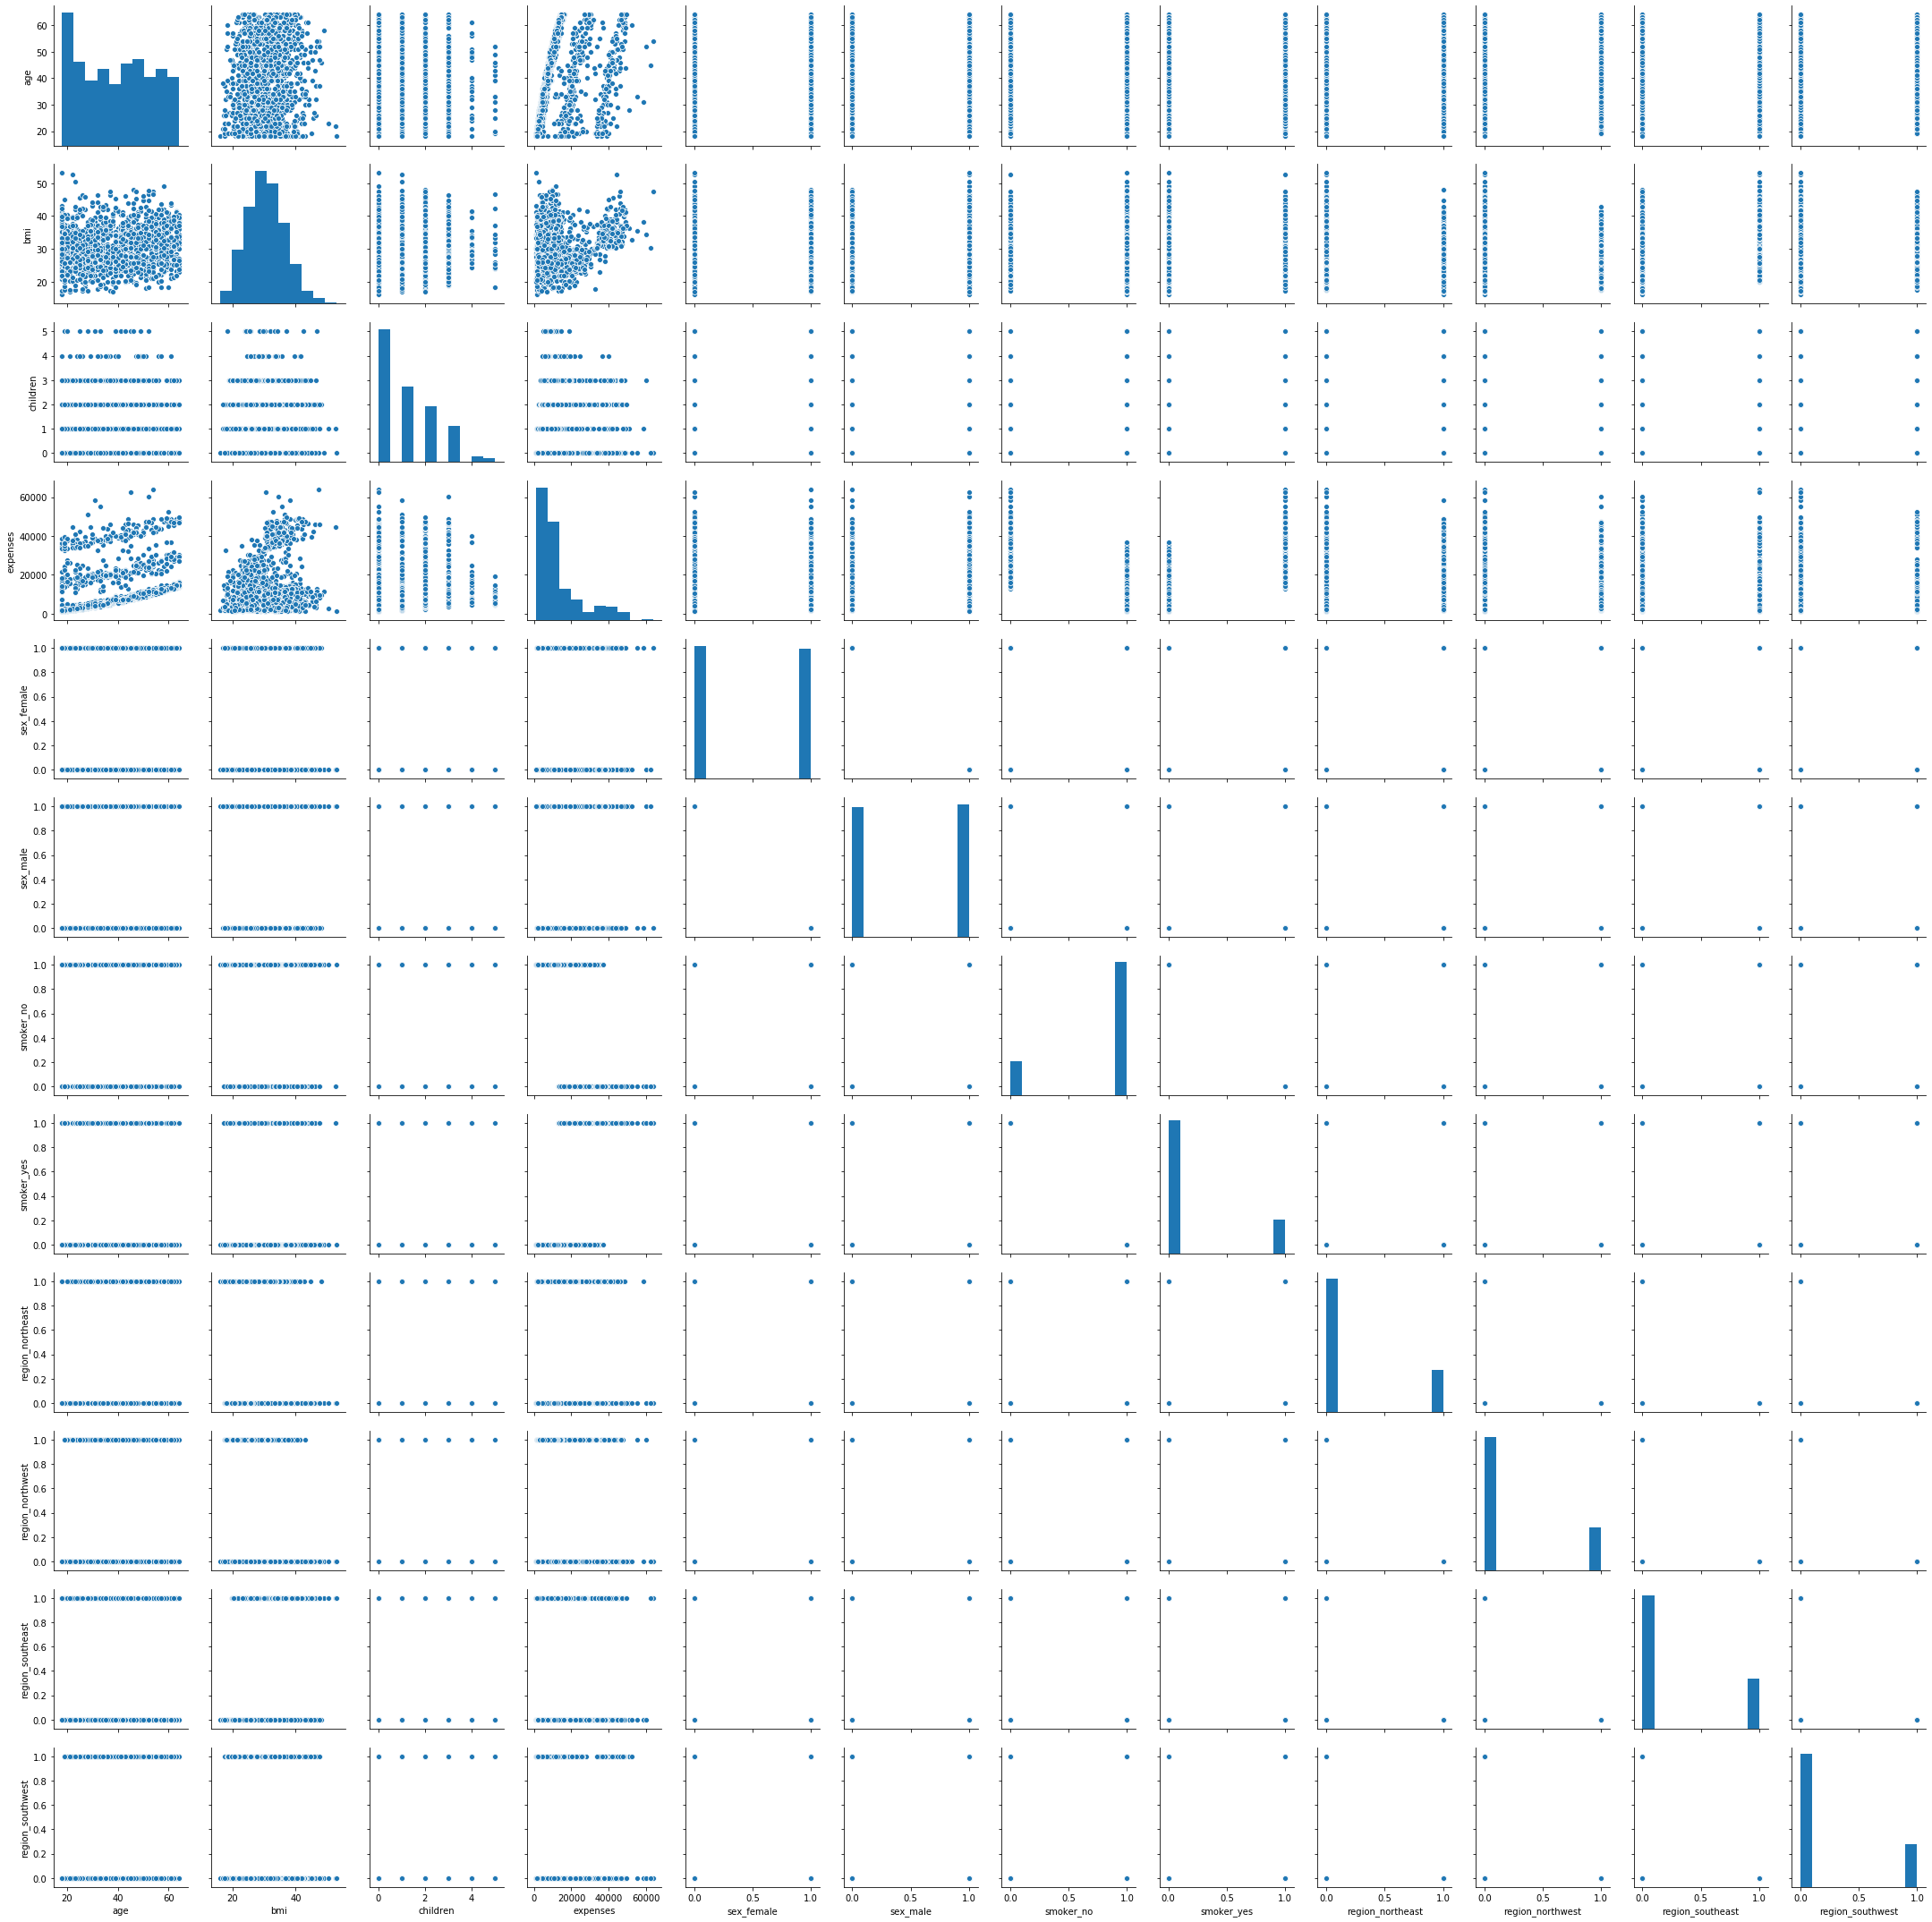

In [74]:
sns.pairplot(df_processed[['age', 'bmi', 'children', 'expenses', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']])

In [72]:
df_processed.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [46]:
X = df_processed.drop(columns=["expenses"])

In [47]:
Y = df_processed["expenses"]

In [48]:
trainX, testX, trainY, testY =  train_test_split(X,Y,test_size=0.3,random_state=8)

In [49]:
trainX.shape

(936, 11)

In [50]:
testX.shape

(402, 11)

In [97]:
linear = LinearRegression()
linear.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
linear.coef_

array([   248.43198756,    327.30031851,    420.67832704,    202.18983489,
         -202.18983489, -12282.91505354,  12282.91505354,    882.63280821,
          233.23553624,   -520.23145506,   -595.63688939])

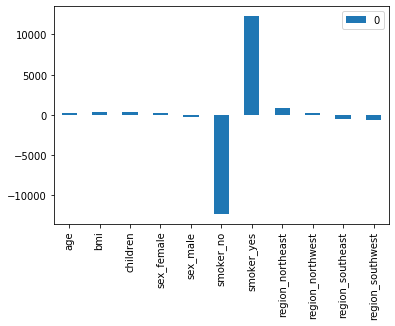

In [77]:
pd.DataFrame(linear.coef_,trainX.columns).plot(kind = "bar")

In [98]:
train_predict = linear.predict(trainX)
test_predict = linear.predict(testX)

In [100]:
np.sqrt(mean_squared_error(train_predict,trainY))

6153.192474389475

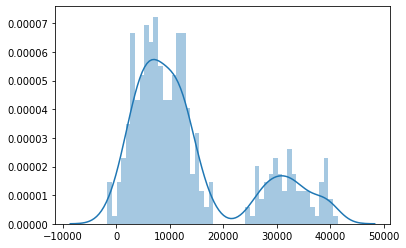

In [99]:
sns.distplot((test_predict),bins=50);

In [57]:
np.sqrt(mean_squared_error(test_predict,testY))

5828.17082378913

In [58]:
print(linear.intercept_)
coeff_df = pd.DataFrame(linear.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

467.80540120092155
                   Coefficient
age                 248.431988
bmi                 327.300319
children            420.678327
sex_female          202.189835
sex_male           -202.189835
smoker_no        -12282.915054
smoker_yes        12282.915054
region_northeast    882.632808
region_northwest    233.235536
region_southeast   -520.231455
region_southwest   -595.636889


In [79]:
def model_fit_poly(model, train_X, test_X, train_y, test_y ):
    
    model.fit(train_X,train_y)

    #pd.DataFrame(model.coef_,train_X.columns).plot(kind = "bar")

    train_predict = model.predict(train_X)
    test_predict = model.predict(test_X)
    print("Train RMSE : poly  : ",np.sqrt(mean_squared_error(train_predict,train_y)))
    print("Test RMSE : Poly",np.sqrt(mean_squared_error(test_predict,test_y)))
  

In [89]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(trainX)
X_test_poly = poly_reg.fit_transform(testX)

pol_reg = LinearRegression() 


In [90]:
X_train_poly.shape

(936, 78)

In [86]:
trainX.shape
#m1x1+ m2x1 2 + m3x3 3

(936, 11)

In [91]:
pol_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
poly_reg

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [101]:
model_fit_poly(pol_reg,X_train_poly,X_test_poly,trainY,testY)

Train RMSE : poly  :  4893.68274294346
Test RMSE : Poly 4648.20719666846


In [102]:
model_fit_poly(pol_reg,trainX,testX,trainY,testY)

Train RMSE : poly  :  6153.192474389475
Test RMSE : Poly 5828.17082378913


Text(0, 0.5, 'Predicted Y')

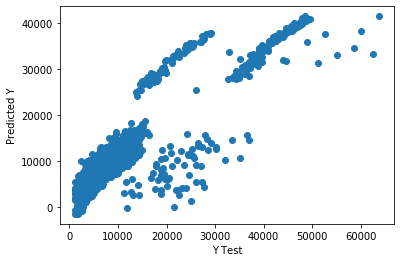

In [95]:
import matplotlib.pyplot as plt
predictions = linear.predict(testX)
plt.scatter(trainY,train_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


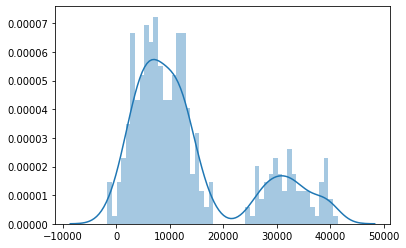

In [96]:
sns.distplot((test_predict),bins=50);

In [103]:
lass = Lasso(alpha=0.1, normalize=True)

In [105]:
model_fit_poly(lass,trainX,testX,trainY,testY)

Train RMSE : poly  :  6153.199349717335
Test RMSE : Poly 5827.498418408216


In [106]:
ridge = Ridge(alpha=0.3, normalize=True)
model_fit_poly(ridge,trainX,testX,trainY,testY)

Train RMSE : poly  :  6354.735573164977
Test RMSE : Poly 5921.475235987943


In [107]:
model_fit_poly(linear,trainX,testX,trainY,testY)

Train RMSE : poly  :  6153.192474389475
Test RMSE : Poly 5828.17082378913


In [109]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.1, normalize=True)
model_fit_poly(elastic,trainX,testX,trainY,testY)

Train RMSE : poly  :  12025.957395294761
Test RMSE : Poly 11629.22774008366
